可视化网络结构

In [ ]:
"""
单纯的print(model)，只能得出基础构件的信息，既不能显示出每一层的shape，也不能显示对应参数量的大小
"""

import torchvision.models as models
model = models.resnet18()
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

torchinfo可视化网络结构

In [ ]:
"""
使用torchinfo.summary()就行了，必需的参数分别是model，input_size[batch_size,channel,h,w]
torchinfo提供了更加详细的信息，
包括模块信息（每一层的类型、输出shape和参数量）、模型整体的参数量、模型大小、一次前向或者反向传播需要的内存大小
"""
import torchvision.models as models
from torchinfo import summary
resnet18 = models.resnet18() # 实例化模型
summary(resnet18, (1, 3, 224, 224)) # 1：batch_size 3:图片的通道数 224: 图片的高宽

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [1, 1000]                 --
├─Conv2d: 1-1                            [1, 64, 112, 112]         9,408
├─BatchNorm2d: 1-2                       [1, 64, 112, 112]         128
├─ReLU: 1-3                              [1, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [1, 64, 56, 56]           --
├─Sequential: 1-5                        [1, 64, 56, 56]           --
│    └─BasicBlock: 2-1                   [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-1                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-2             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-3                    [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-4                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-5             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-6                    [1, 64, 56, 56]           --
│

CNN可视化

In [ ]:
import torch
from torchvision.models import vgg11
# 加载模型，并确定模型的层信息
model = vgg11(pretrained=True)
print(dict(model.features.named_children()))

/home/zcx/Apps/anaconda/envs/universe/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/zcx/Apps/anaconda/envs/universe/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg11-8a719046.pth" to /home/zcx/.cache/torch/hub/checkpoints/vgg11-8a719046.pth
100%|██████████| 507M/507M [00:48<00:00, 11.0MB/s] 


{'0': Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), '1': ReLU(inplace=True), '2': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), '3': Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), '4': ReLU(inplace=True), '5': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), '6': Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), '7': ReLU(inplace=True), '8': Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), '9': ReLU(inplace=True), '10': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), '11': Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), '12': ReLU(inplace=True), '13': Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), '14': ReLU(inplace=True), '15': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), '16': Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), '17'

torch.Size([128, 64, 3, 3])


/tmp/ipykernel_243538/2701090405.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20, 17))


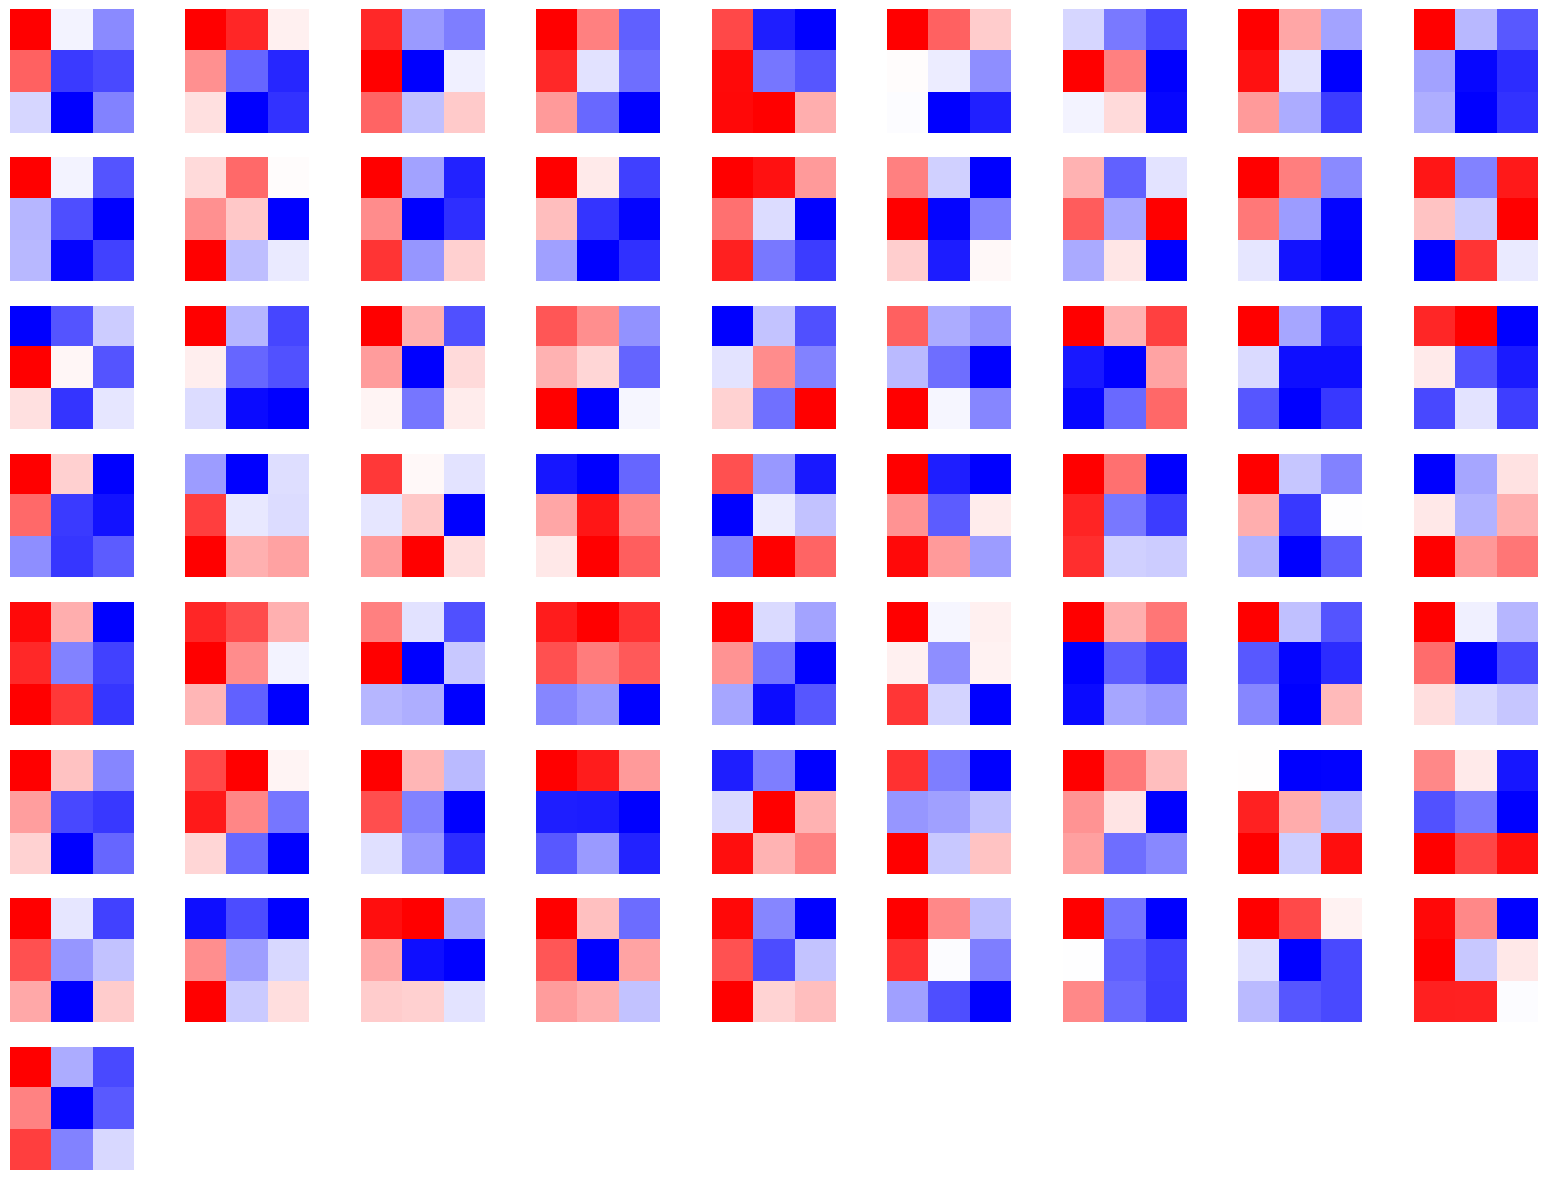

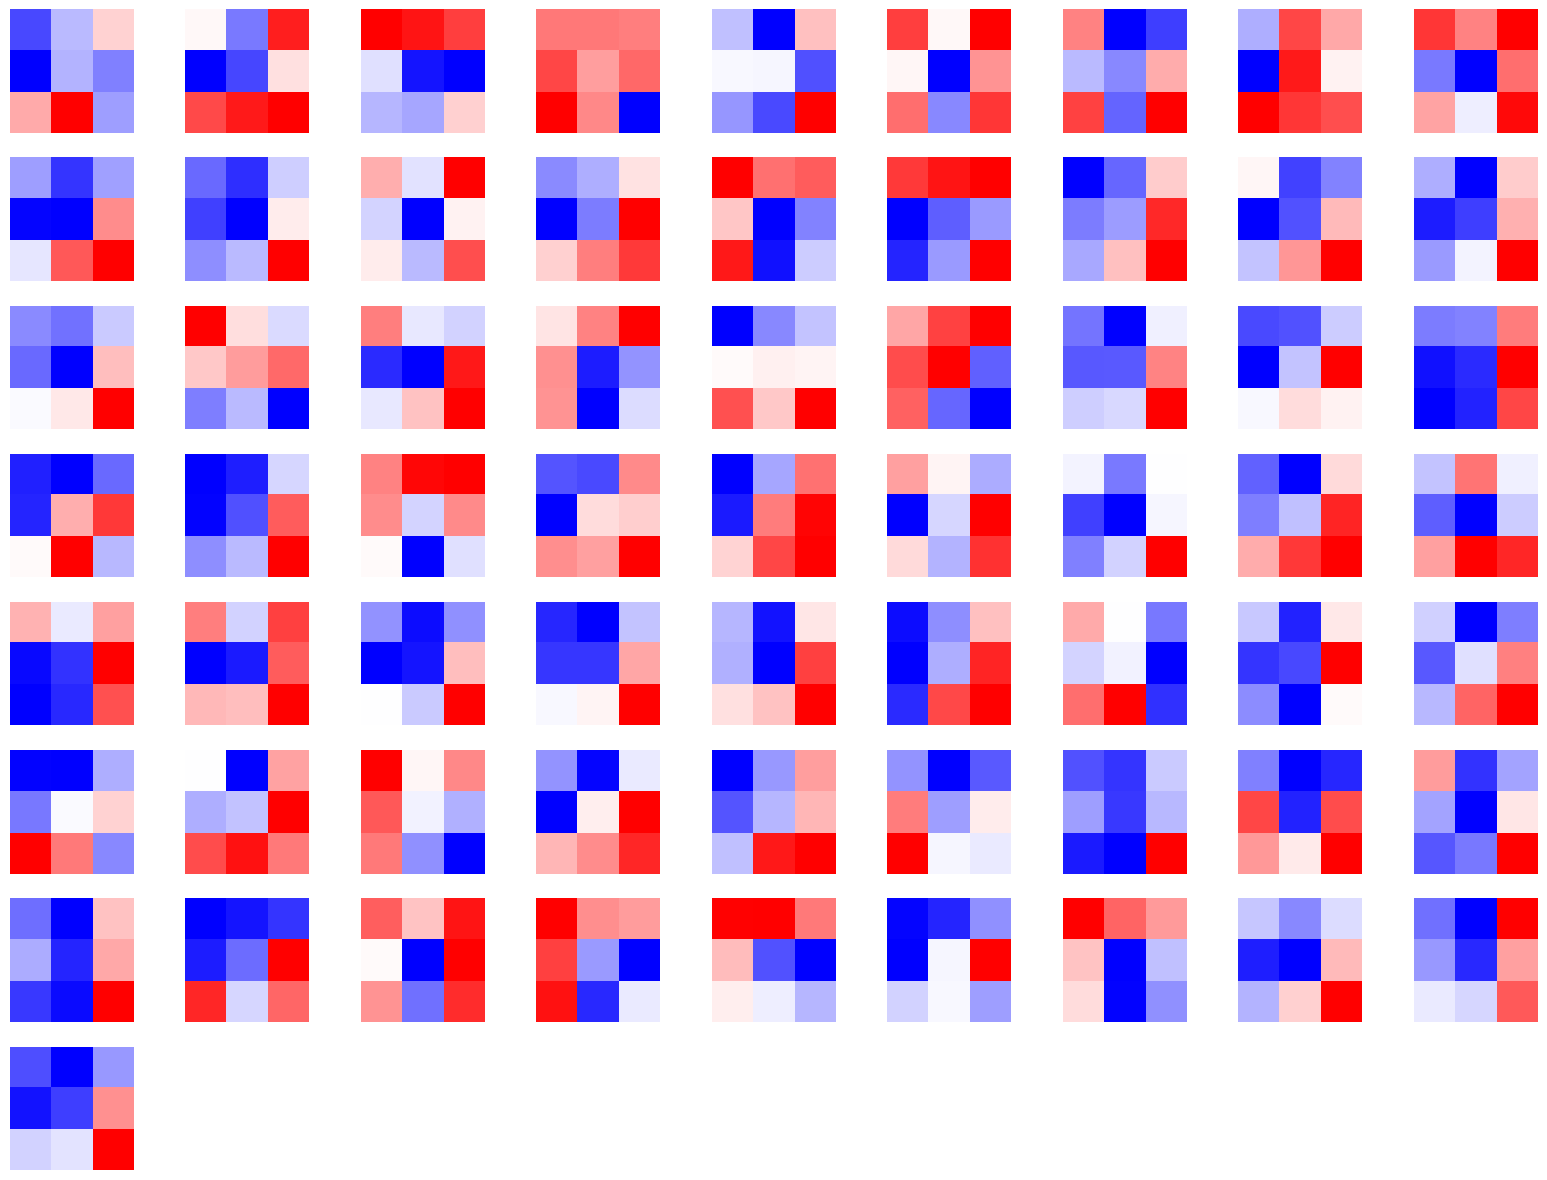

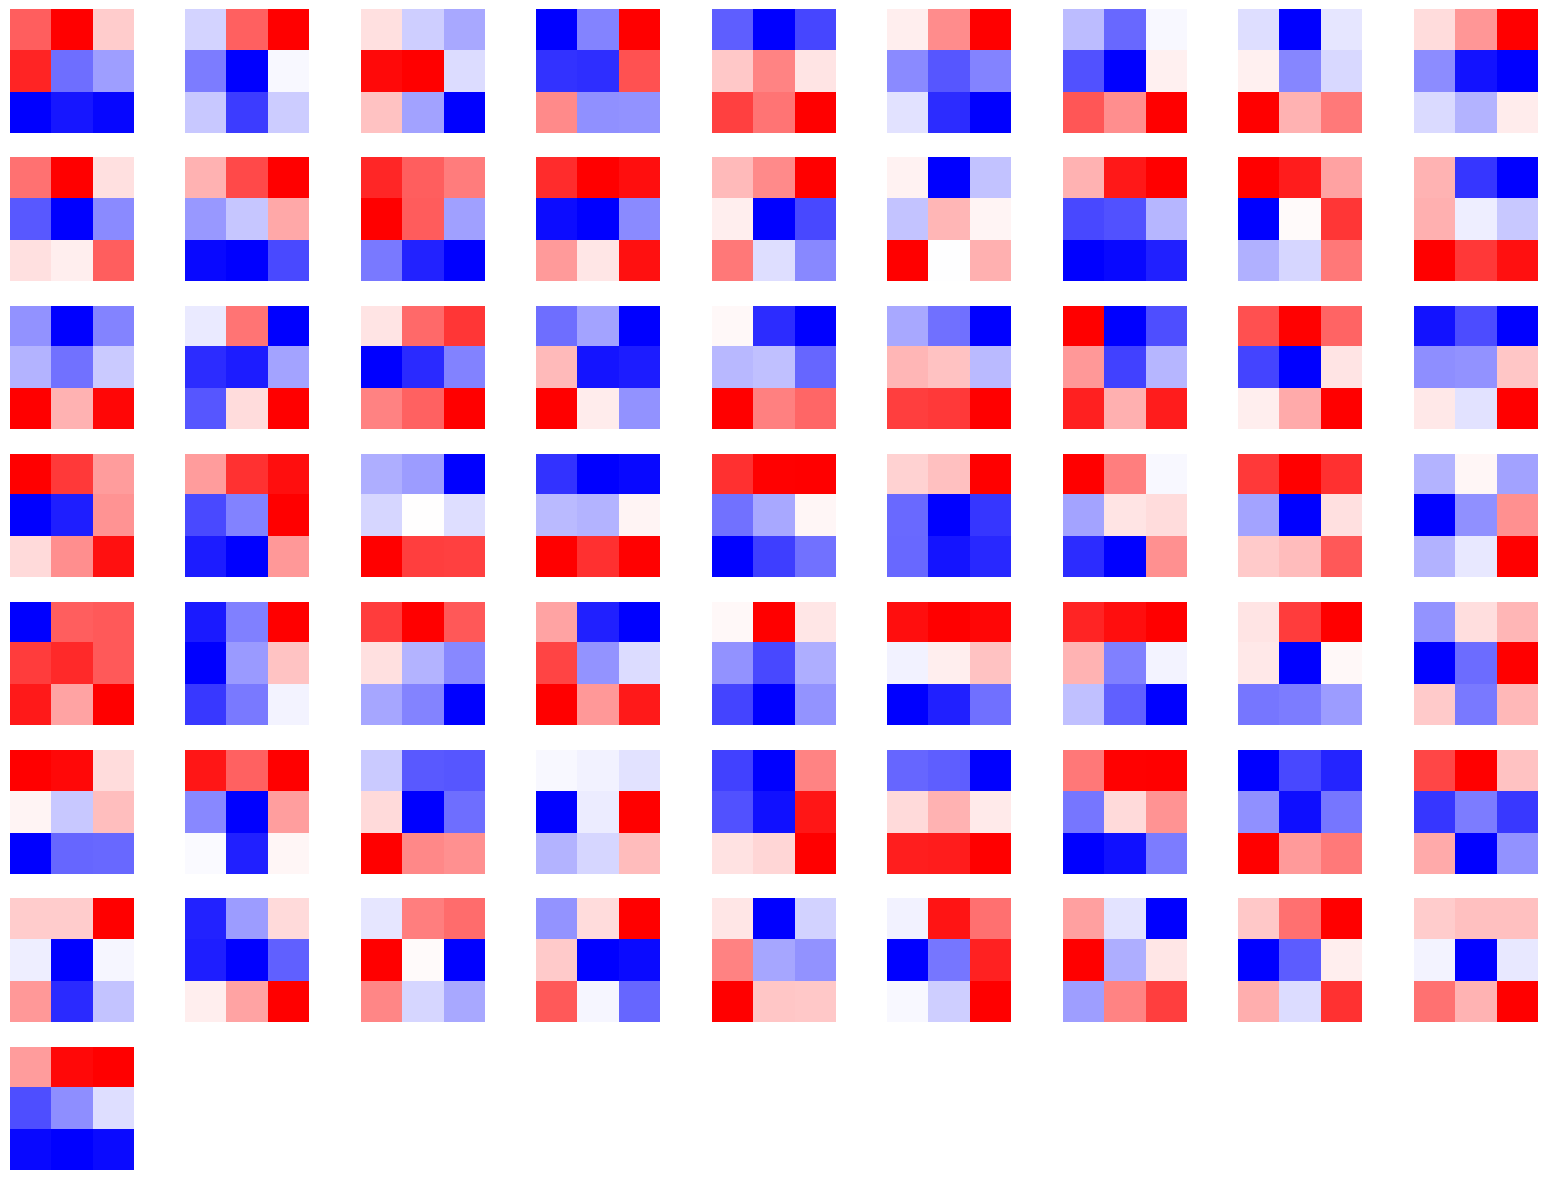

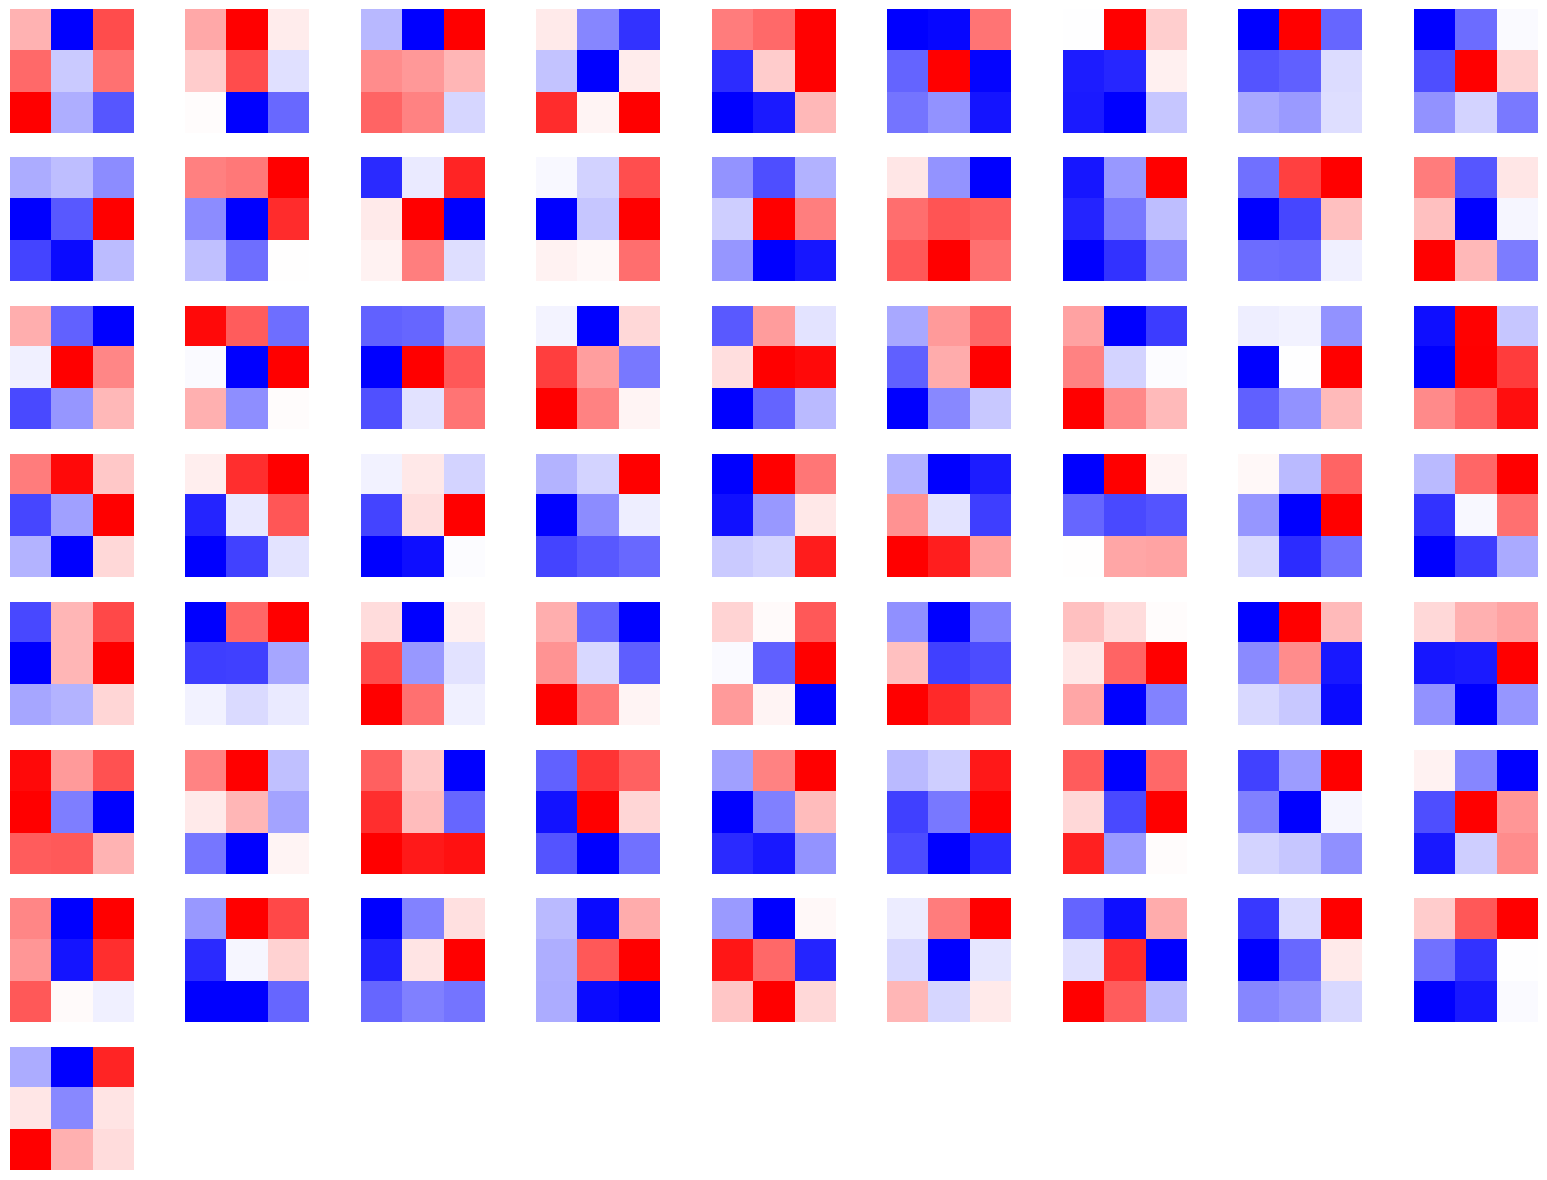

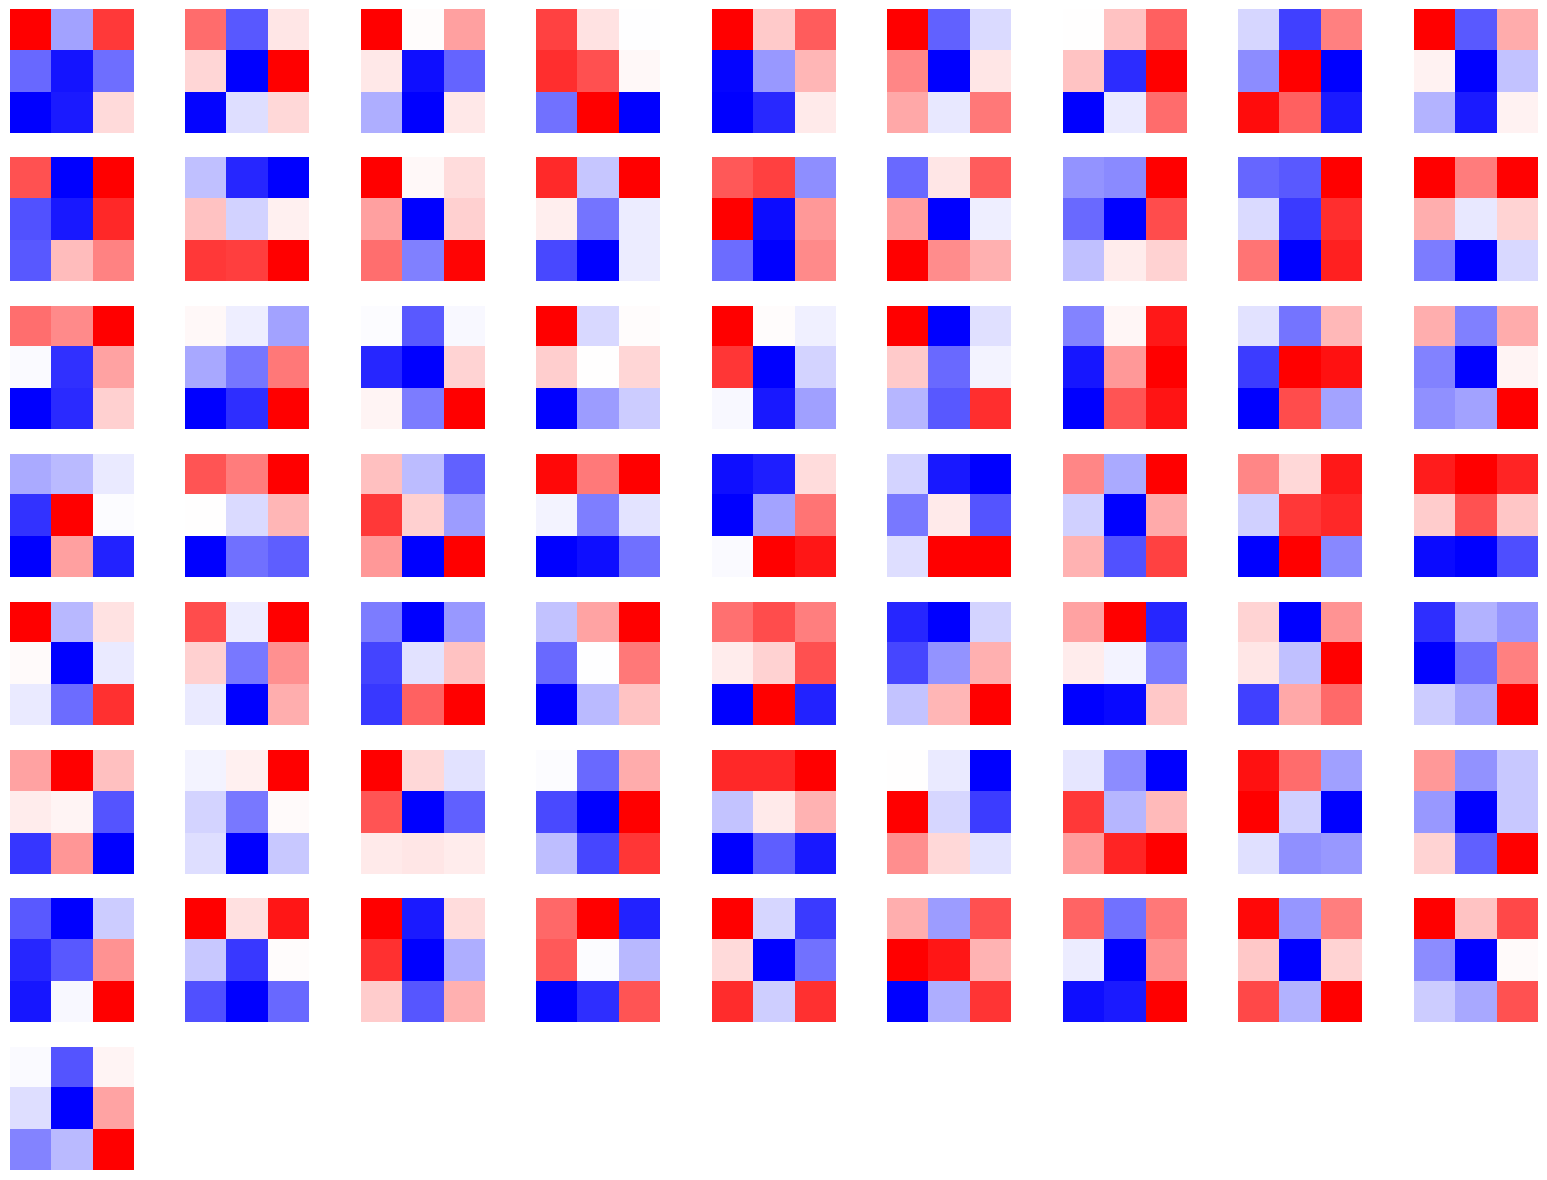

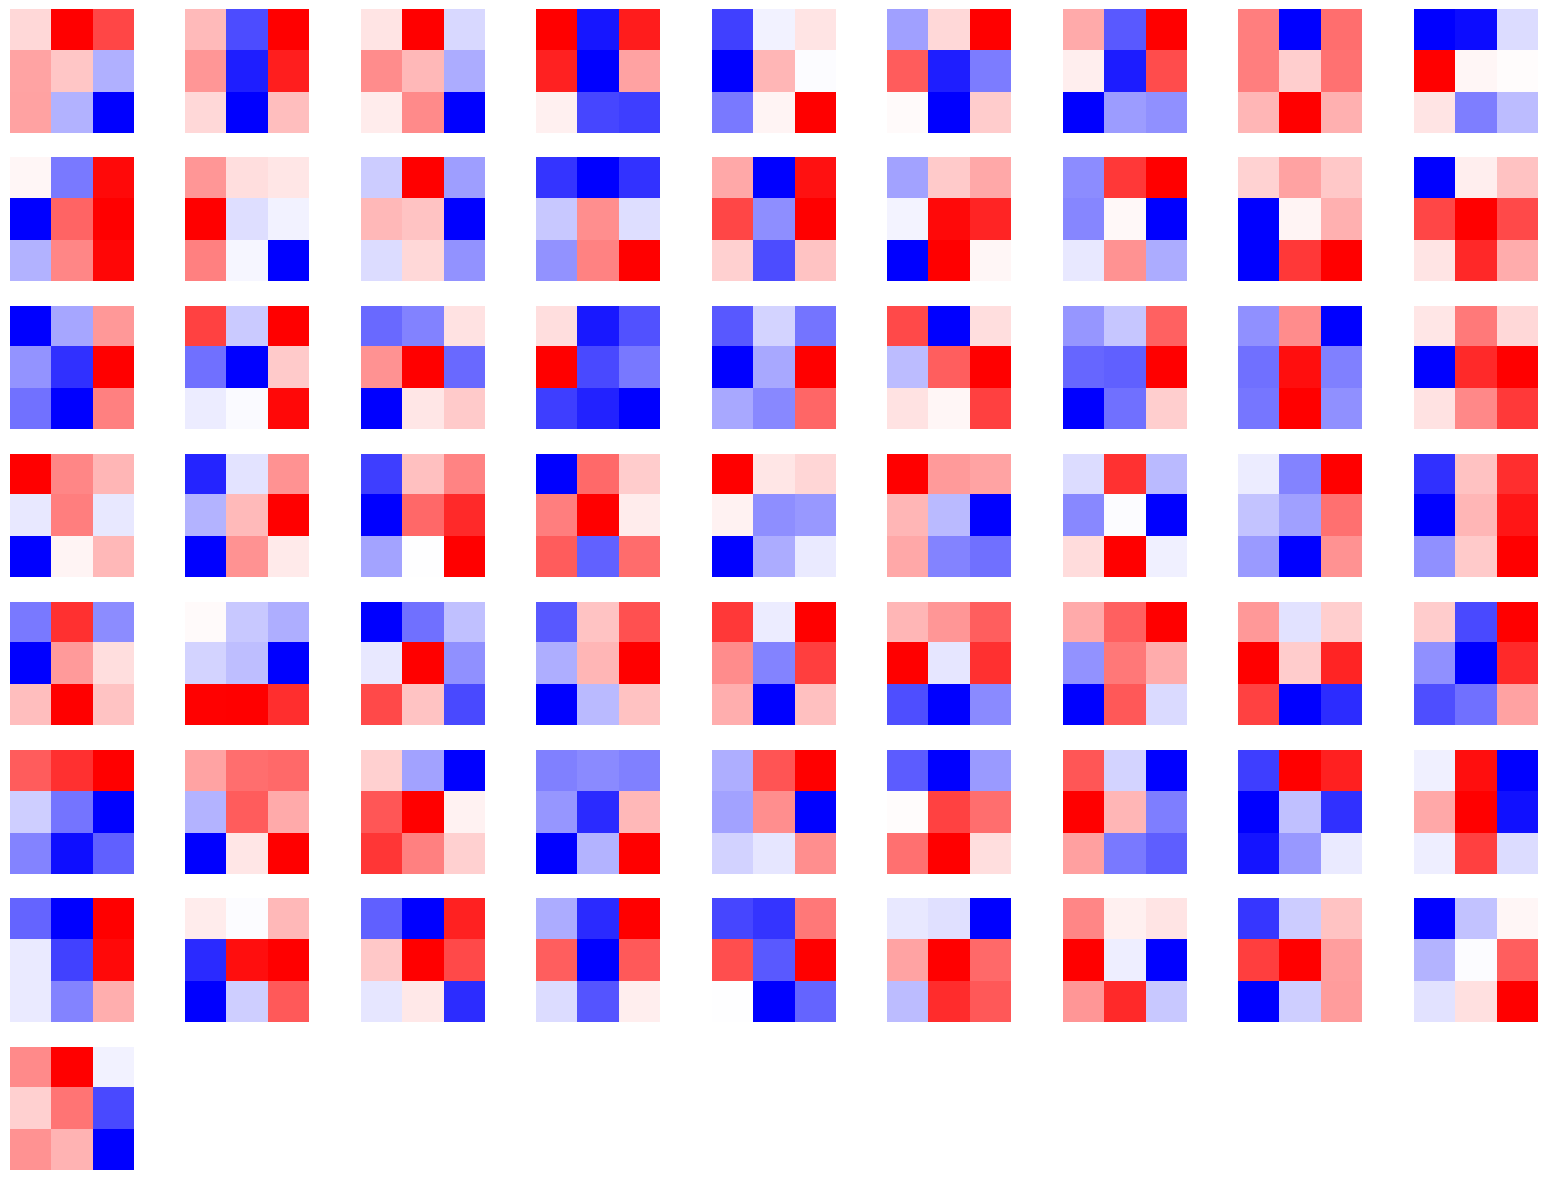

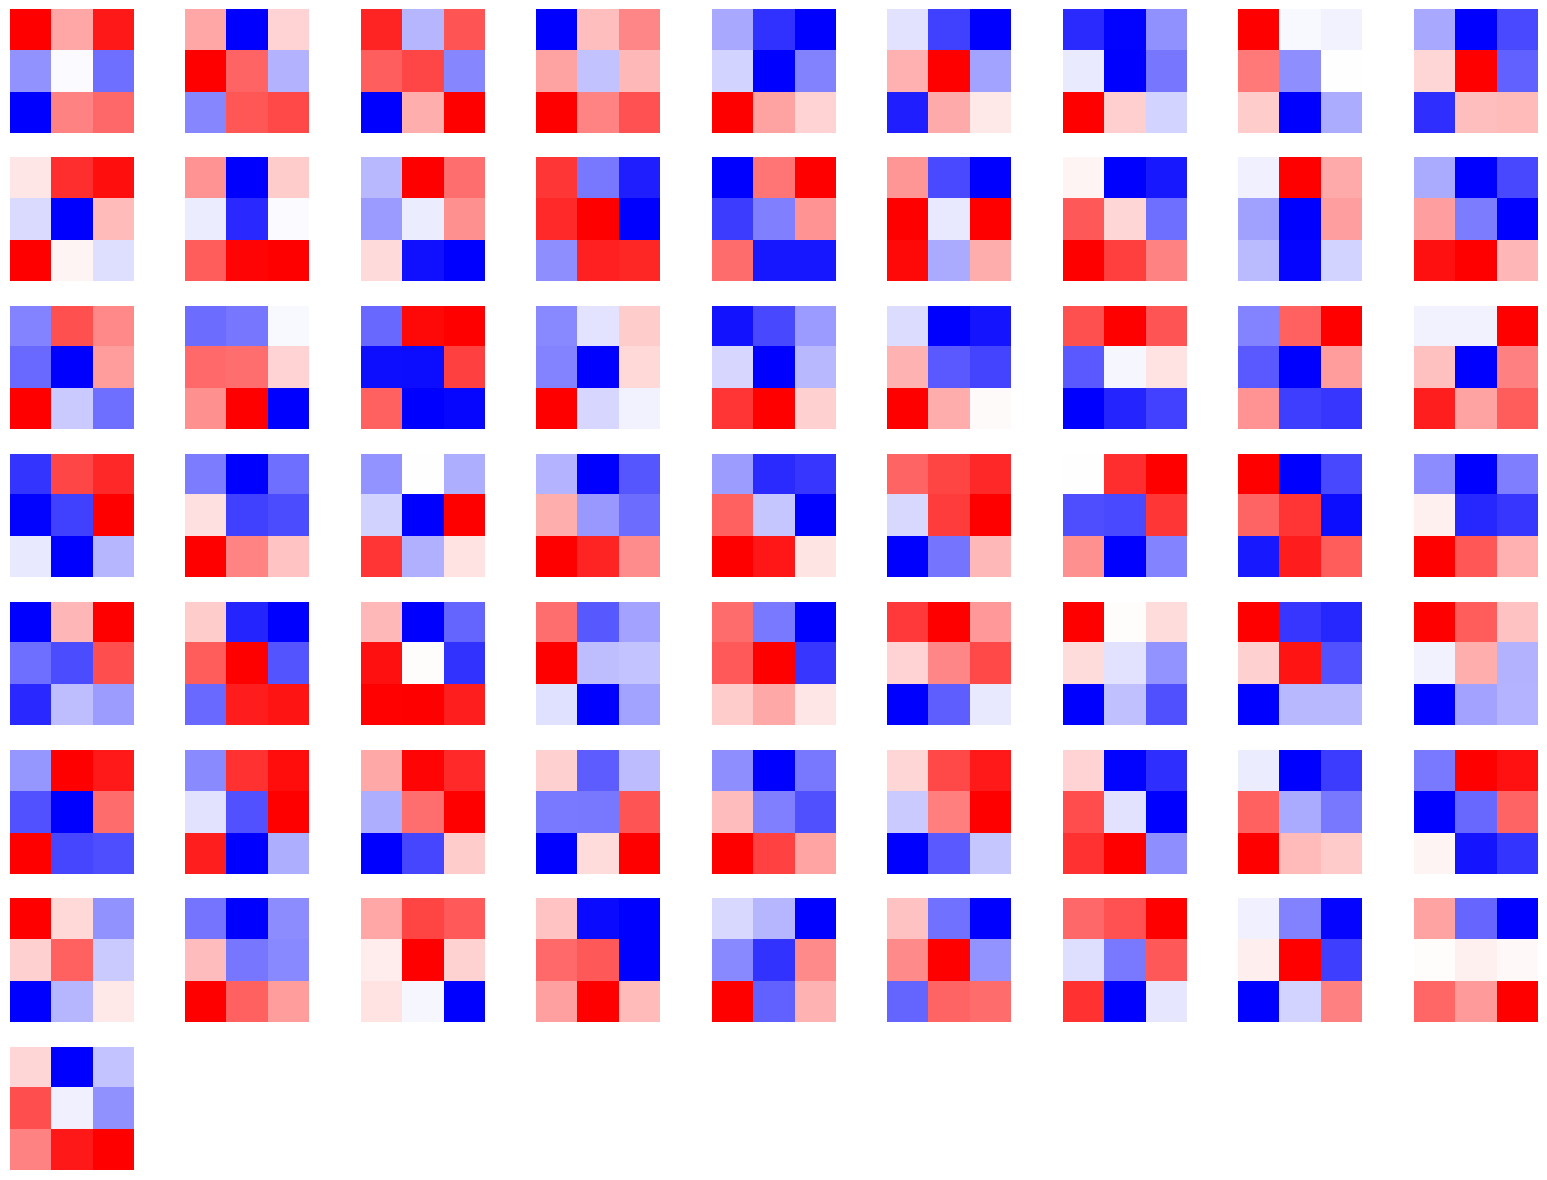

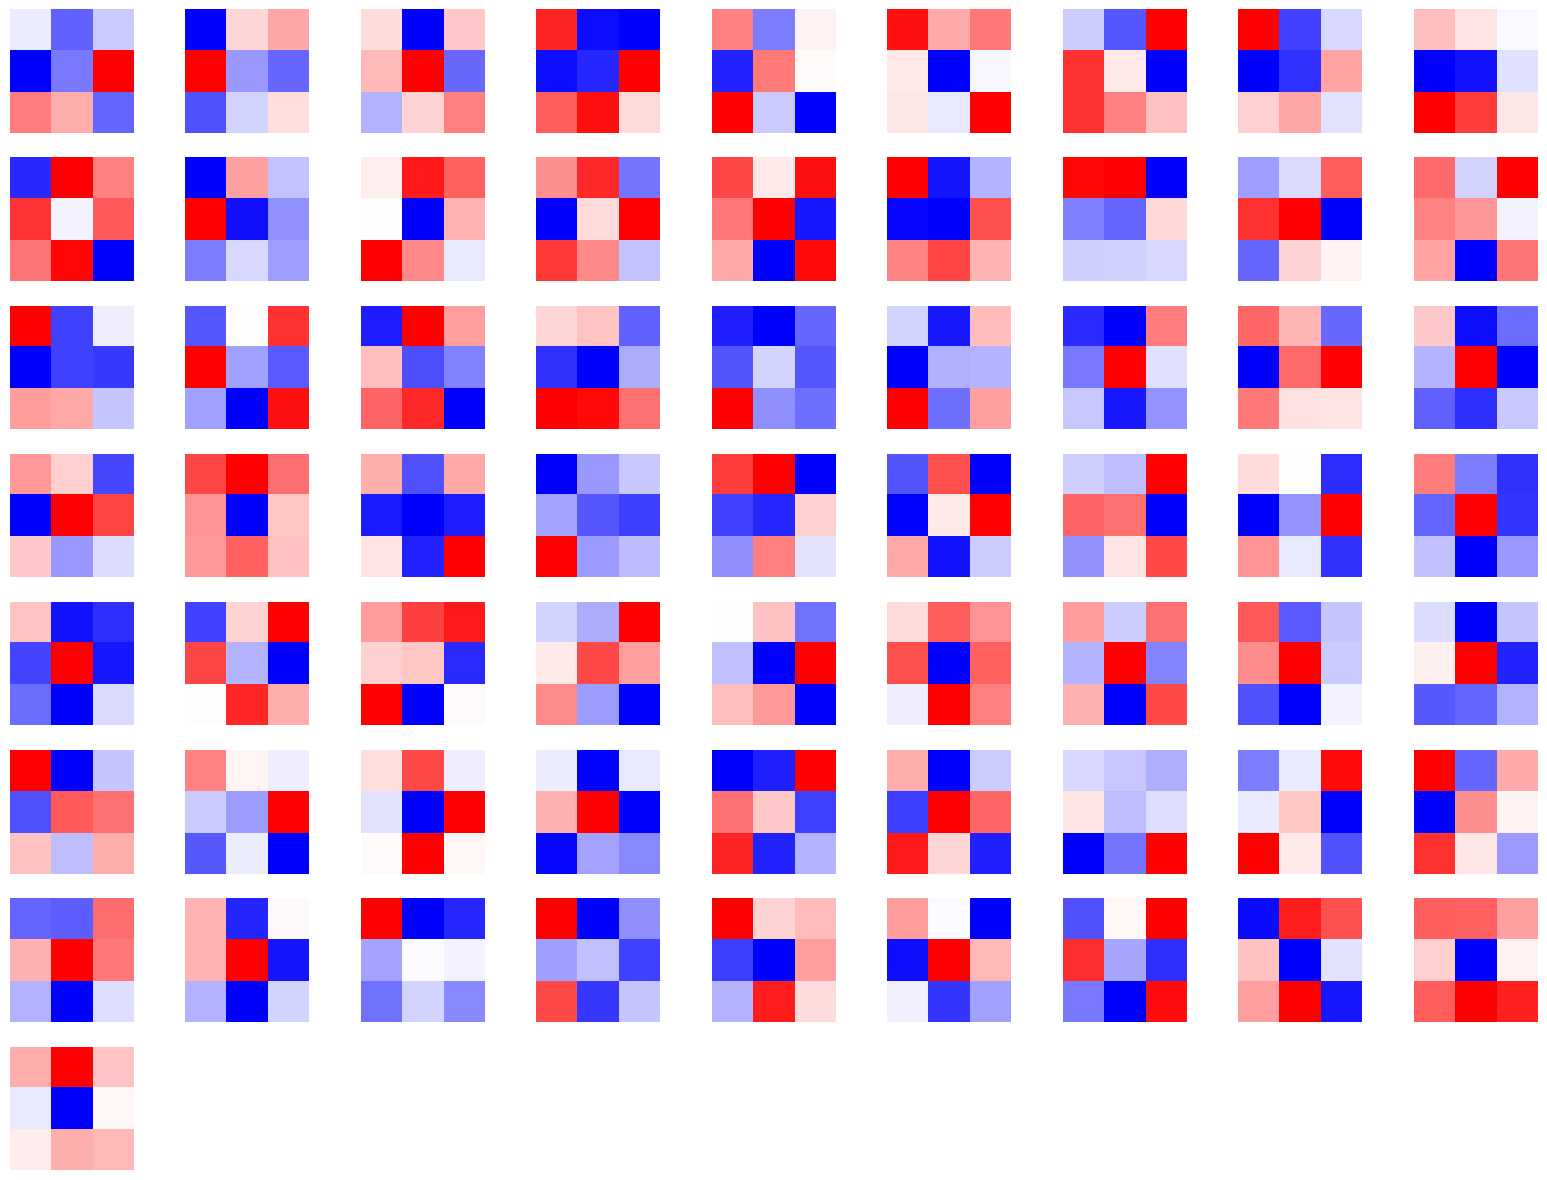

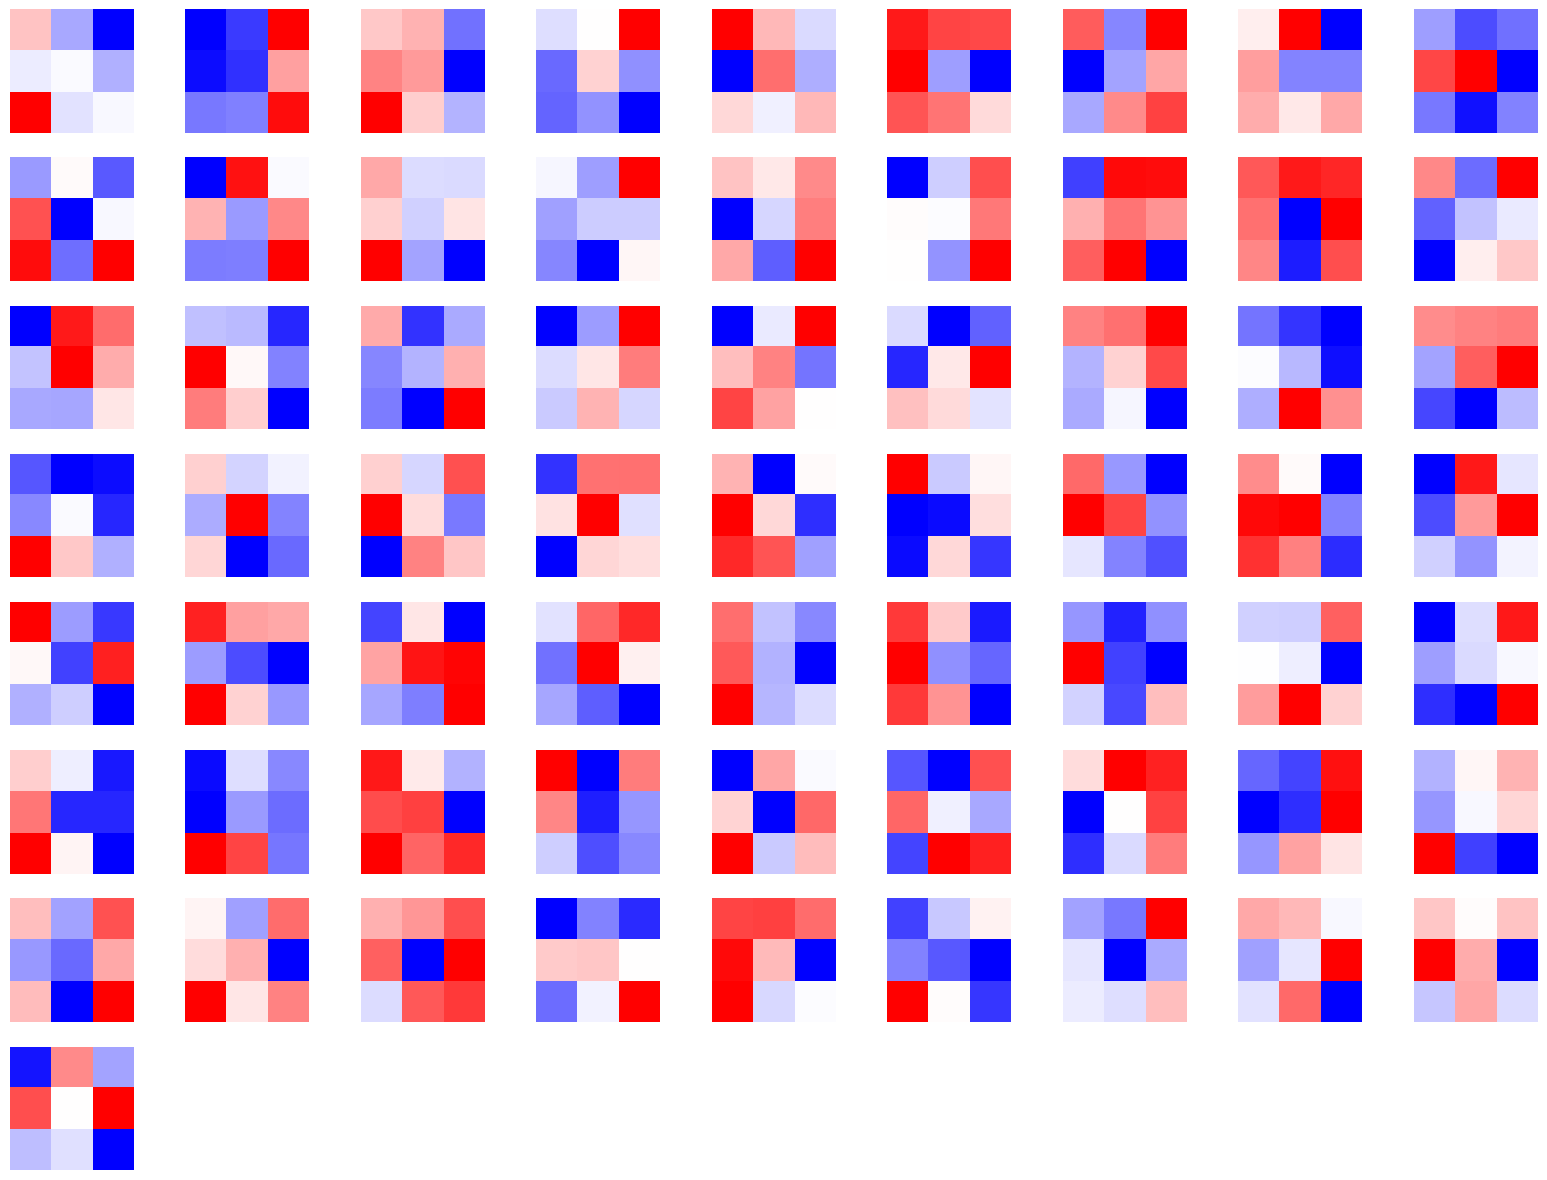

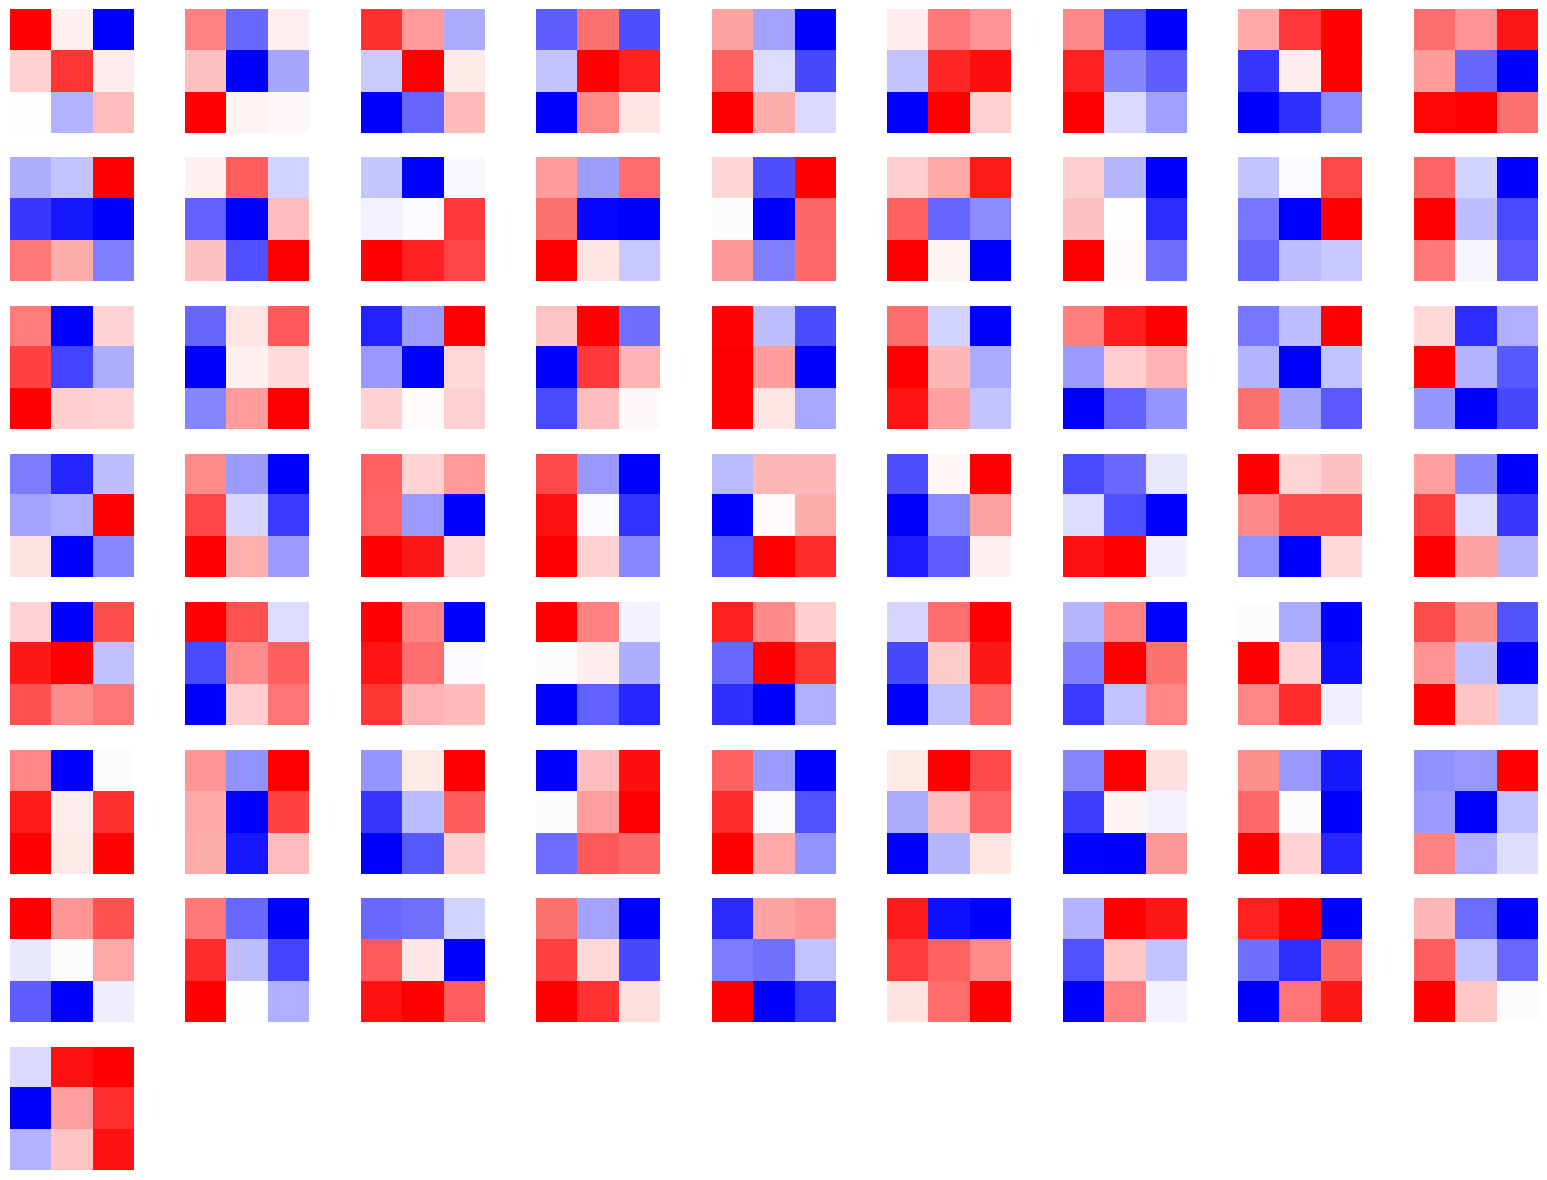

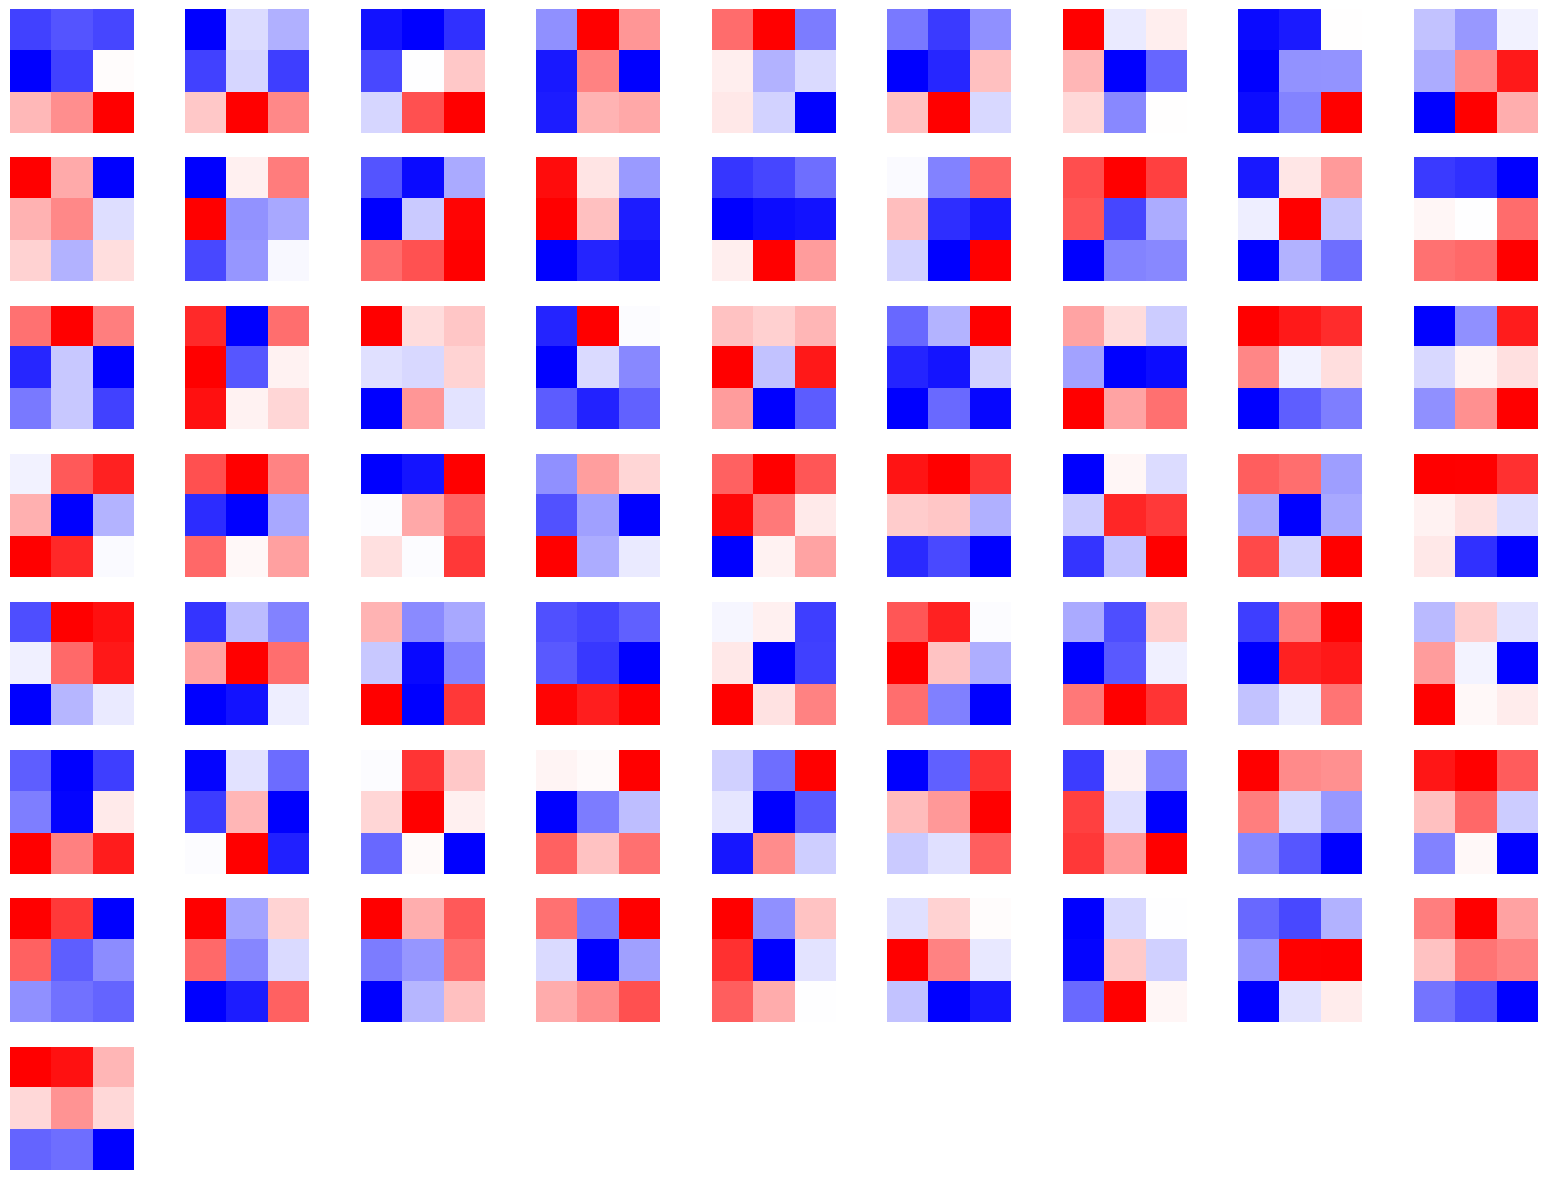

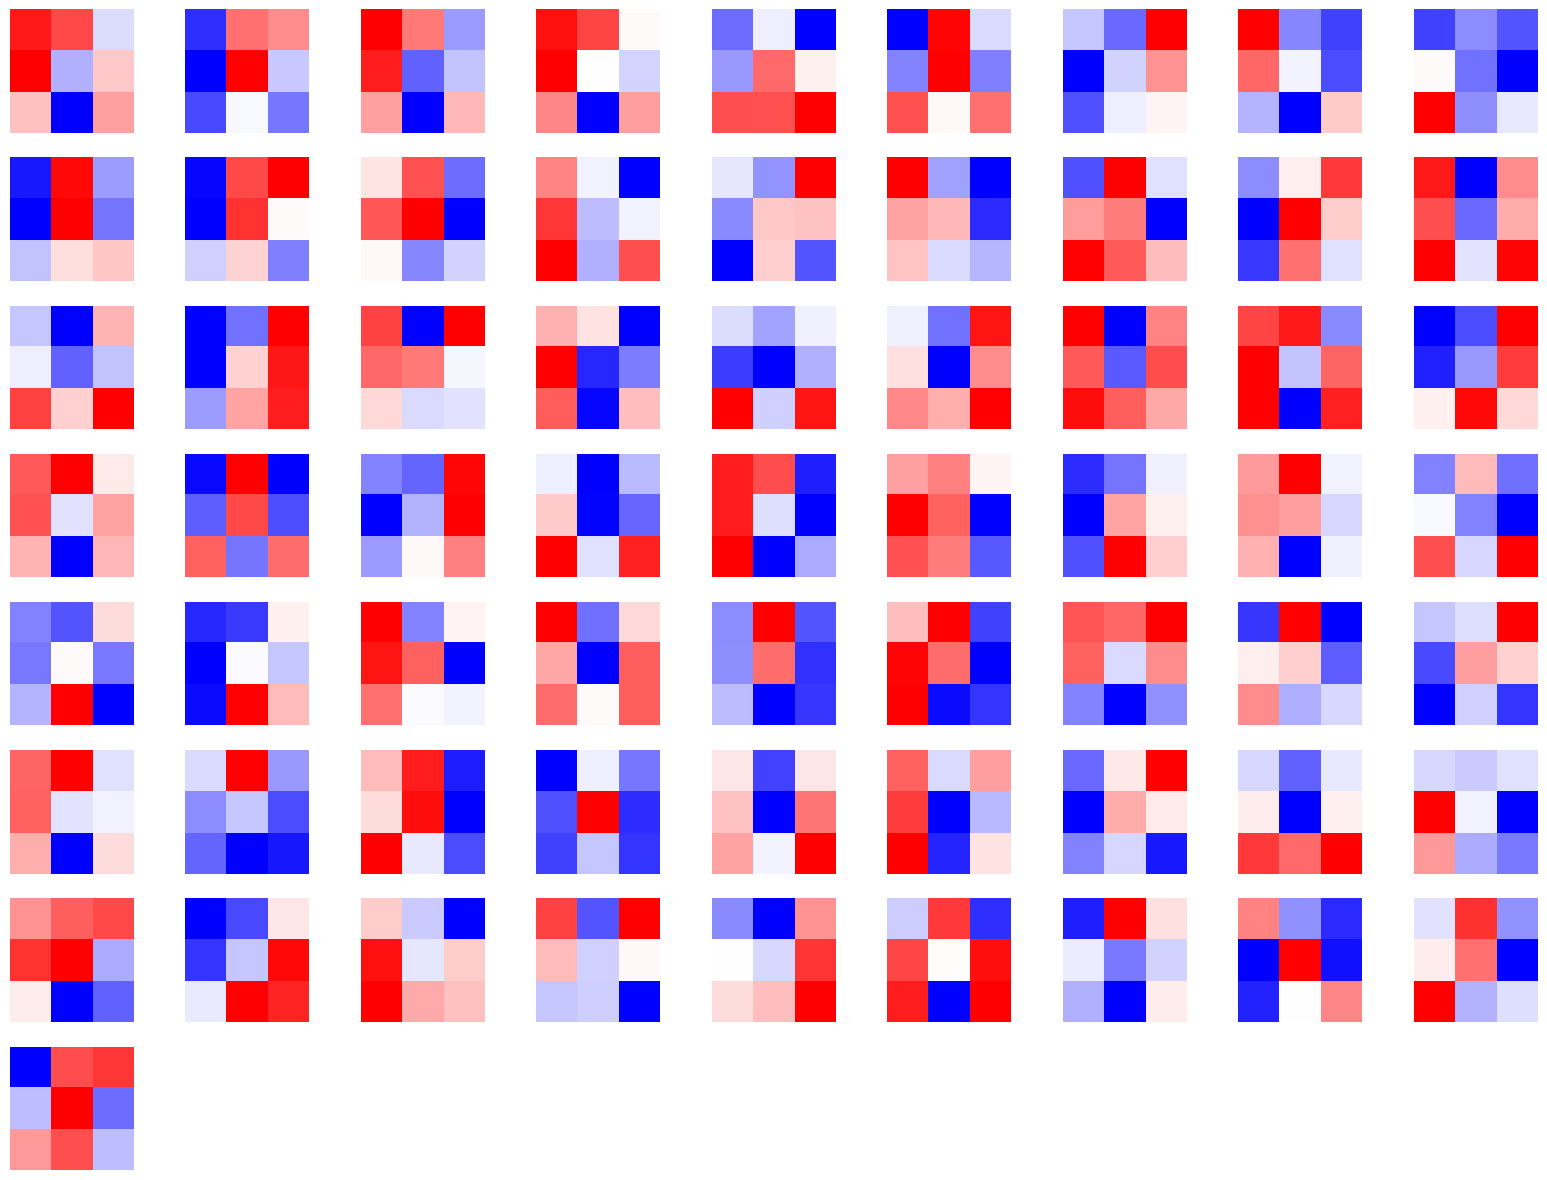

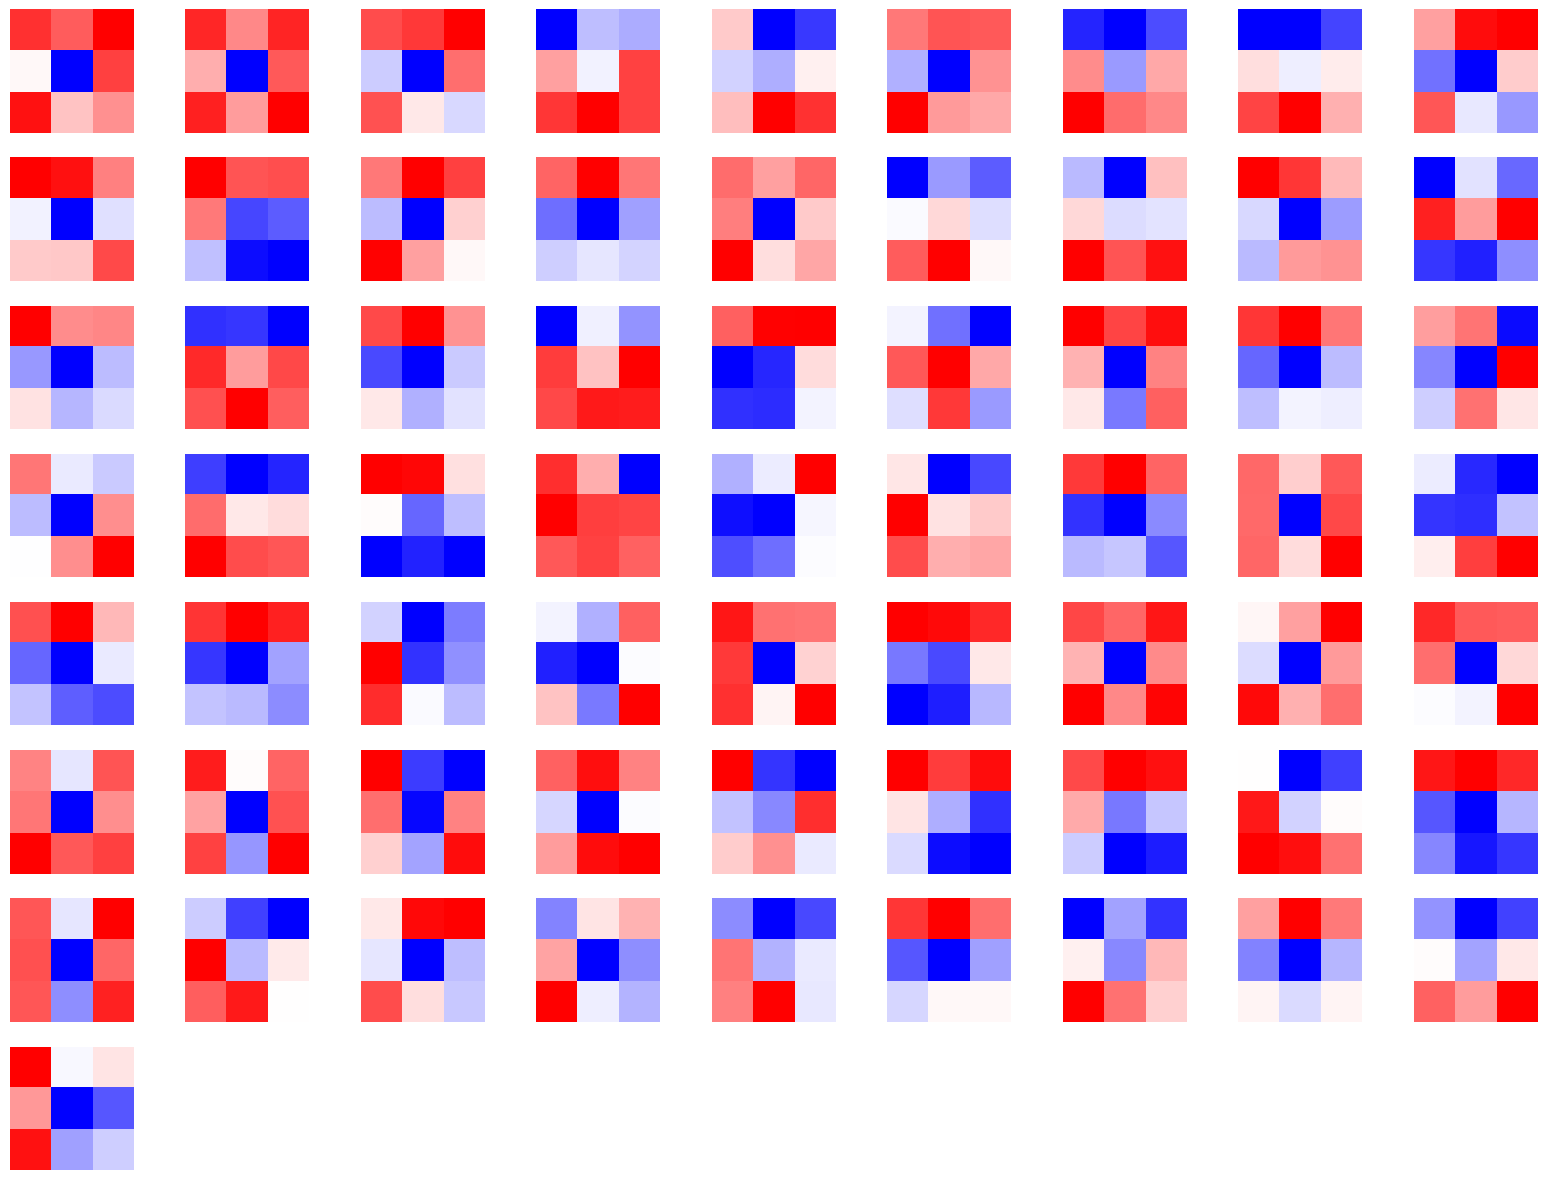

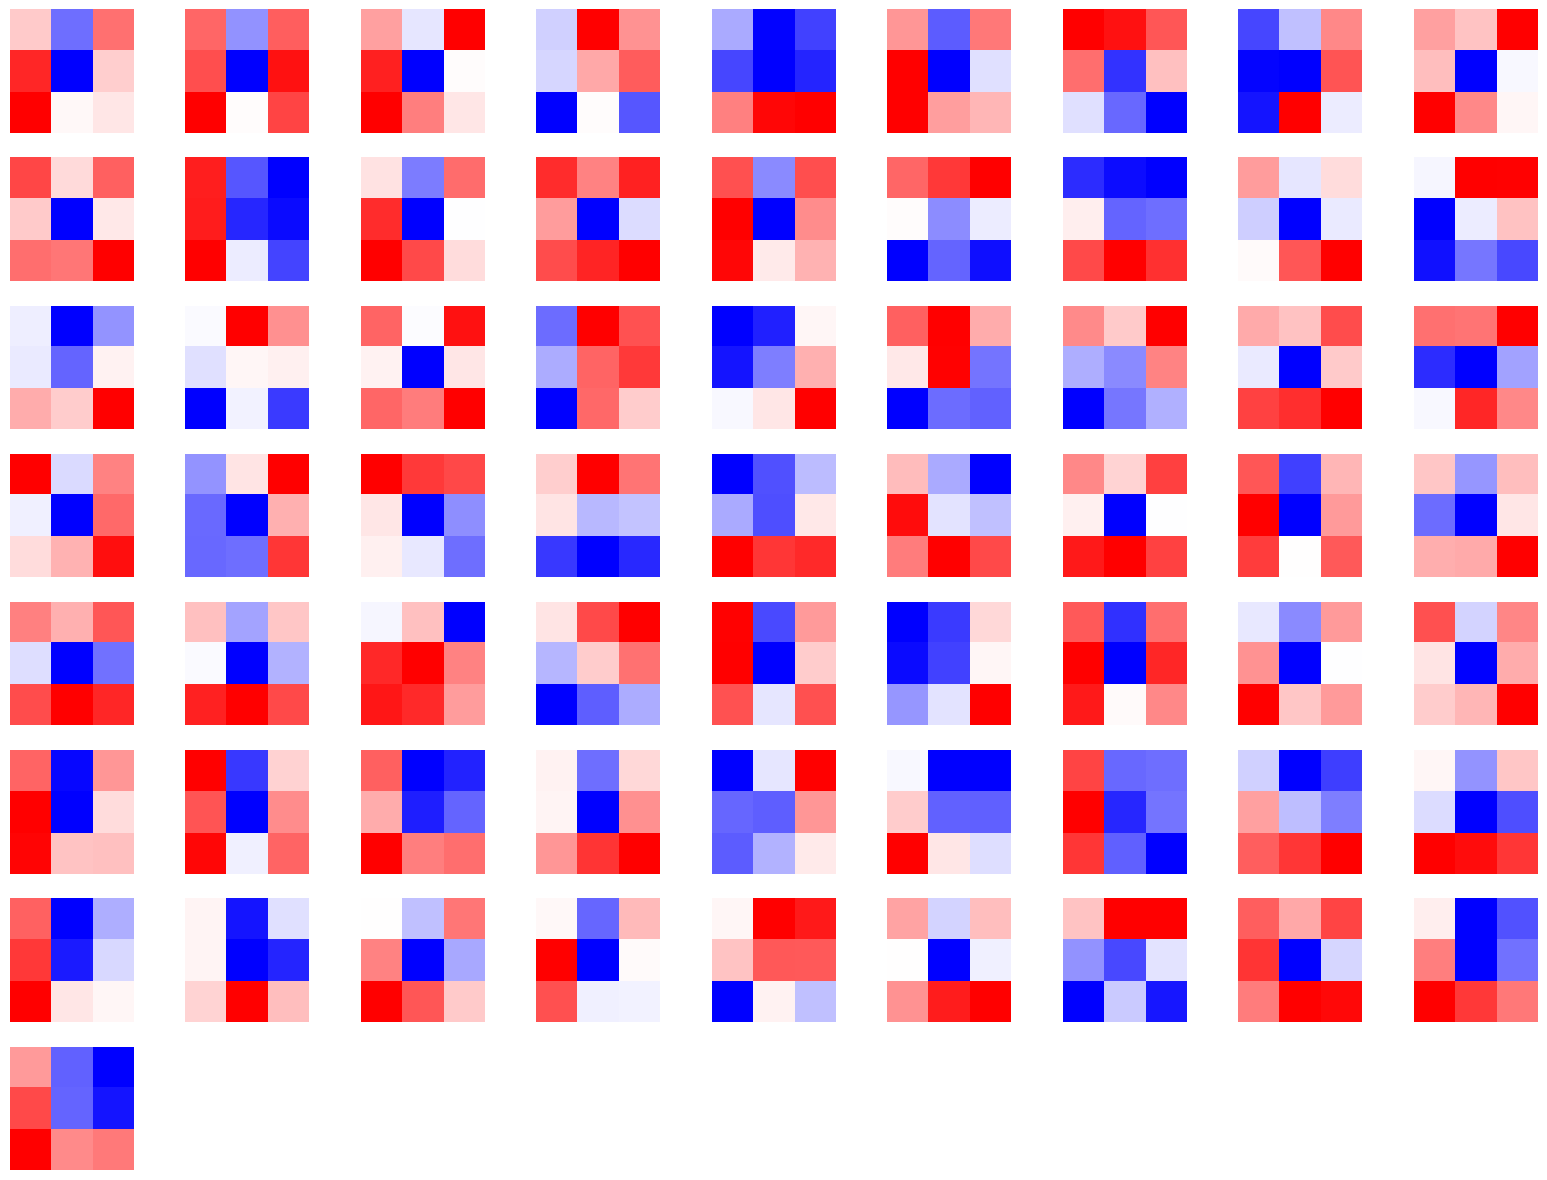

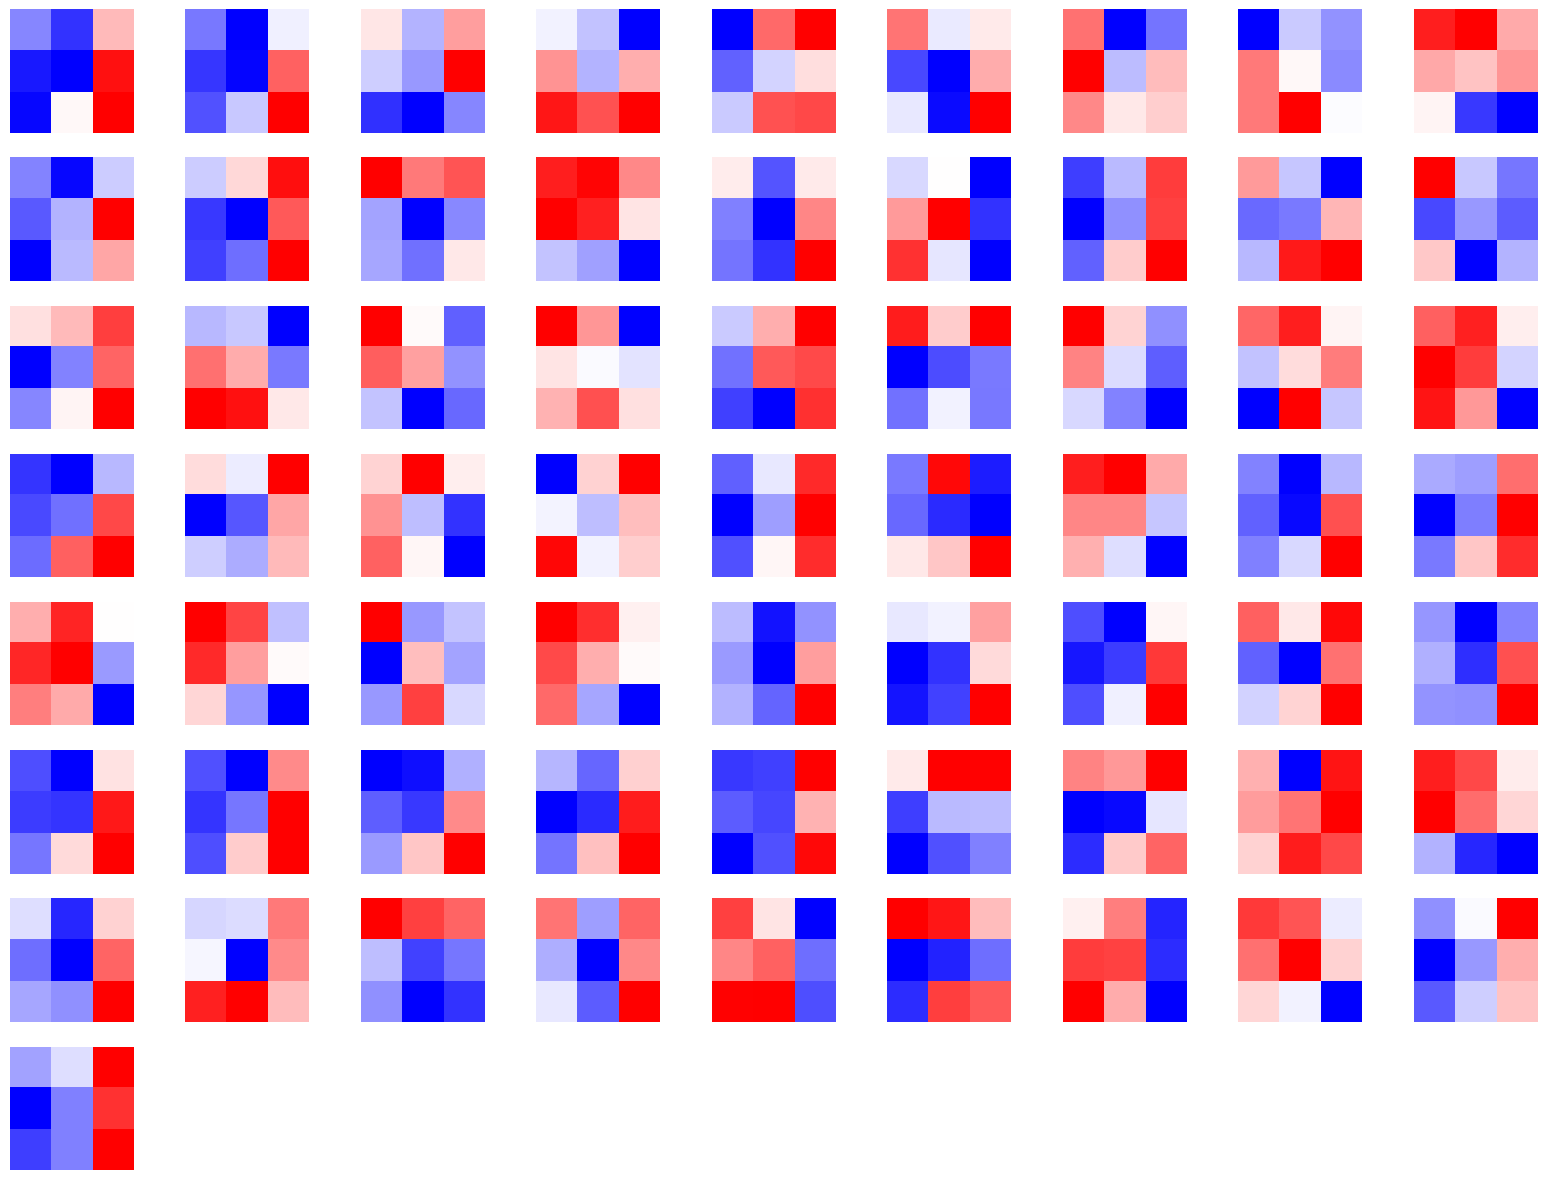

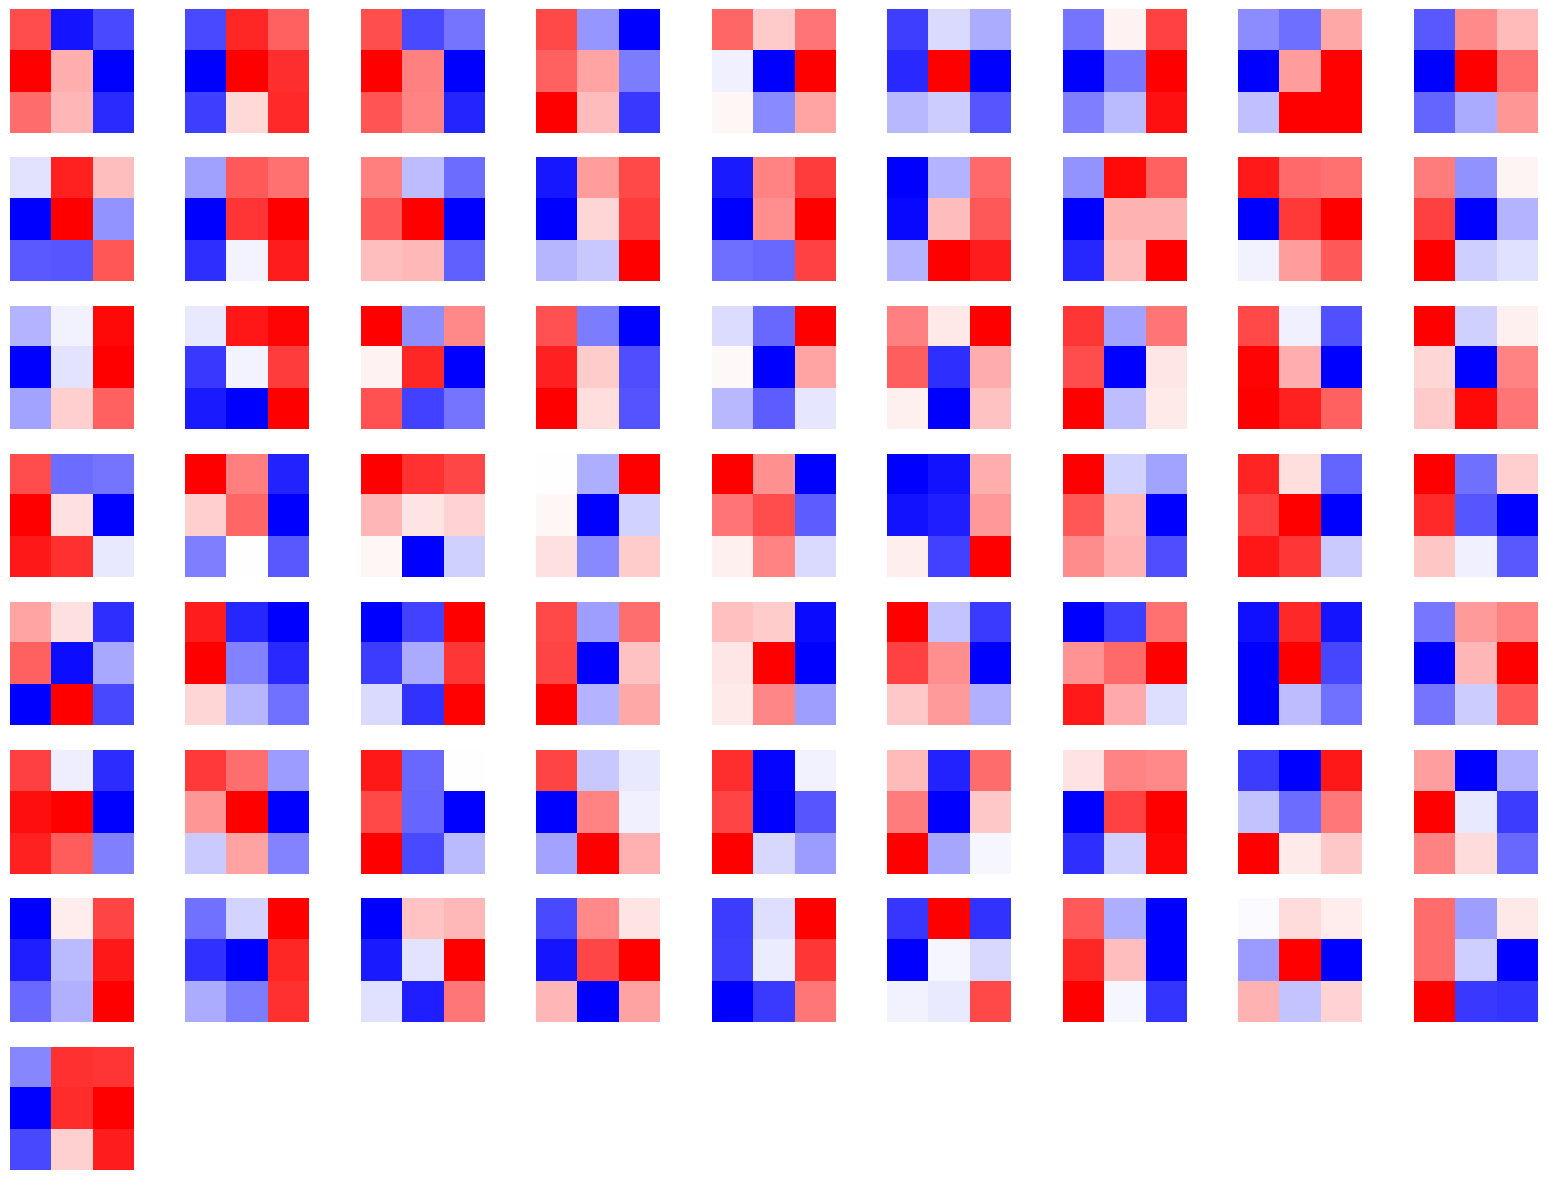

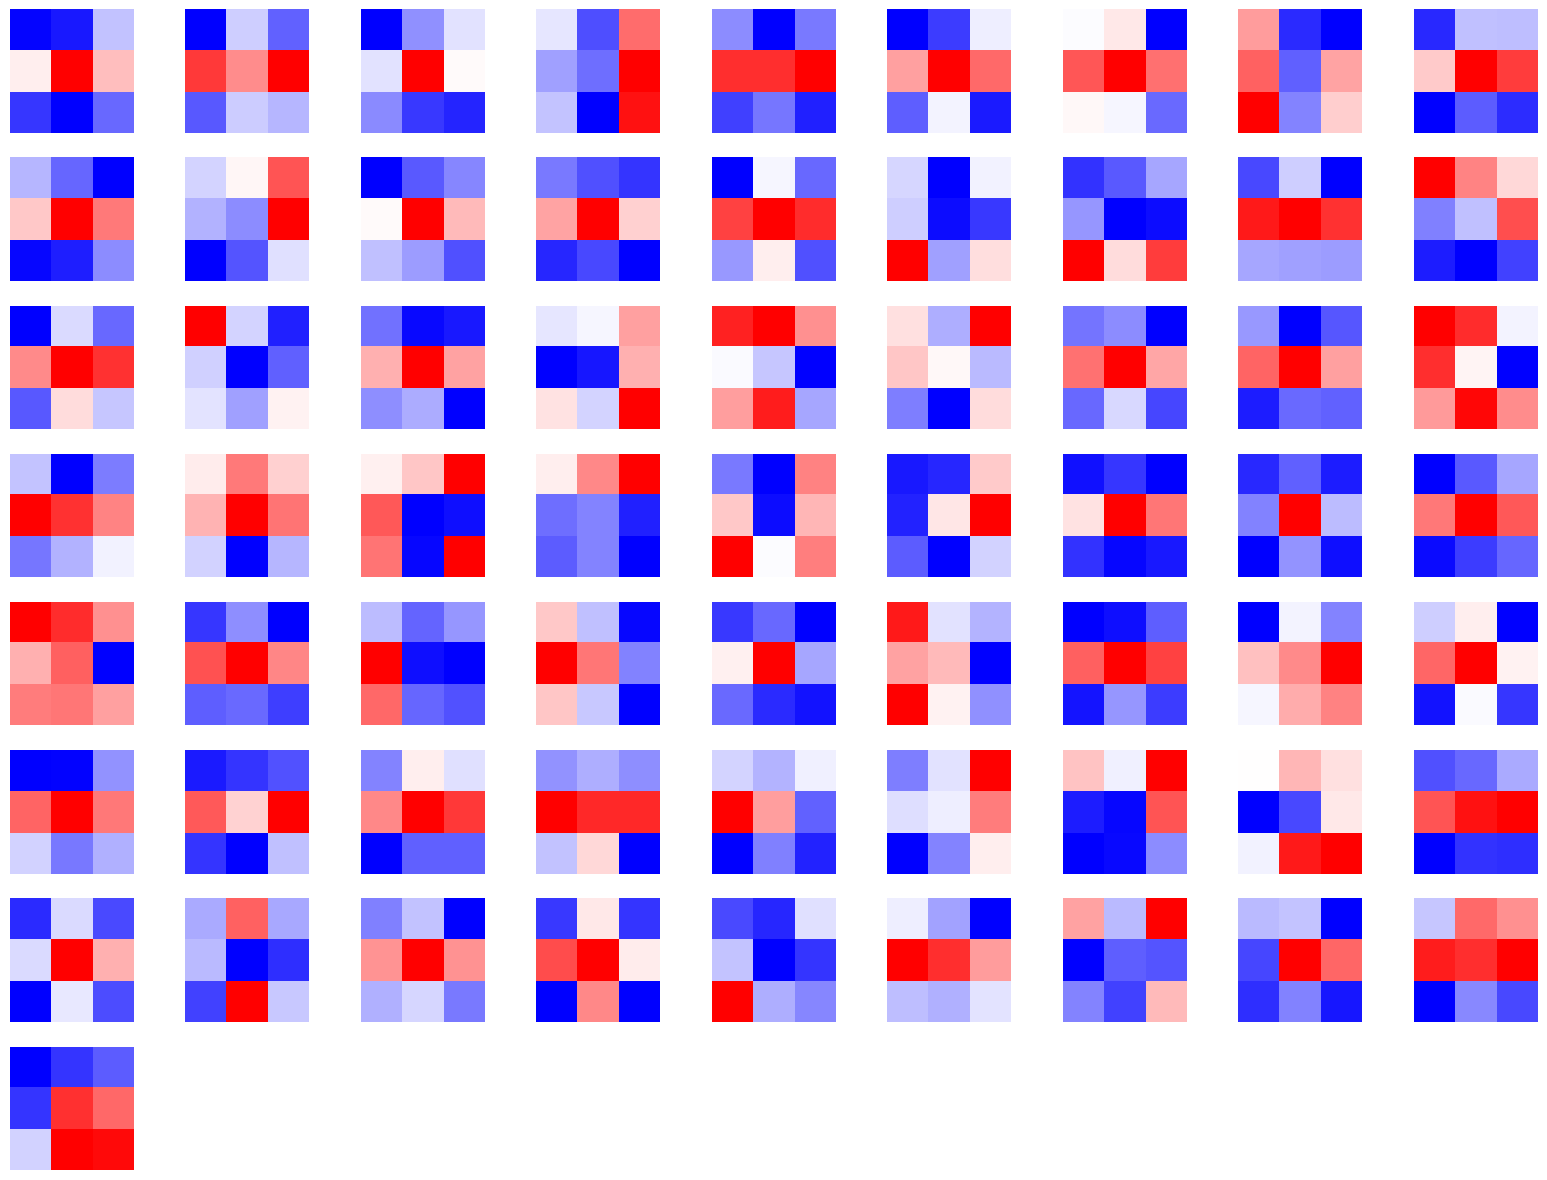

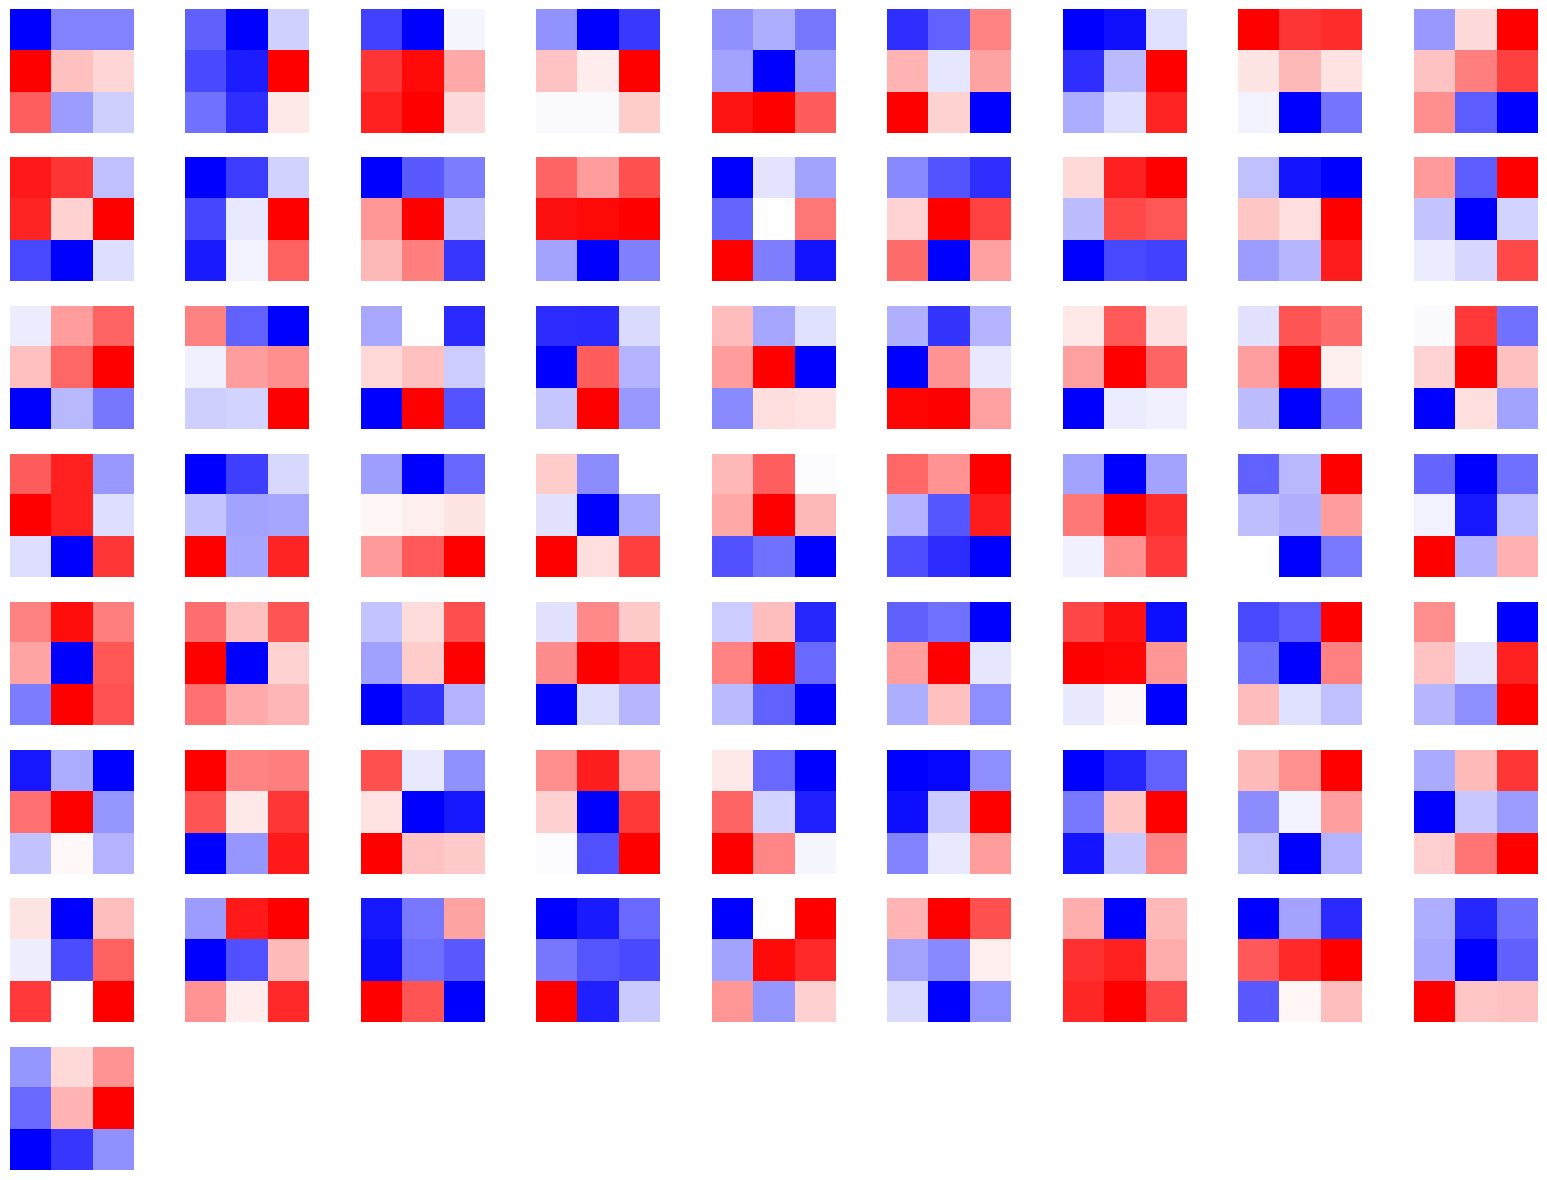

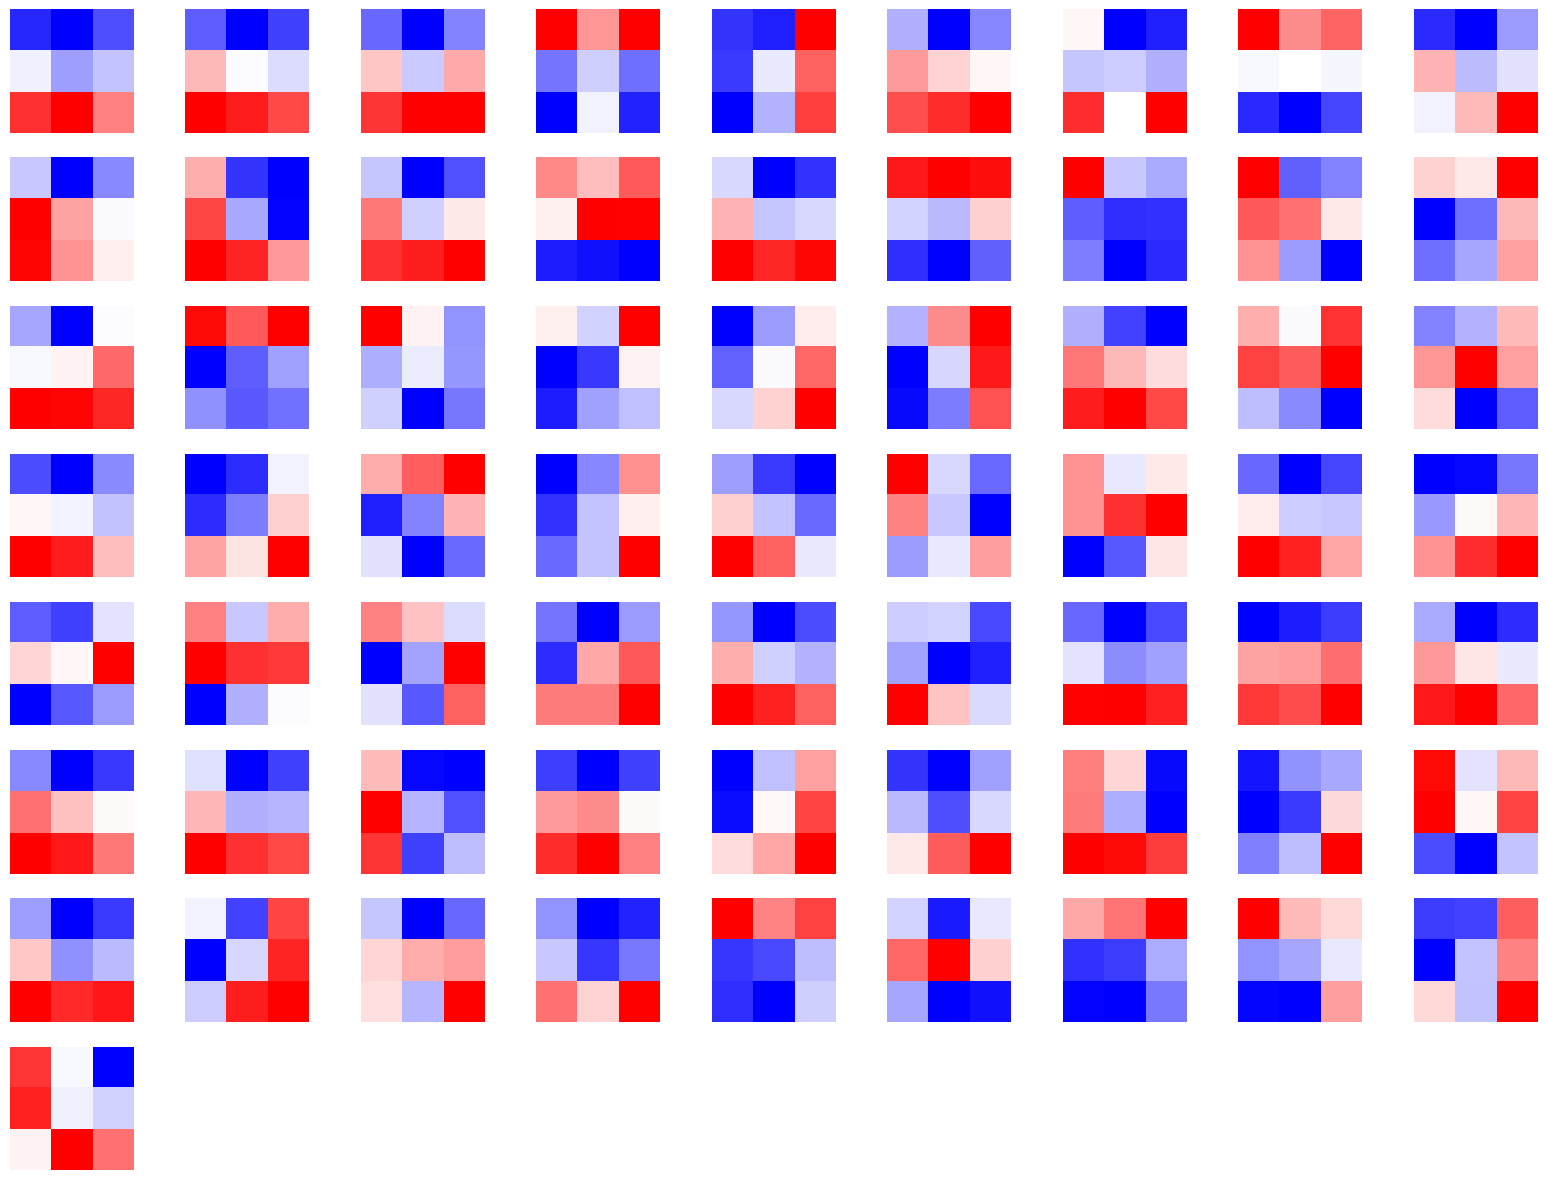

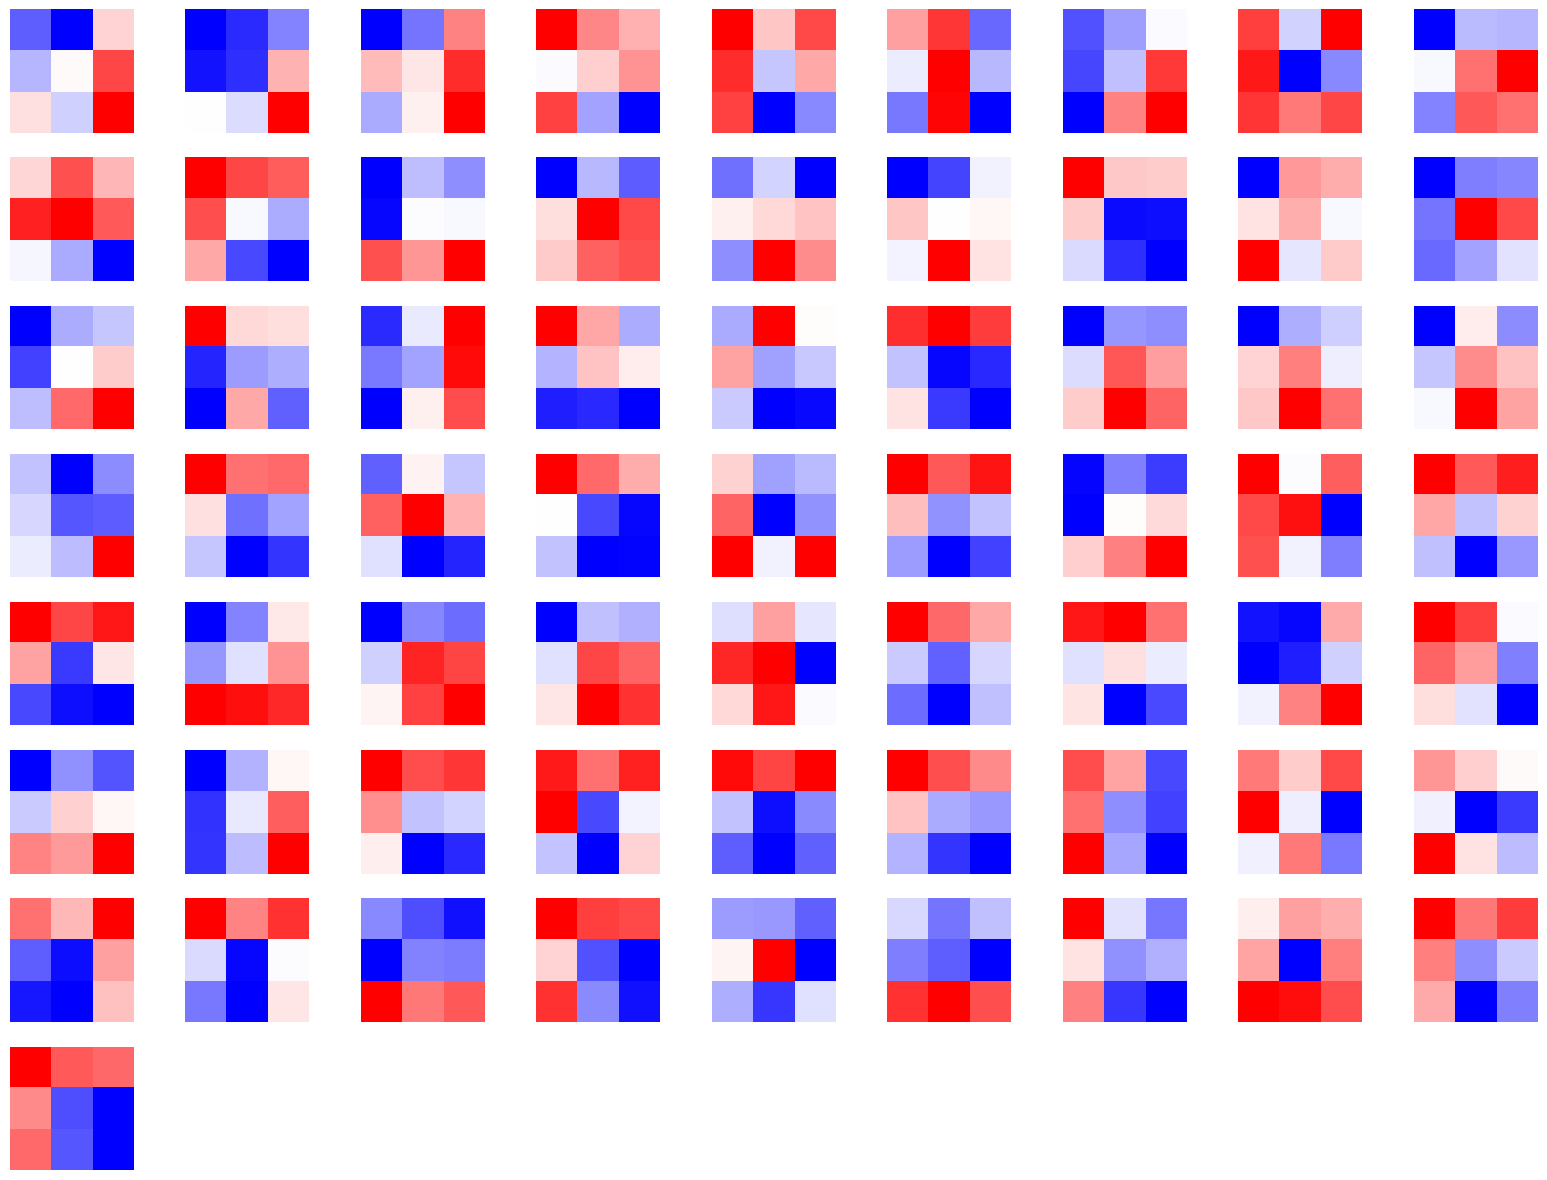

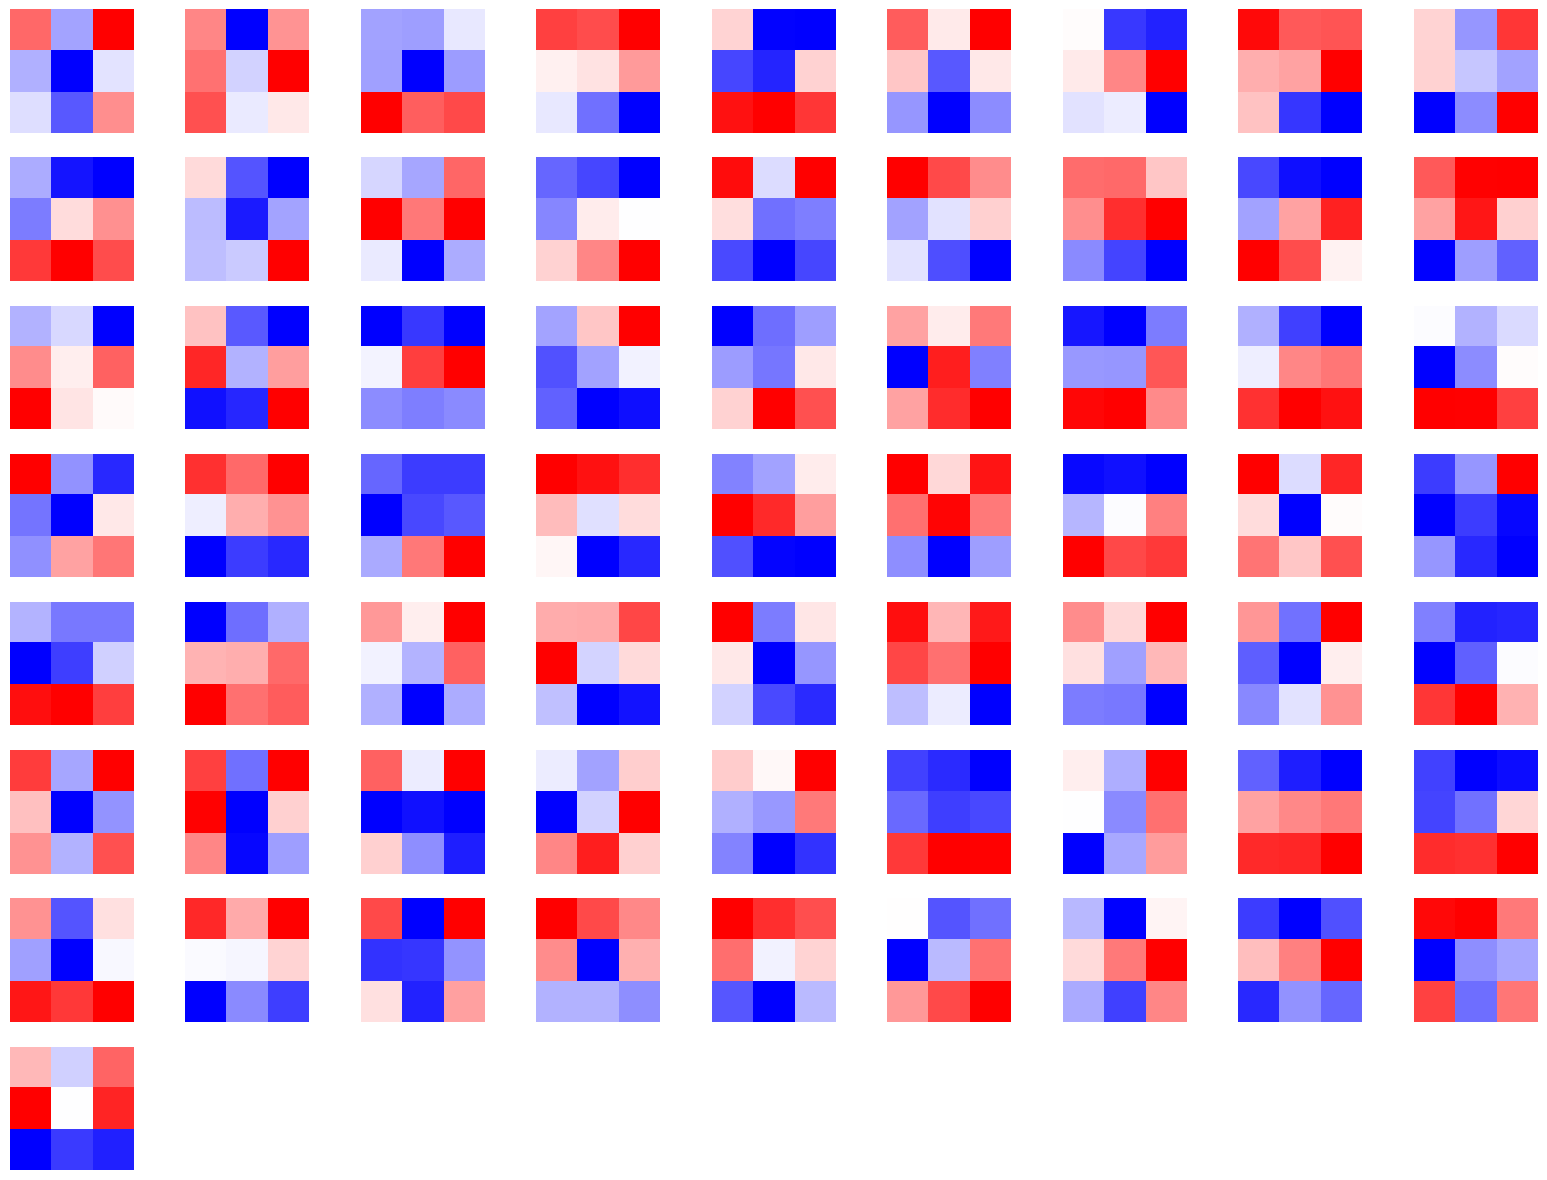

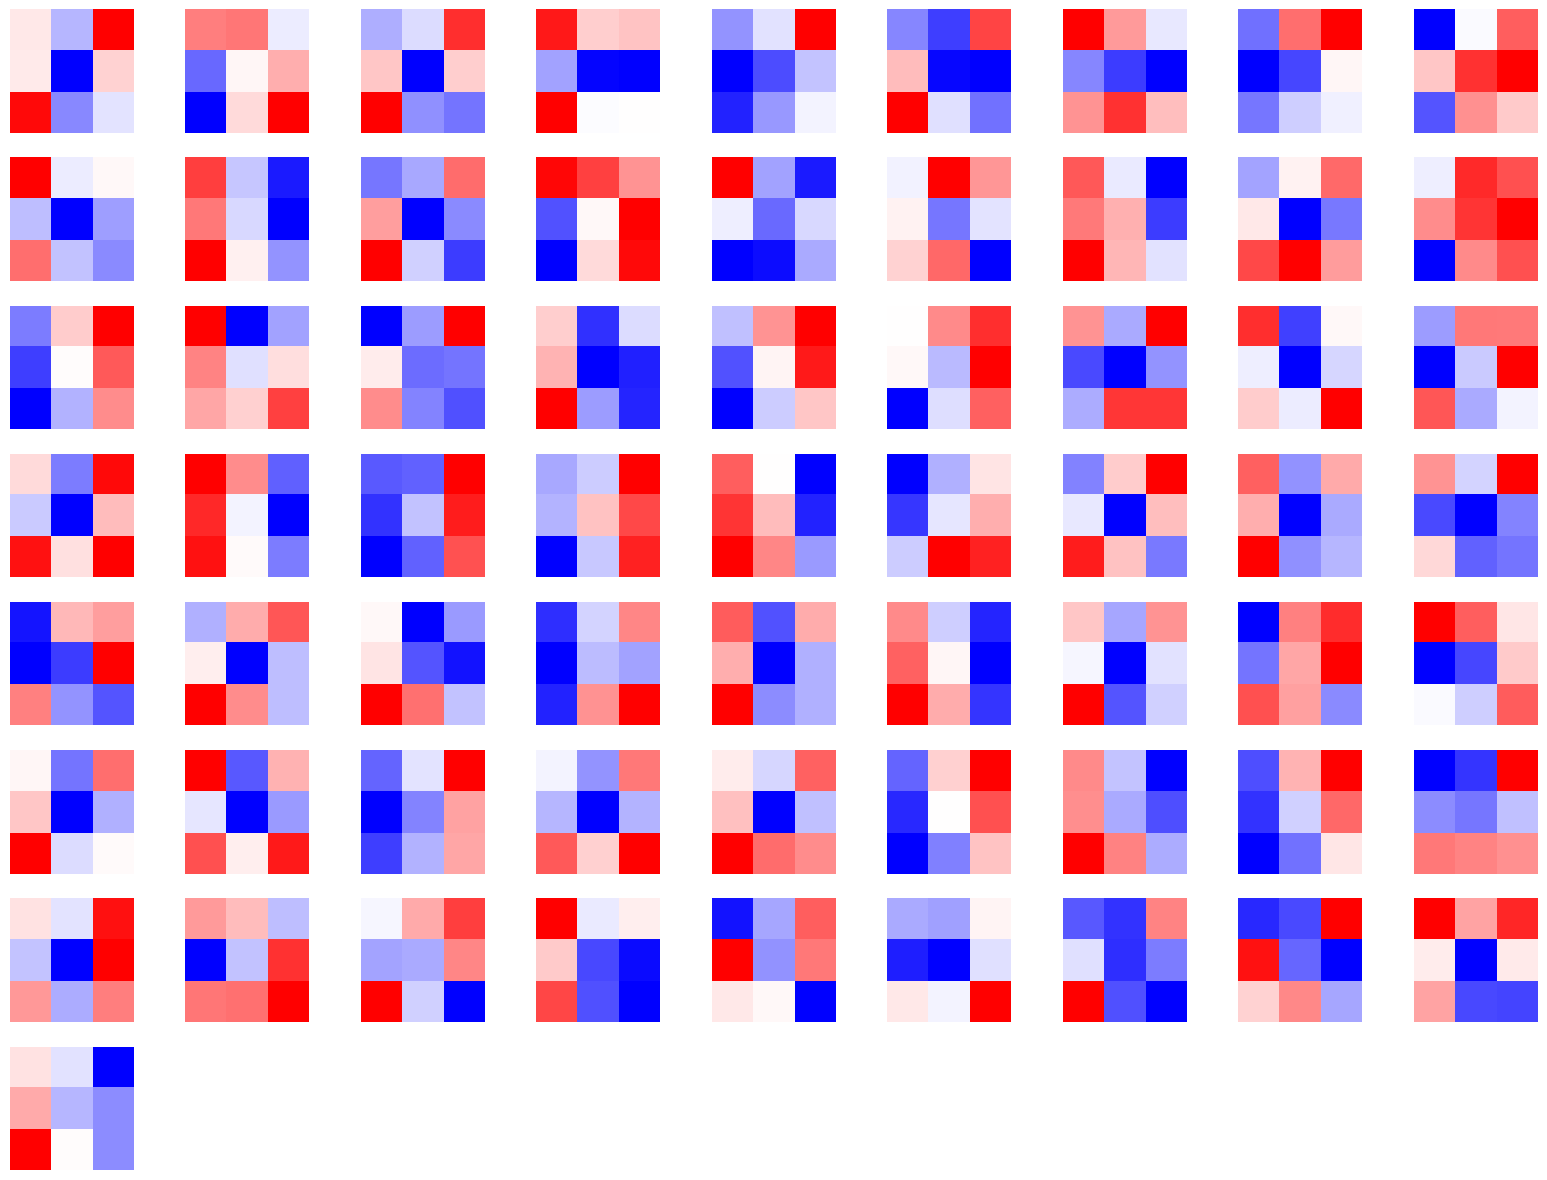

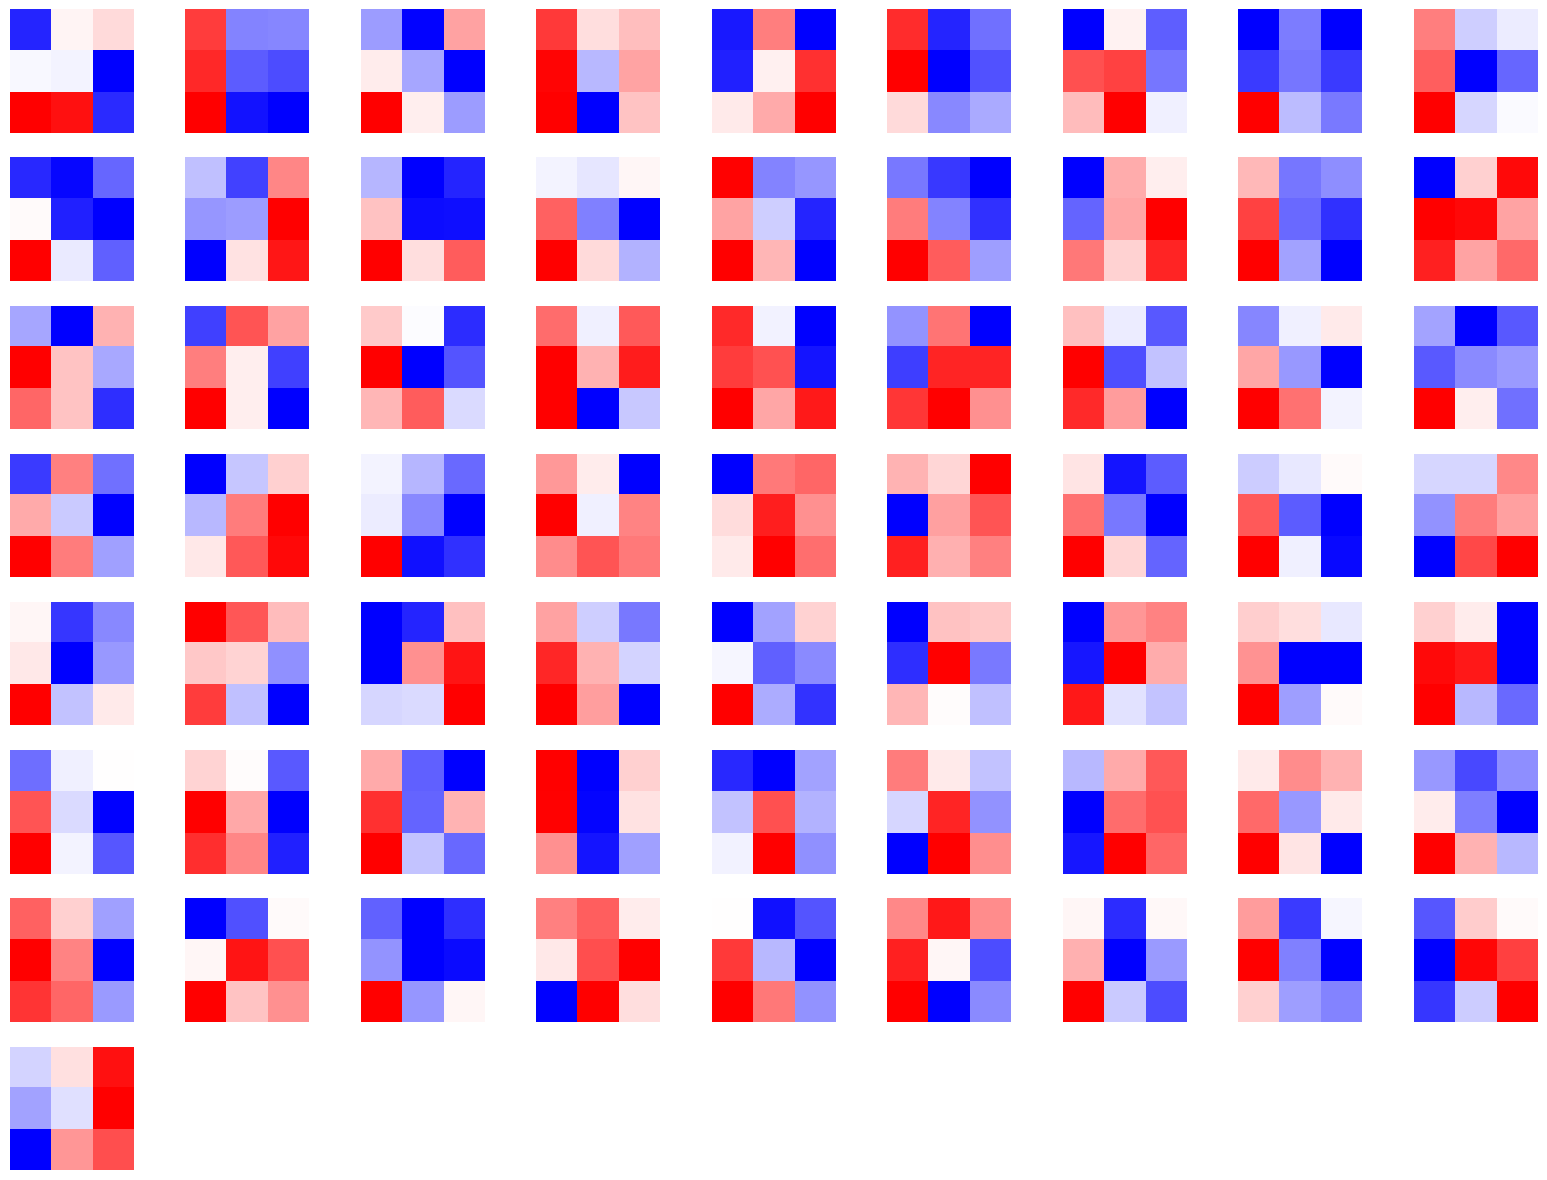

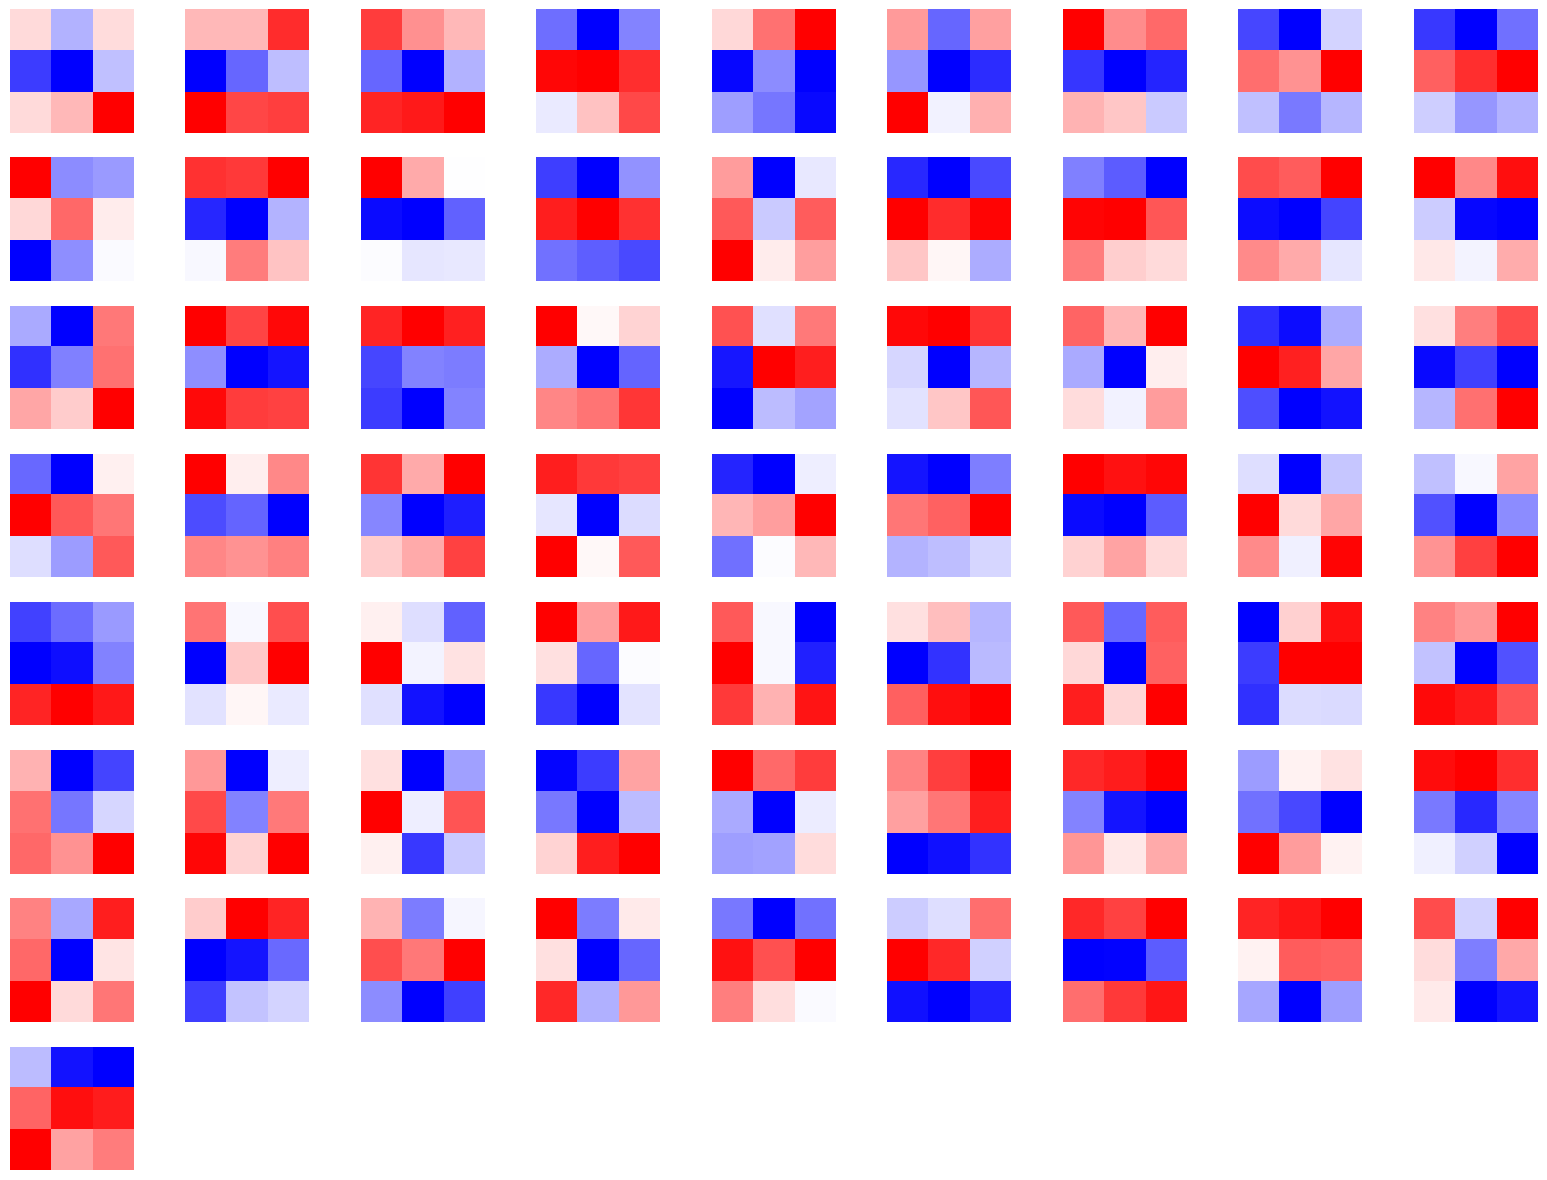

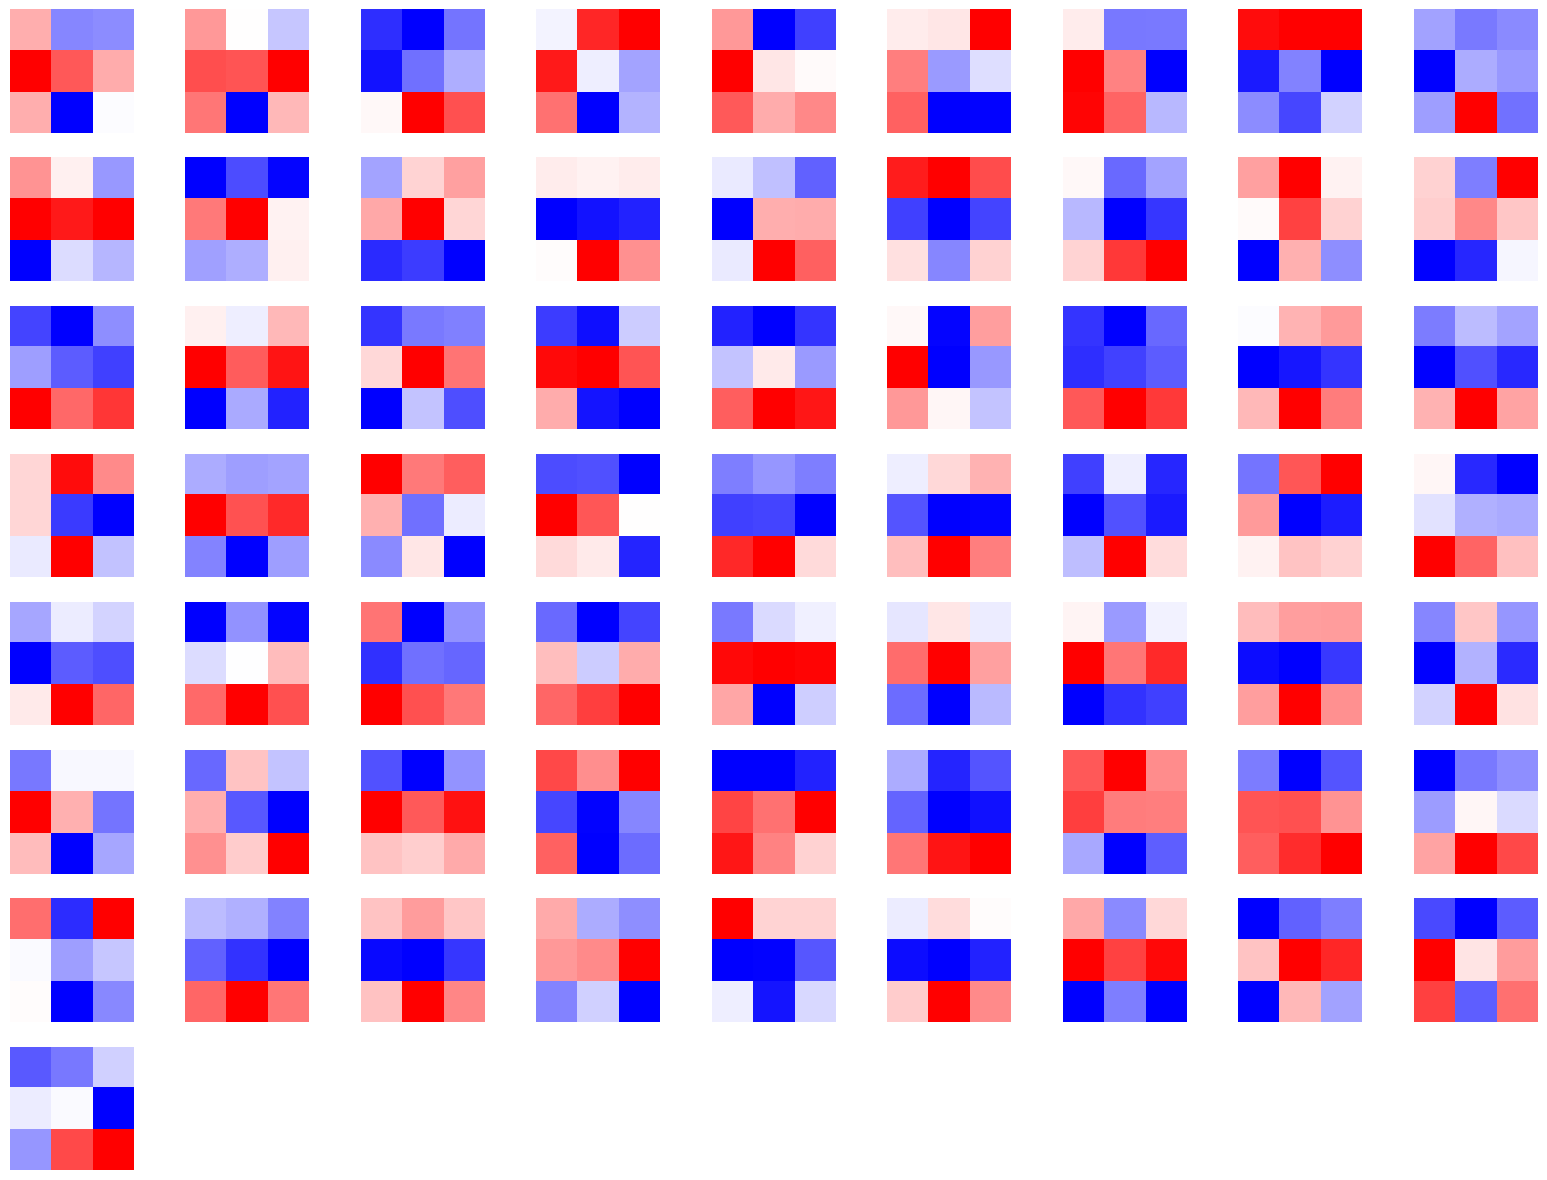

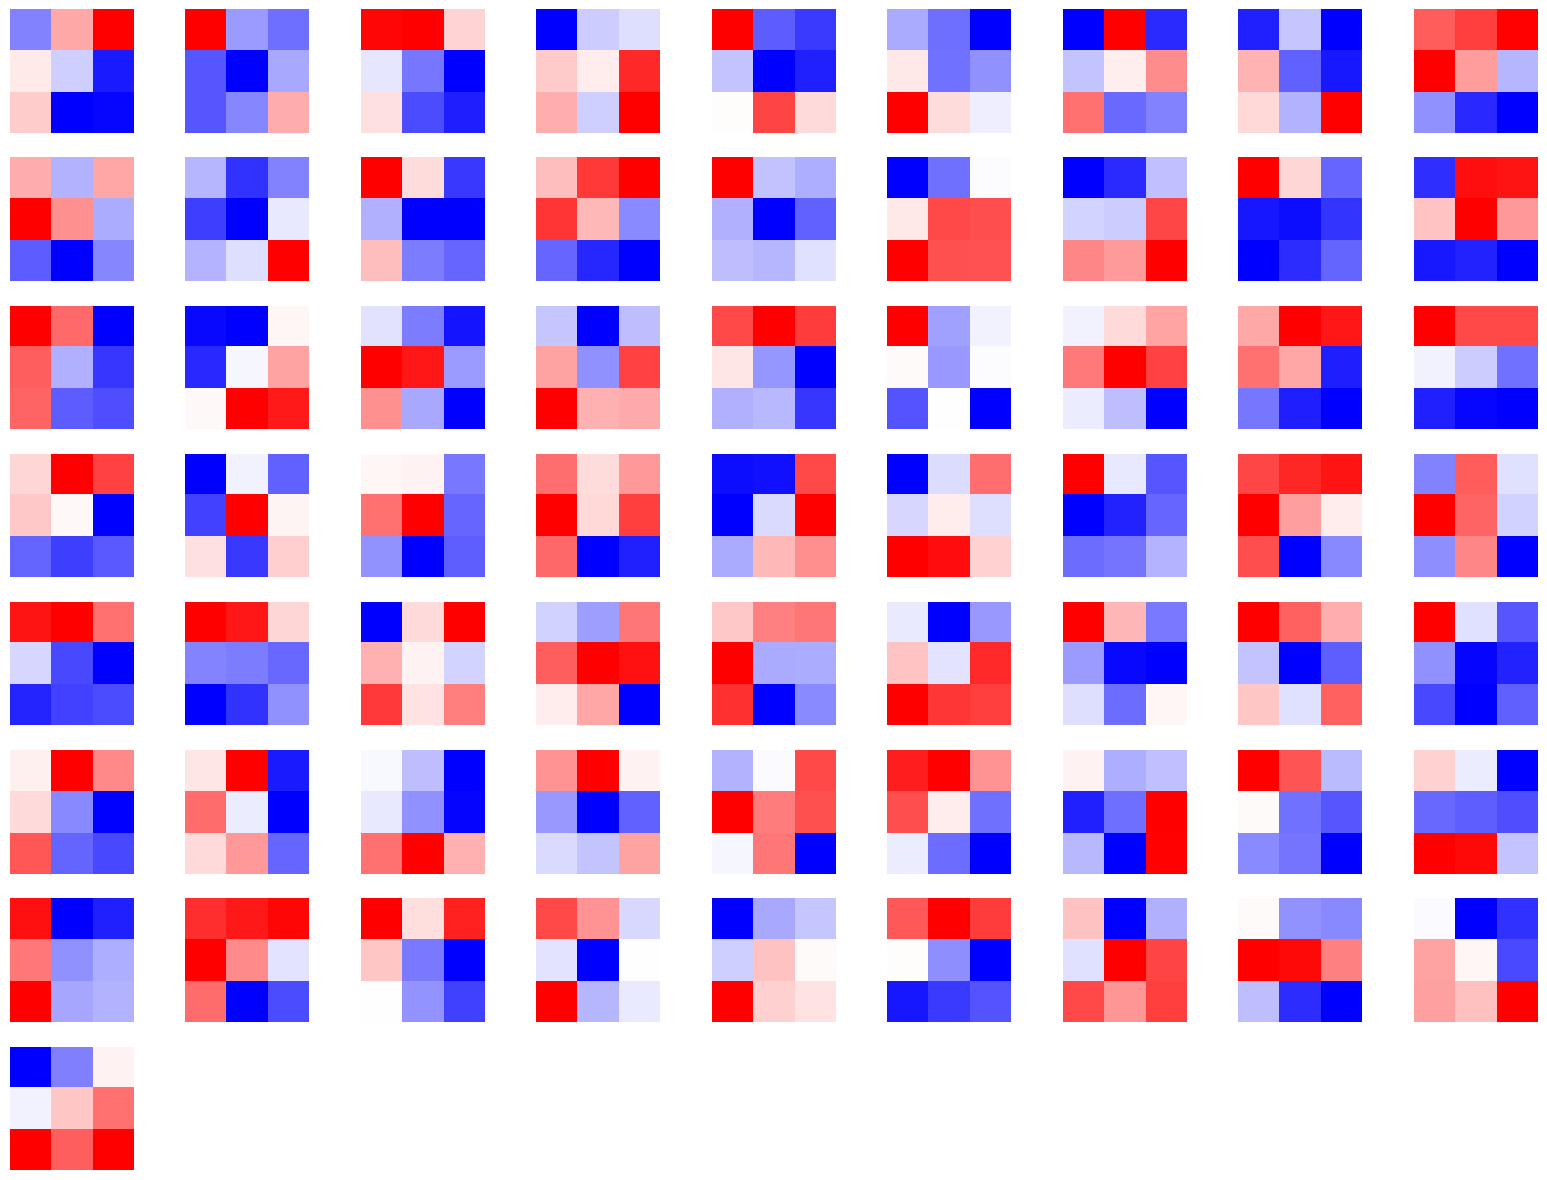

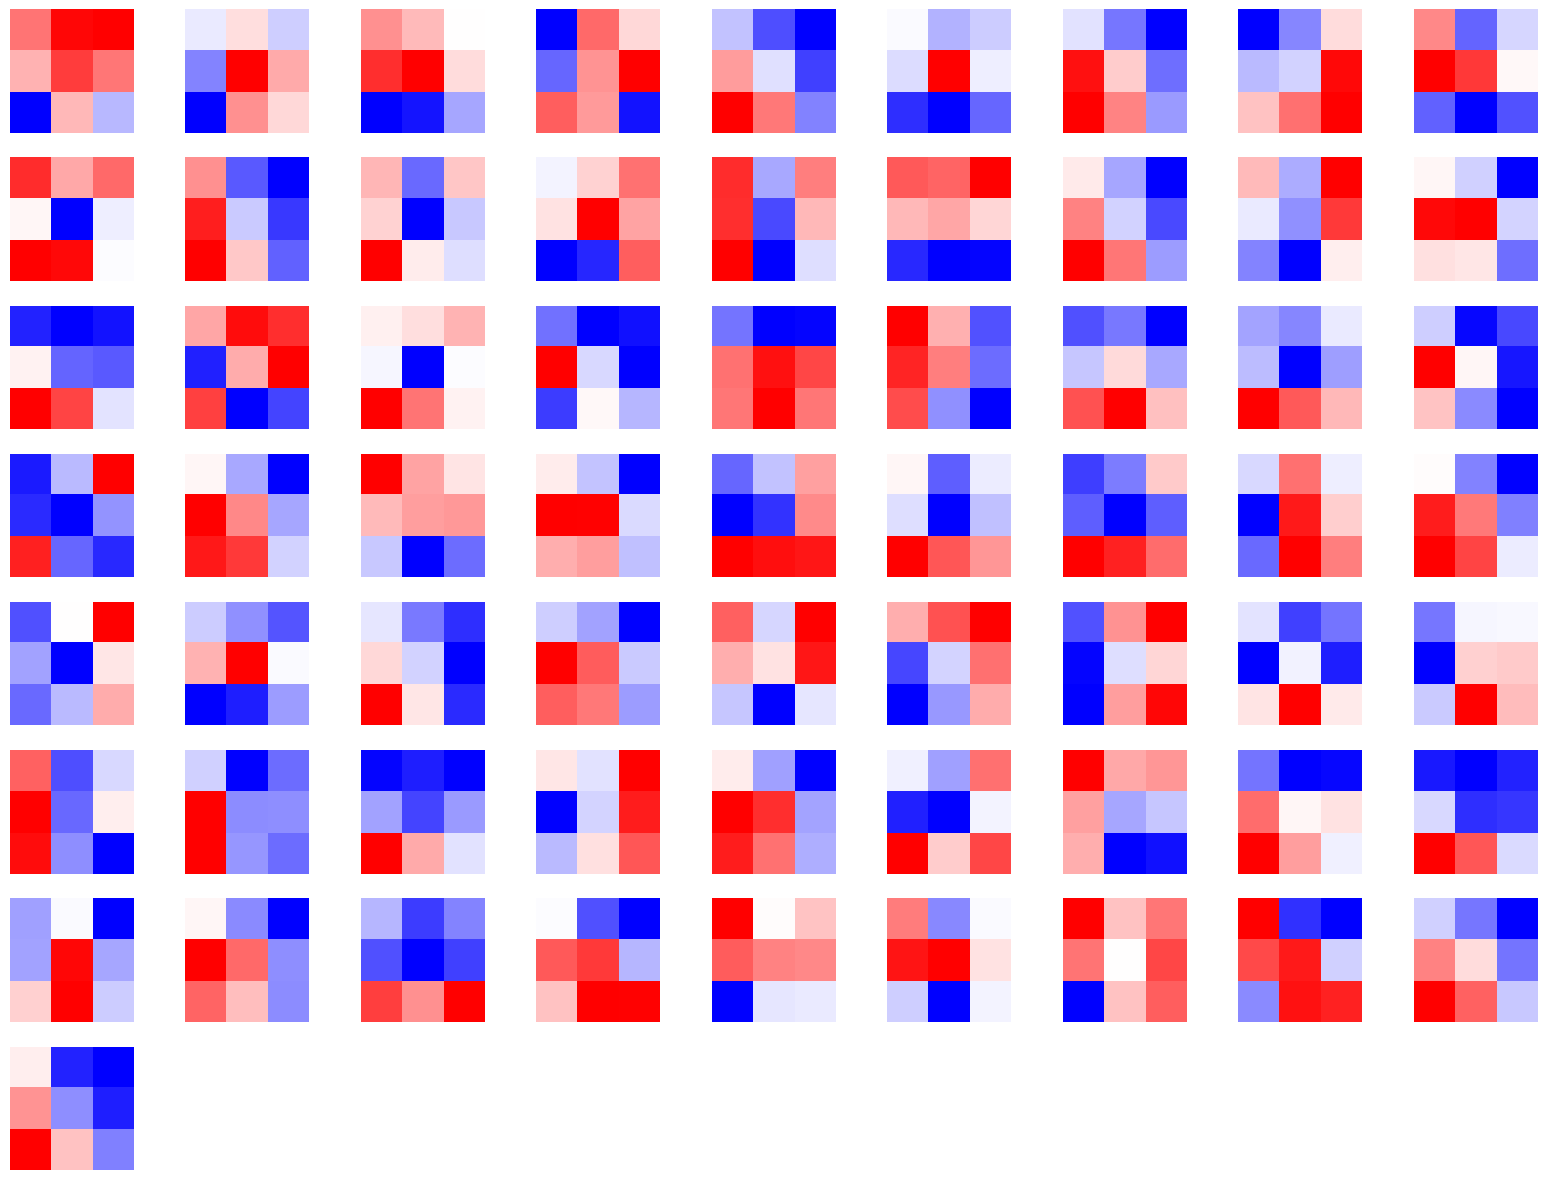

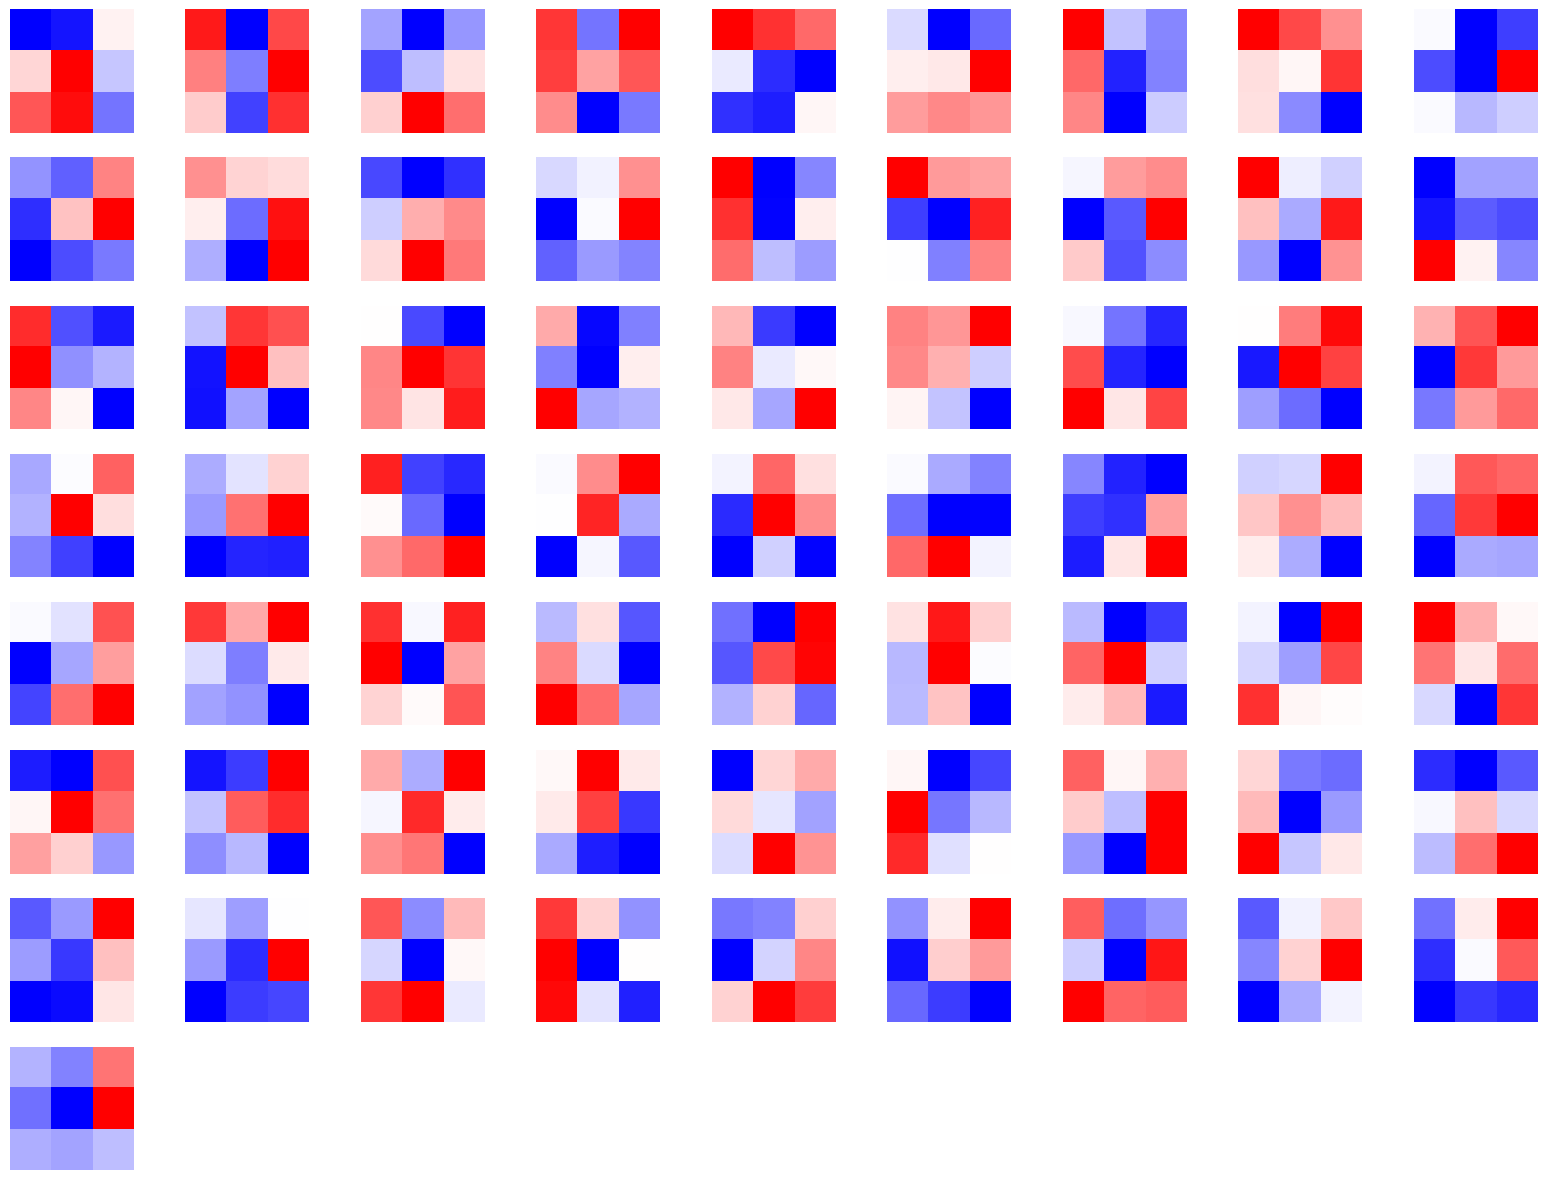

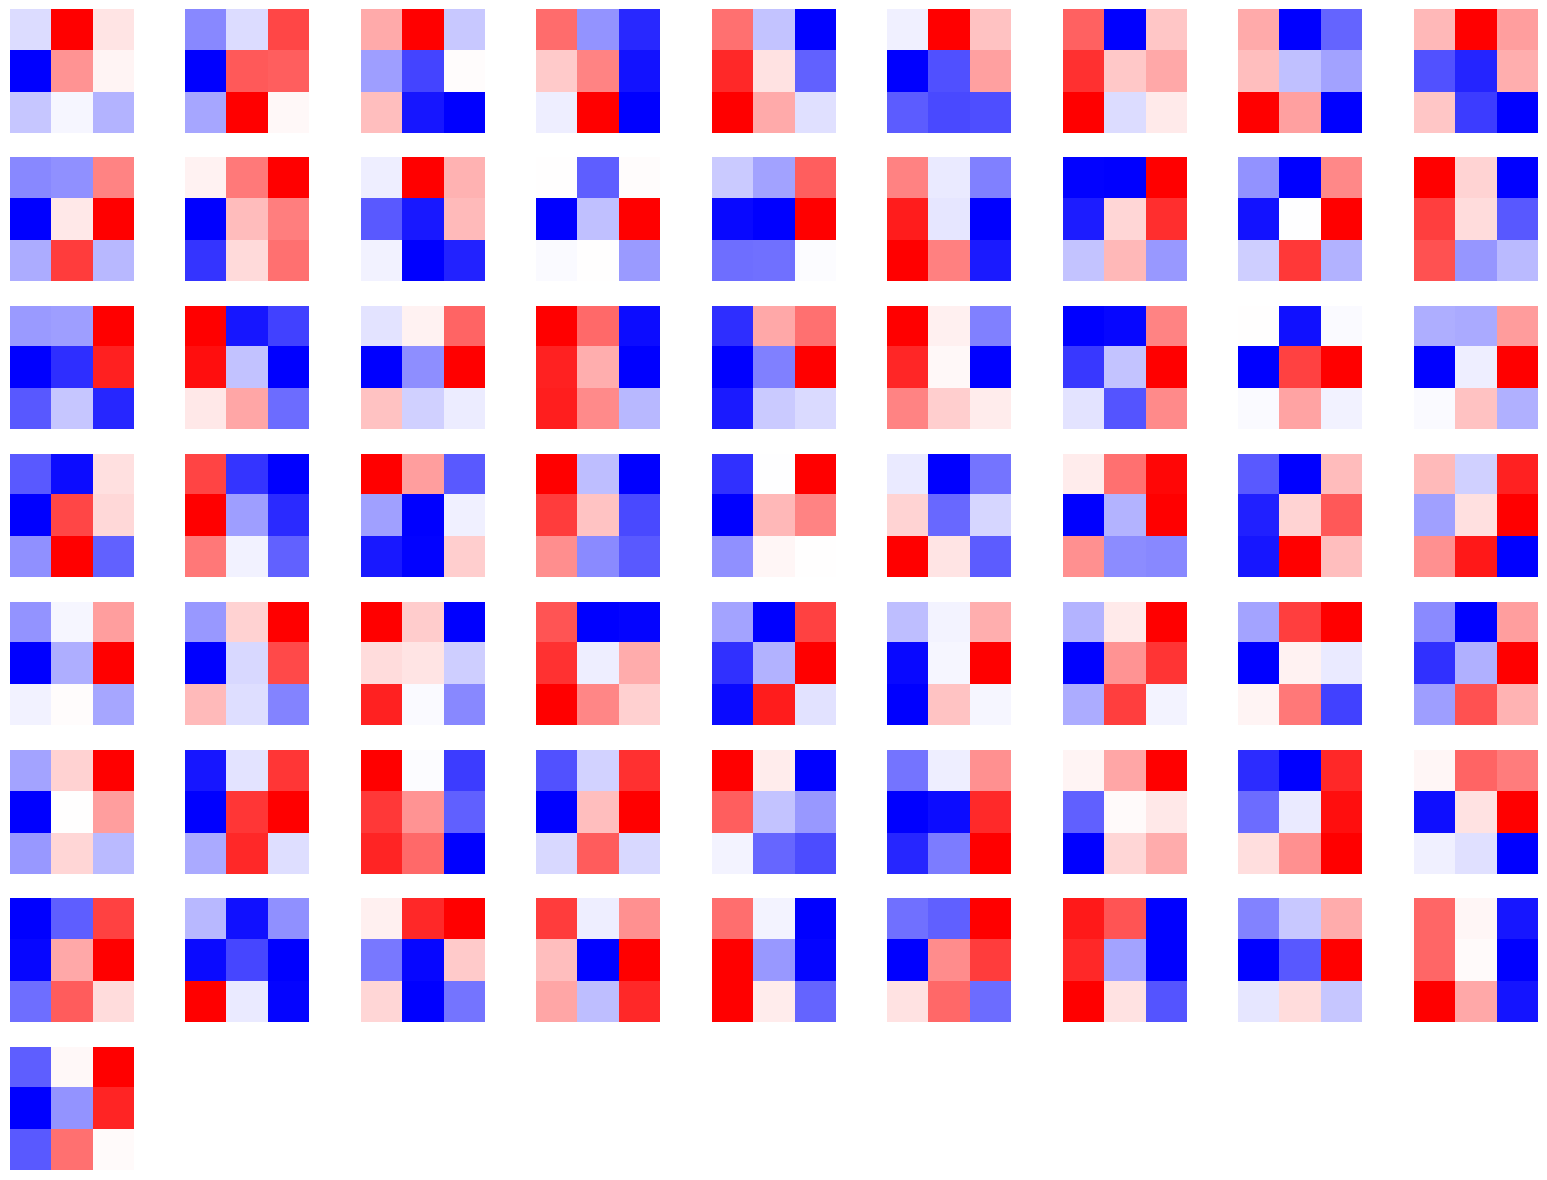

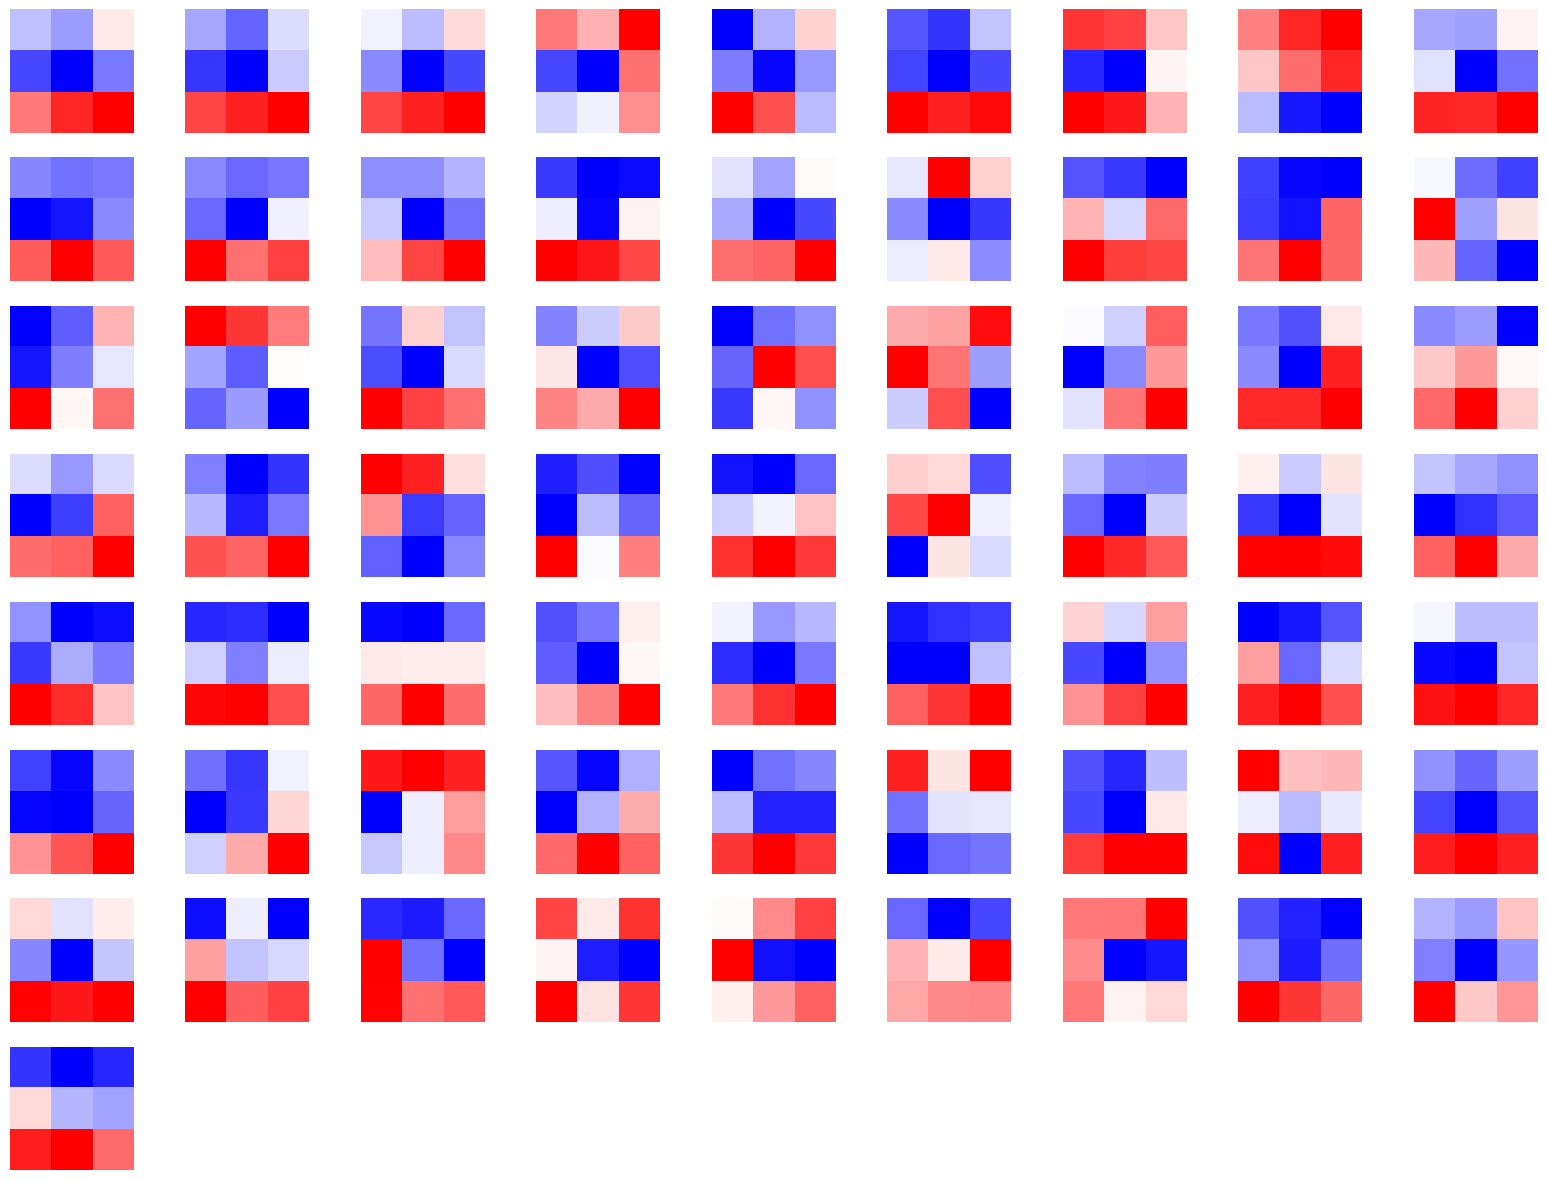

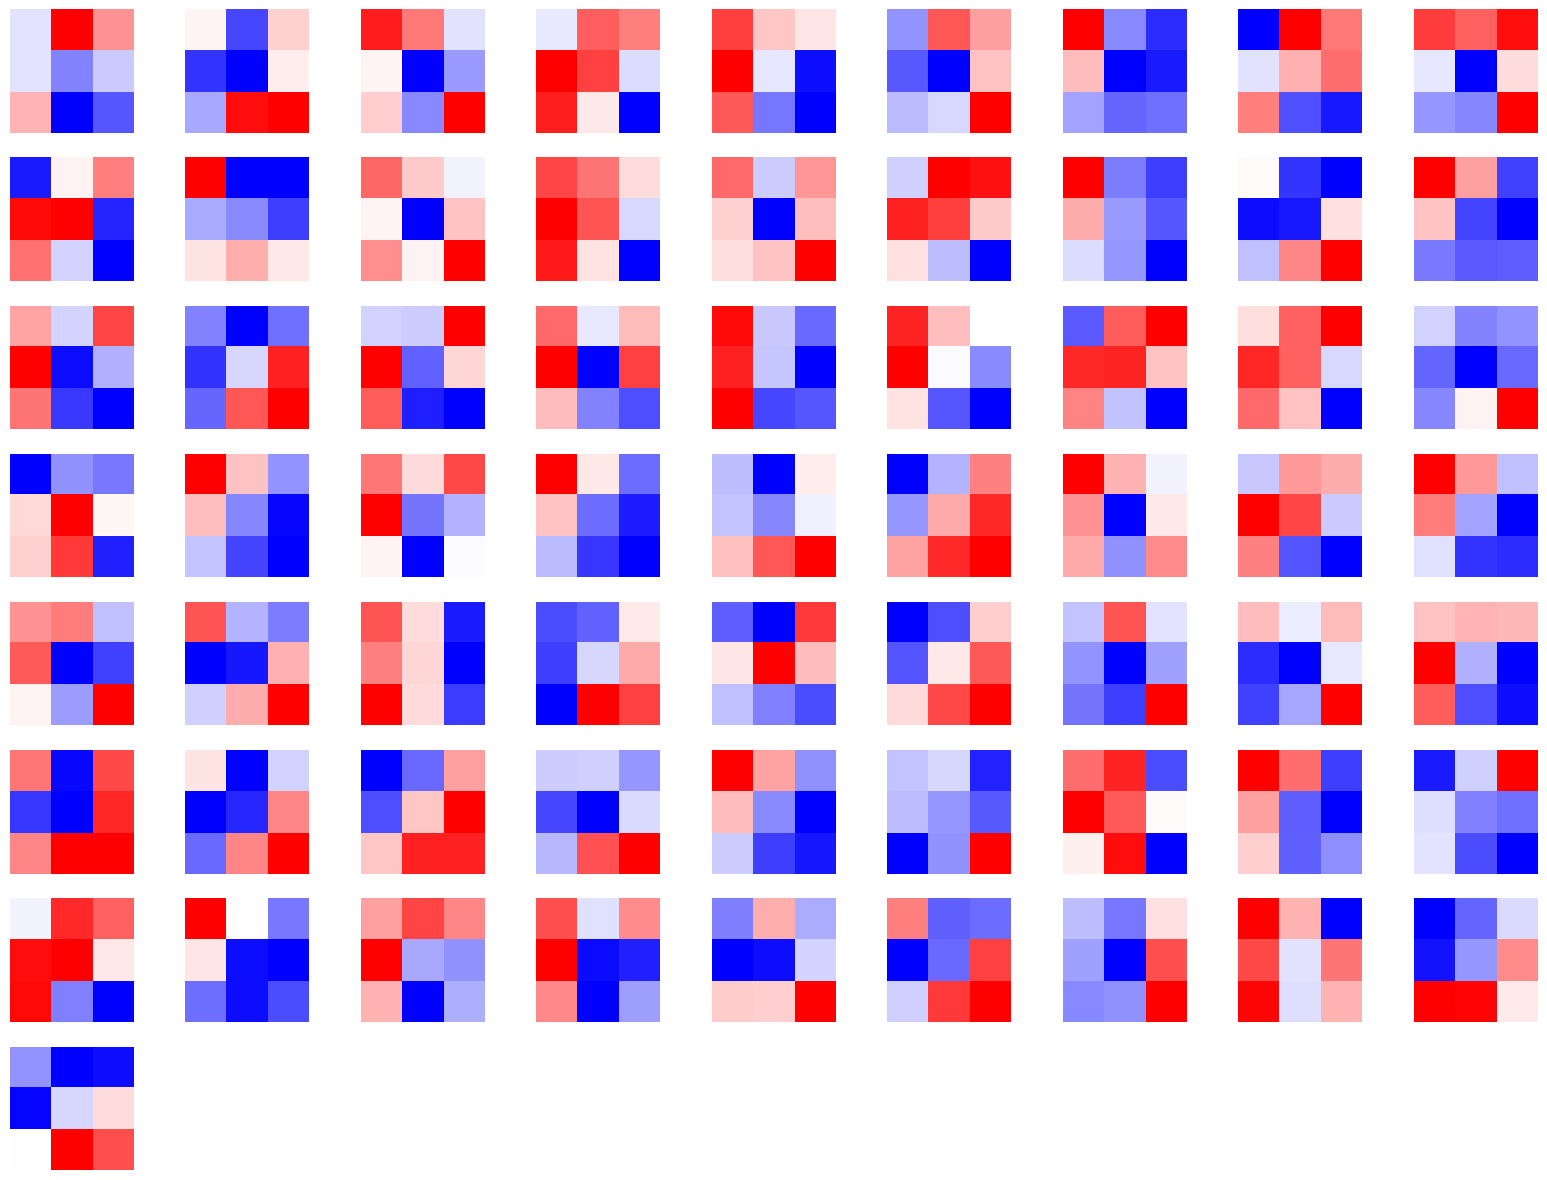

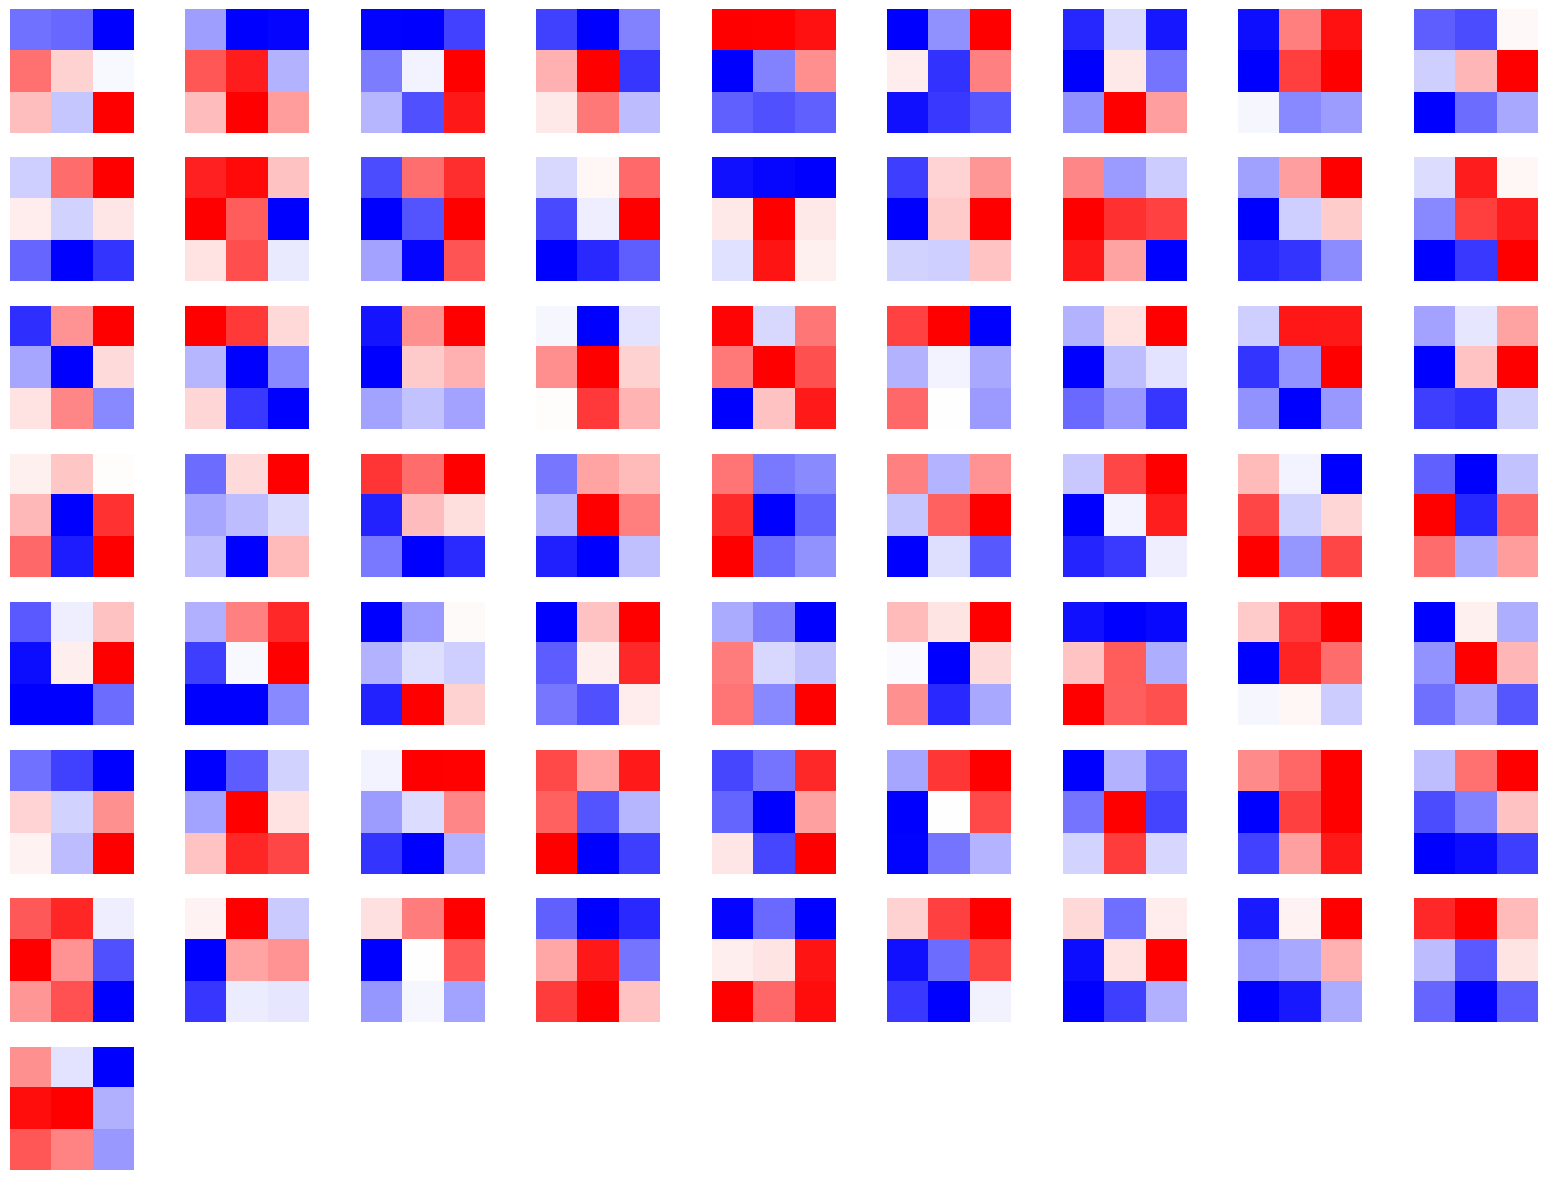

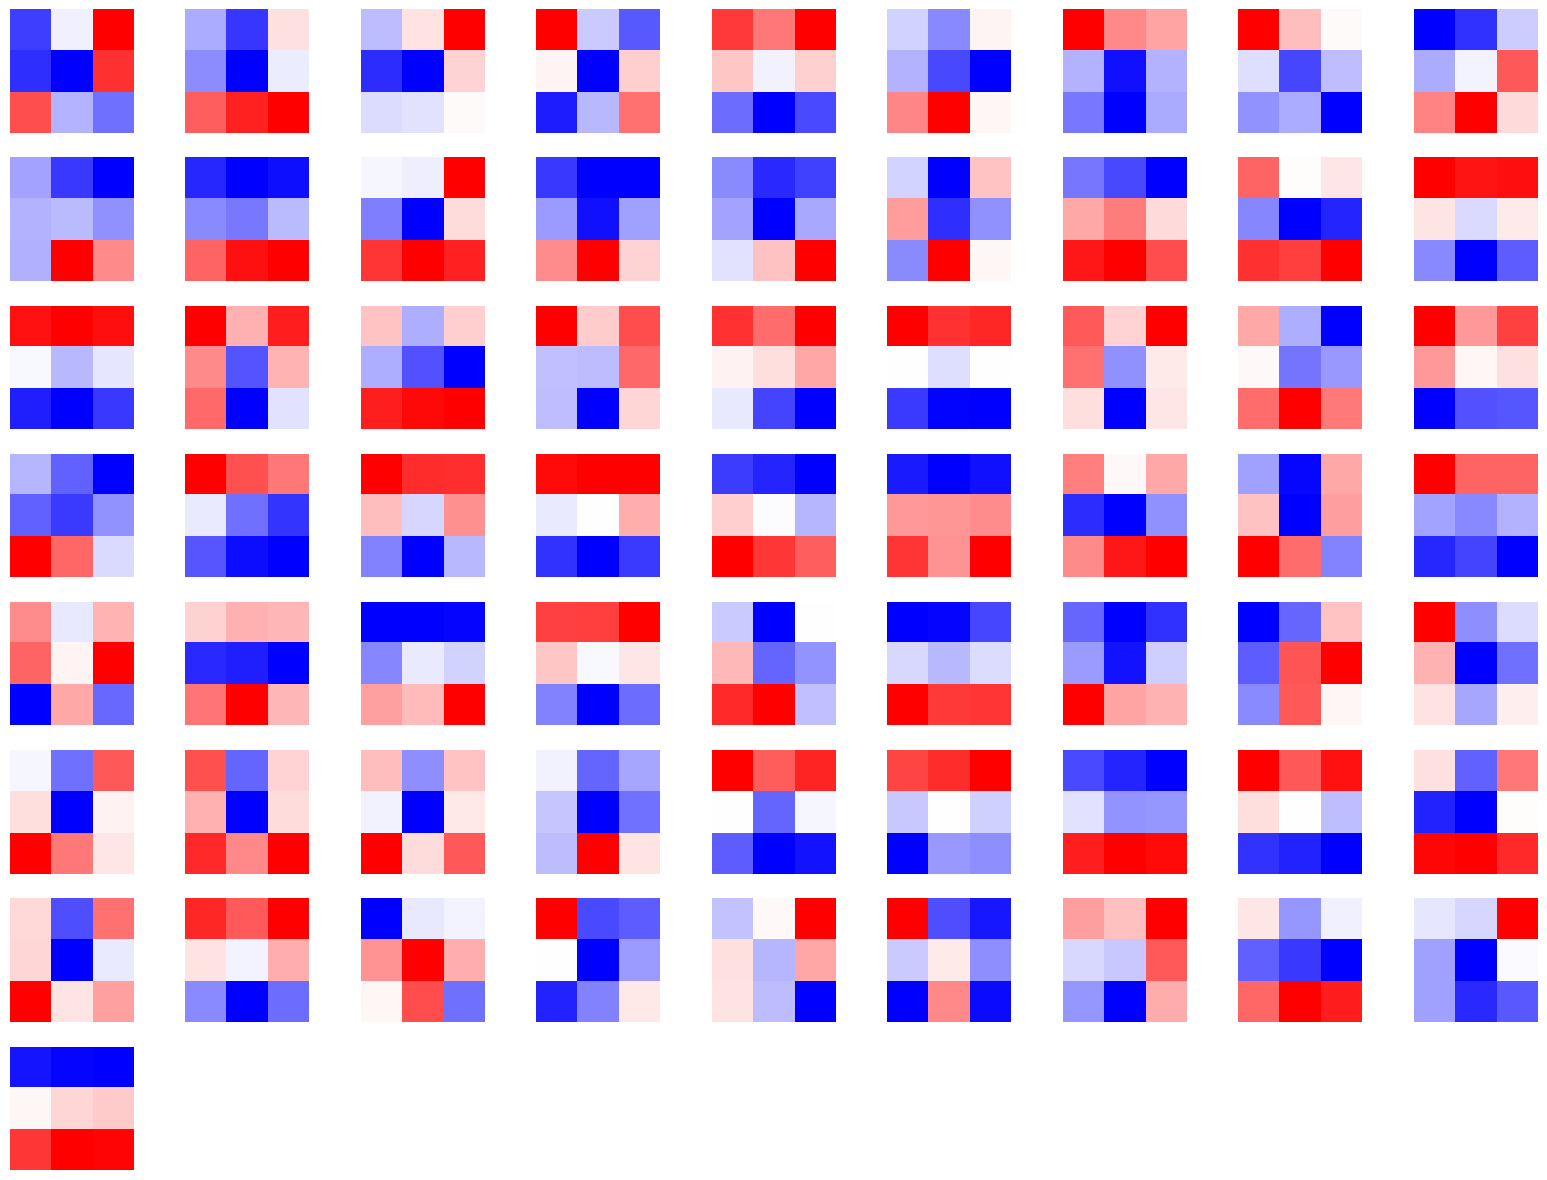

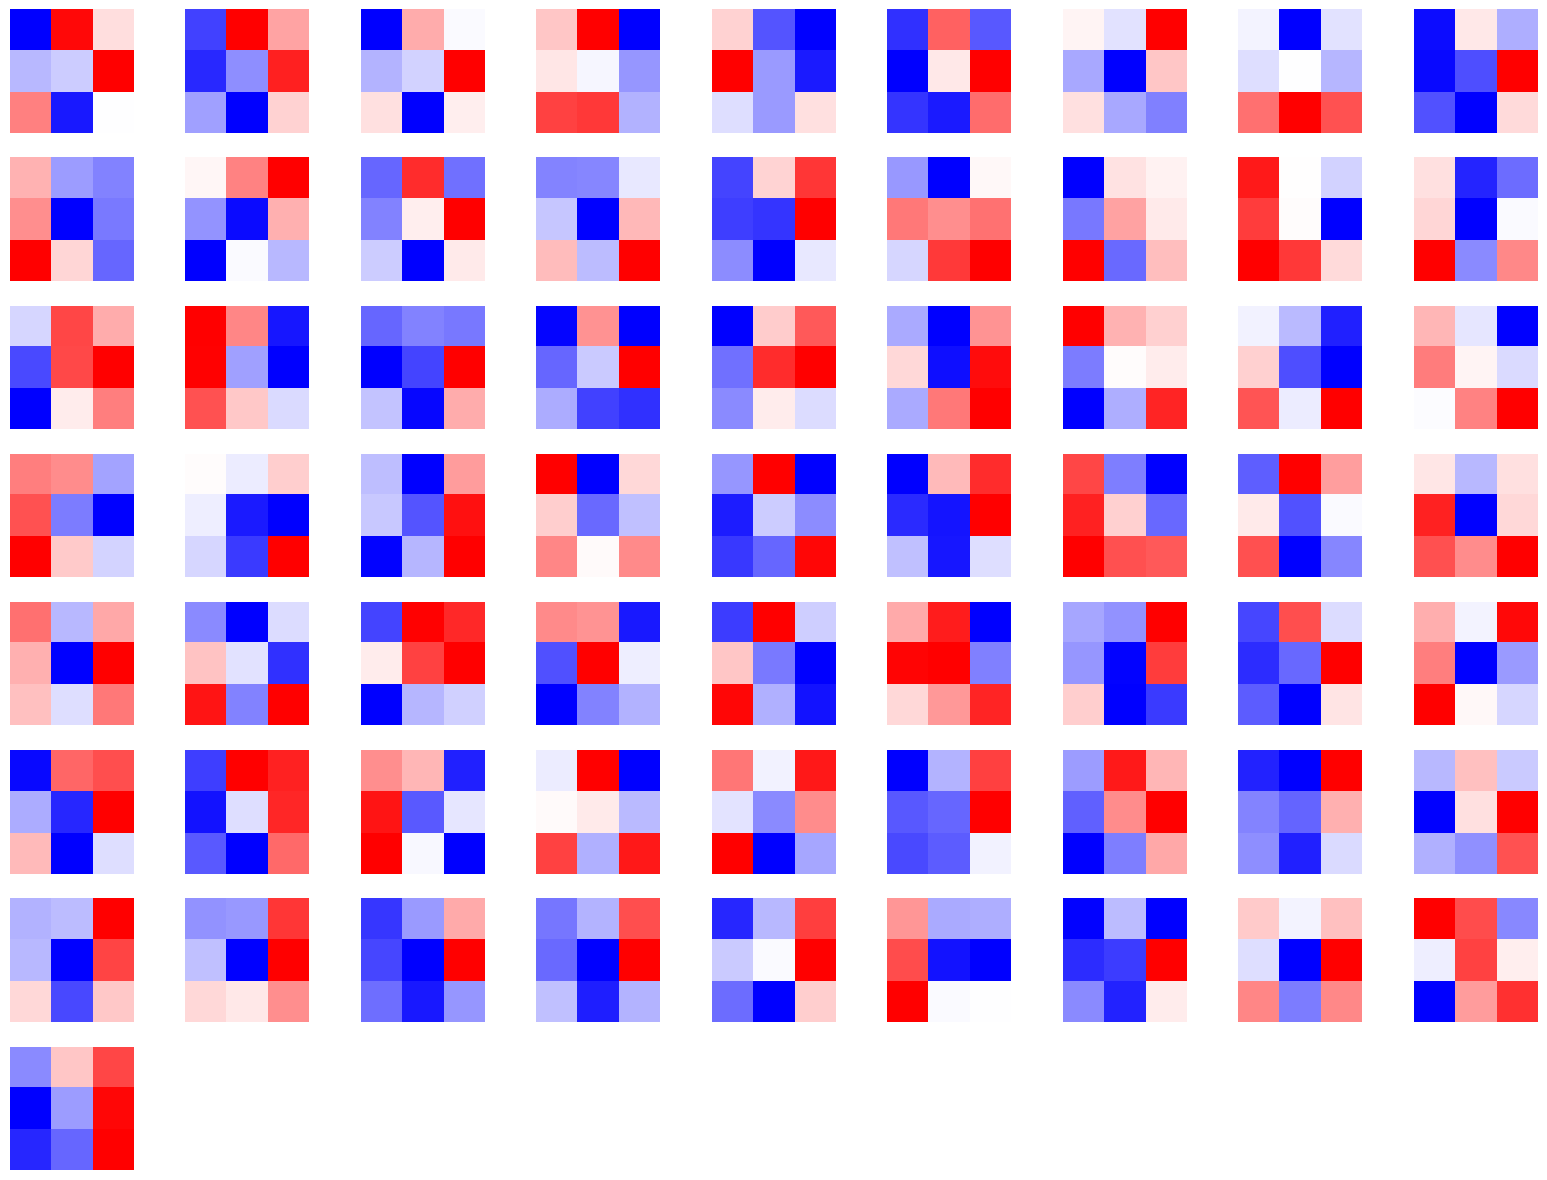

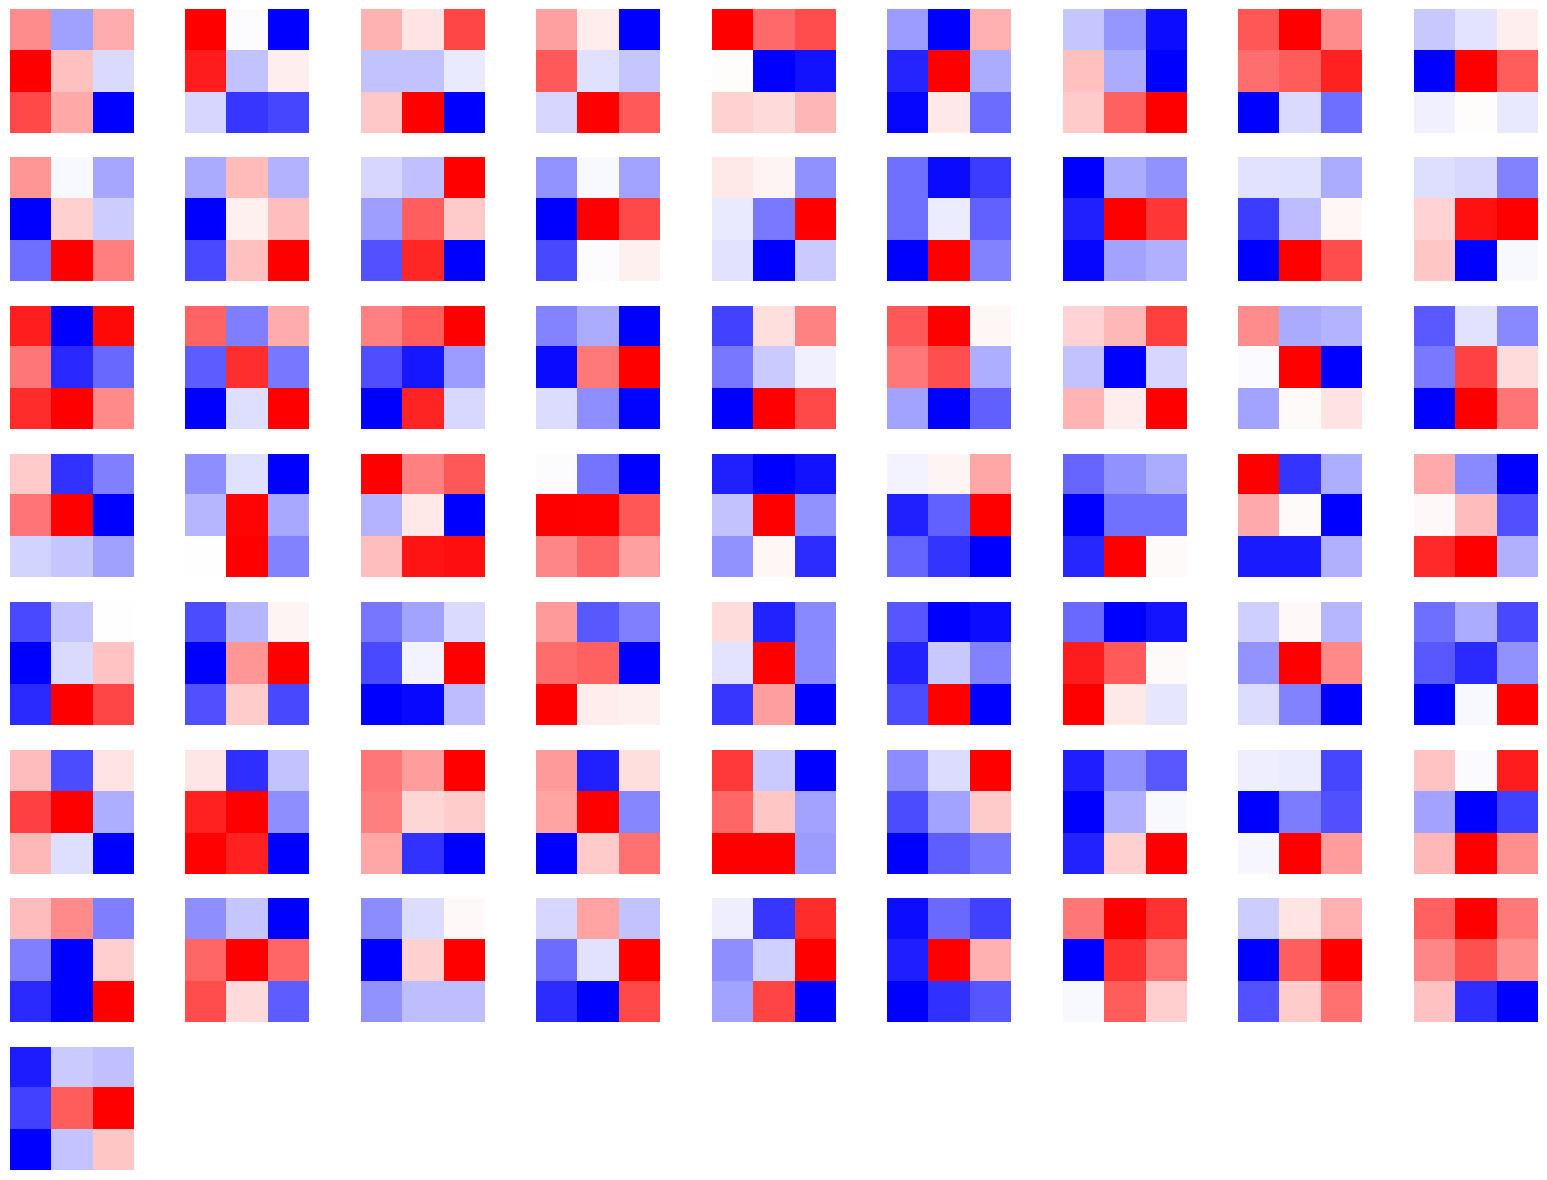

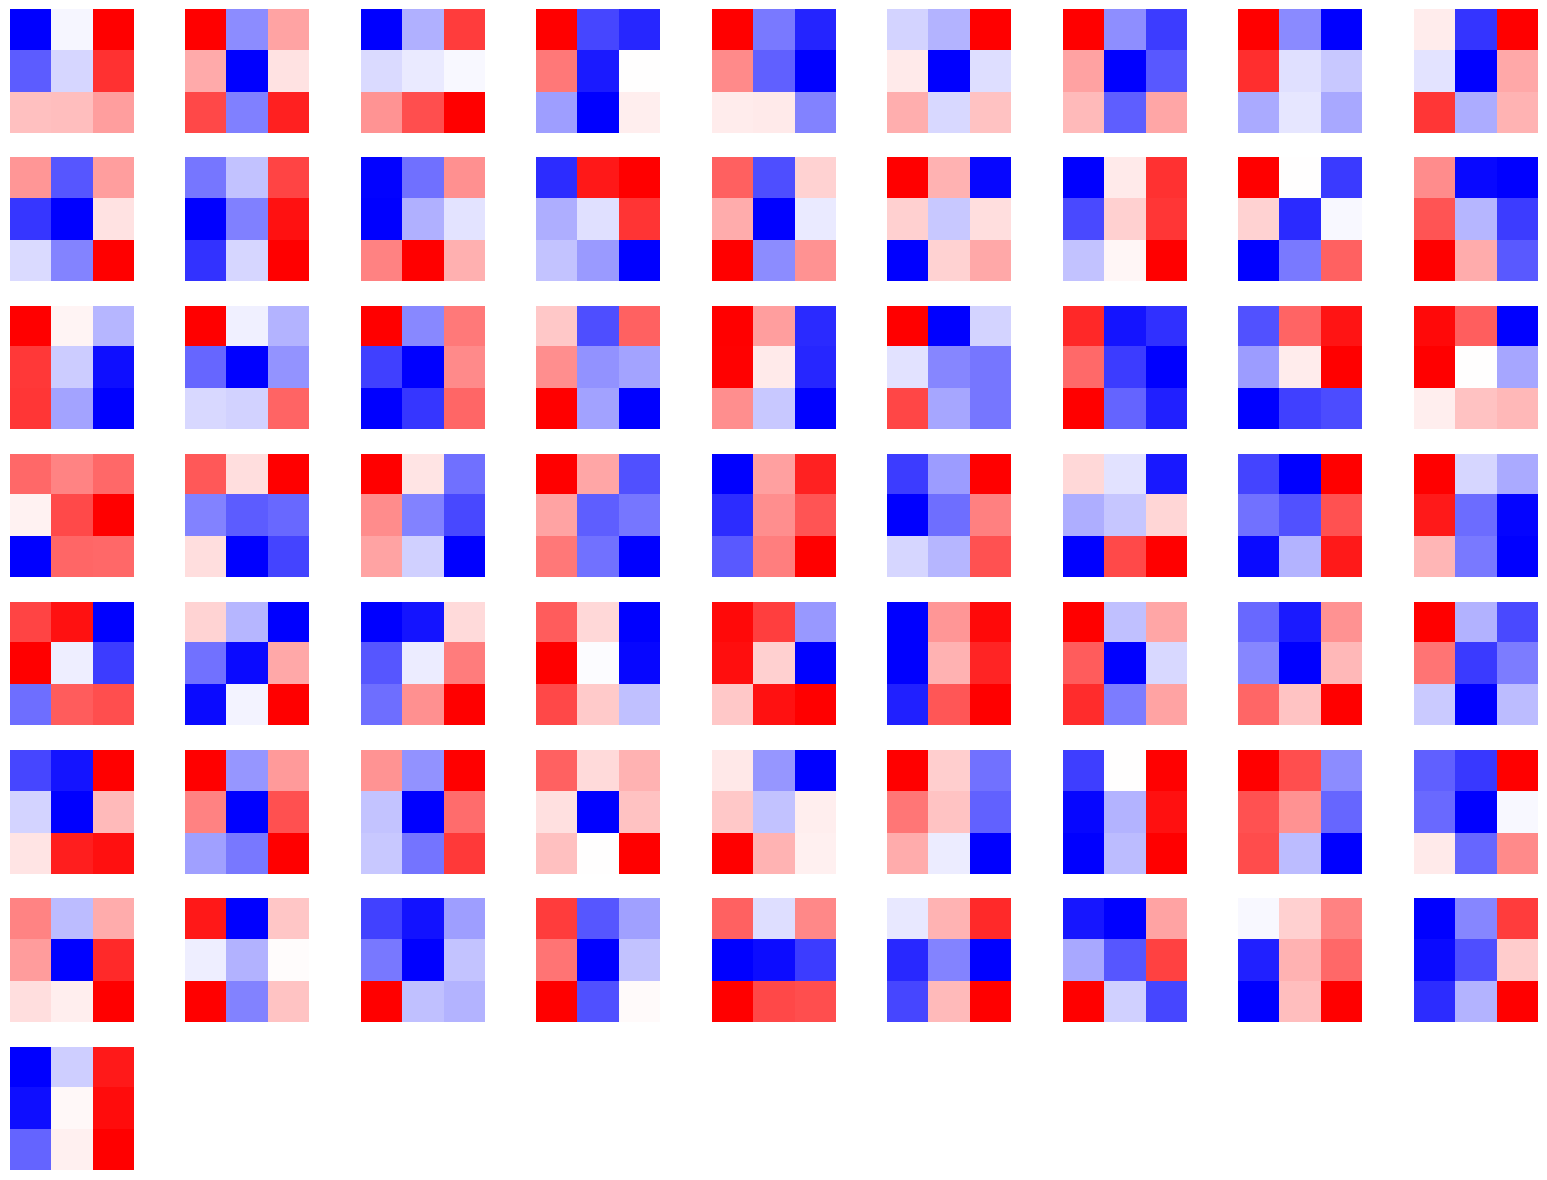

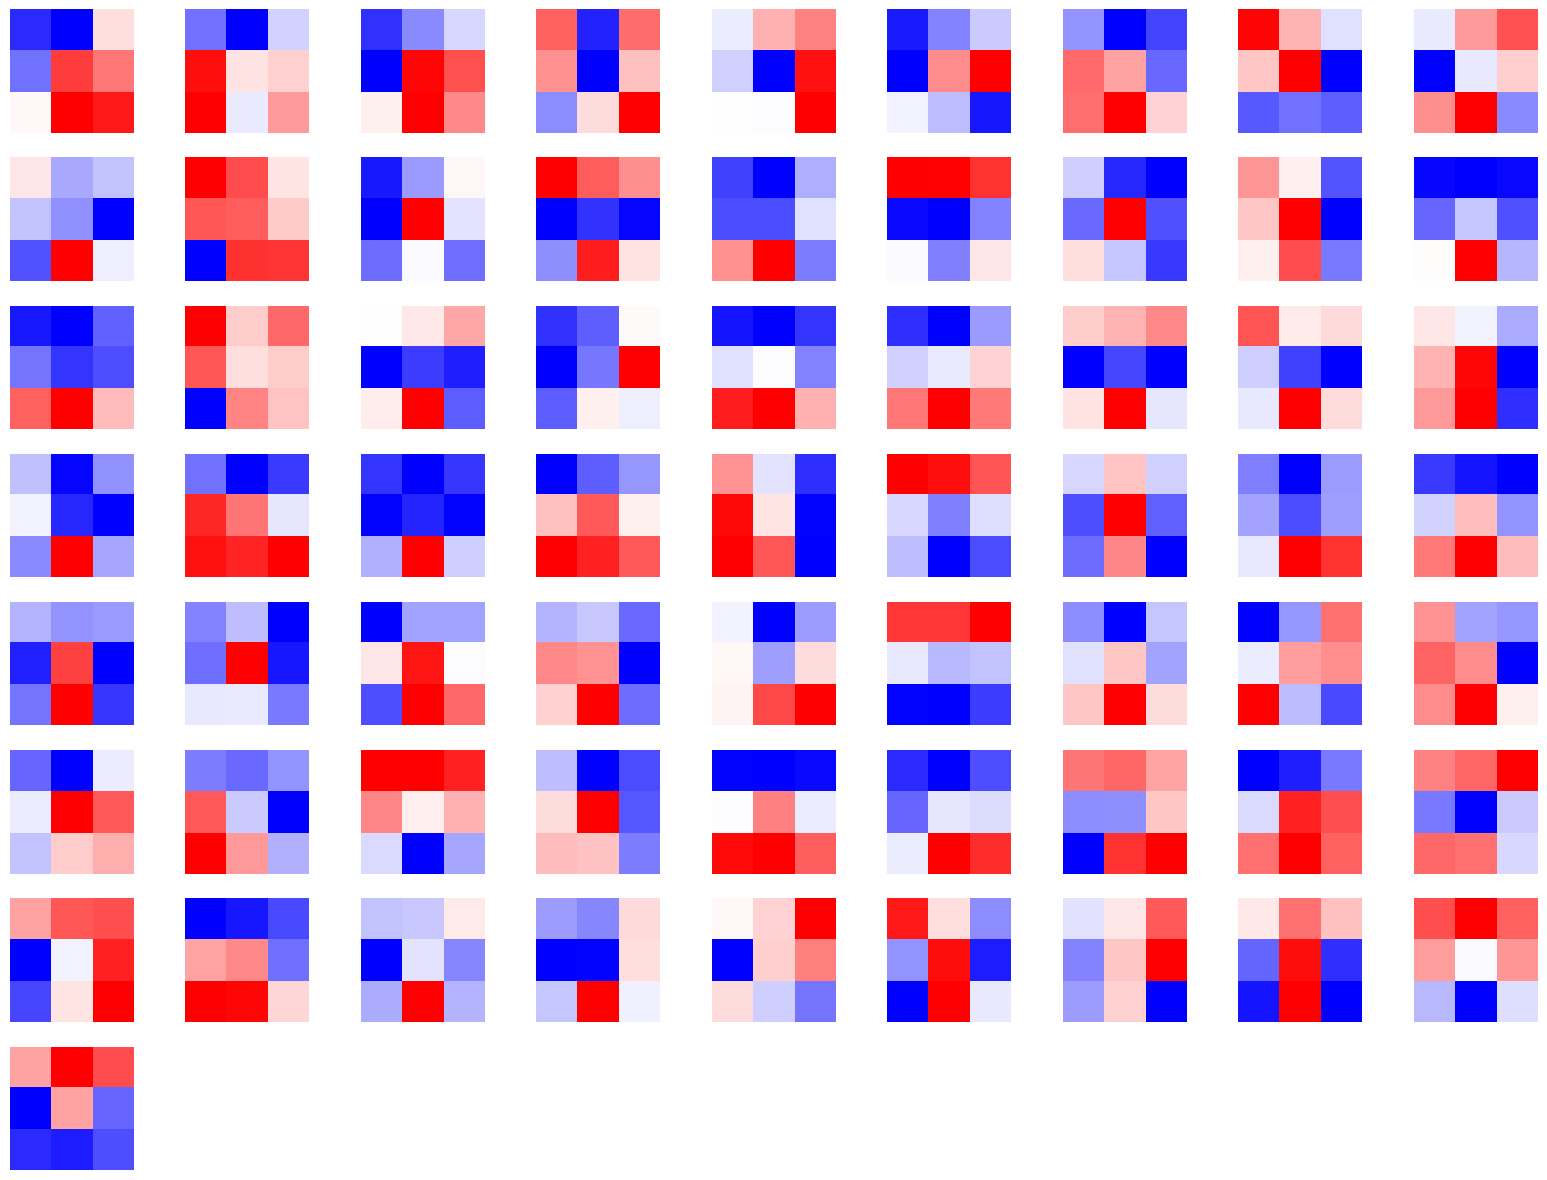

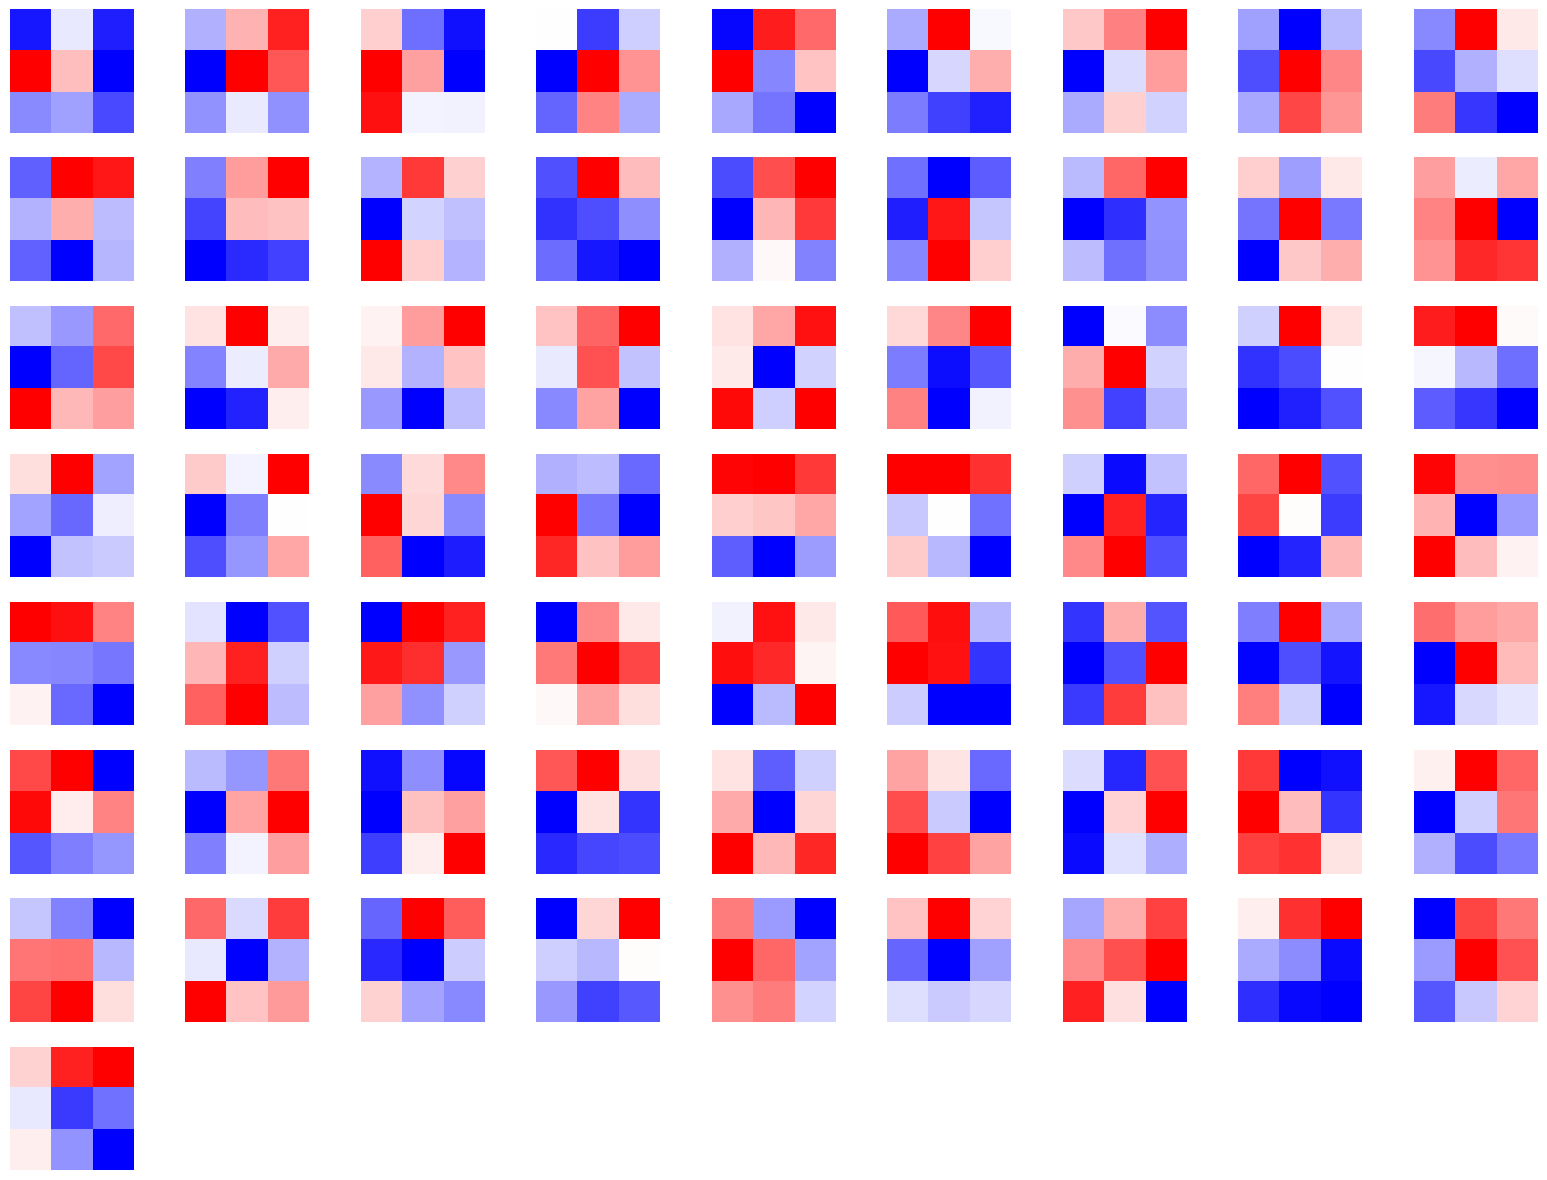

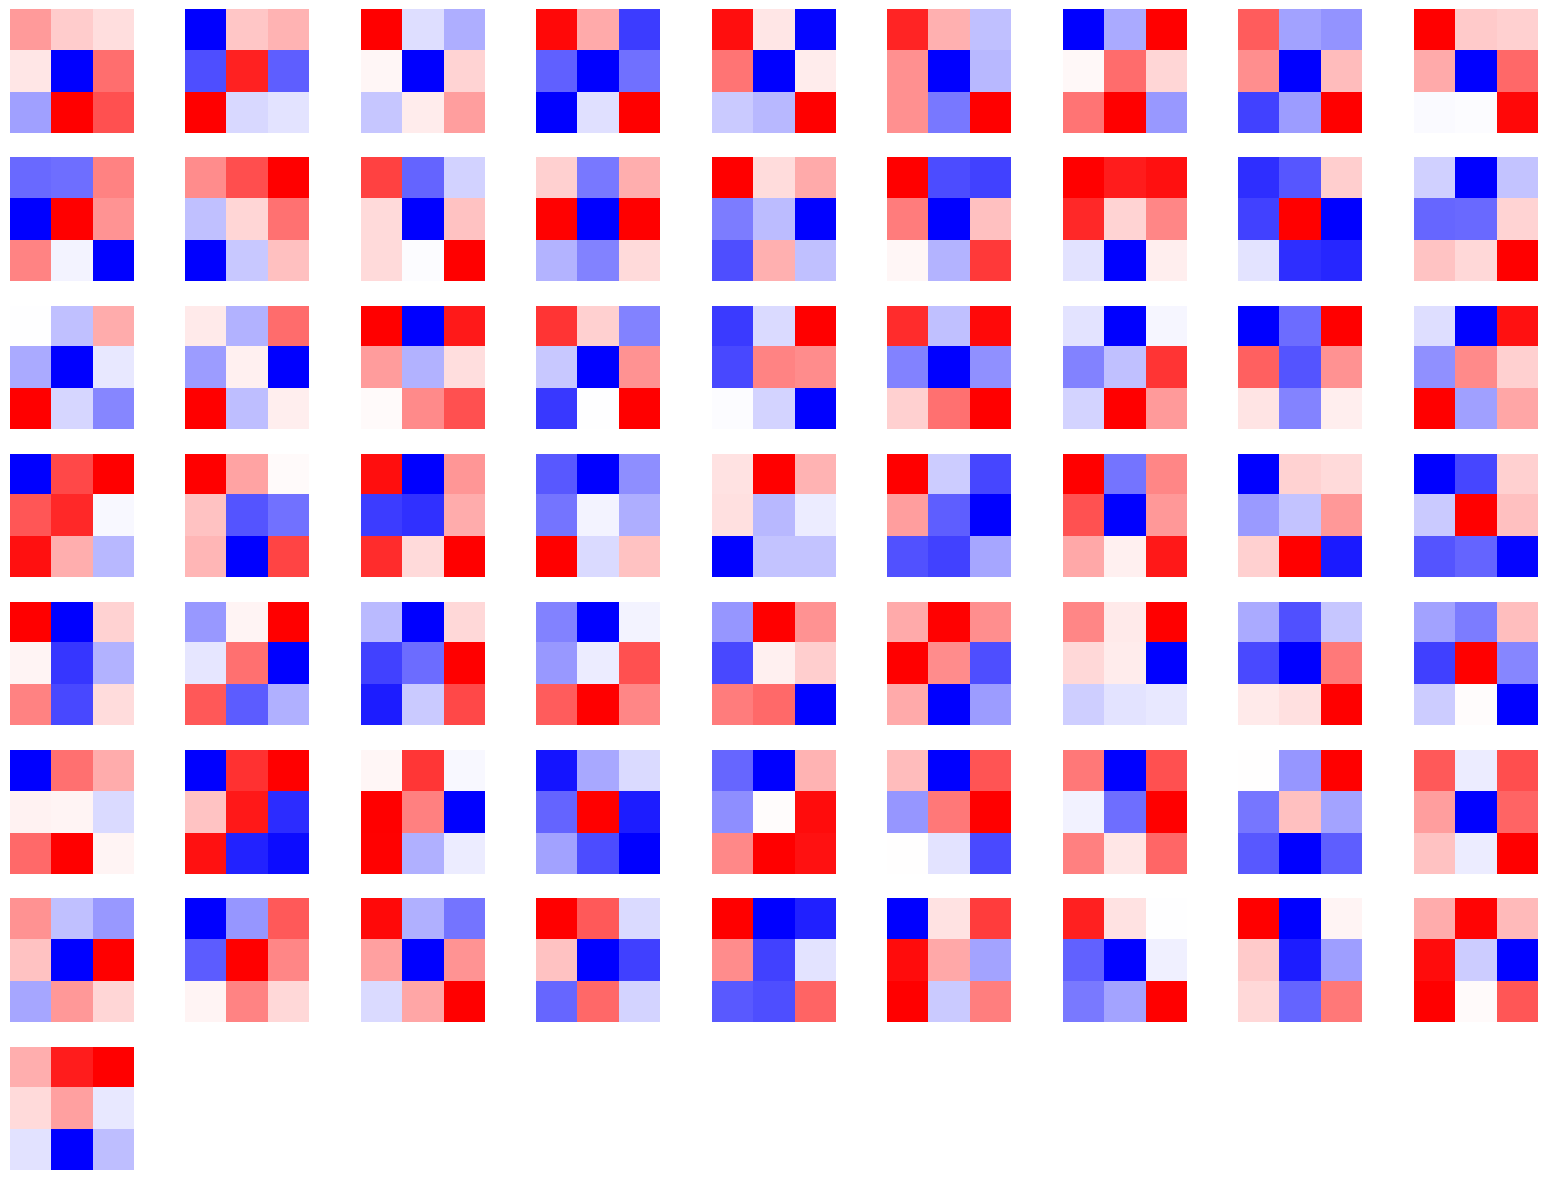

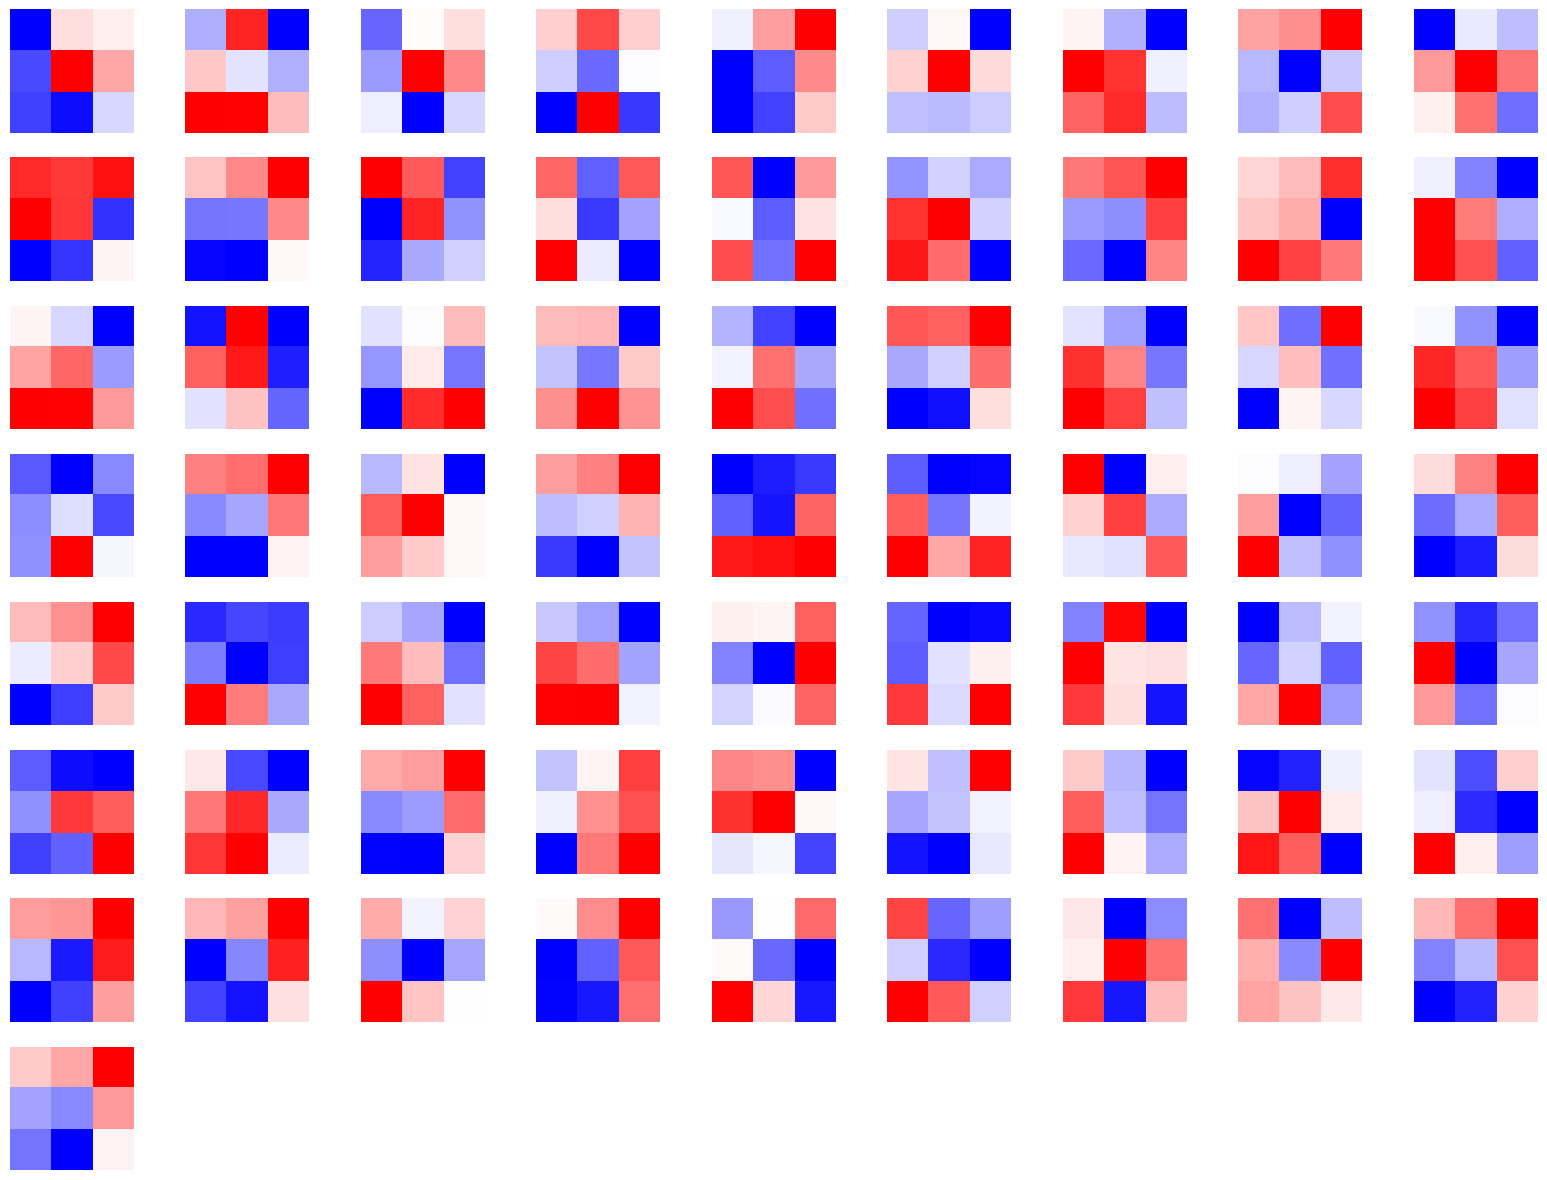

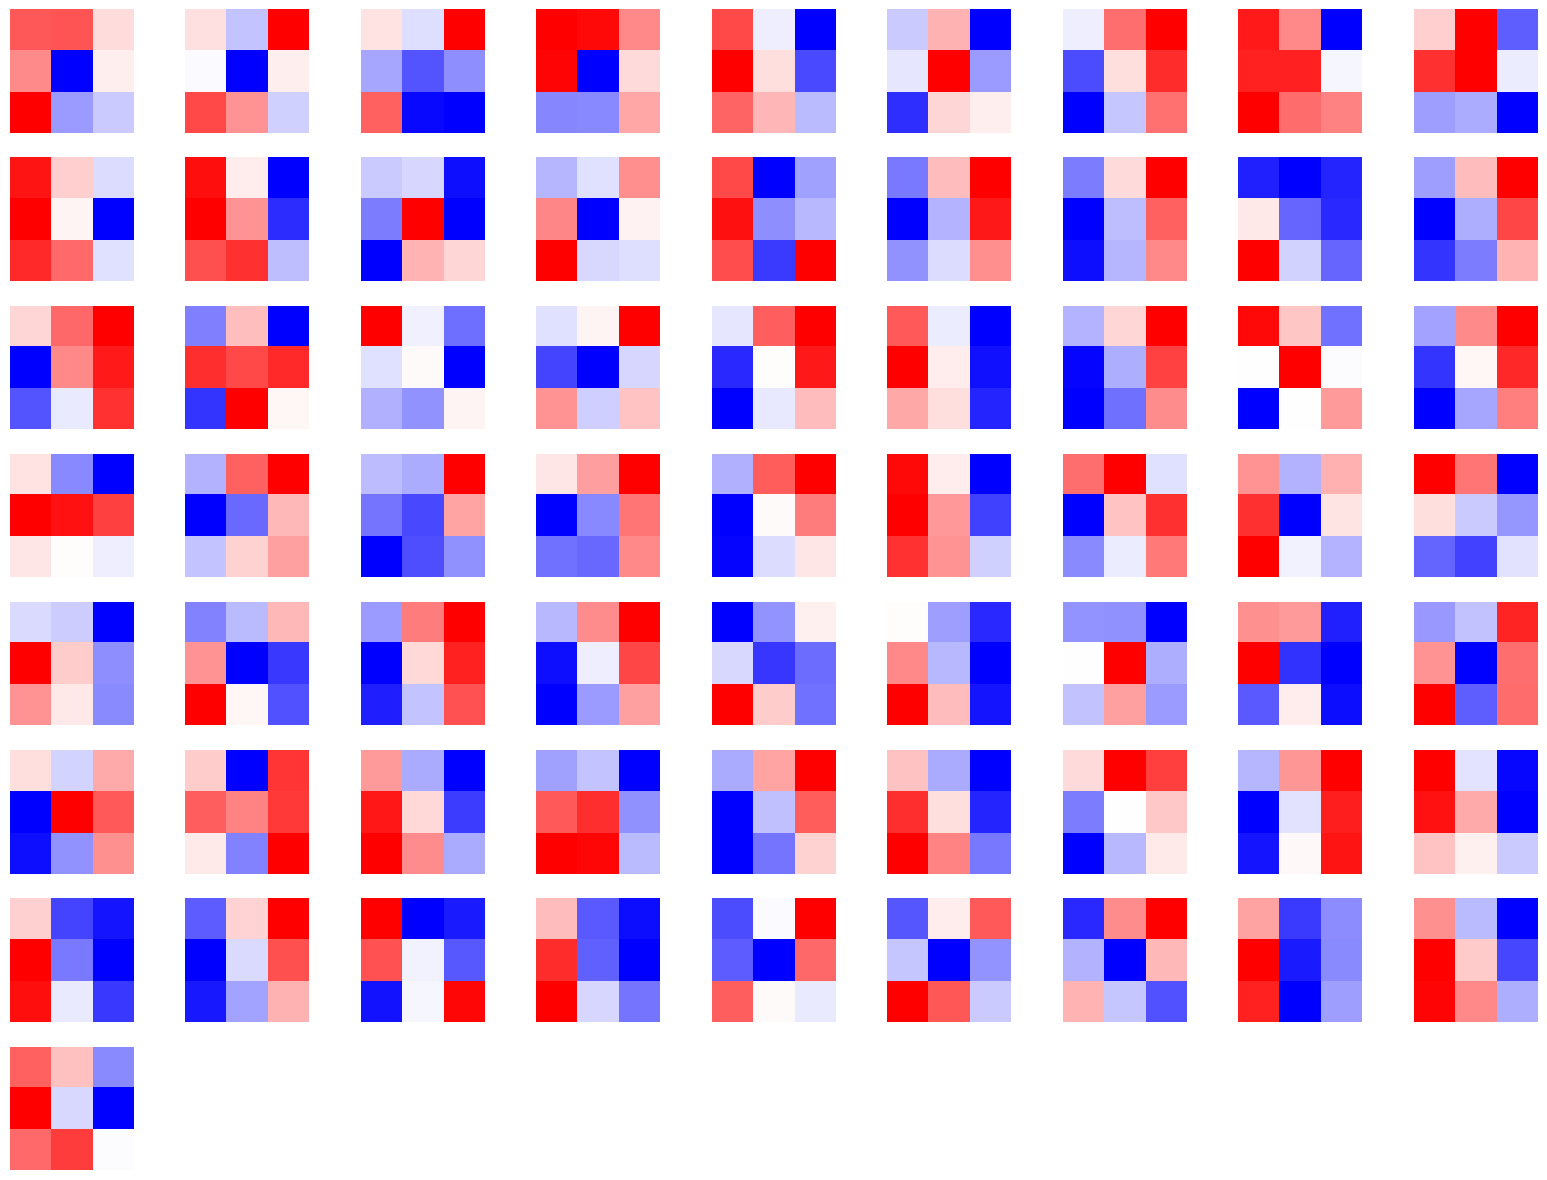

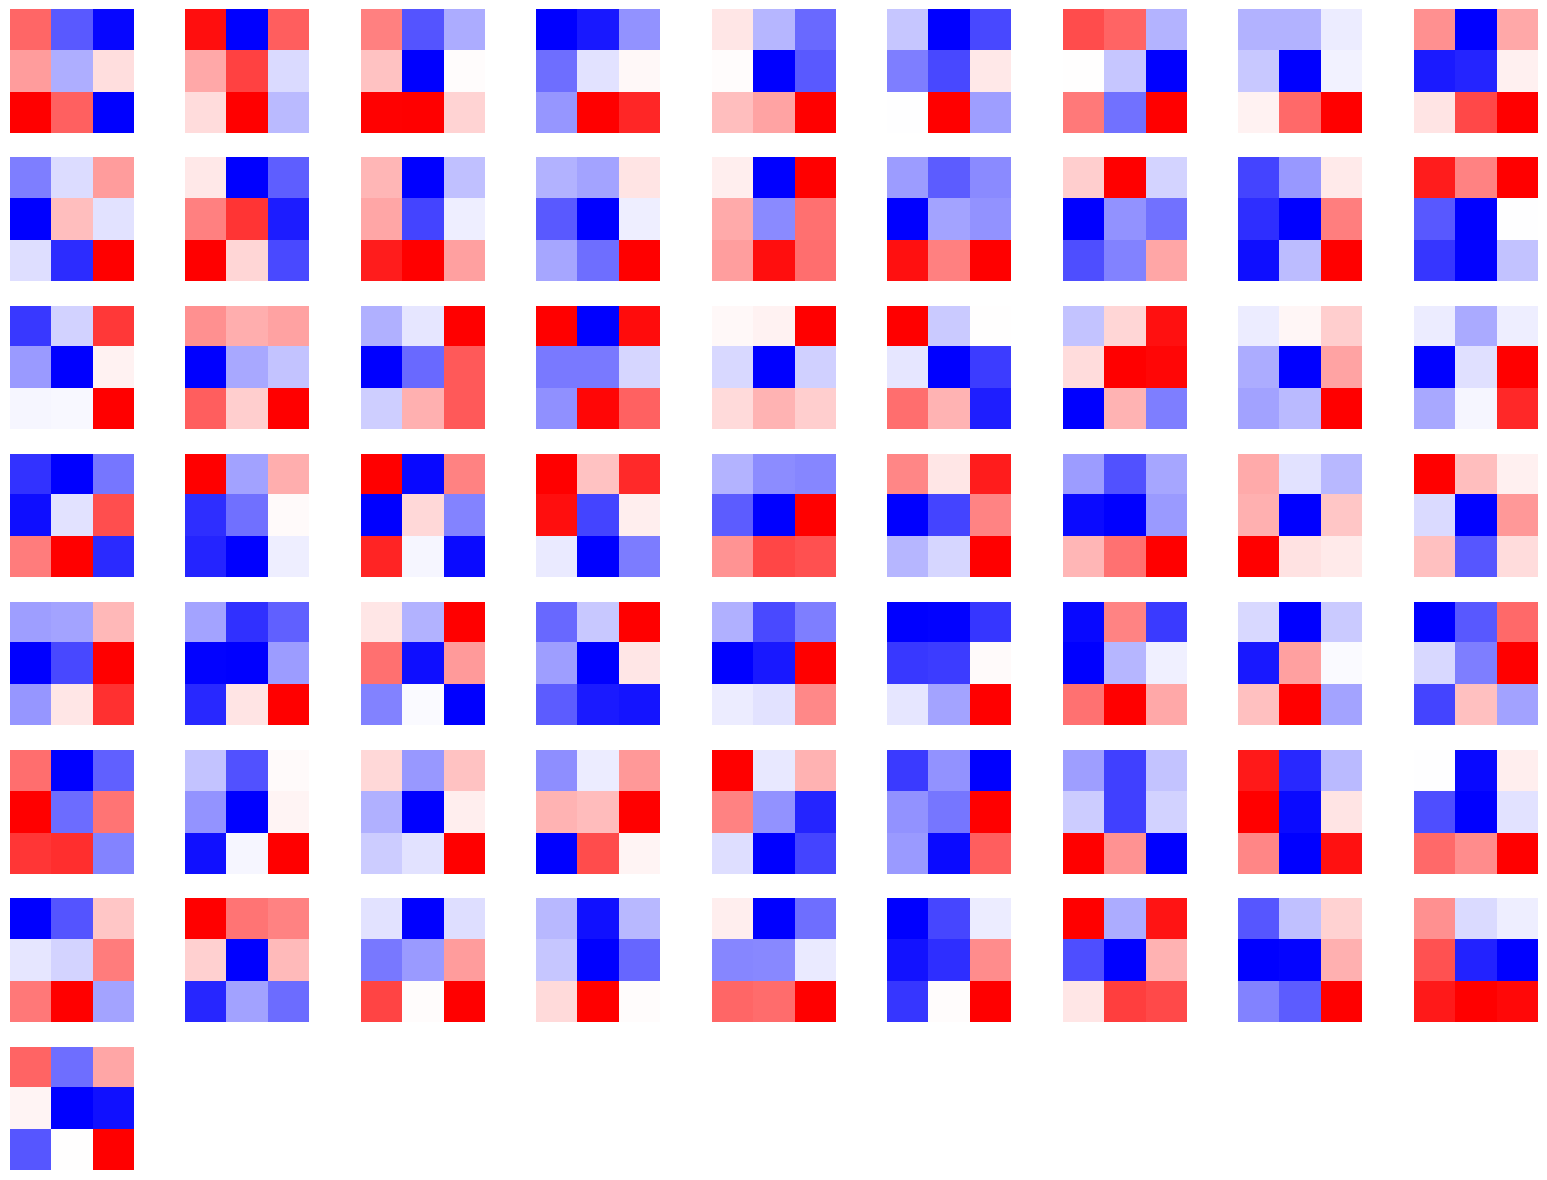

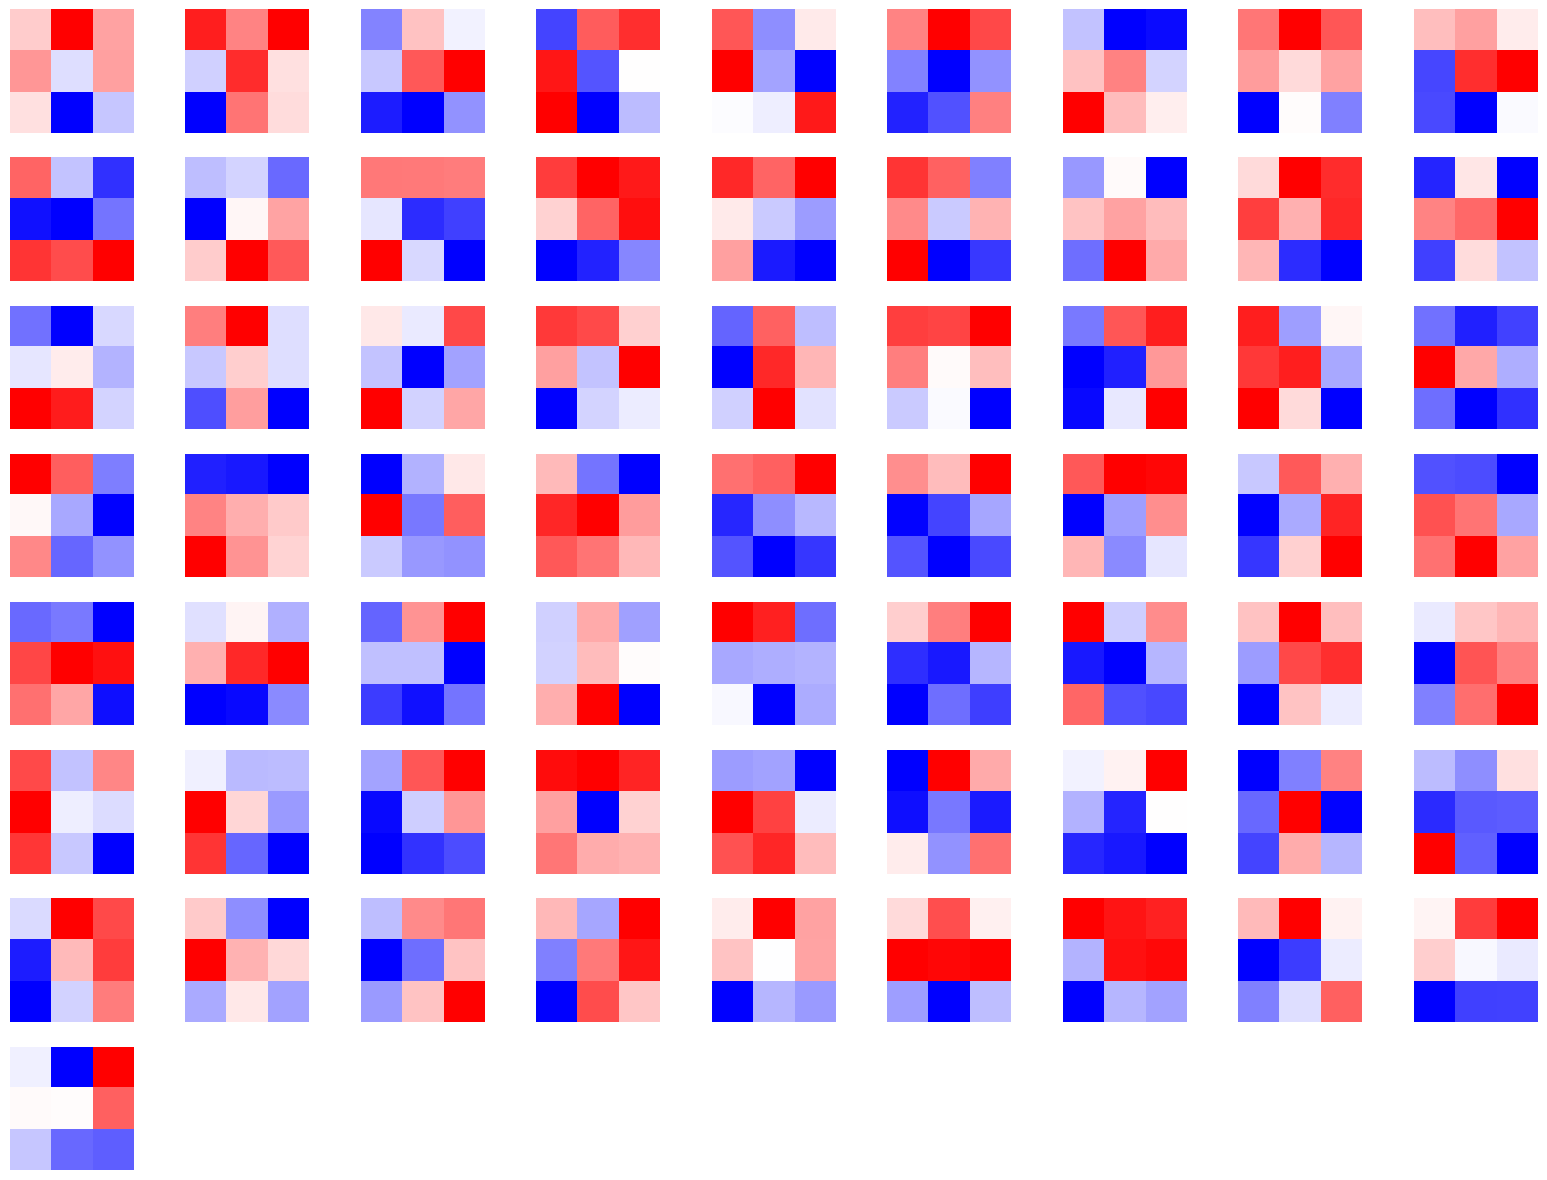

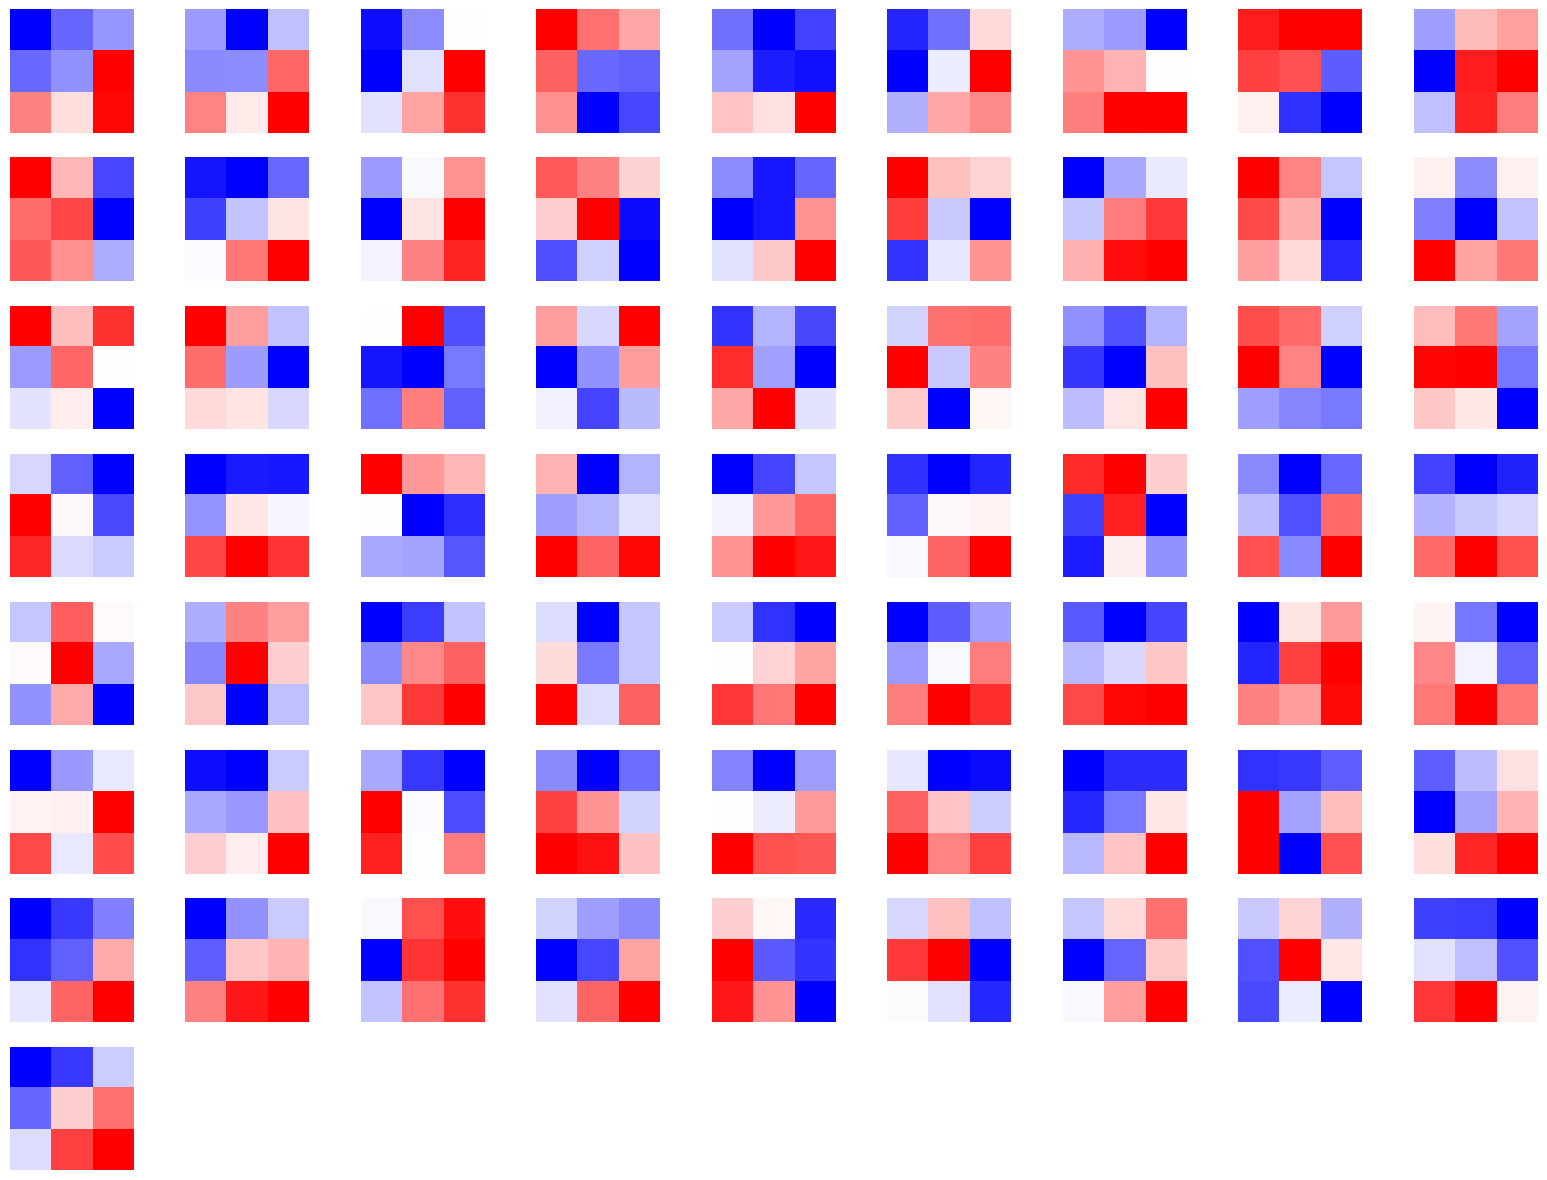

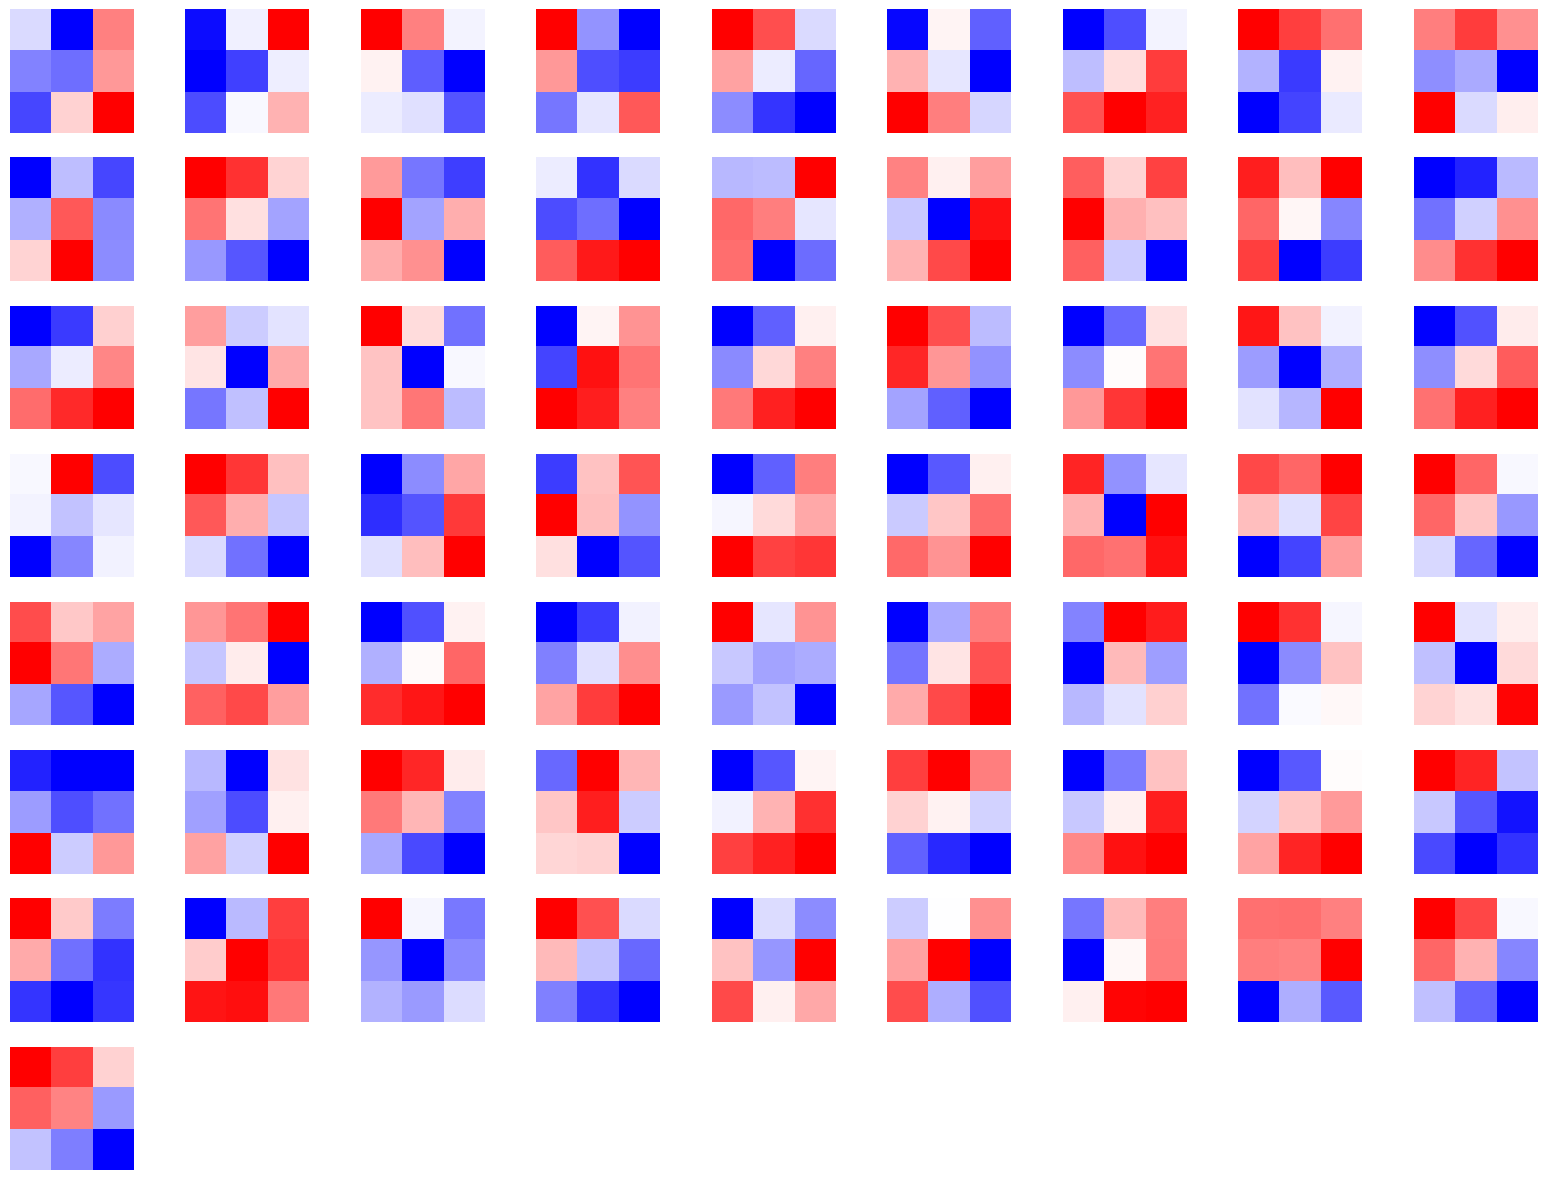

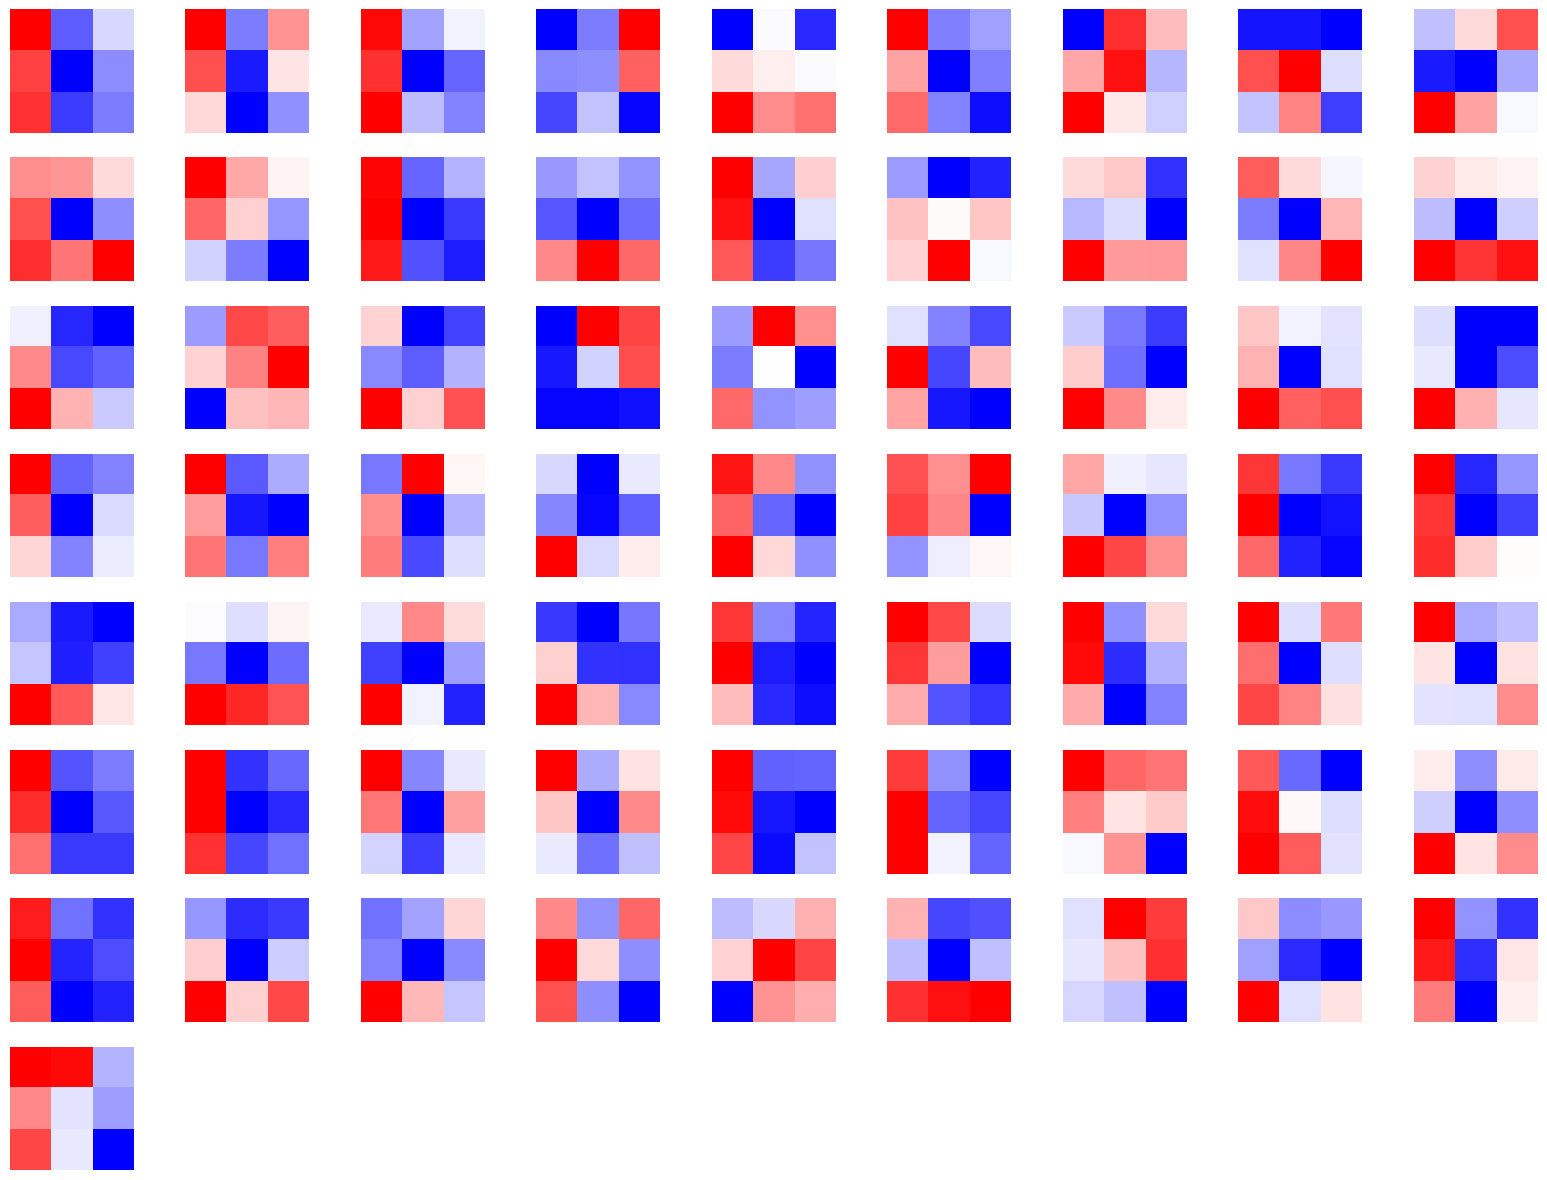

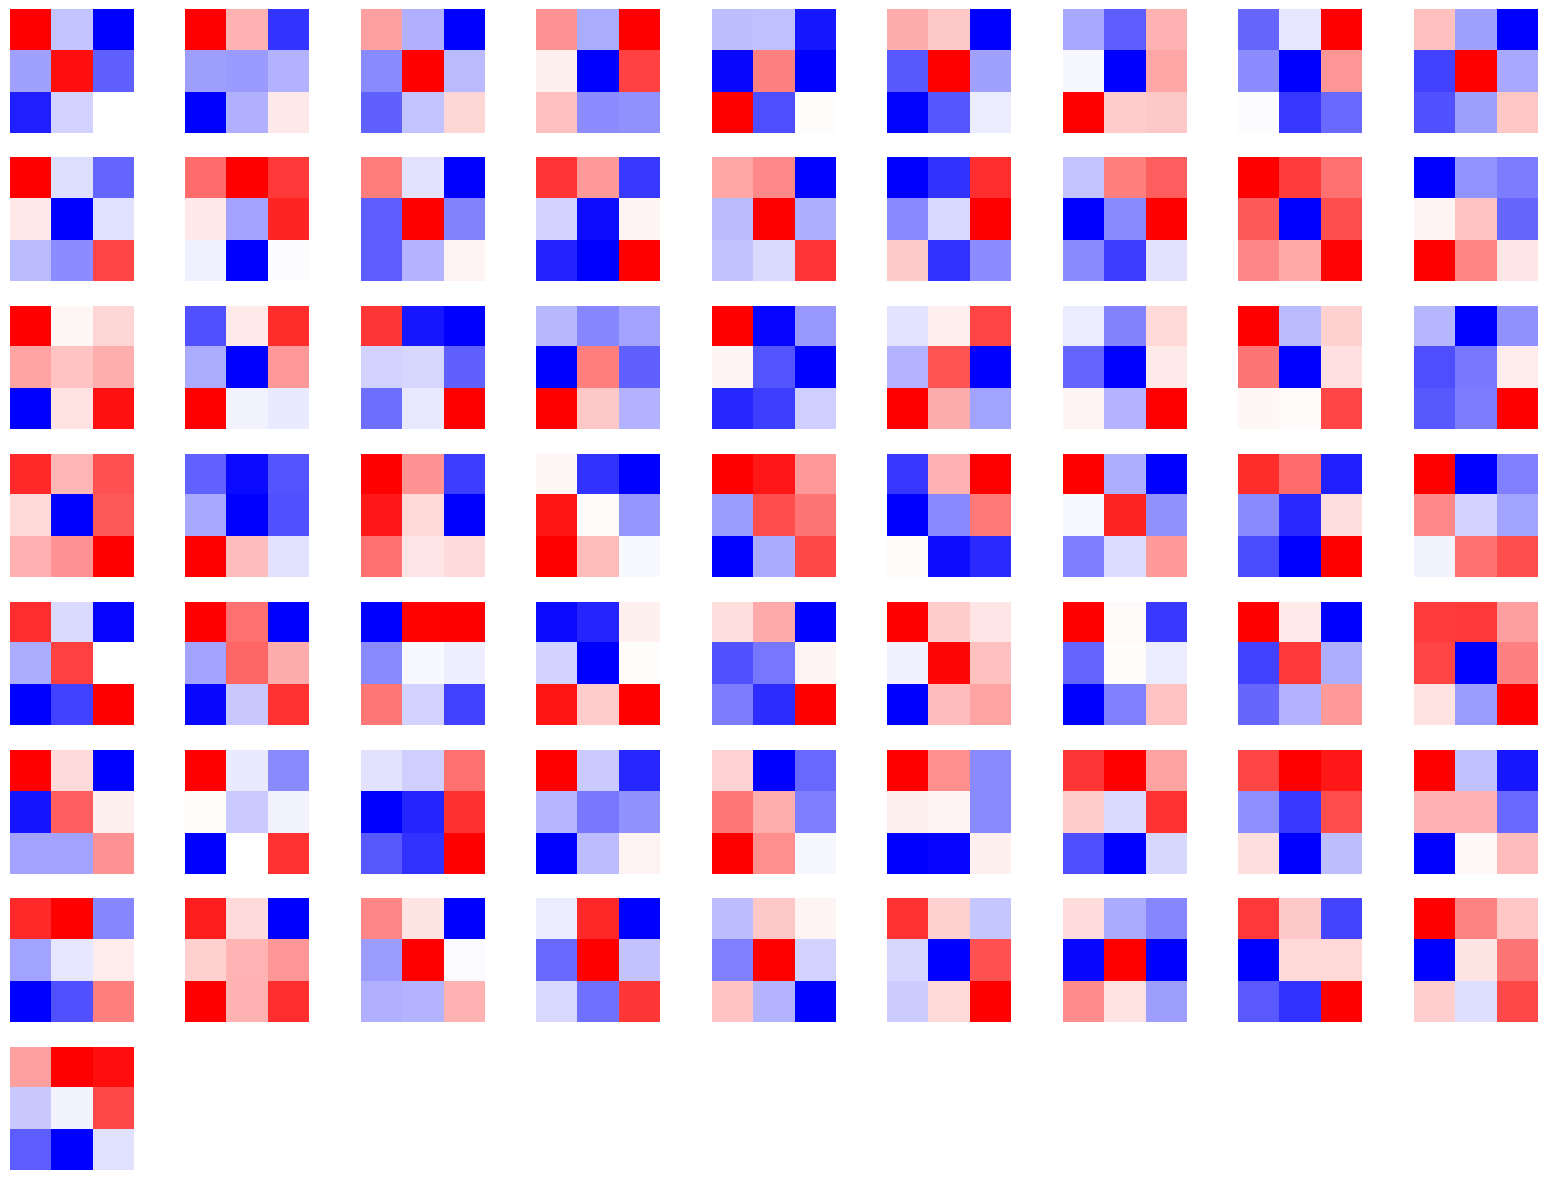

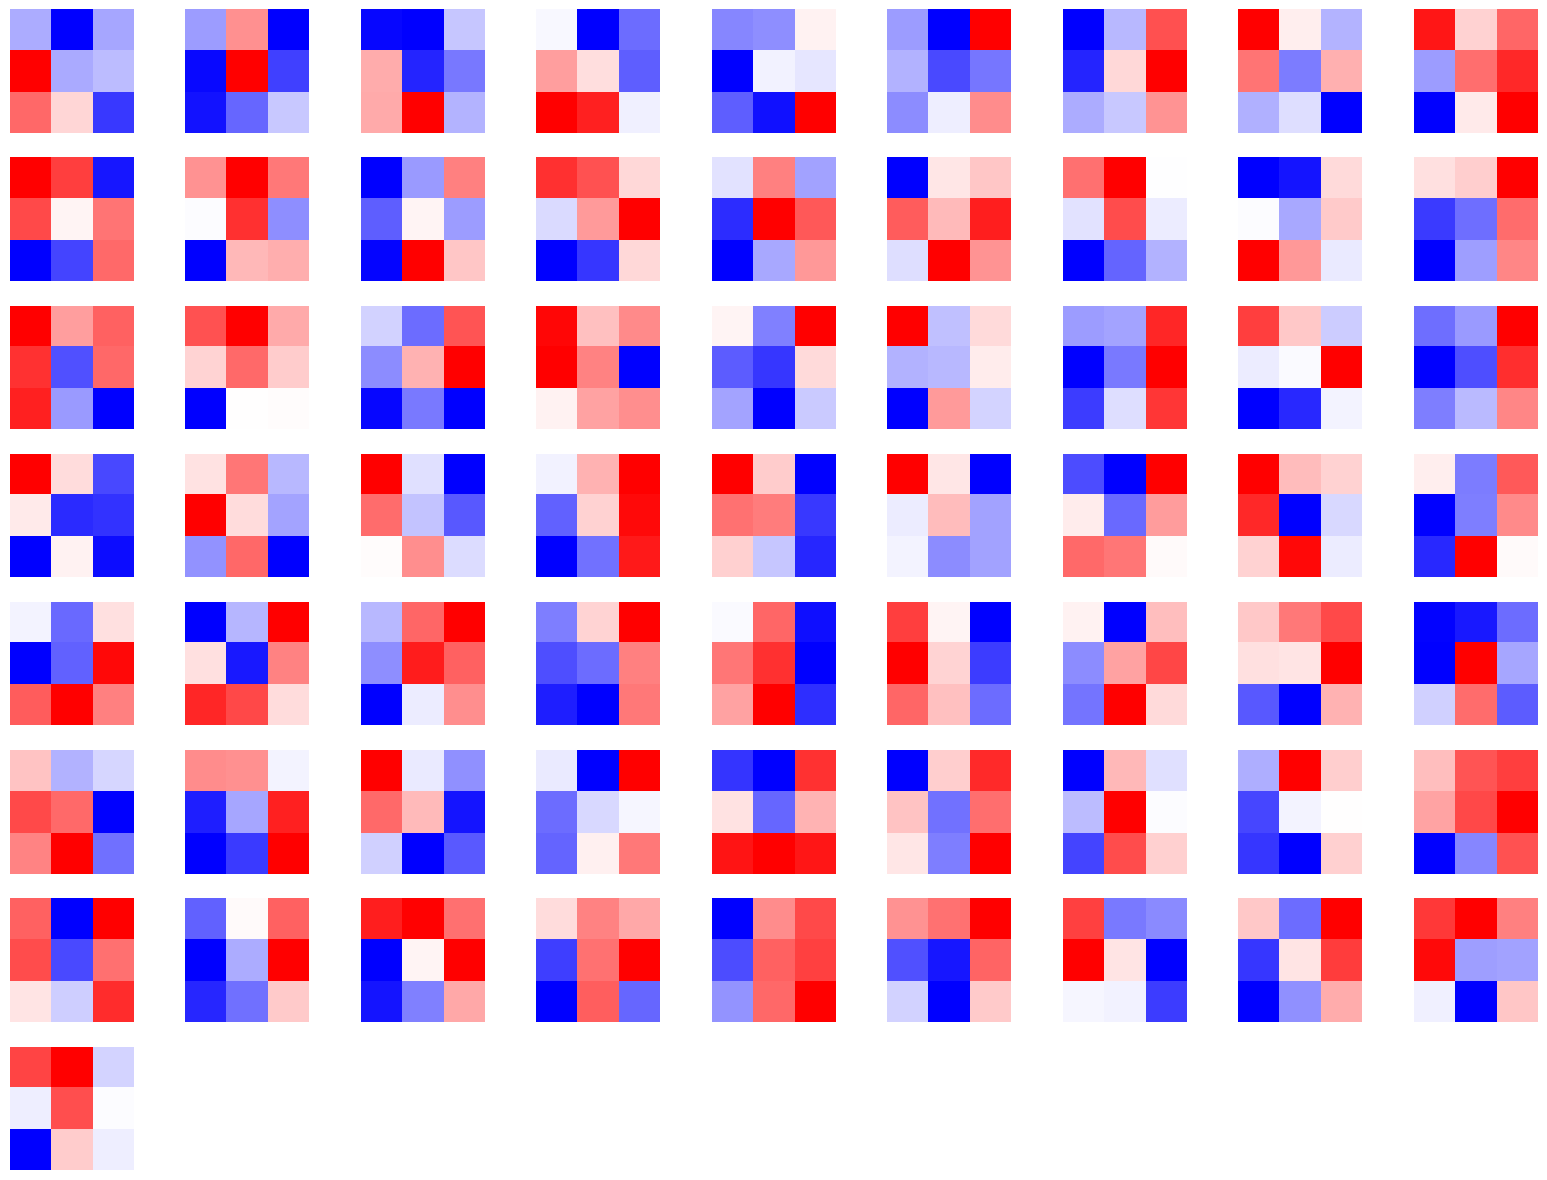

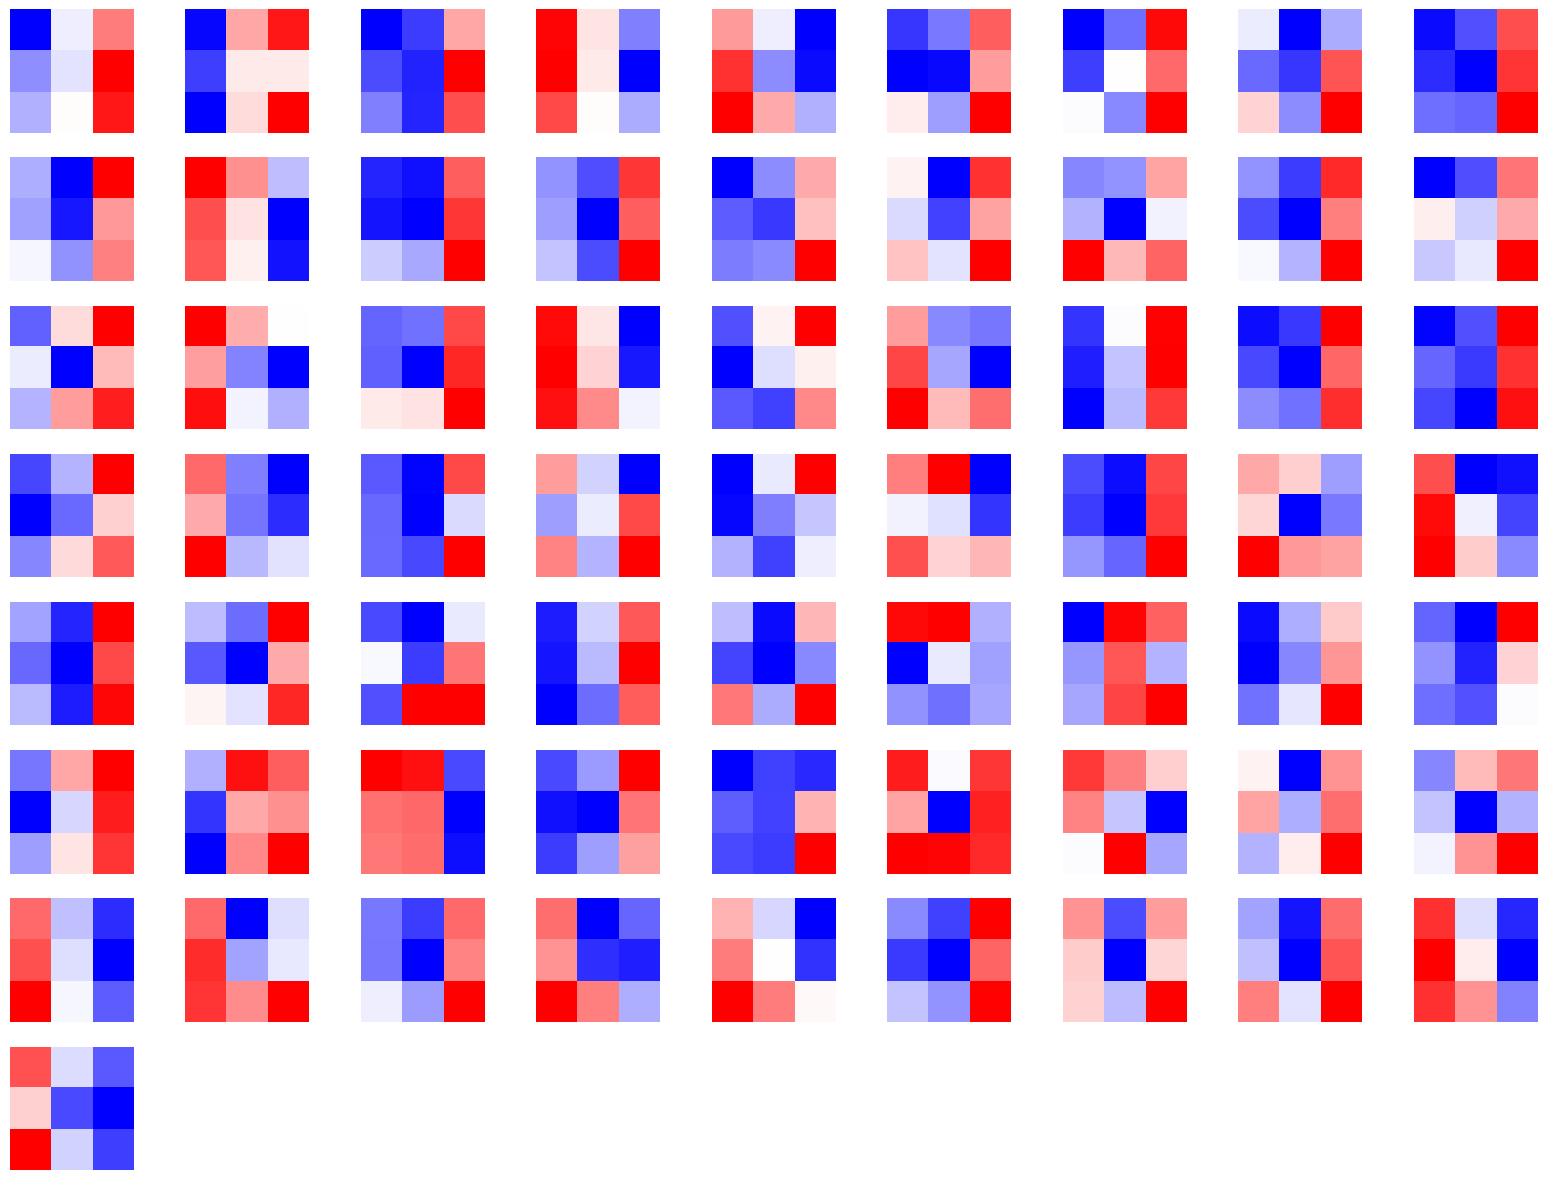

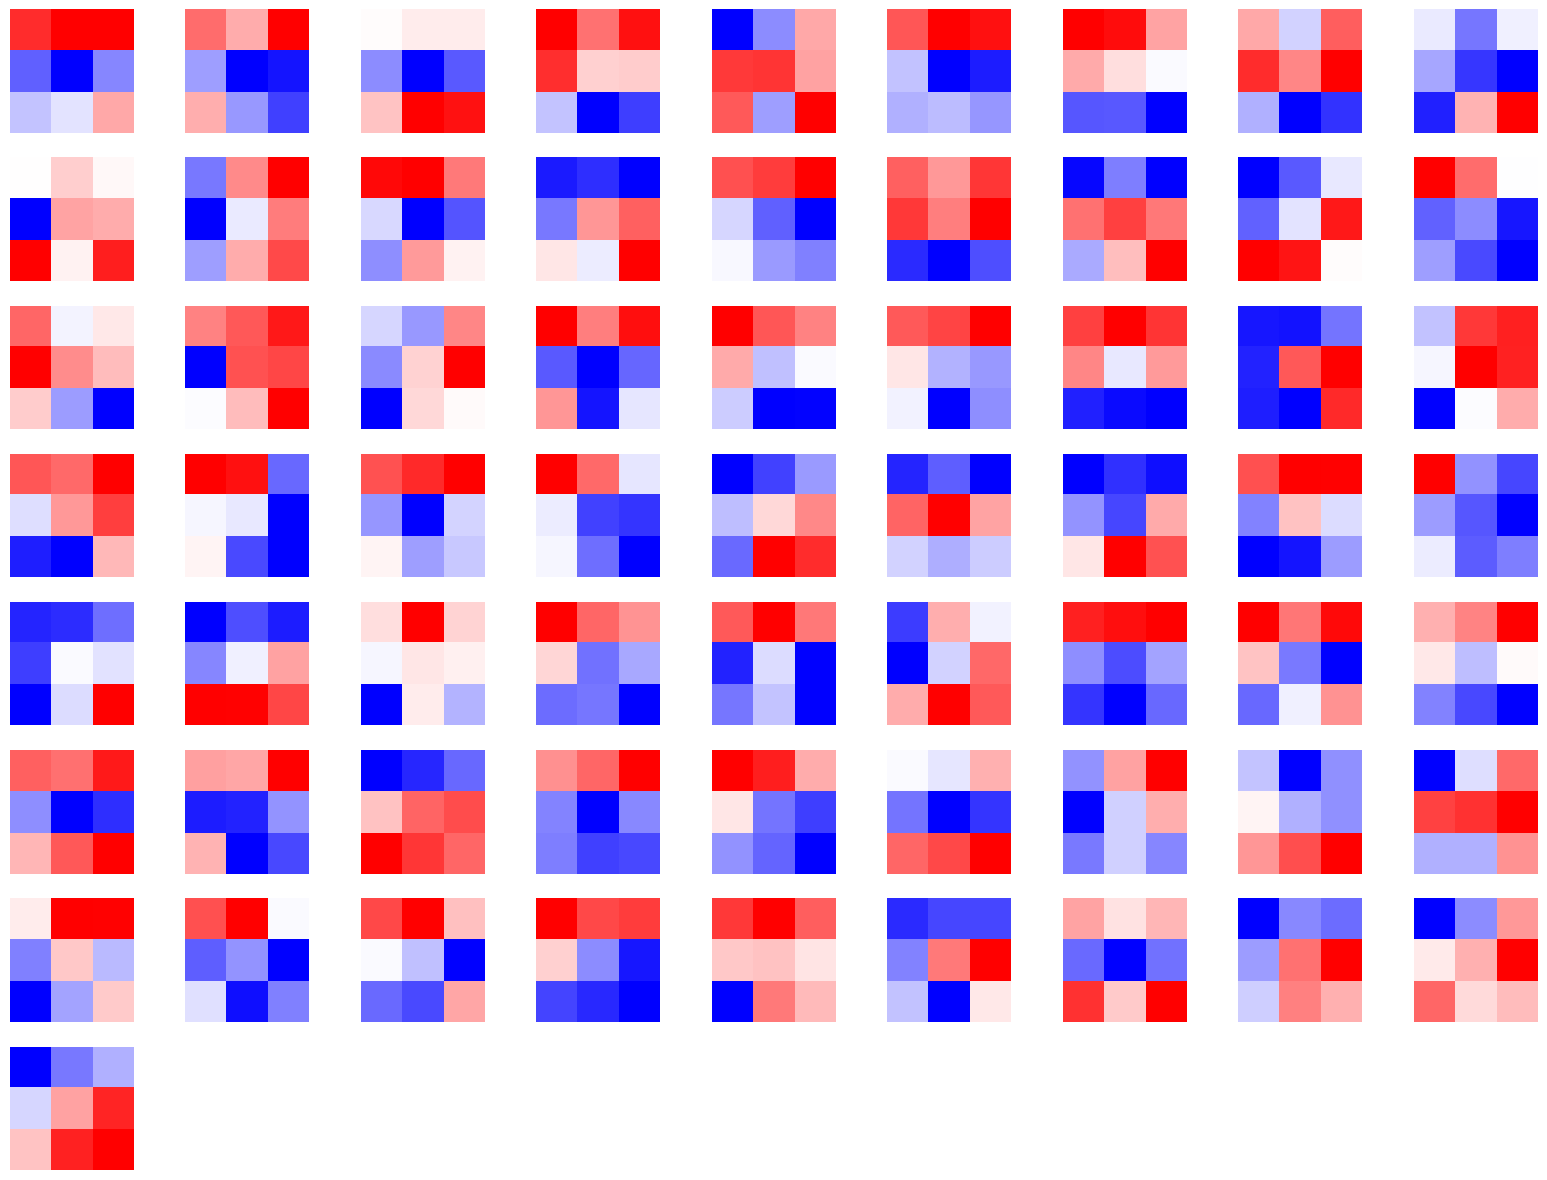

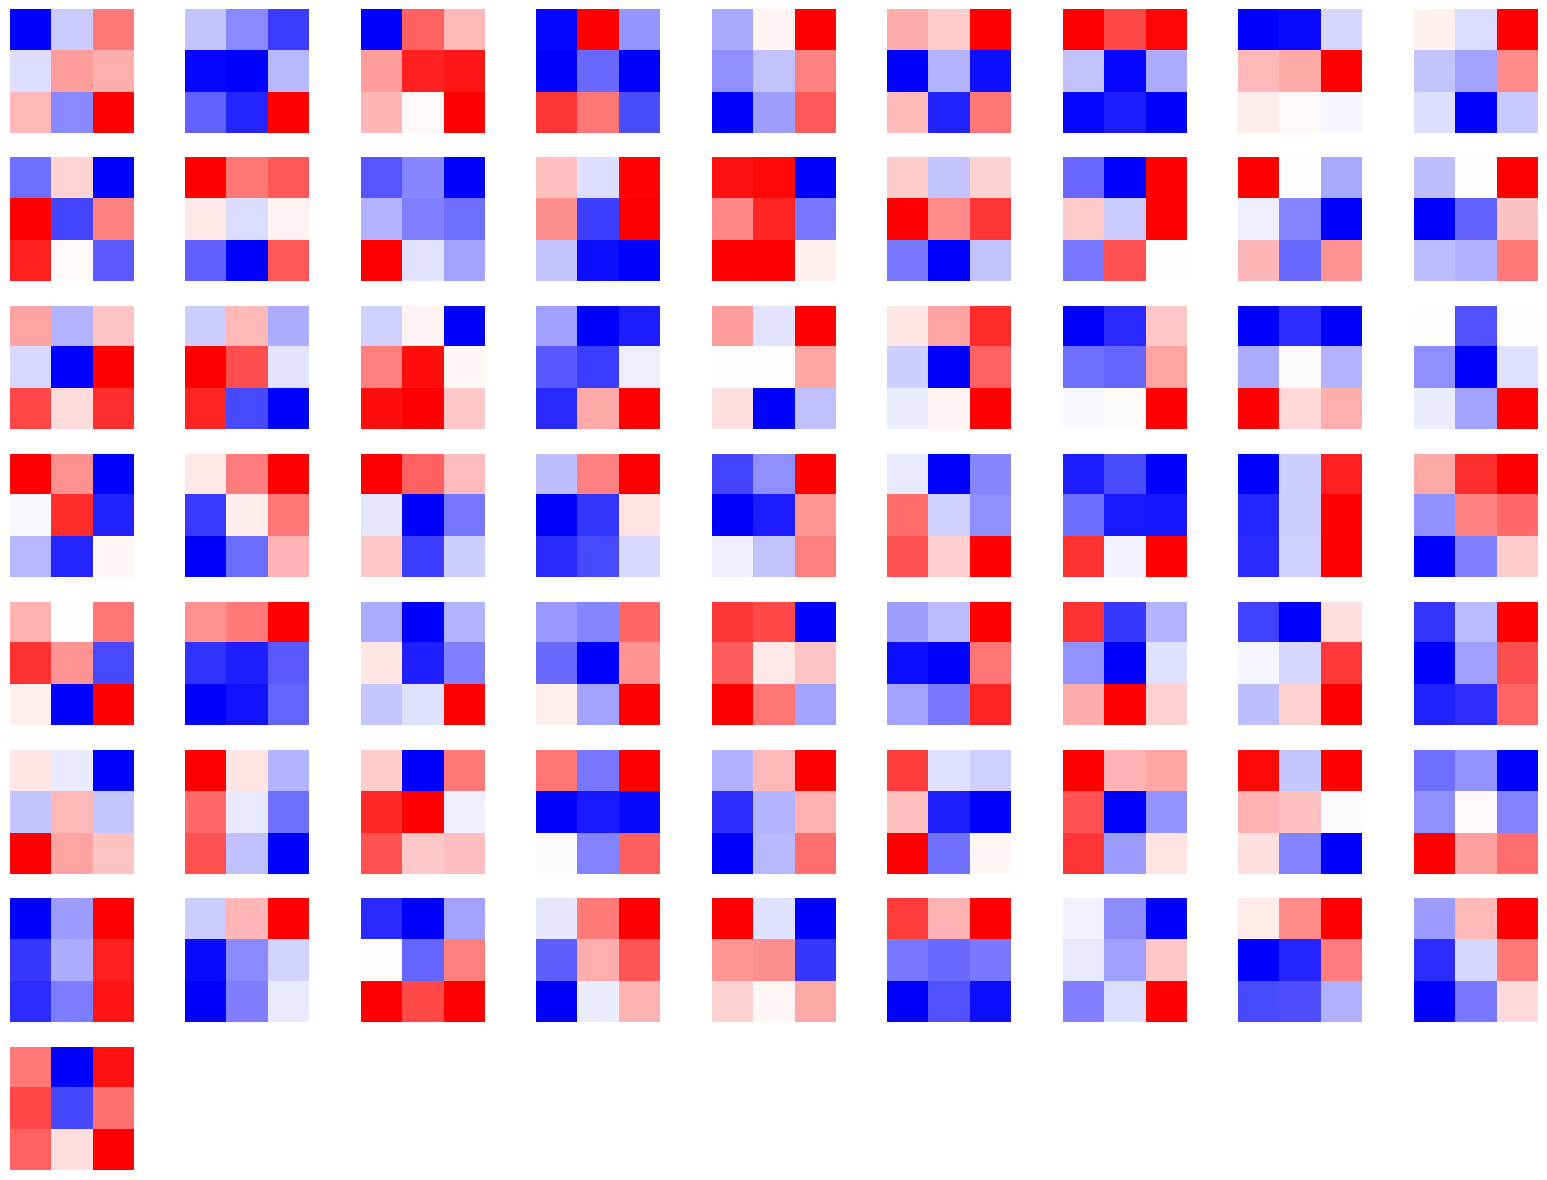

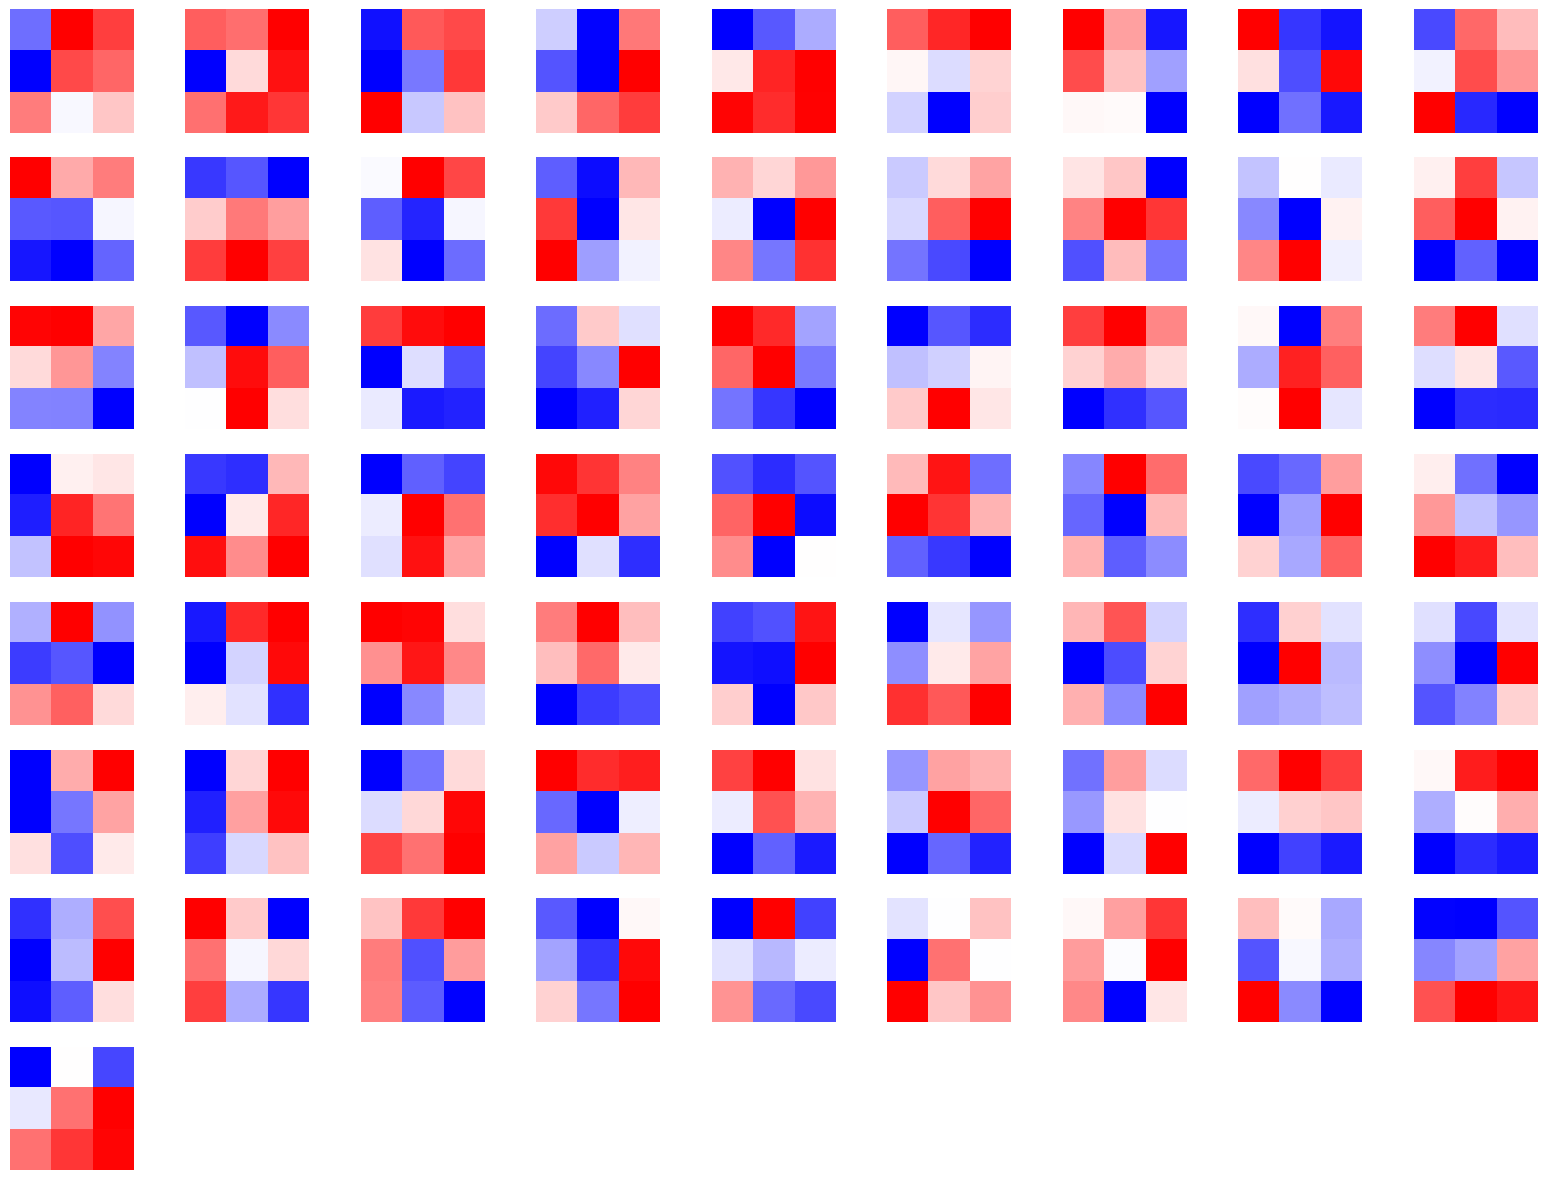

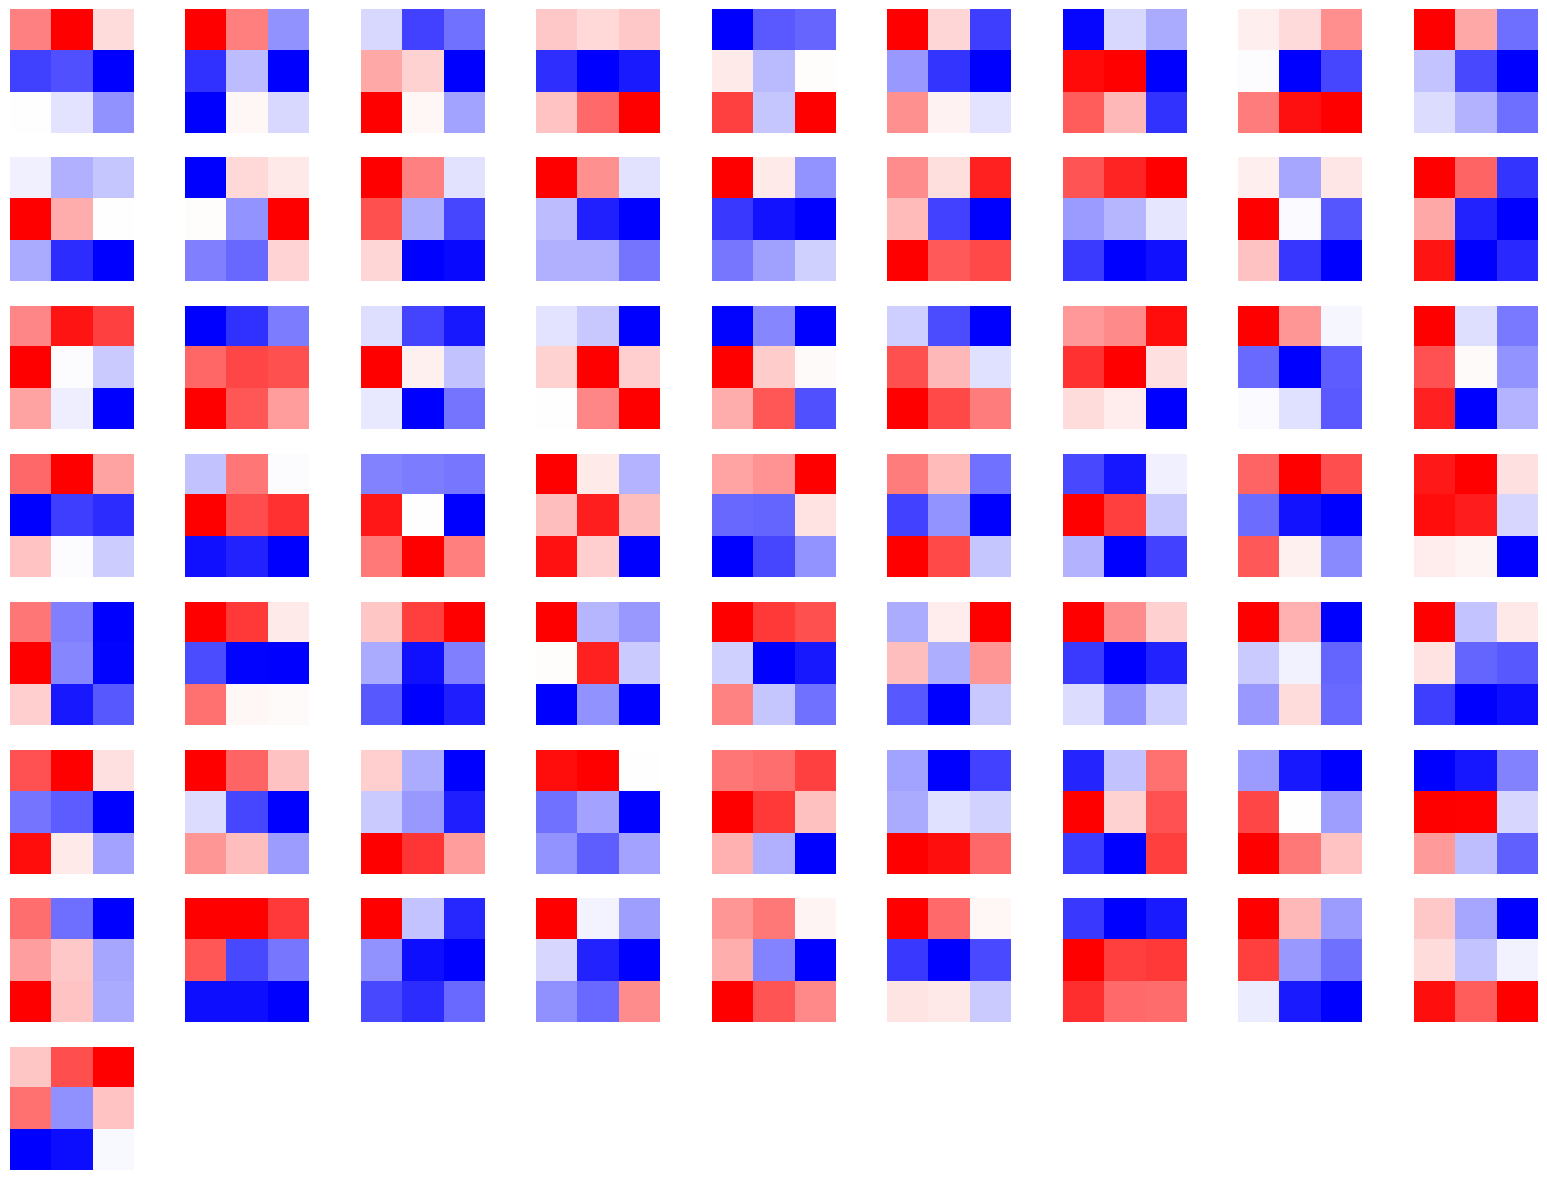

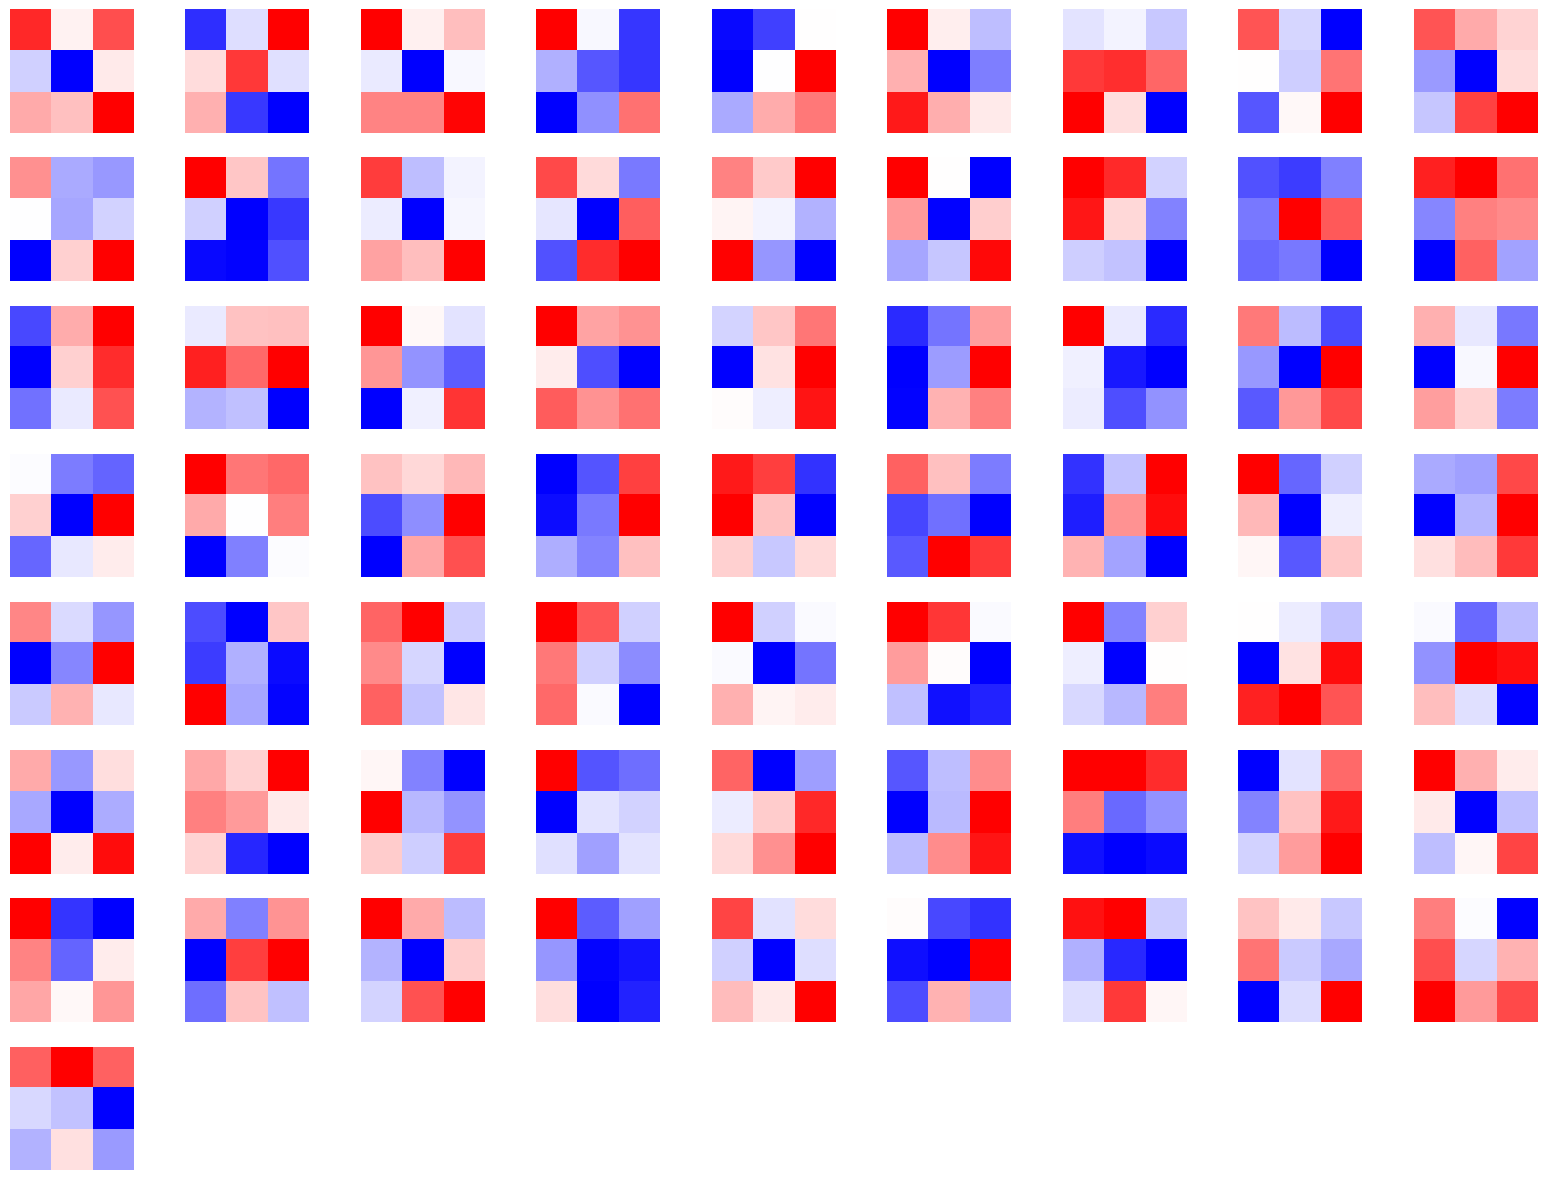

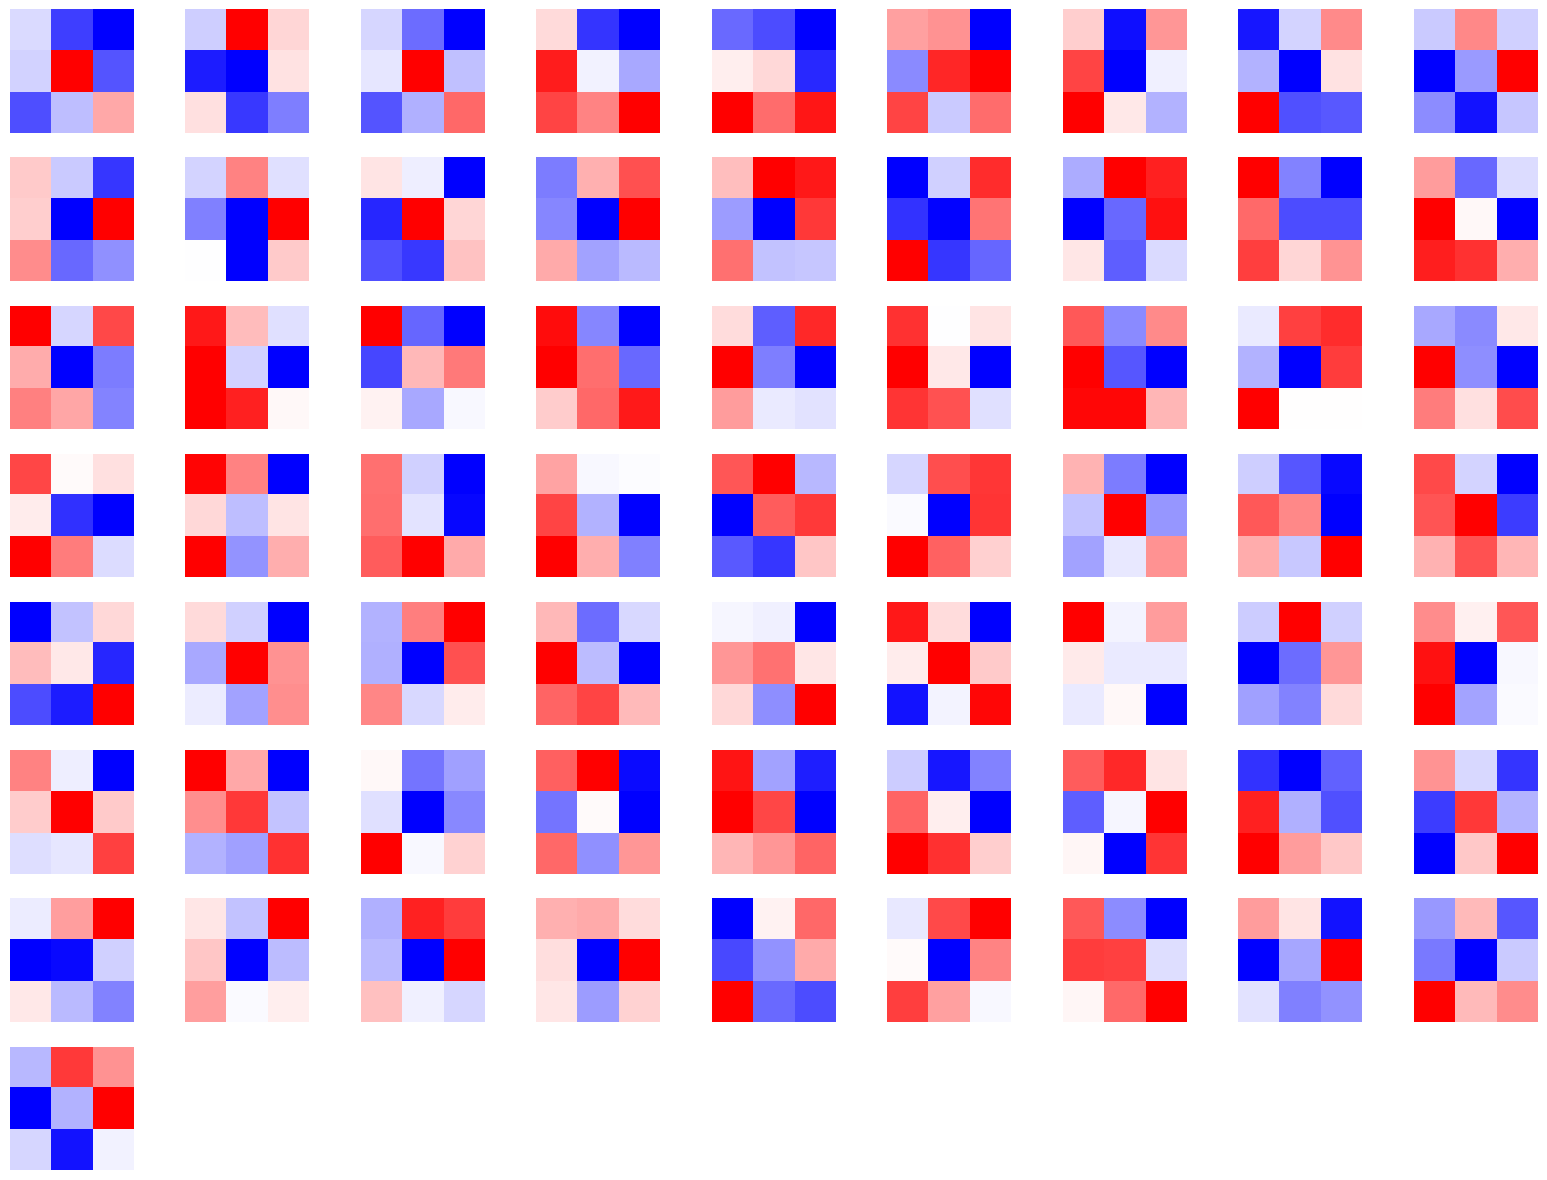

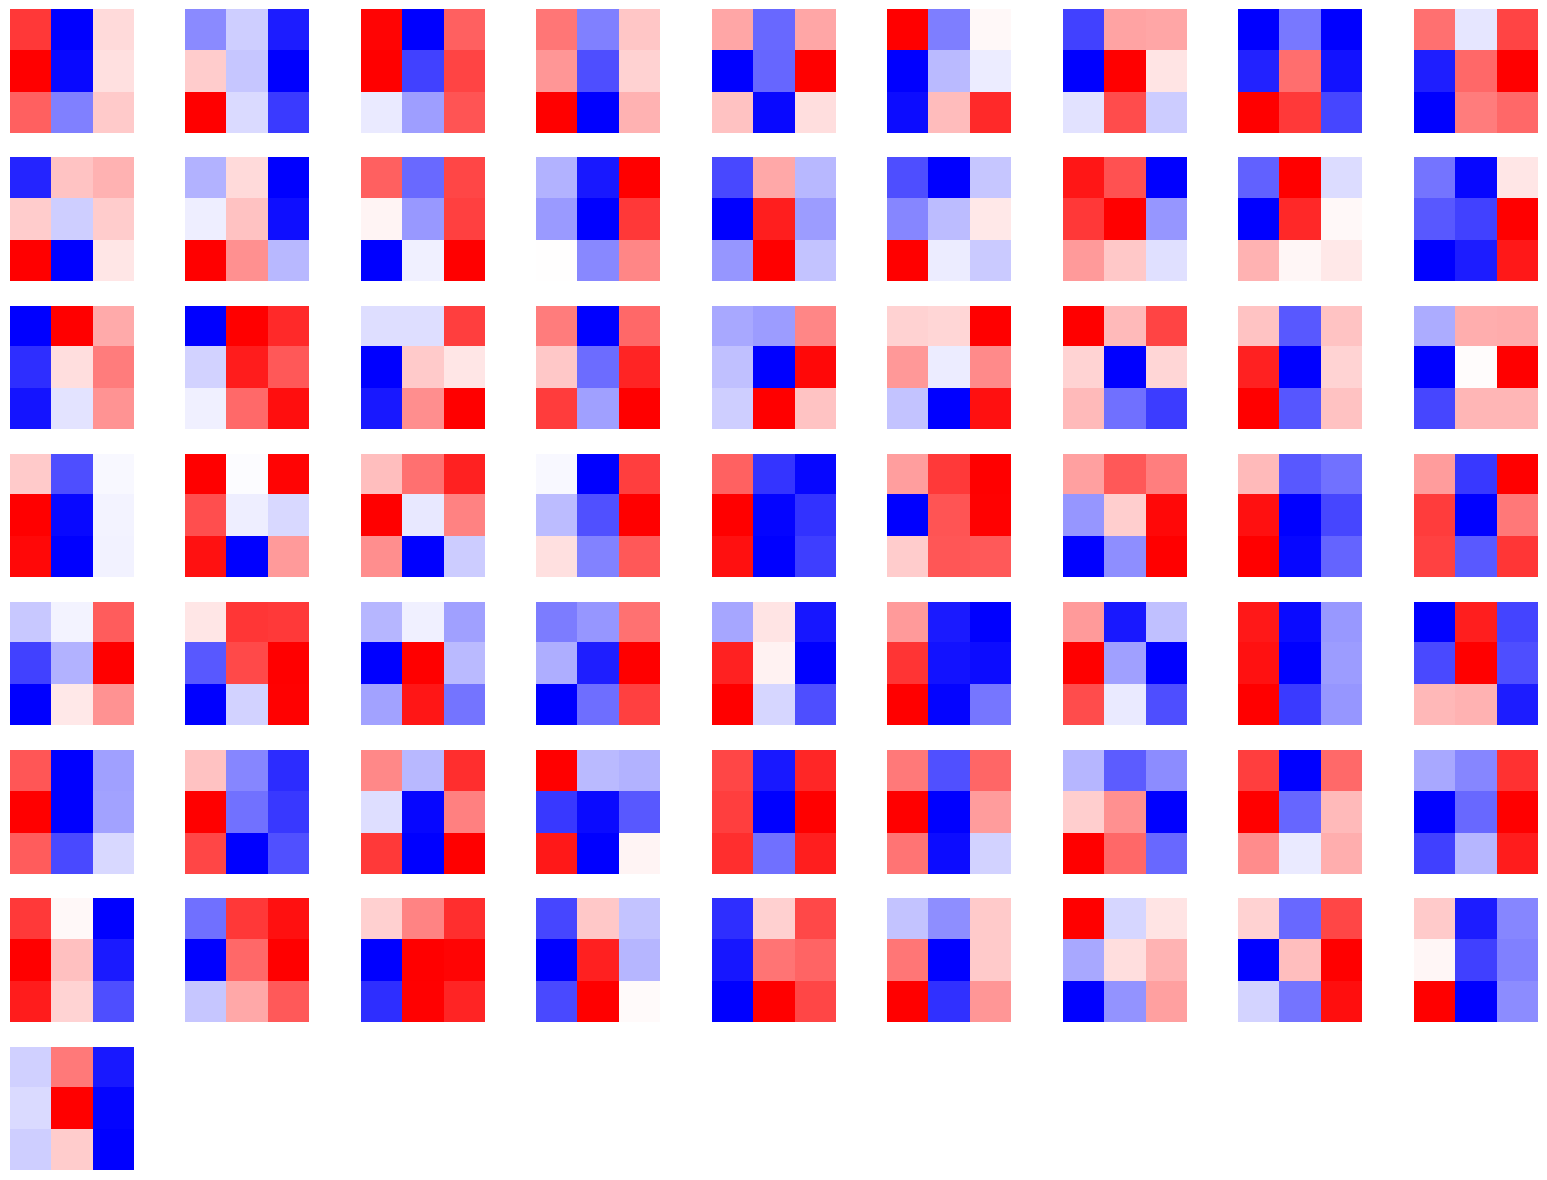

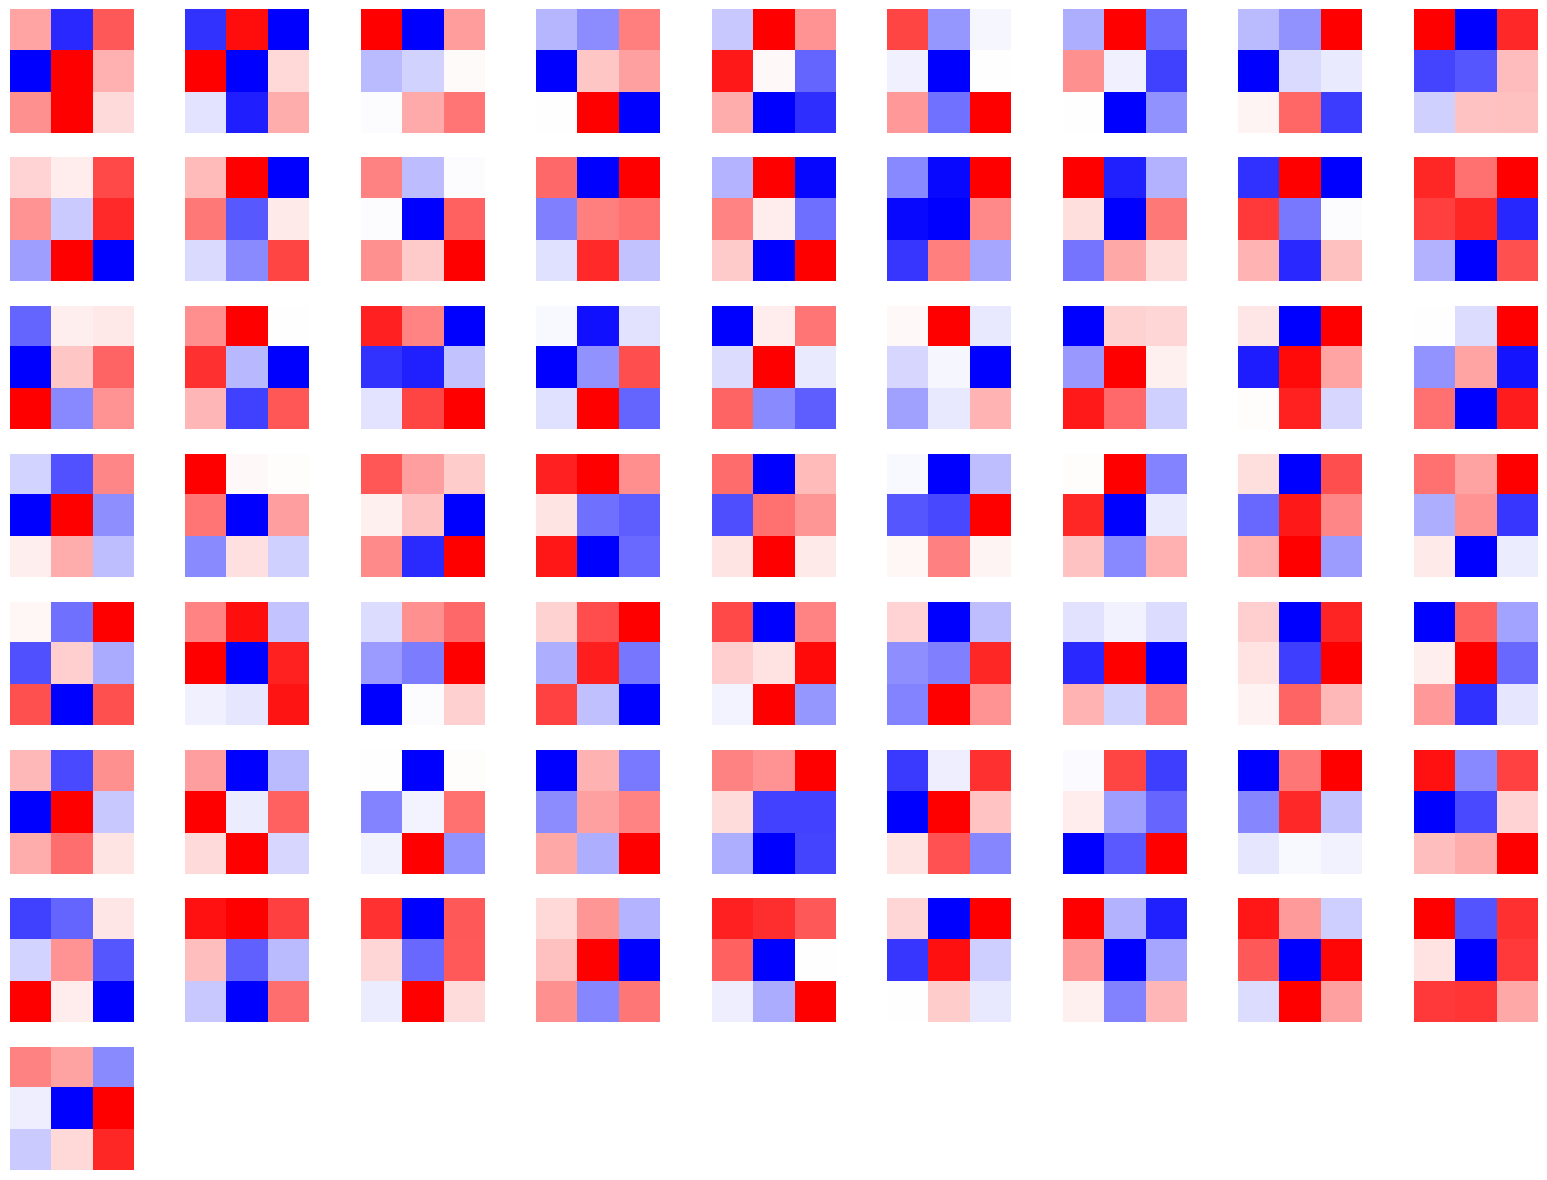

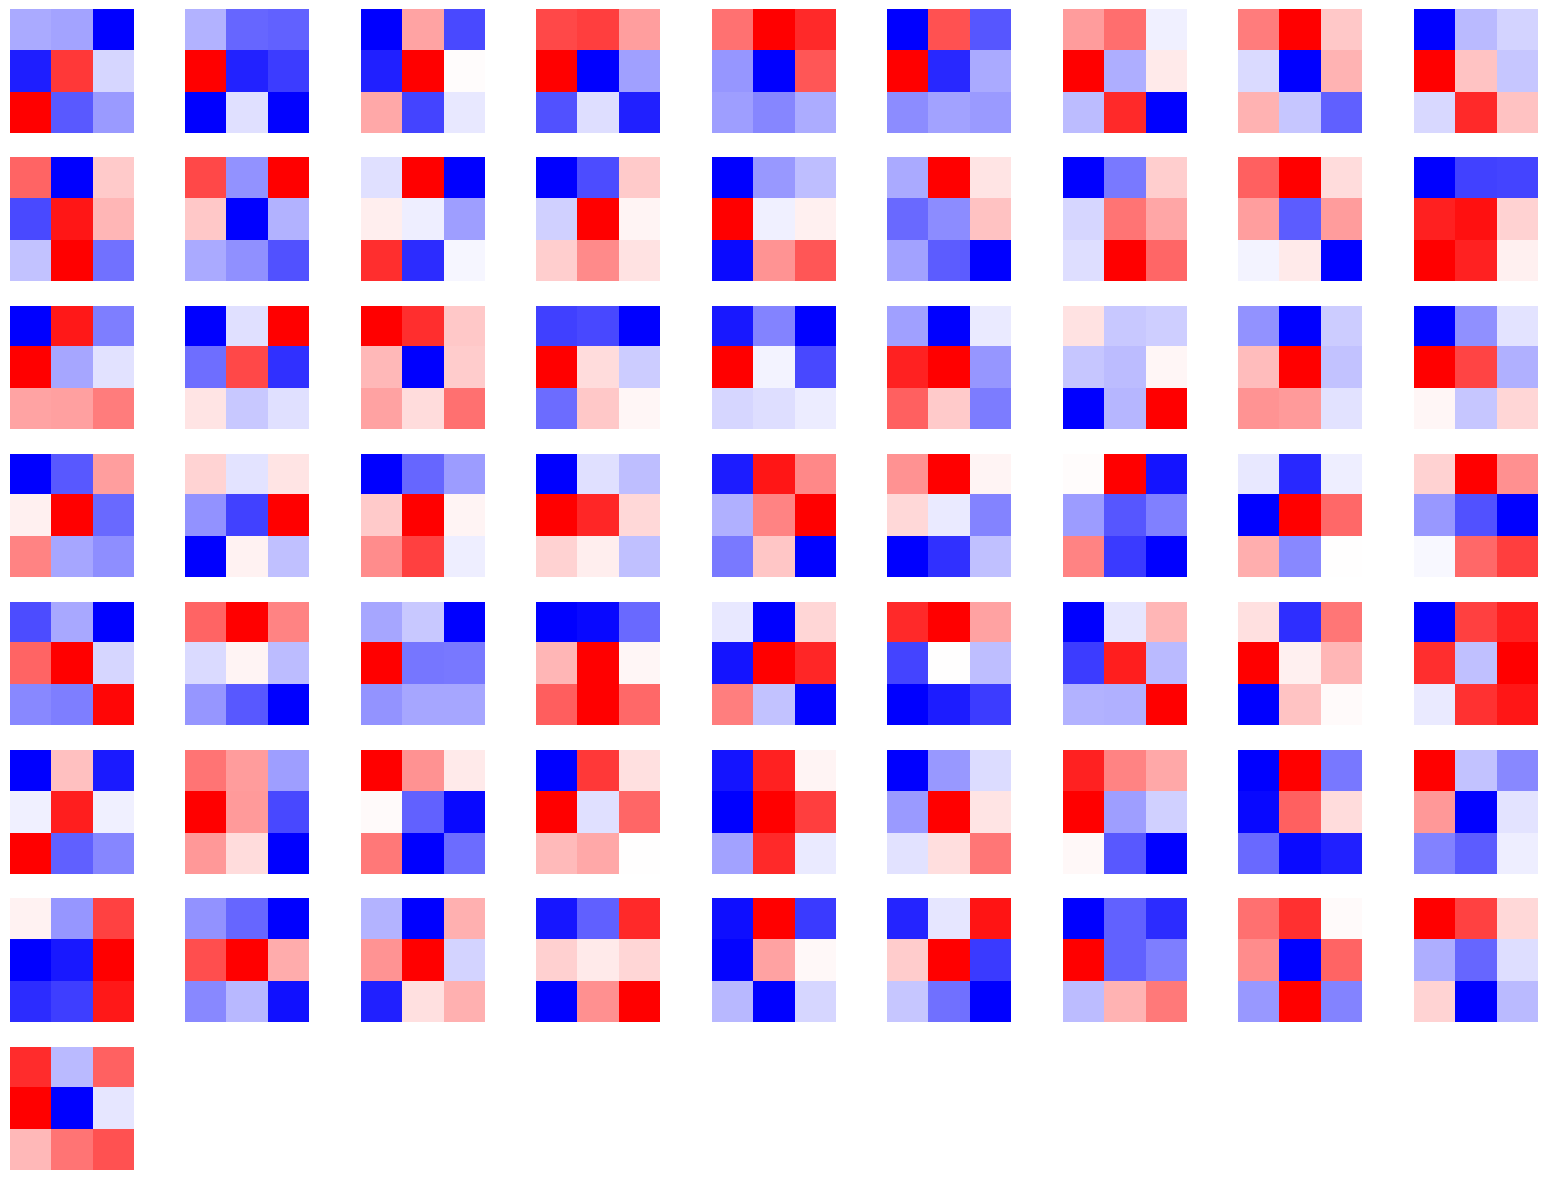

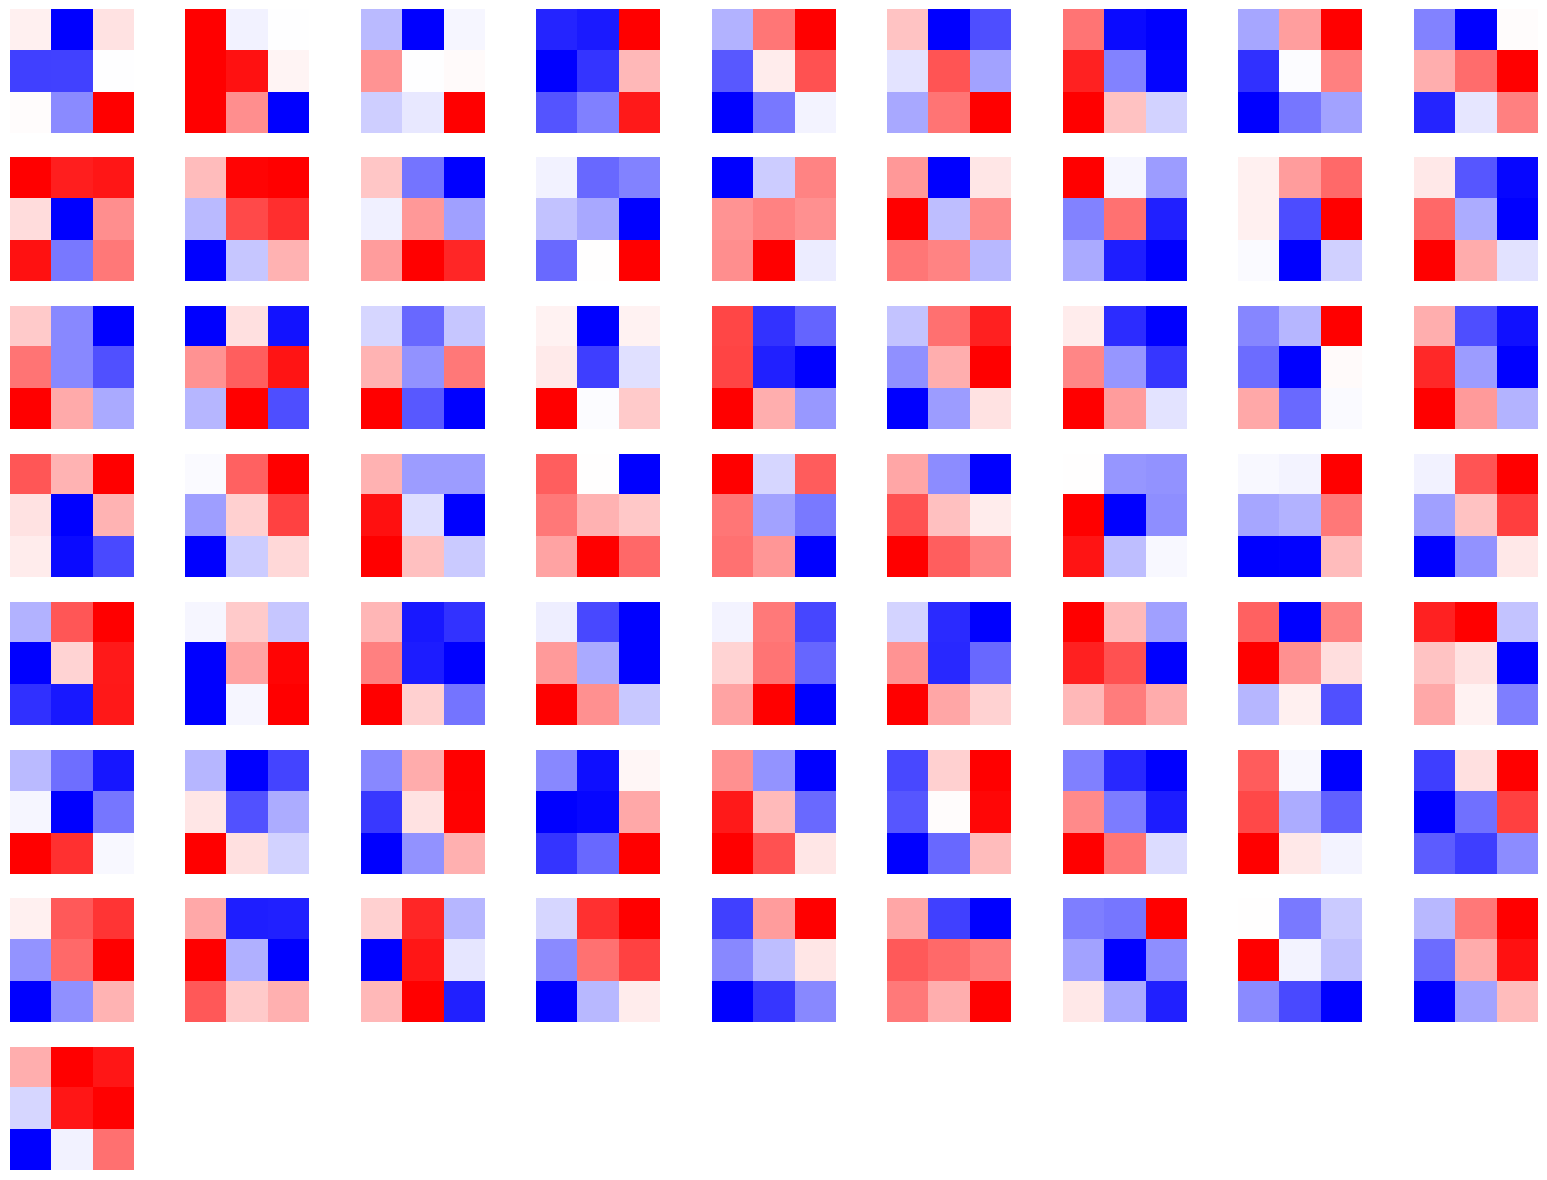

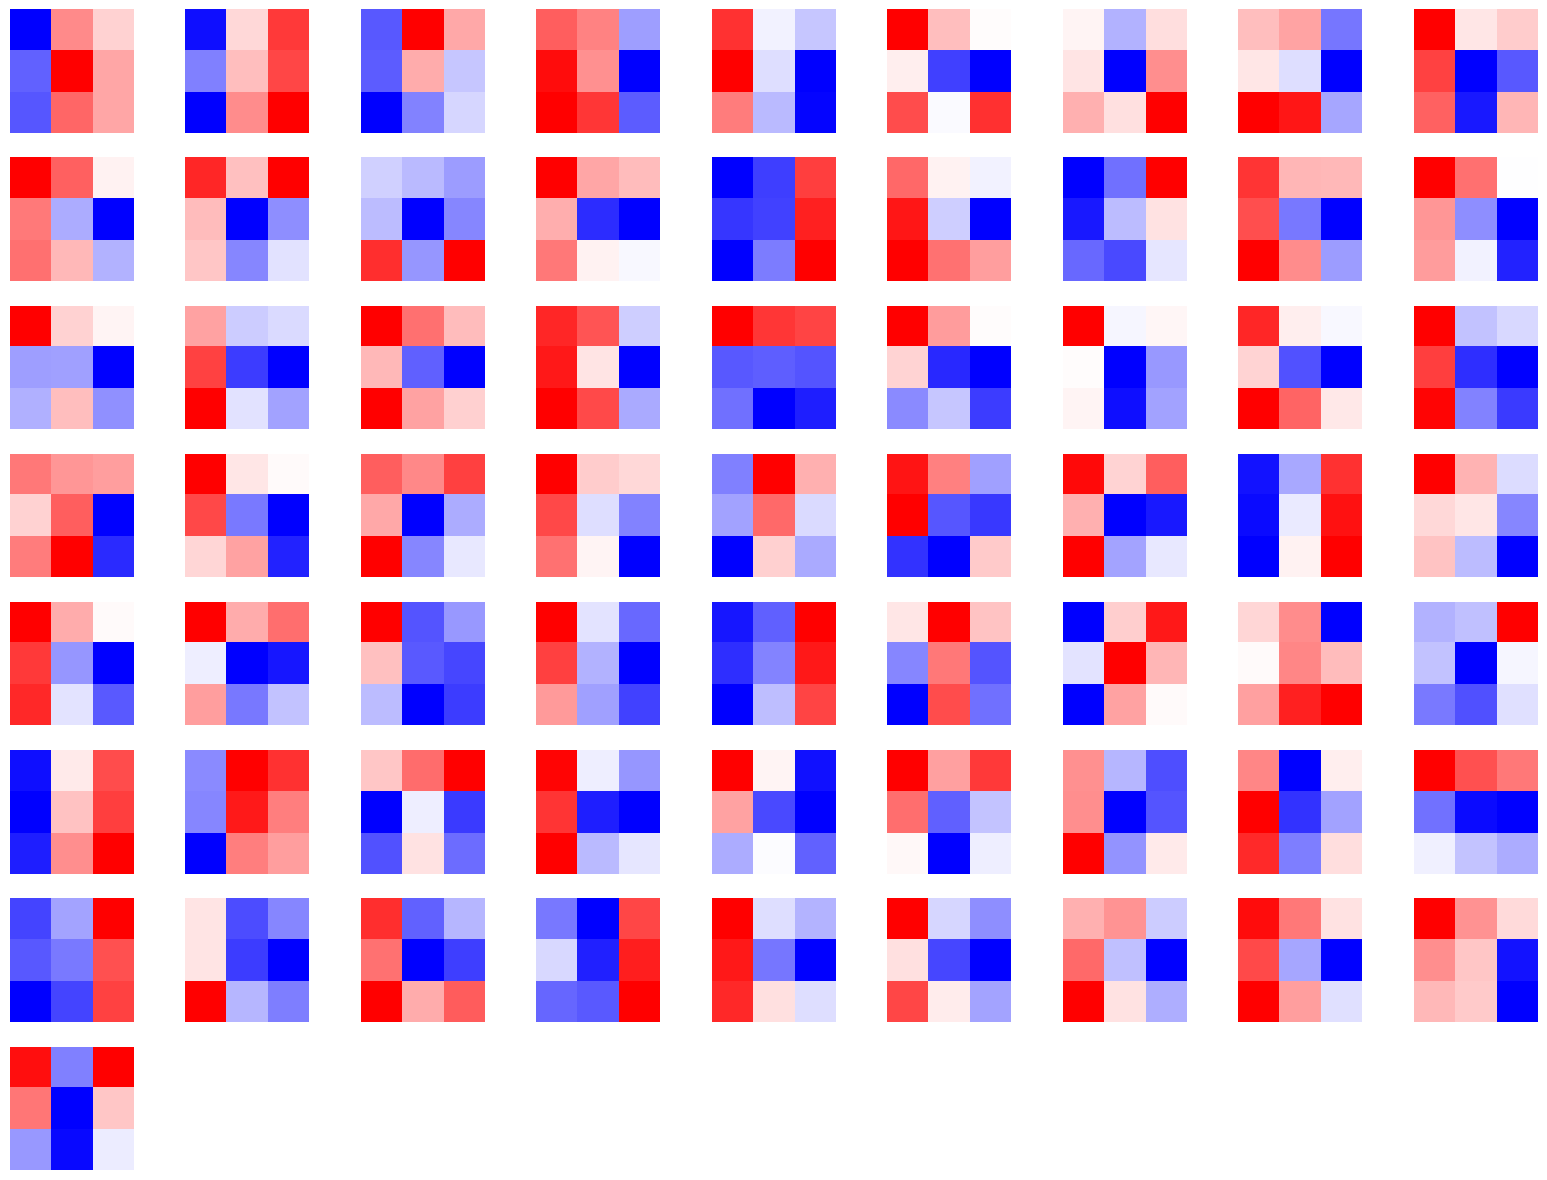

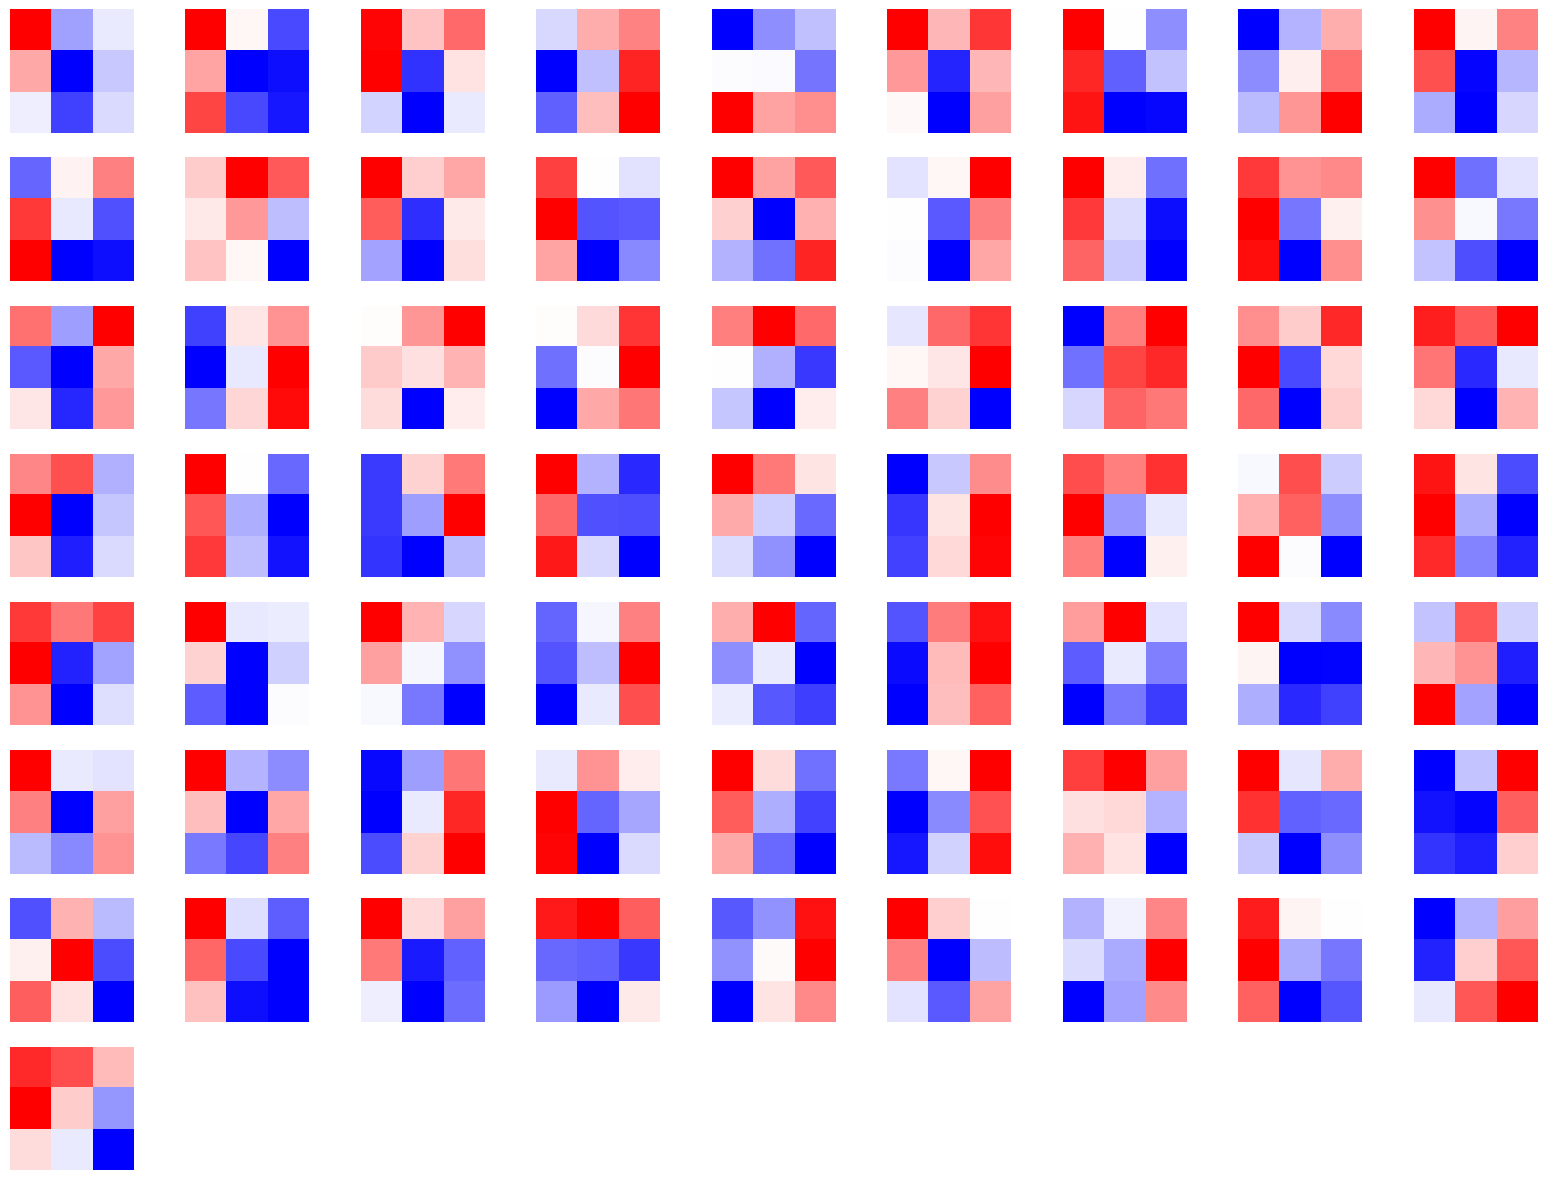

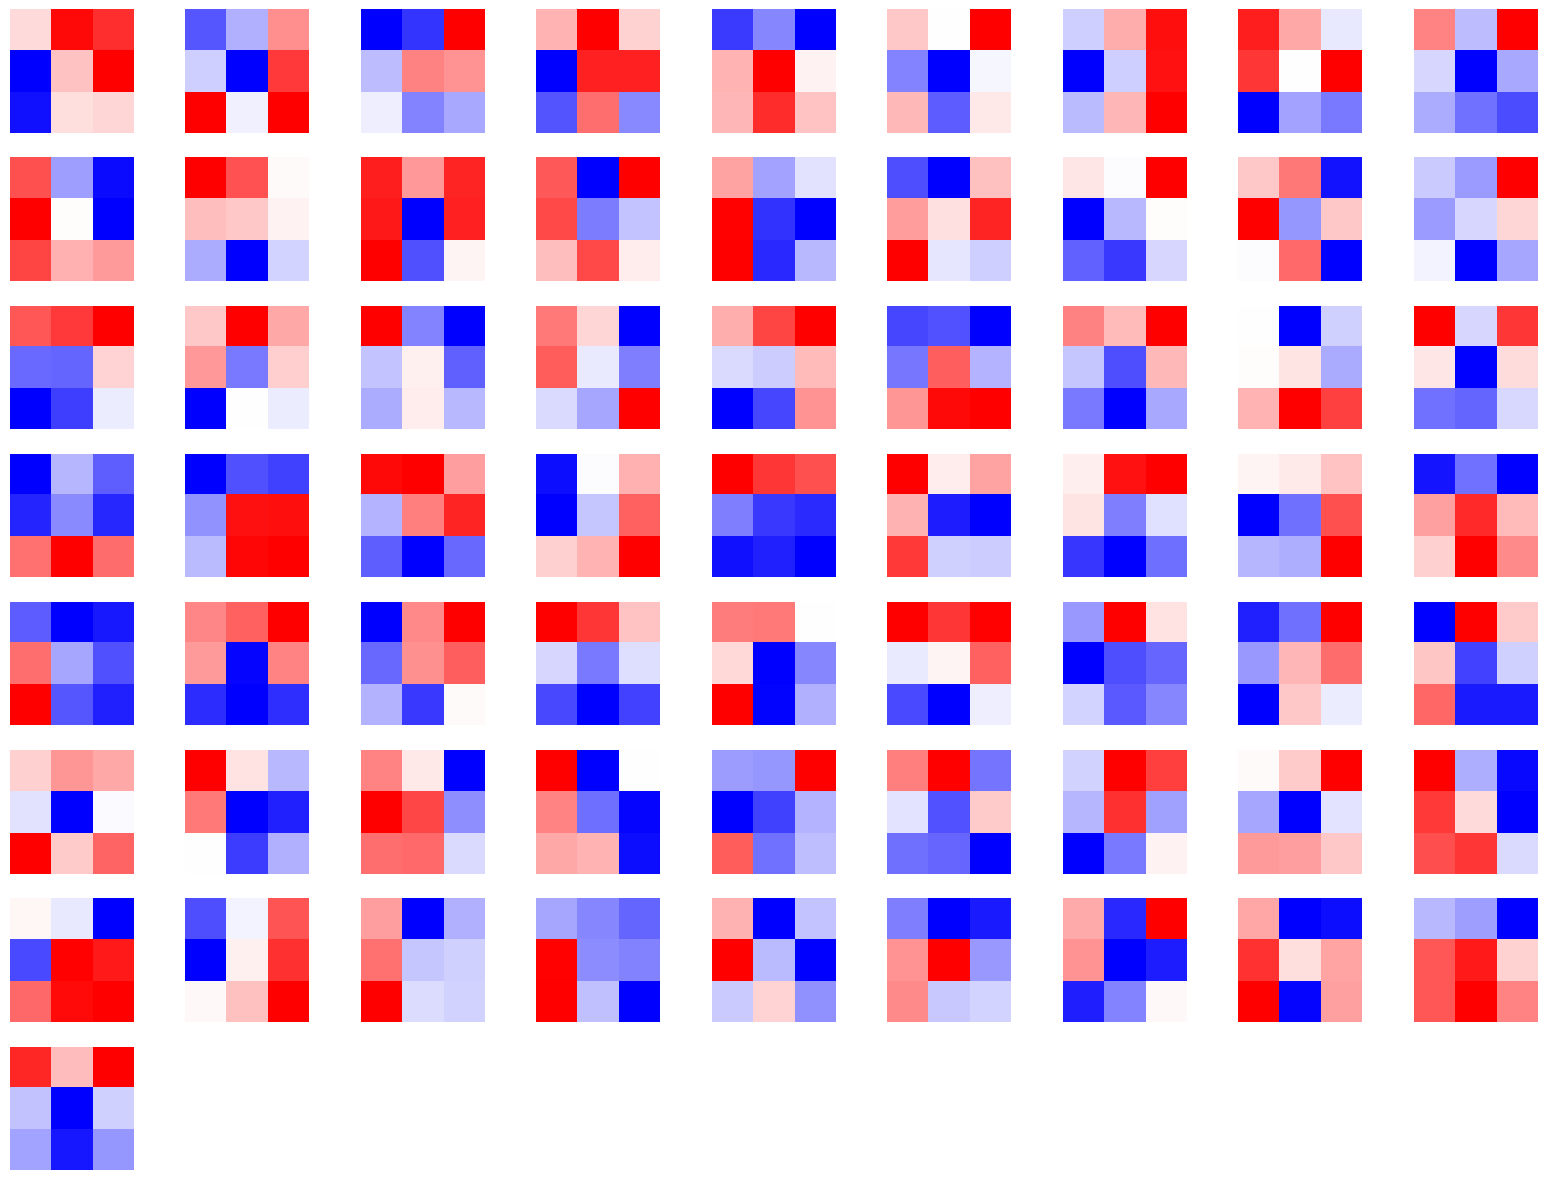

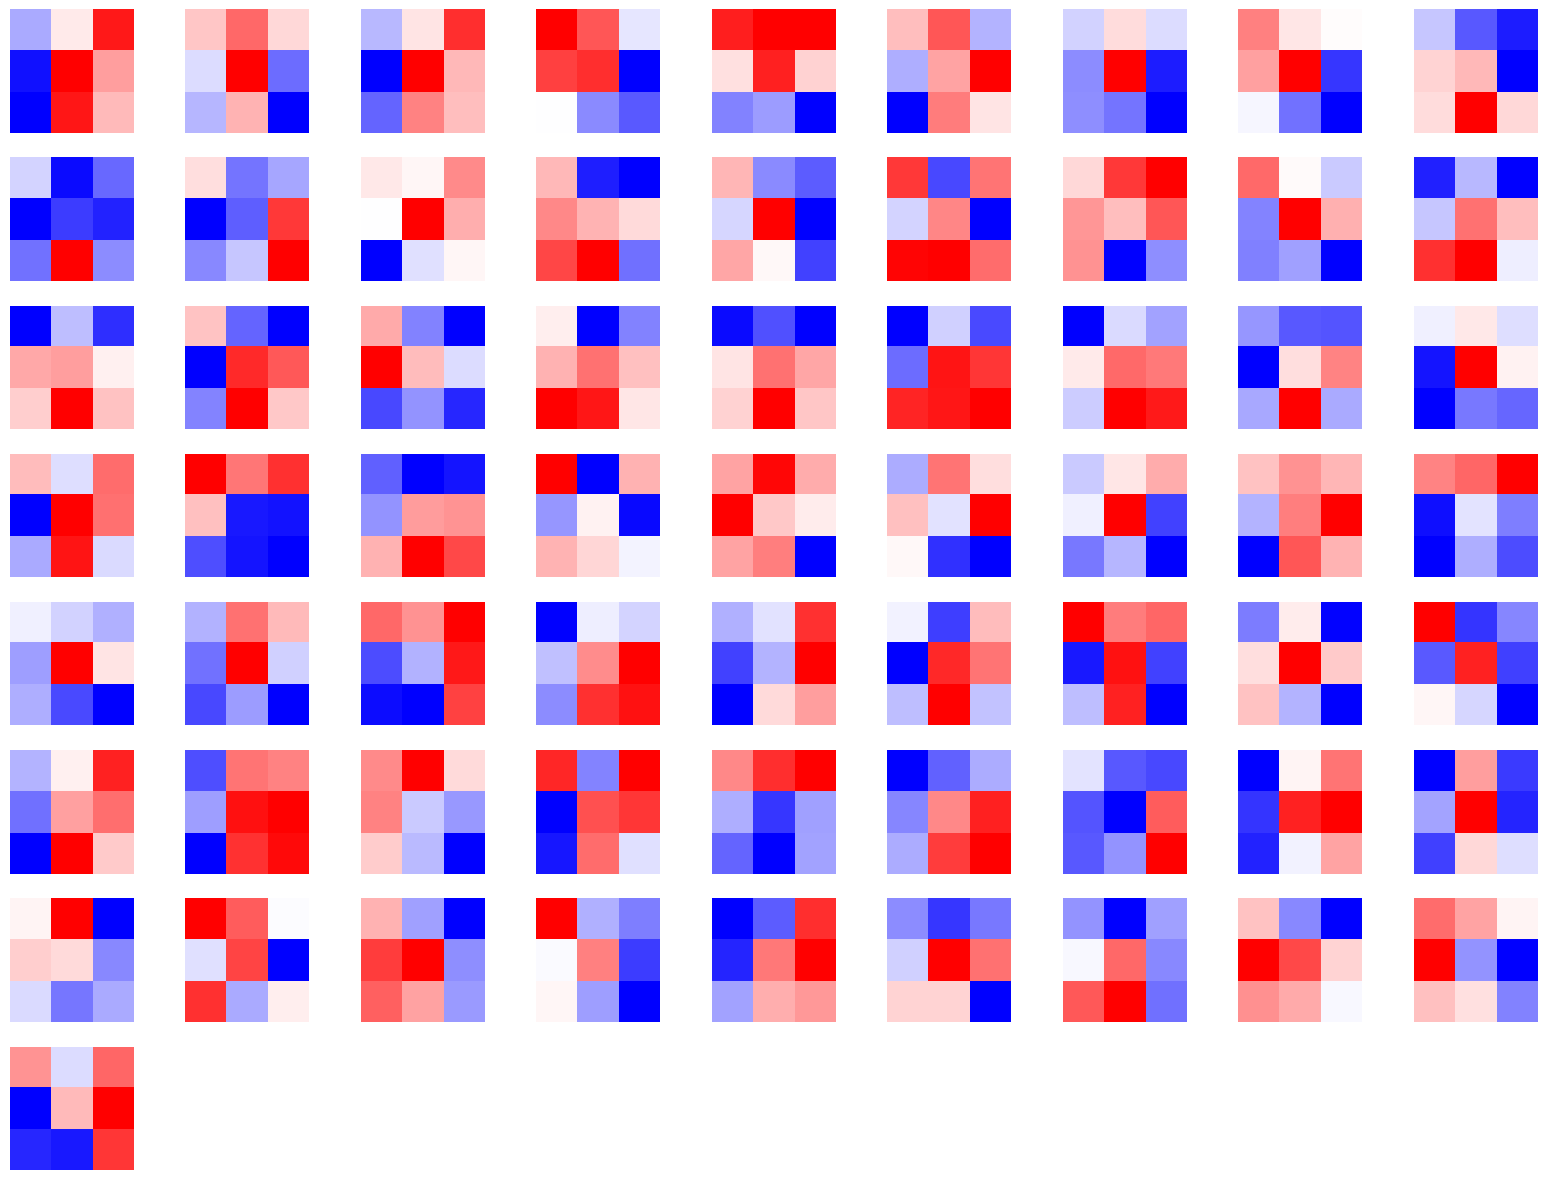

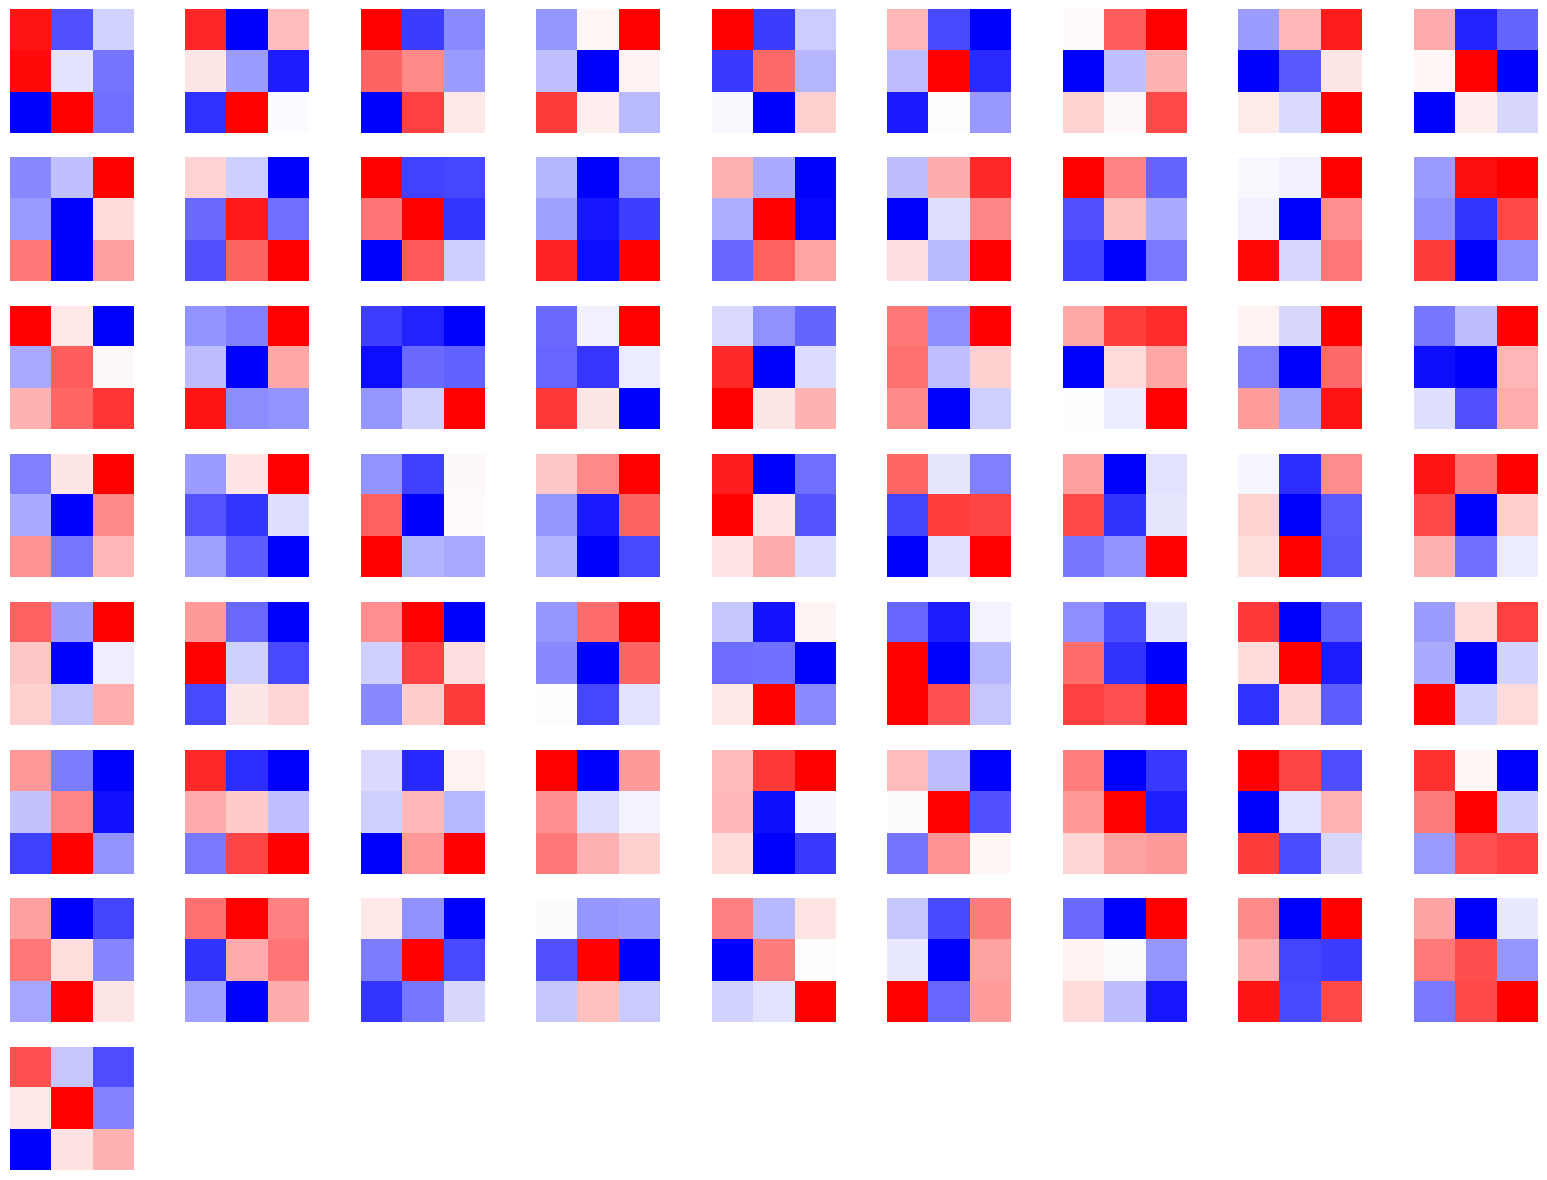

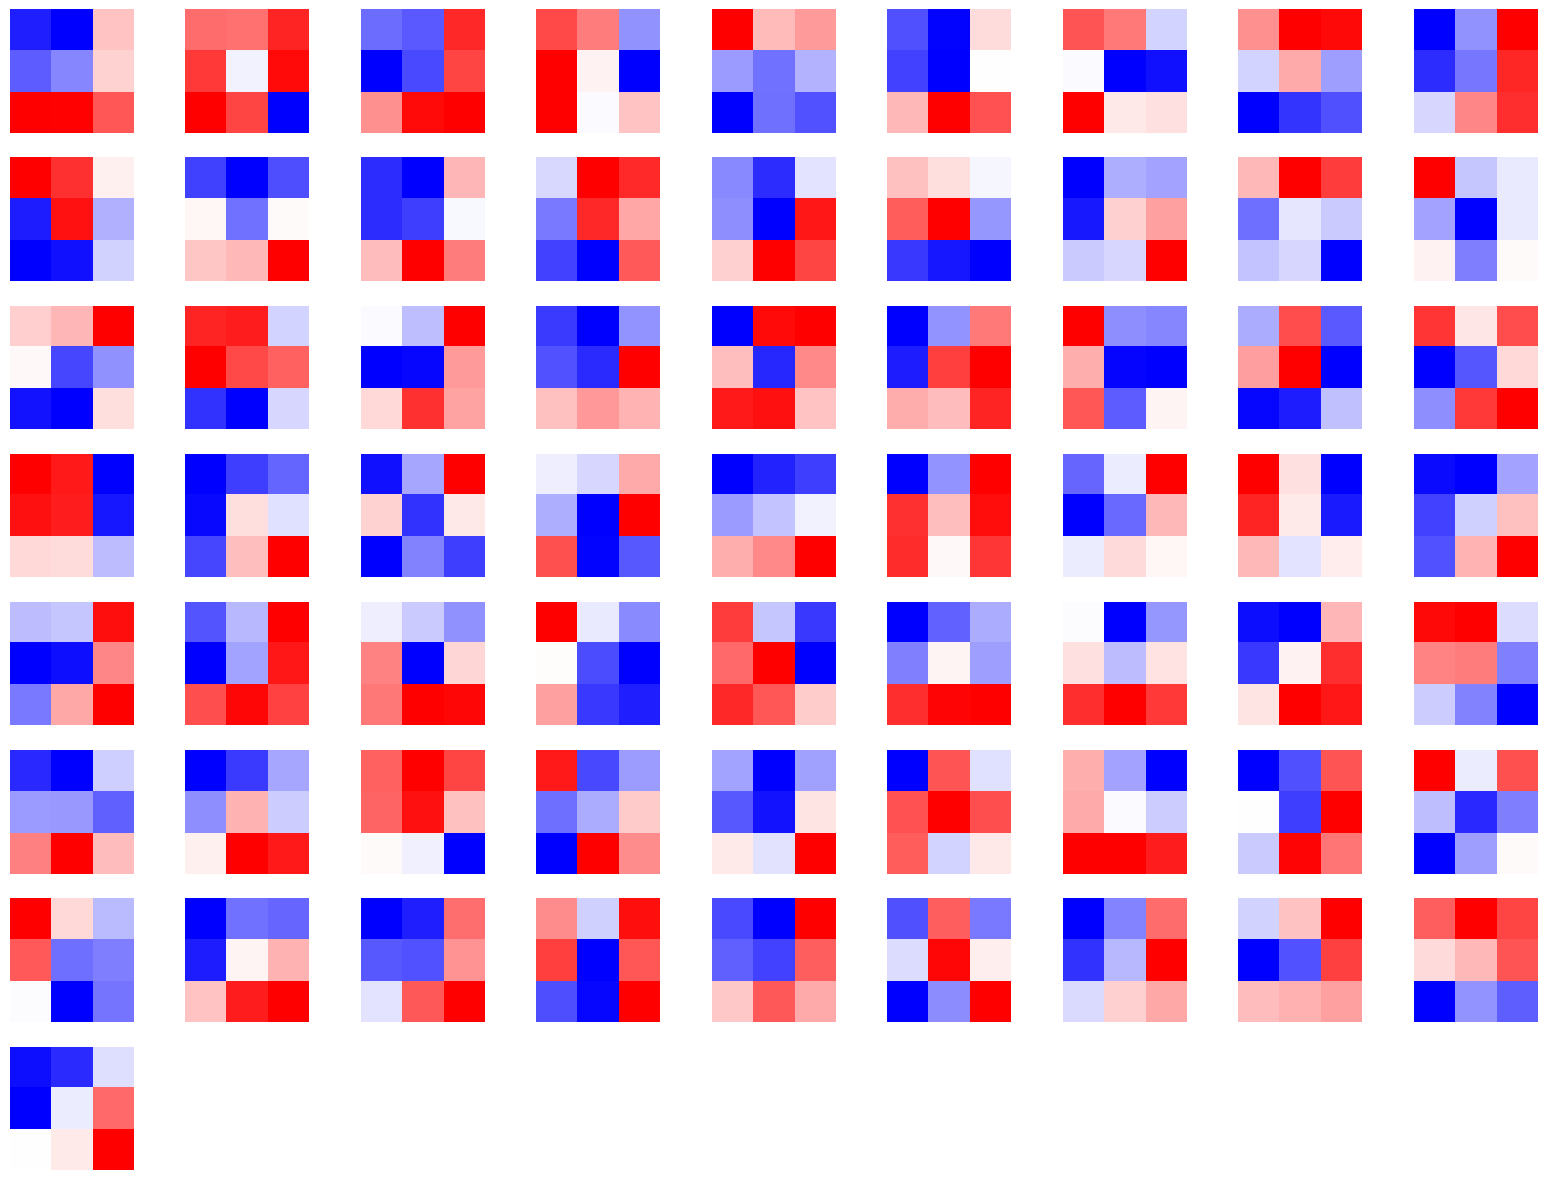

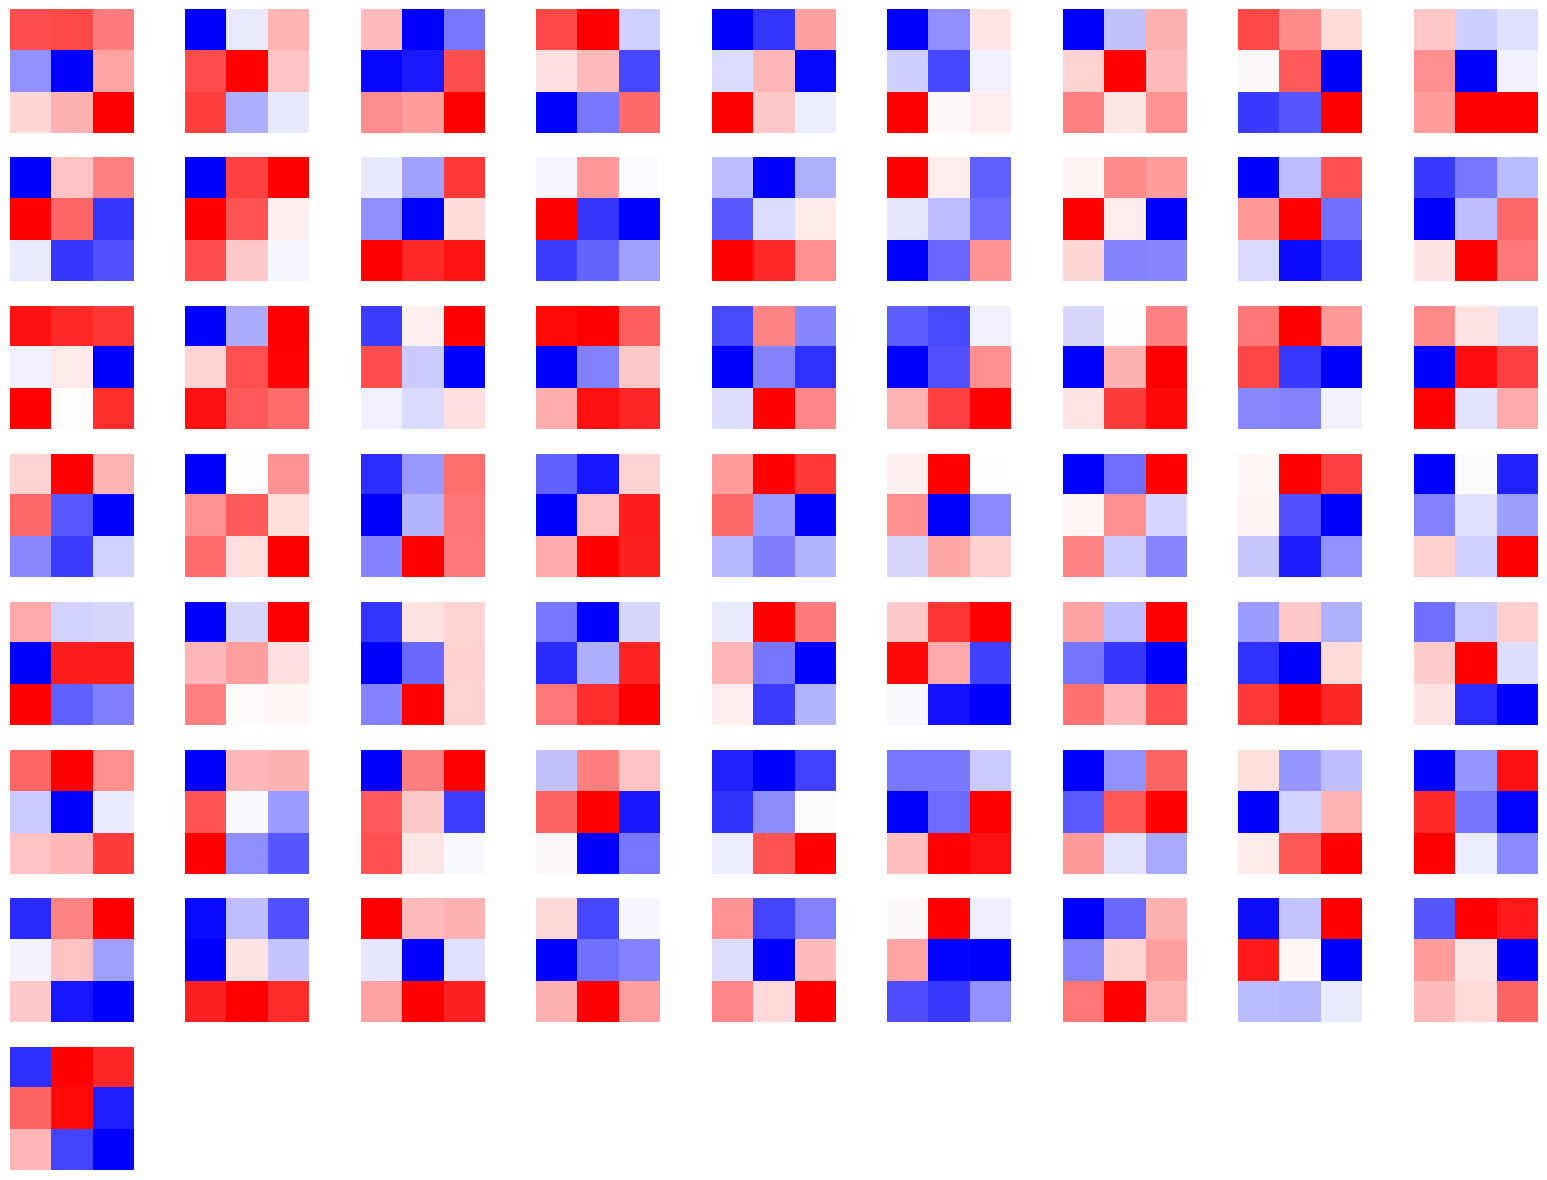

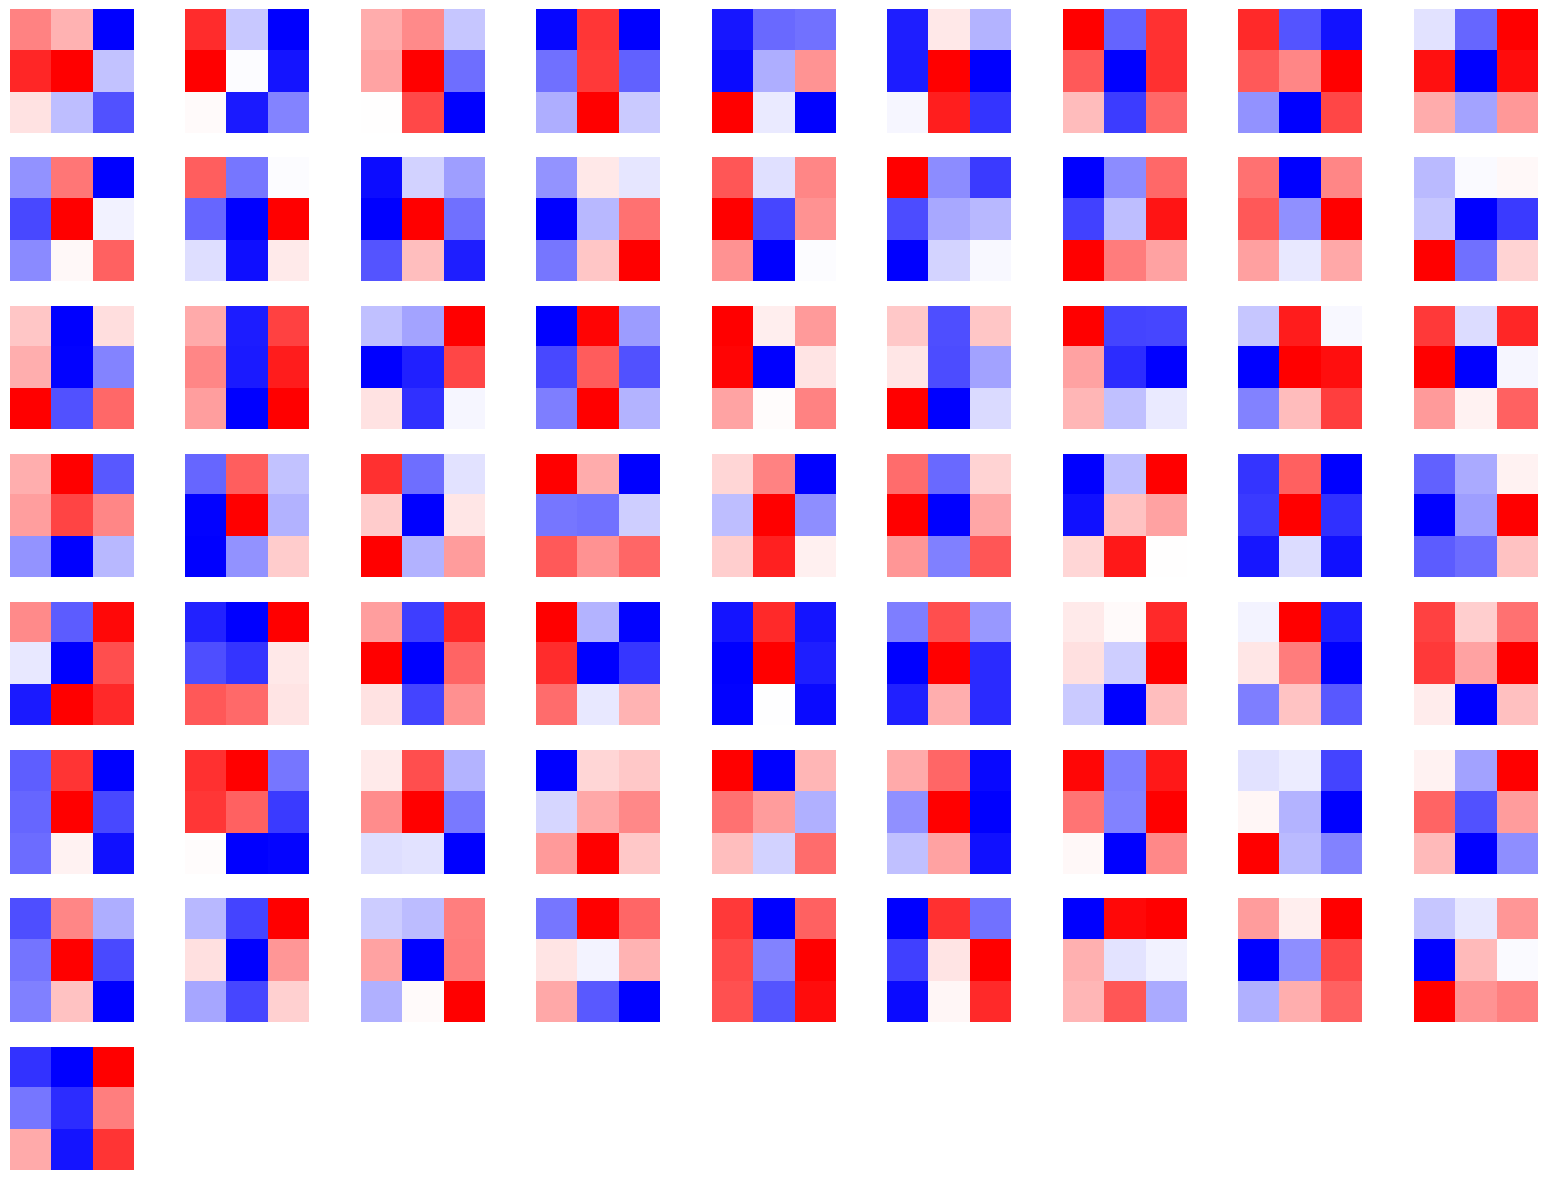

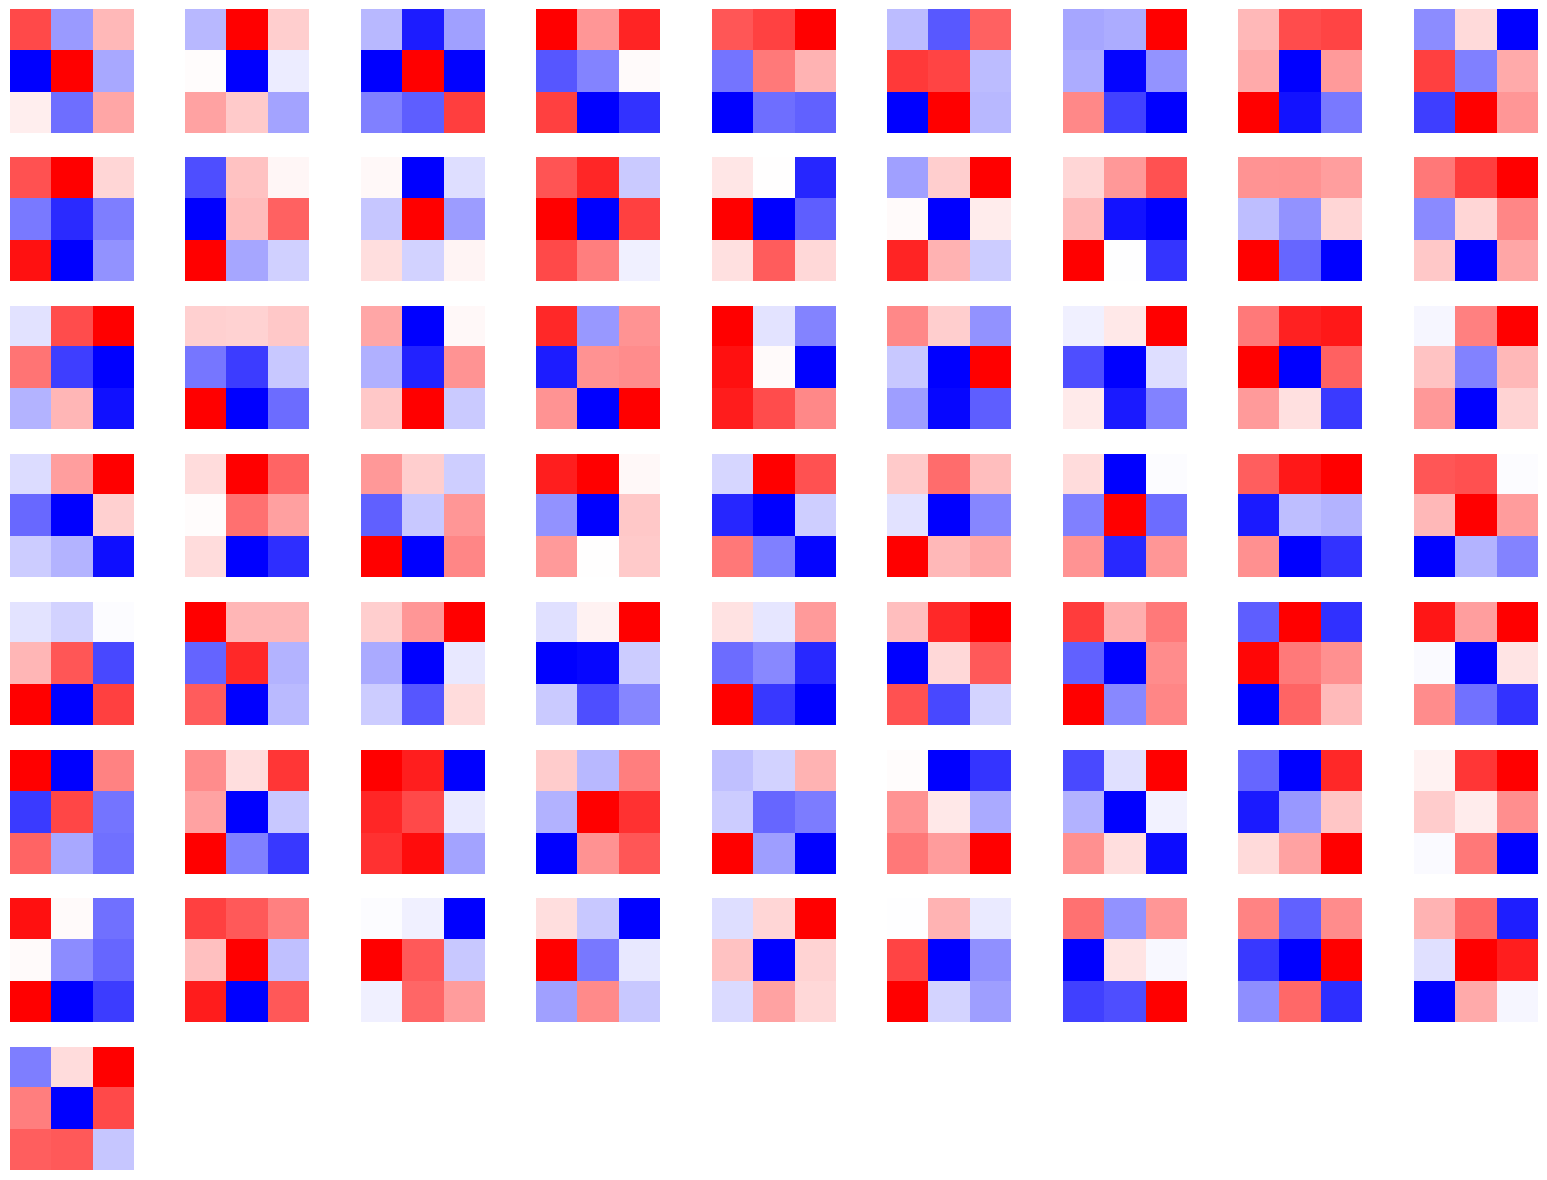

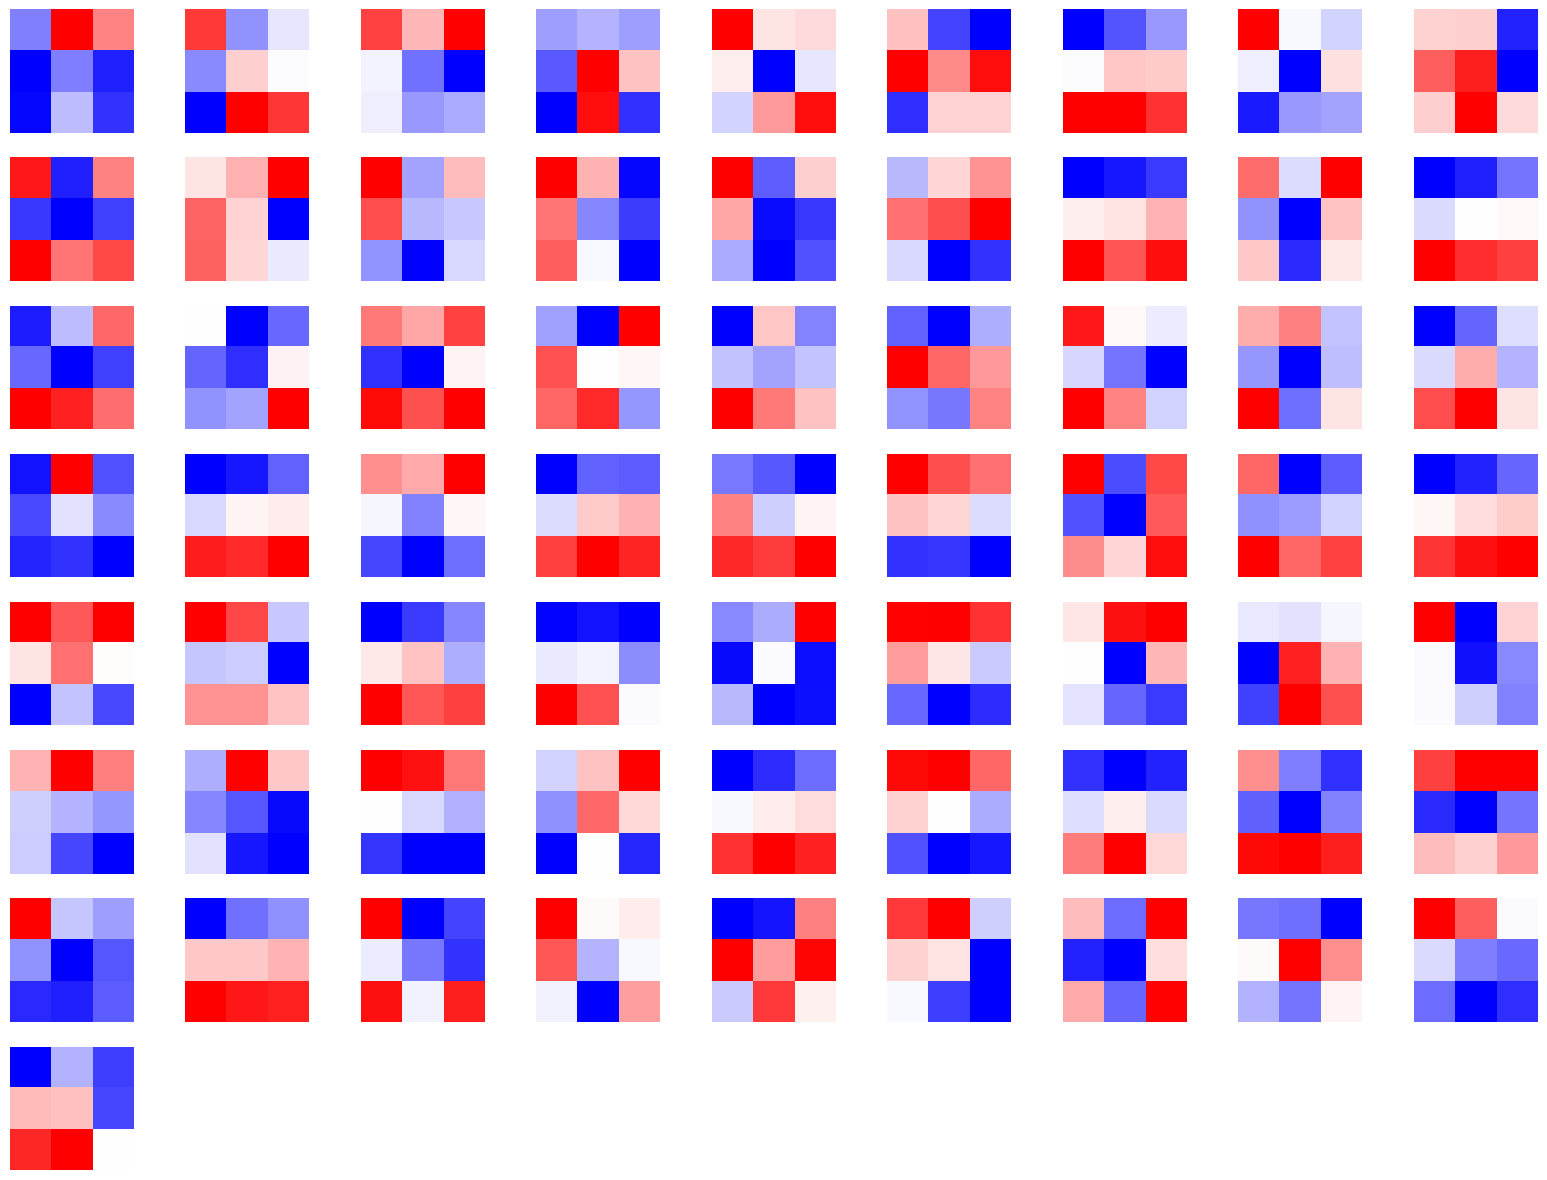

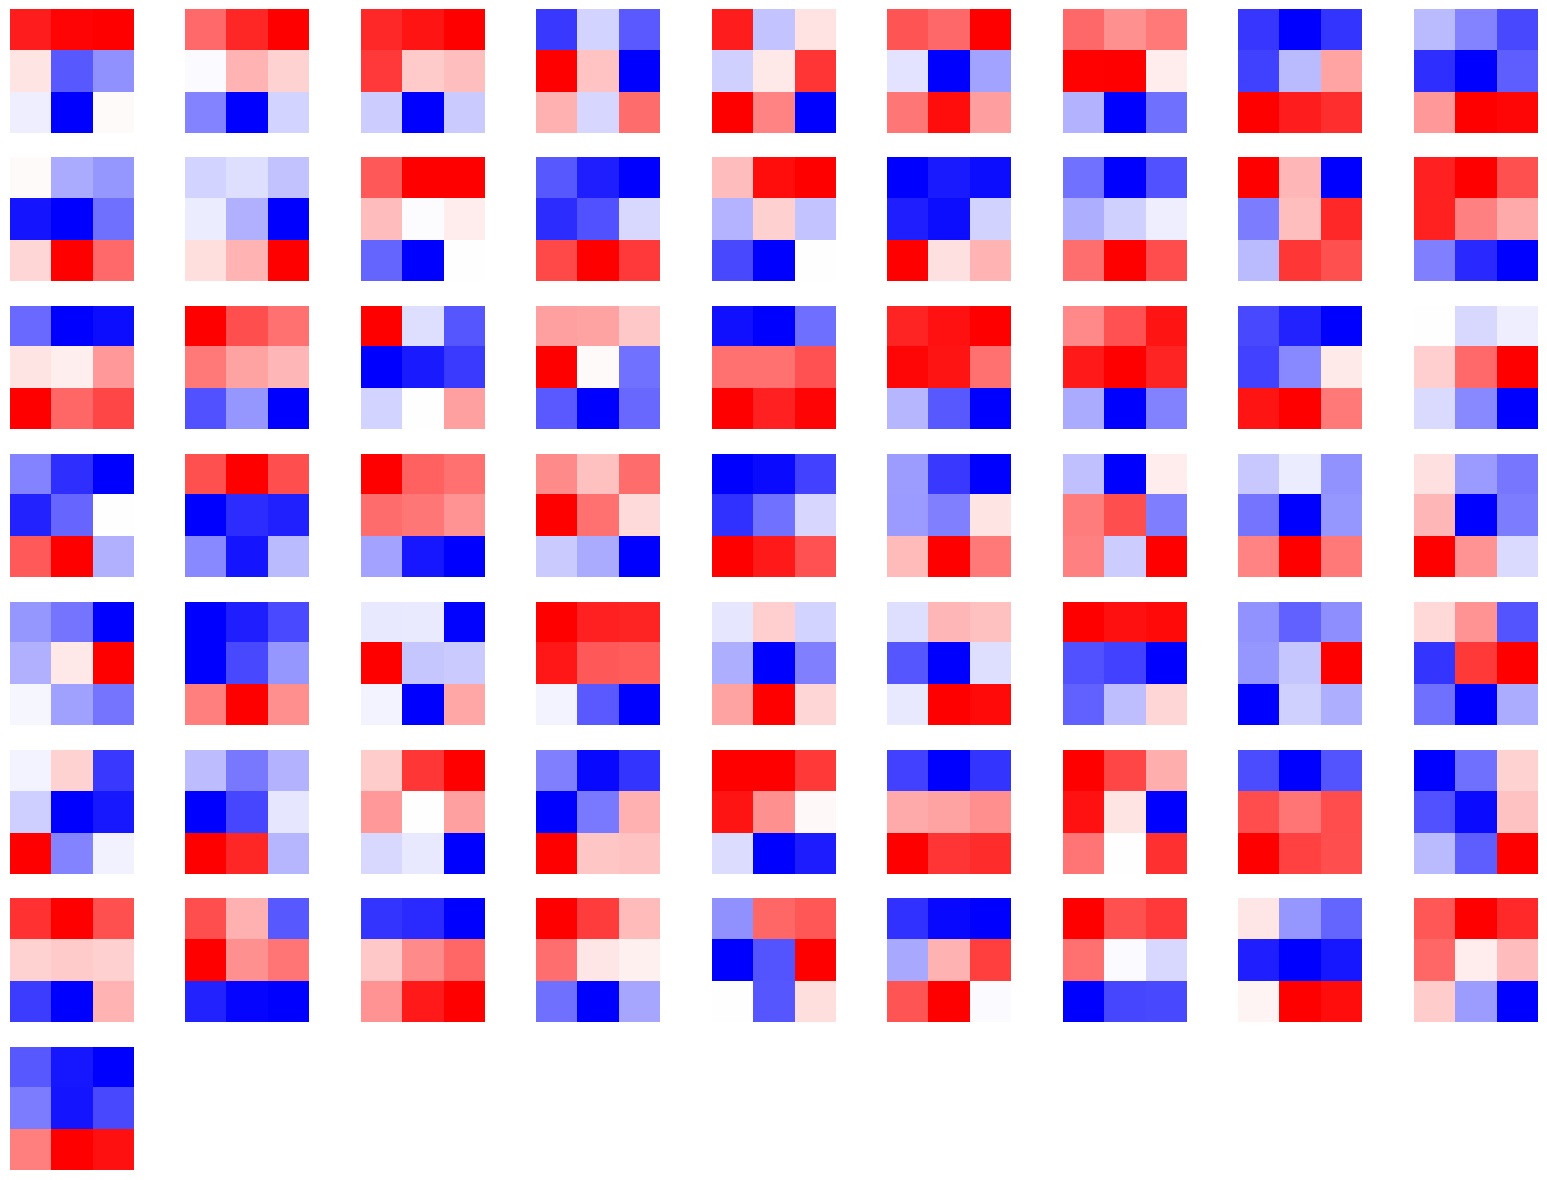

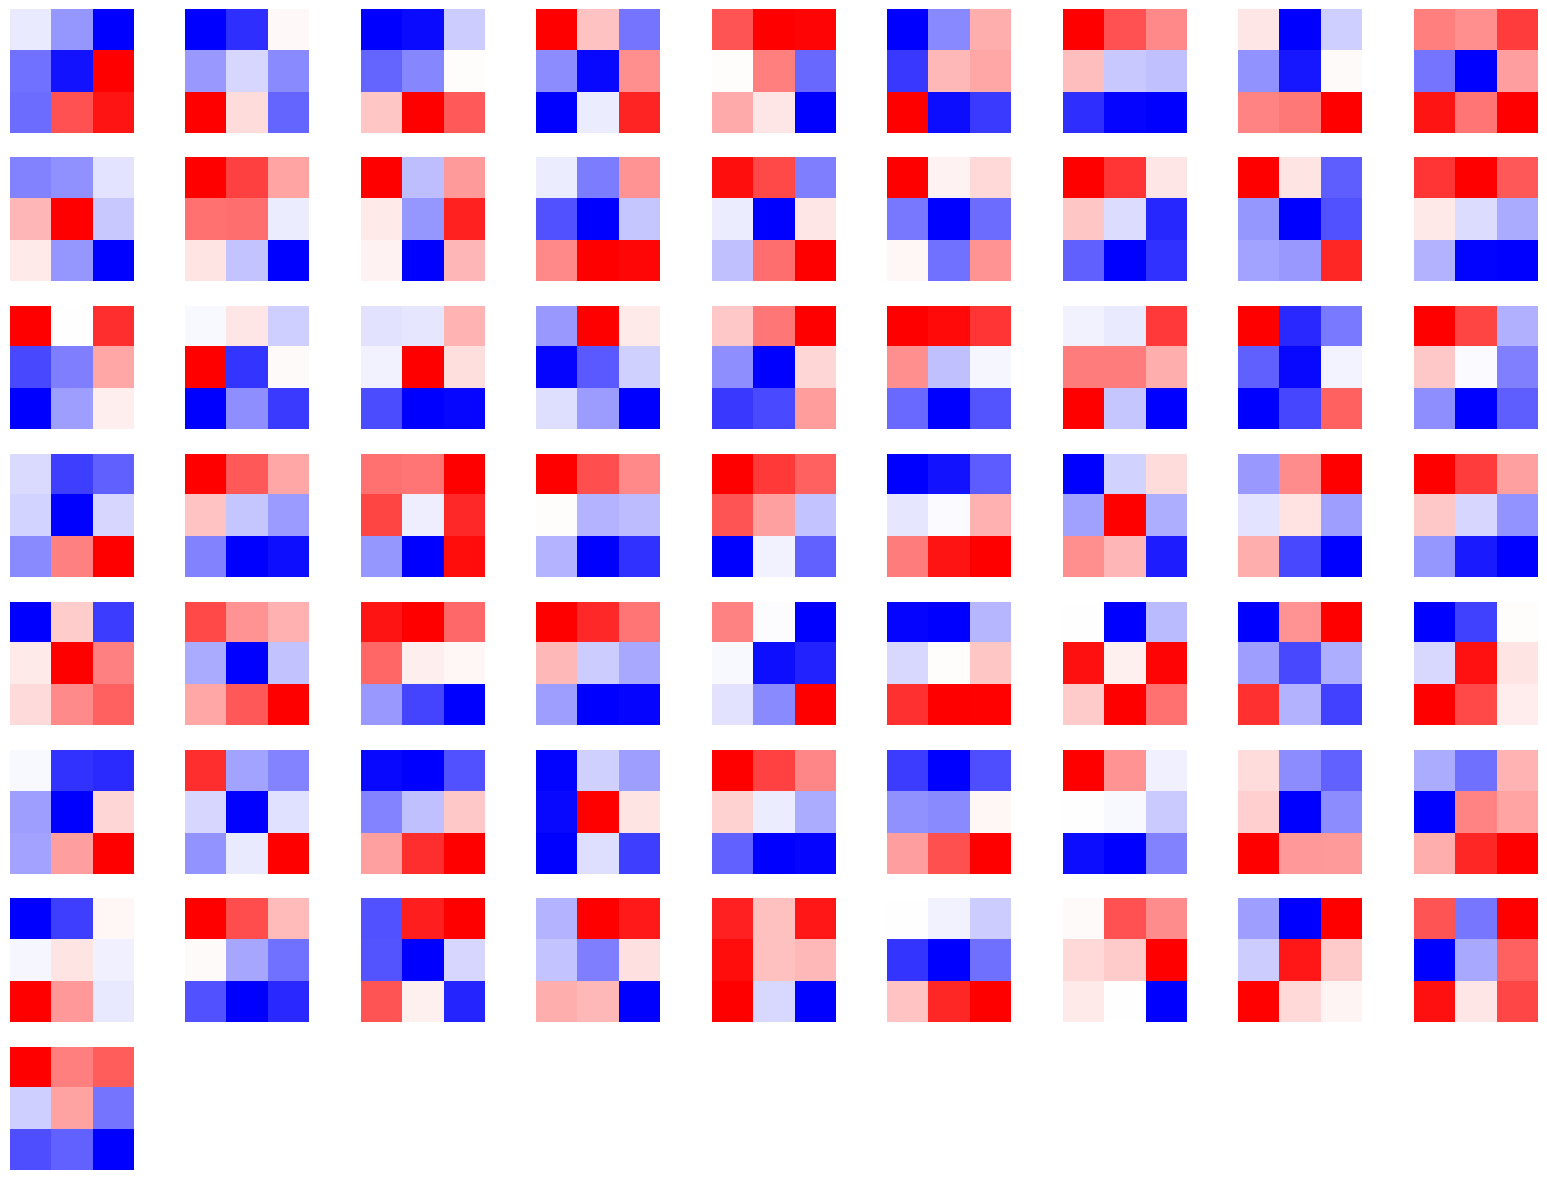

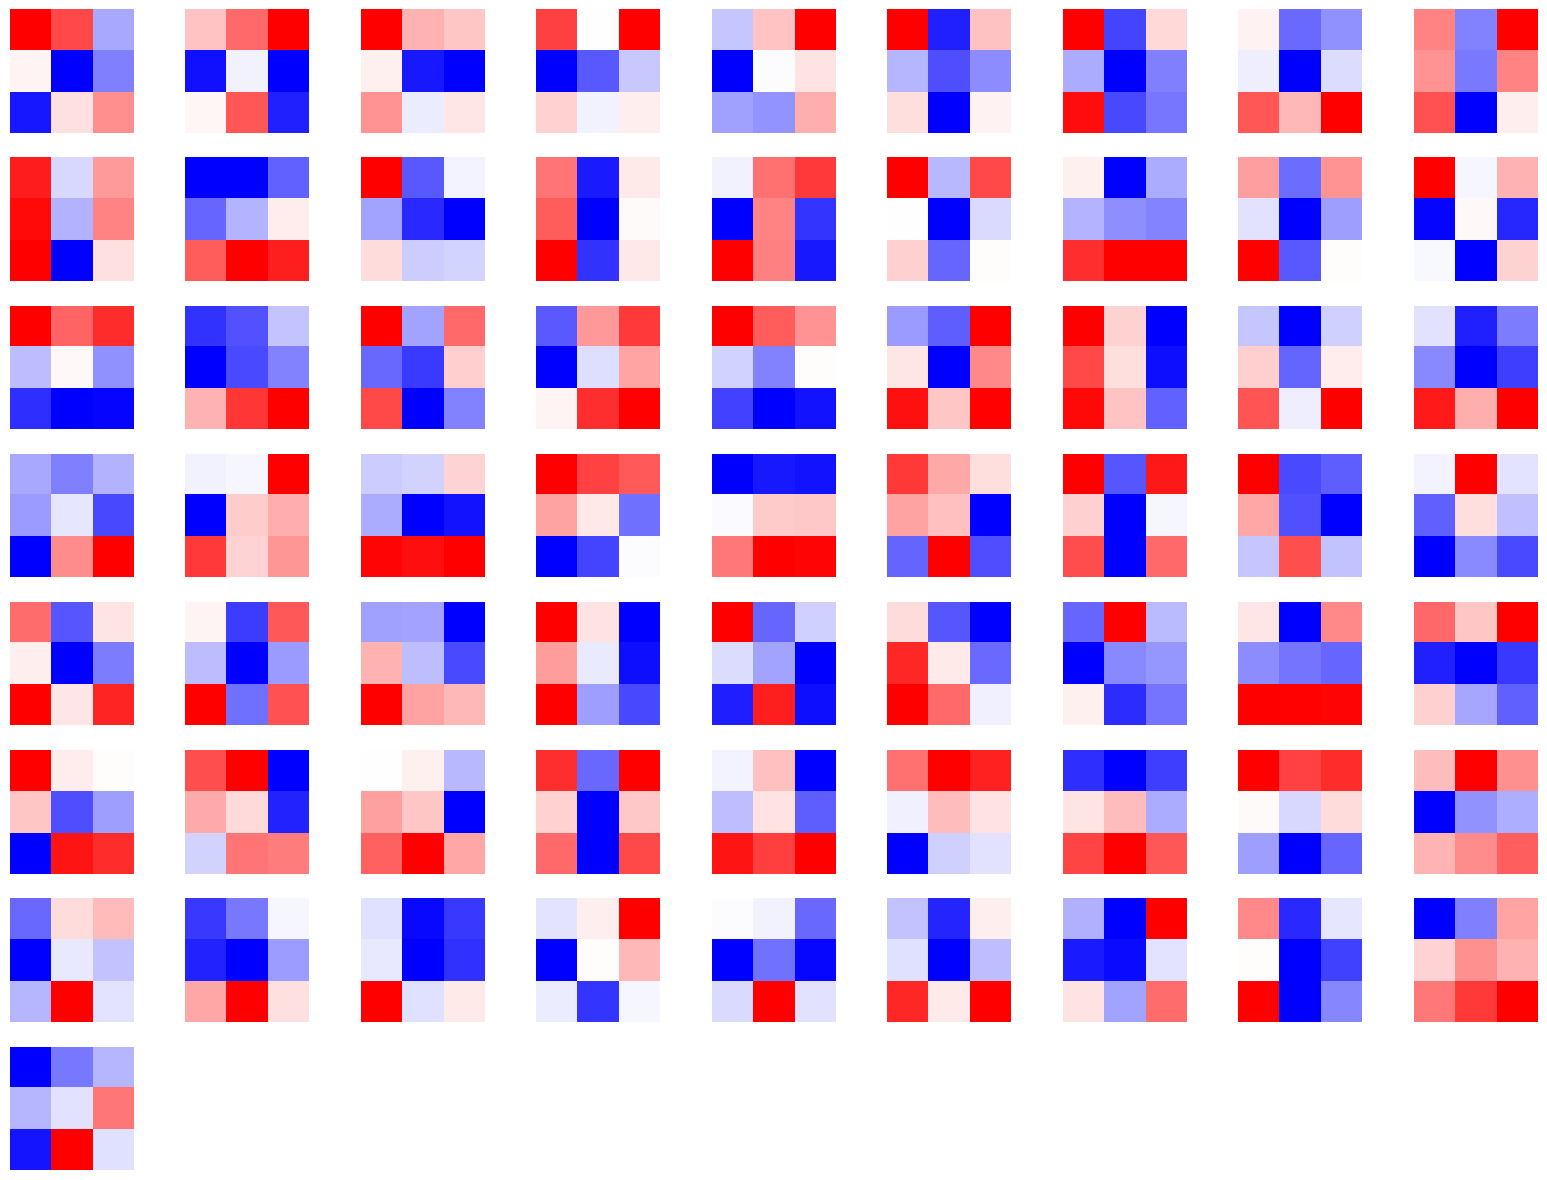

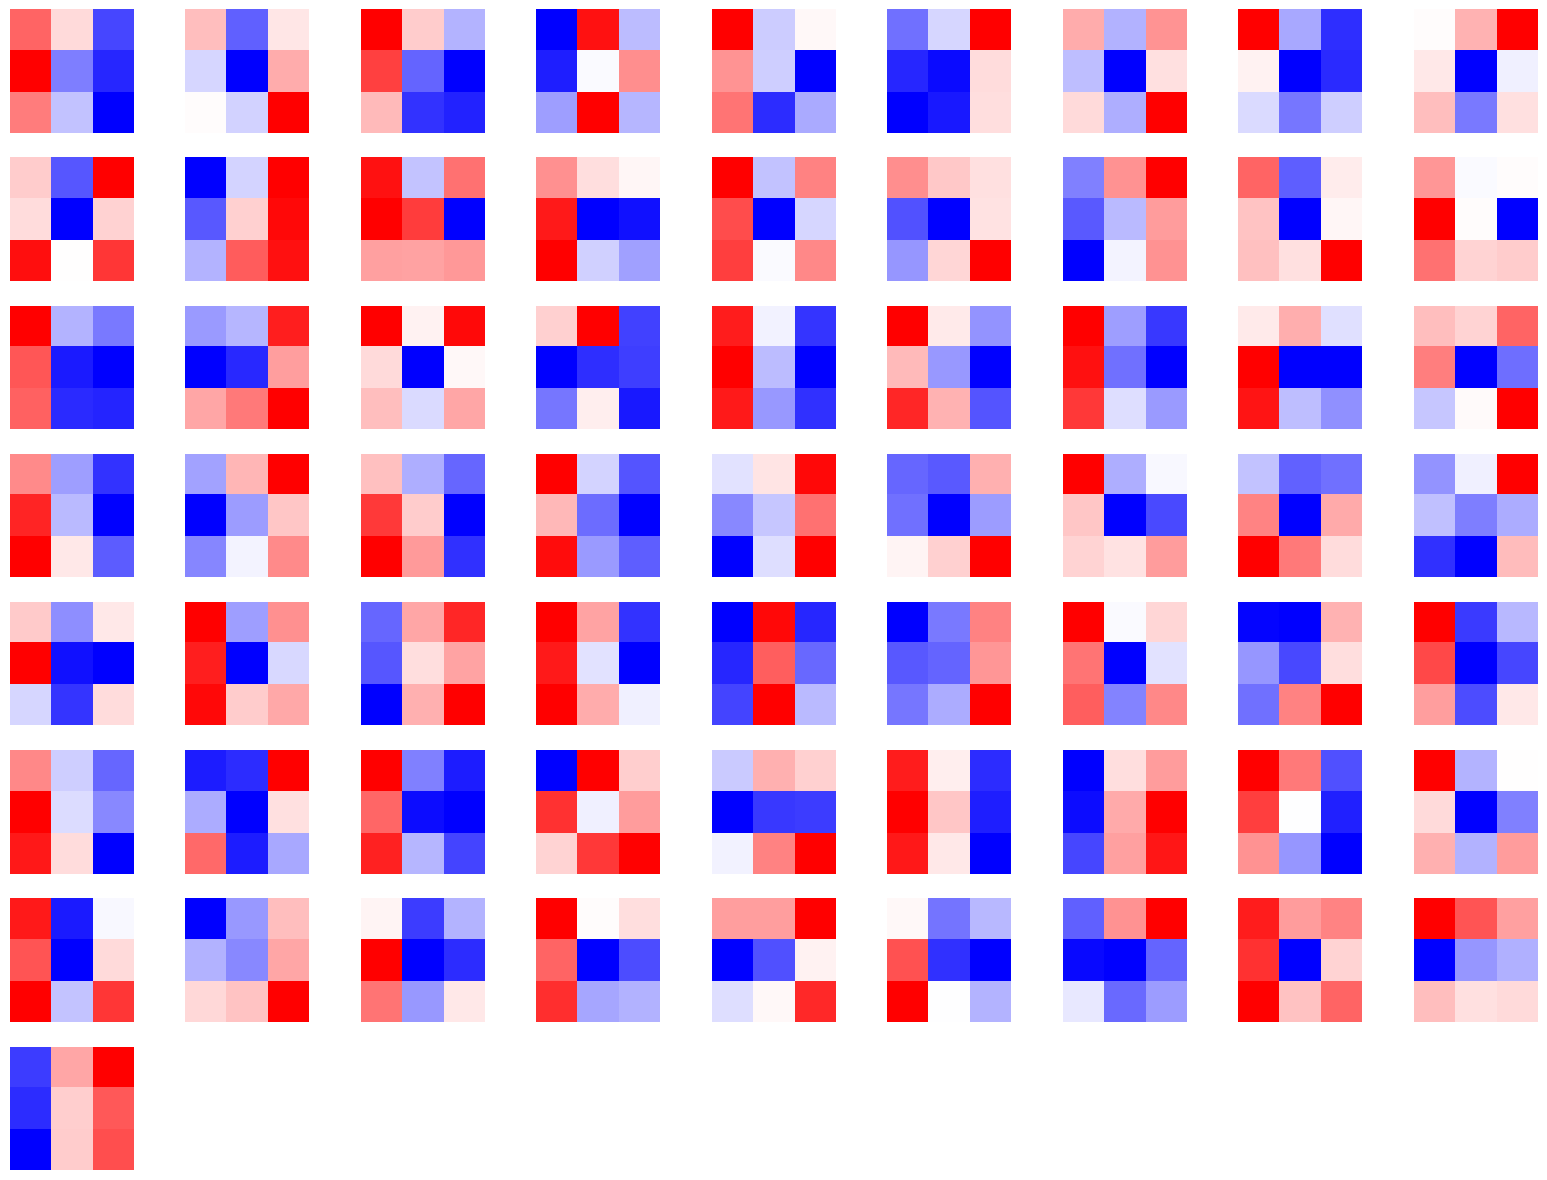

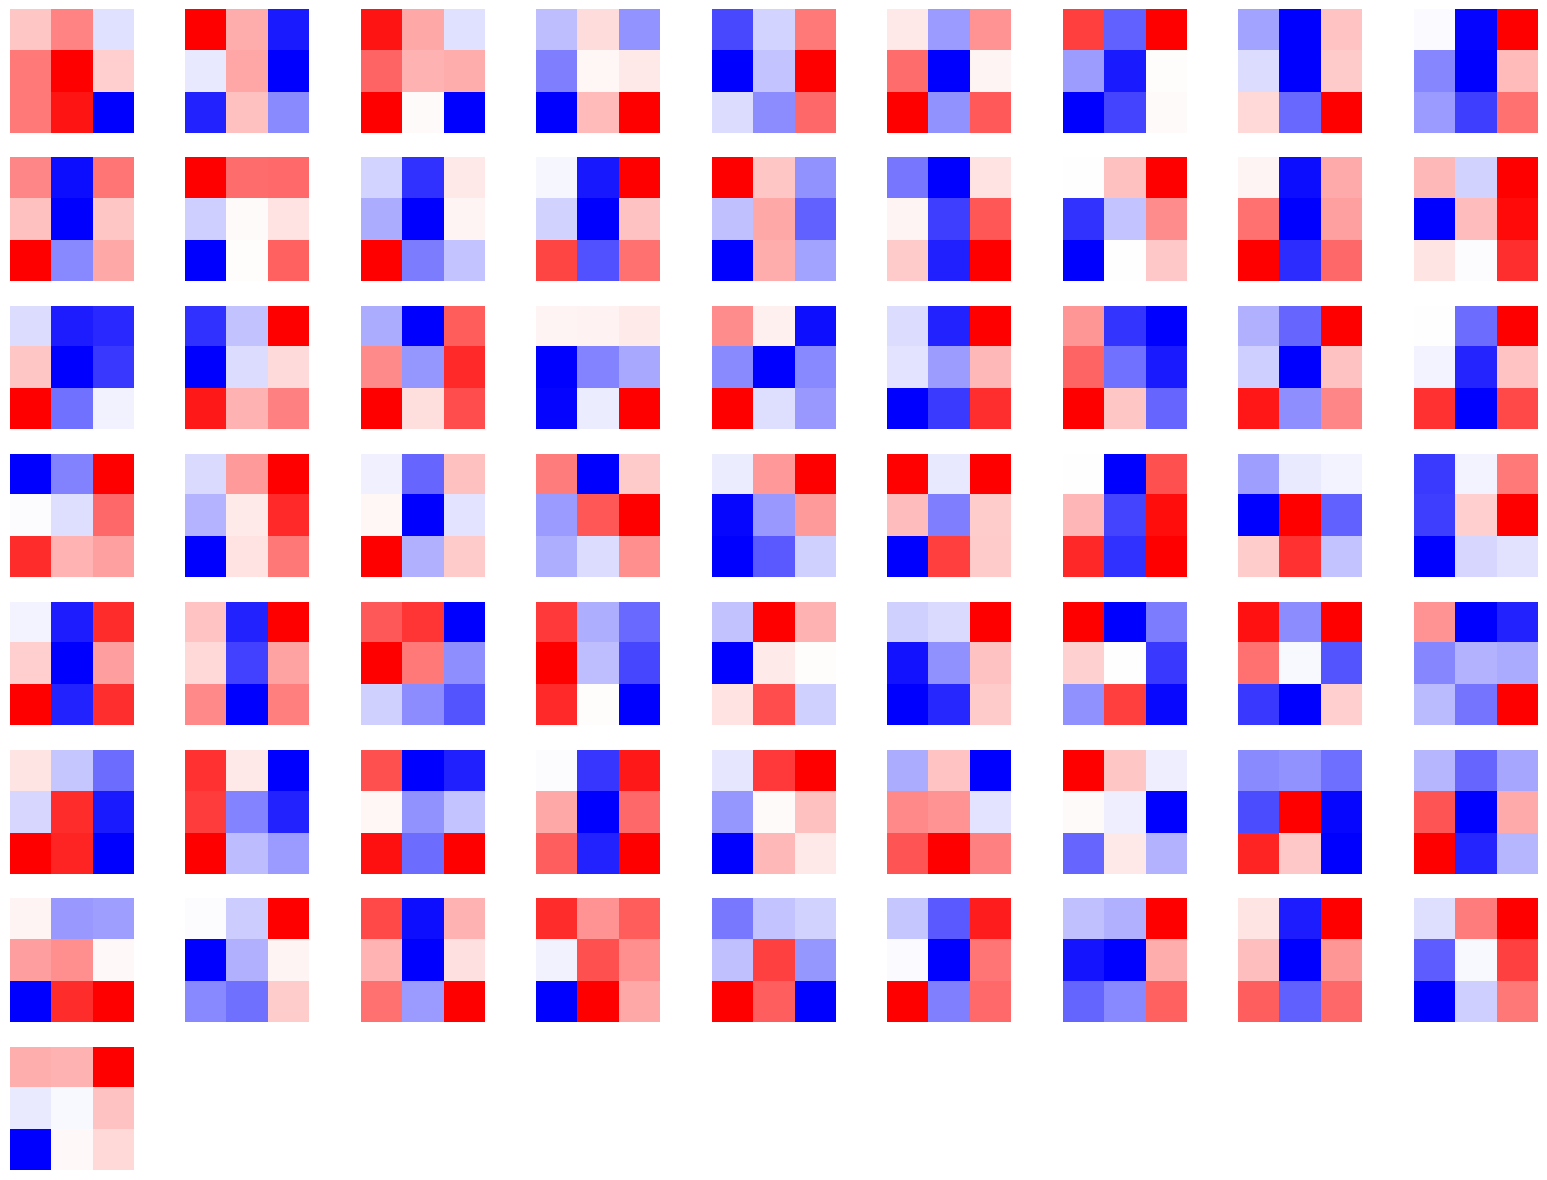

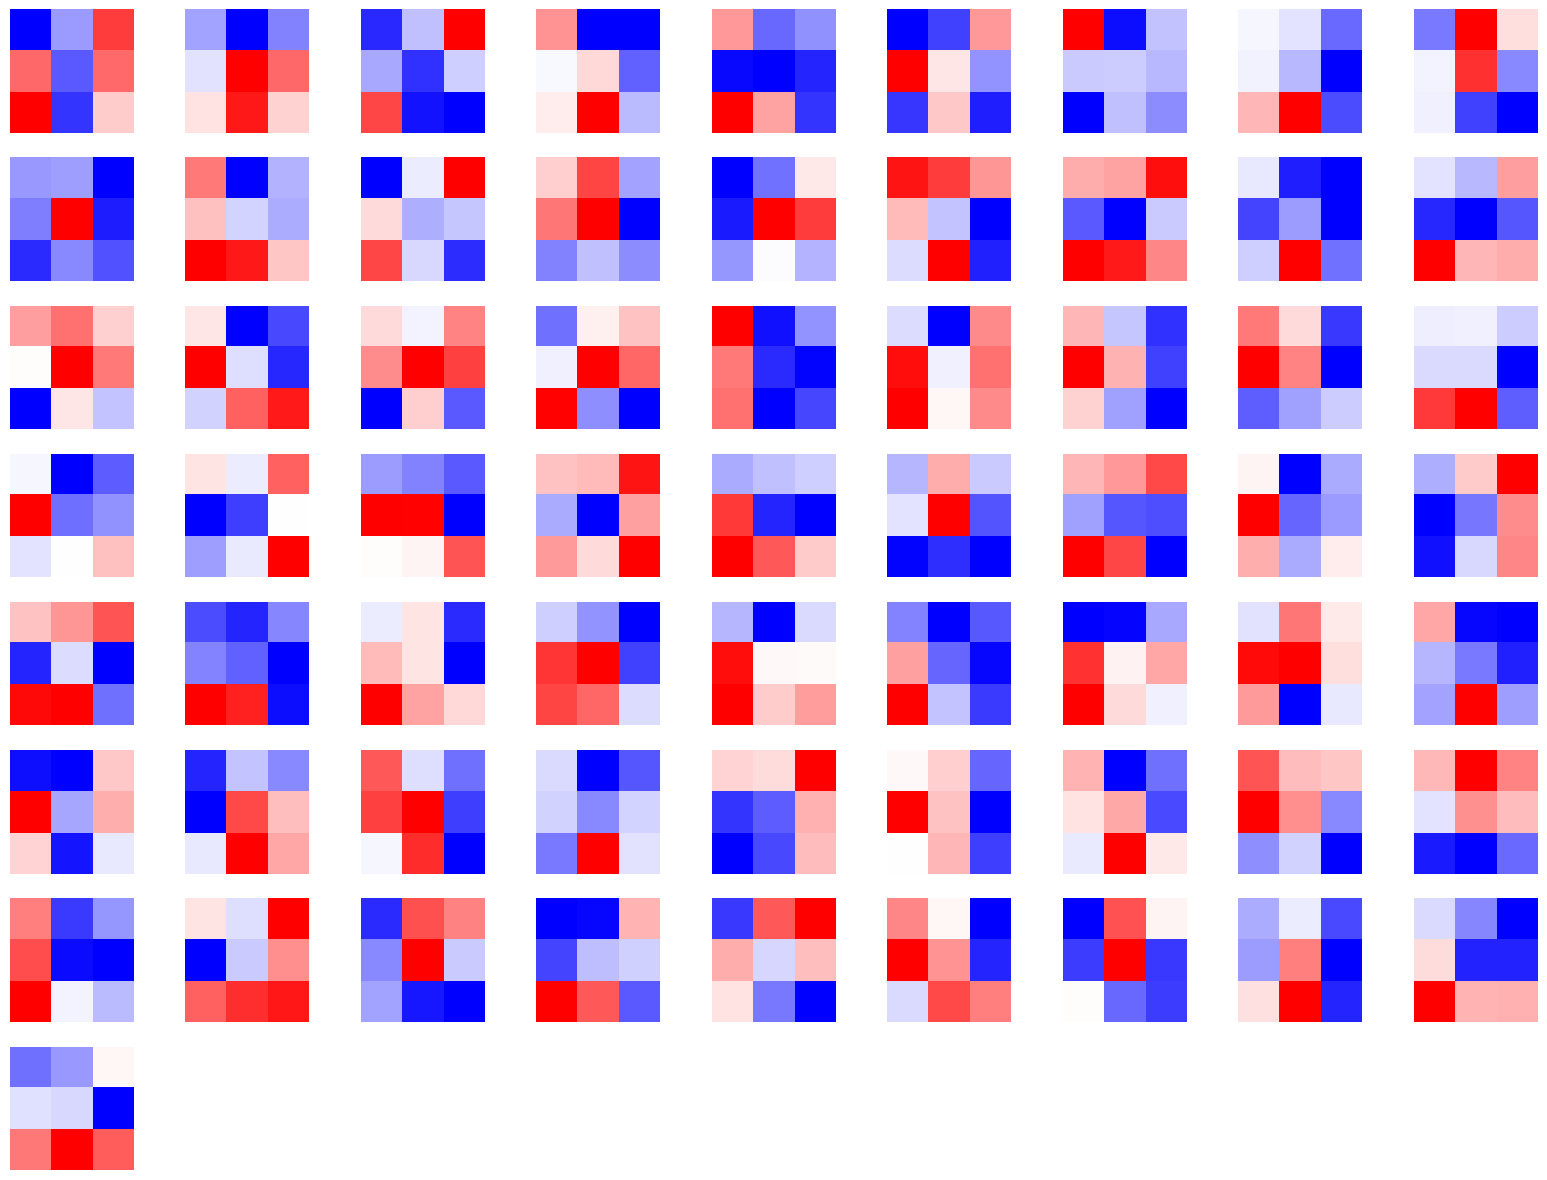

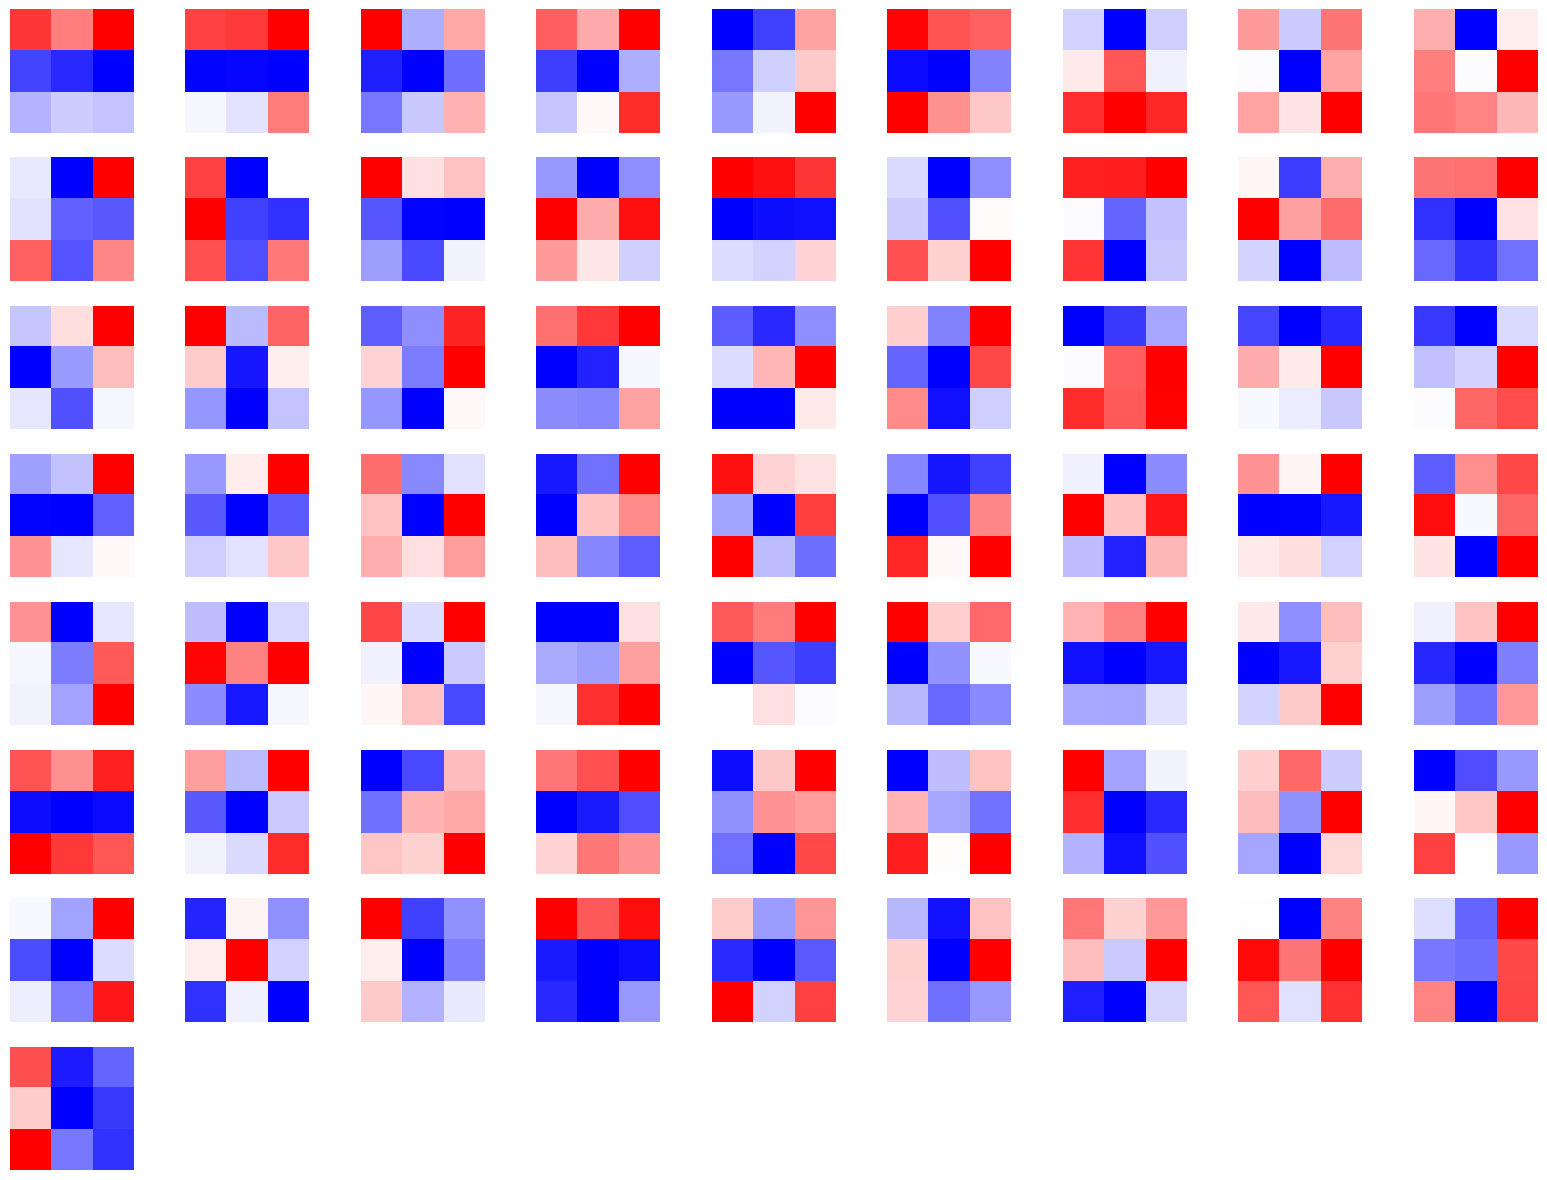

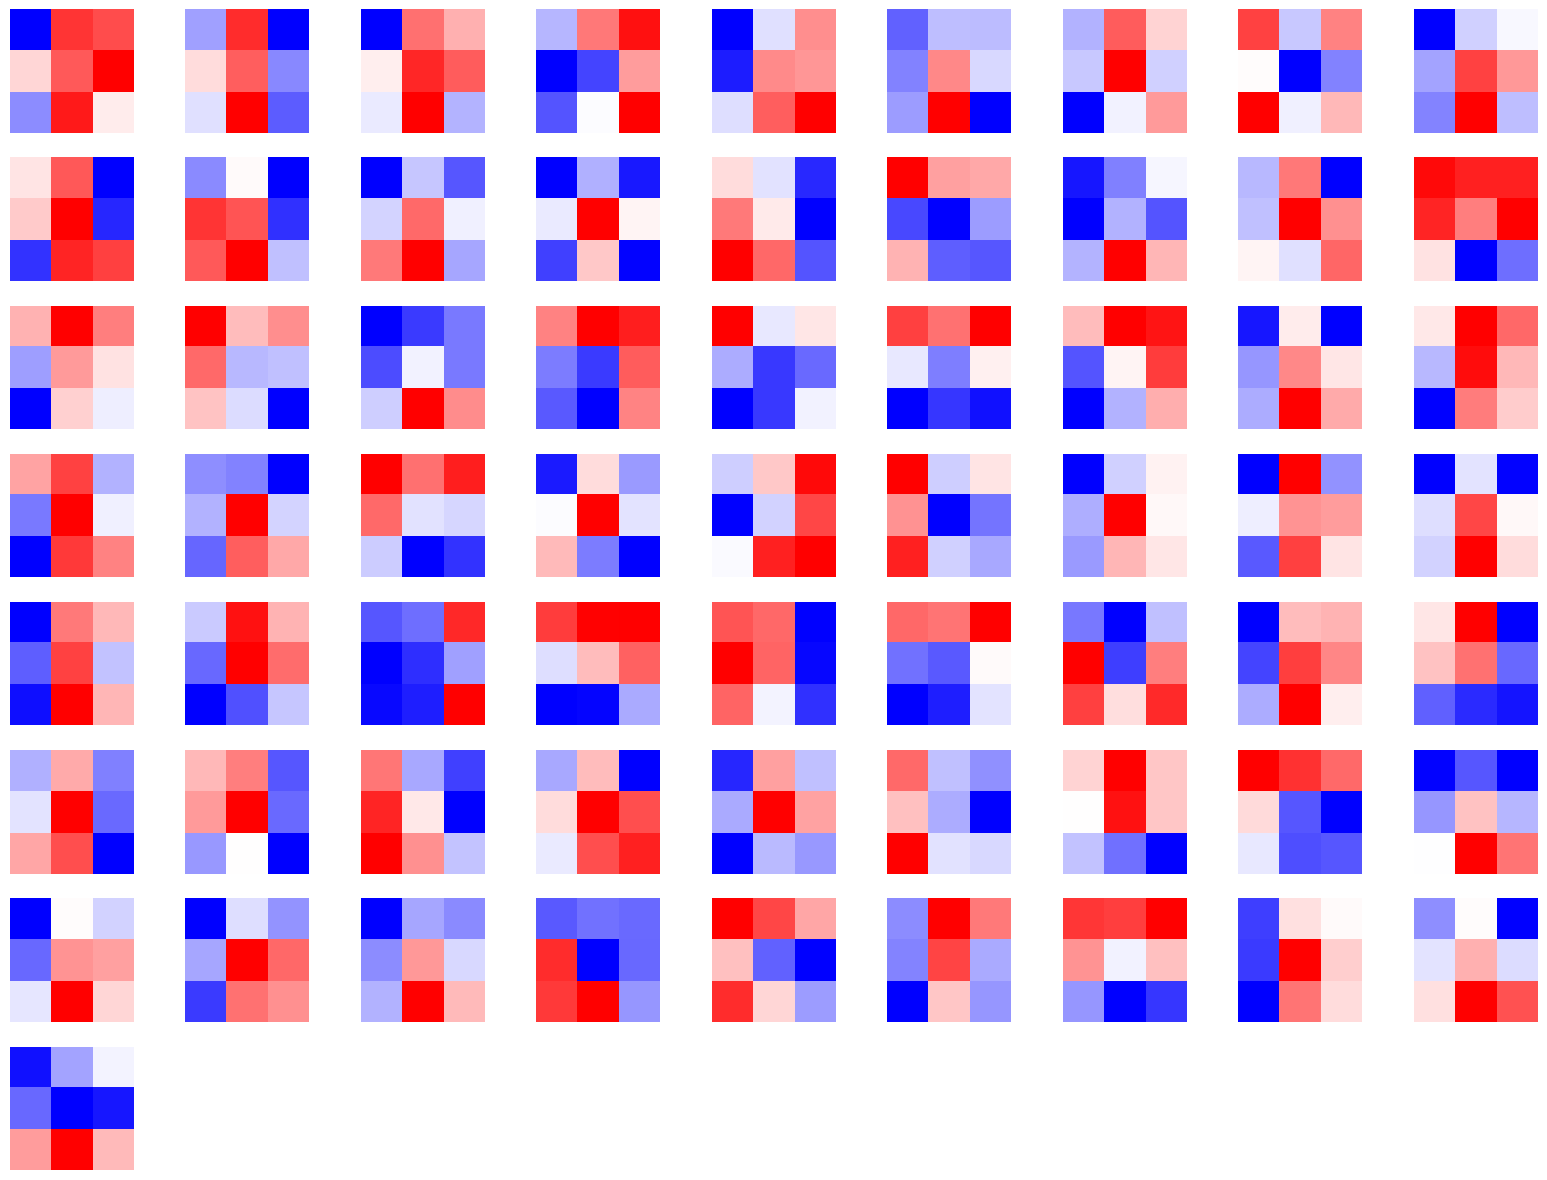

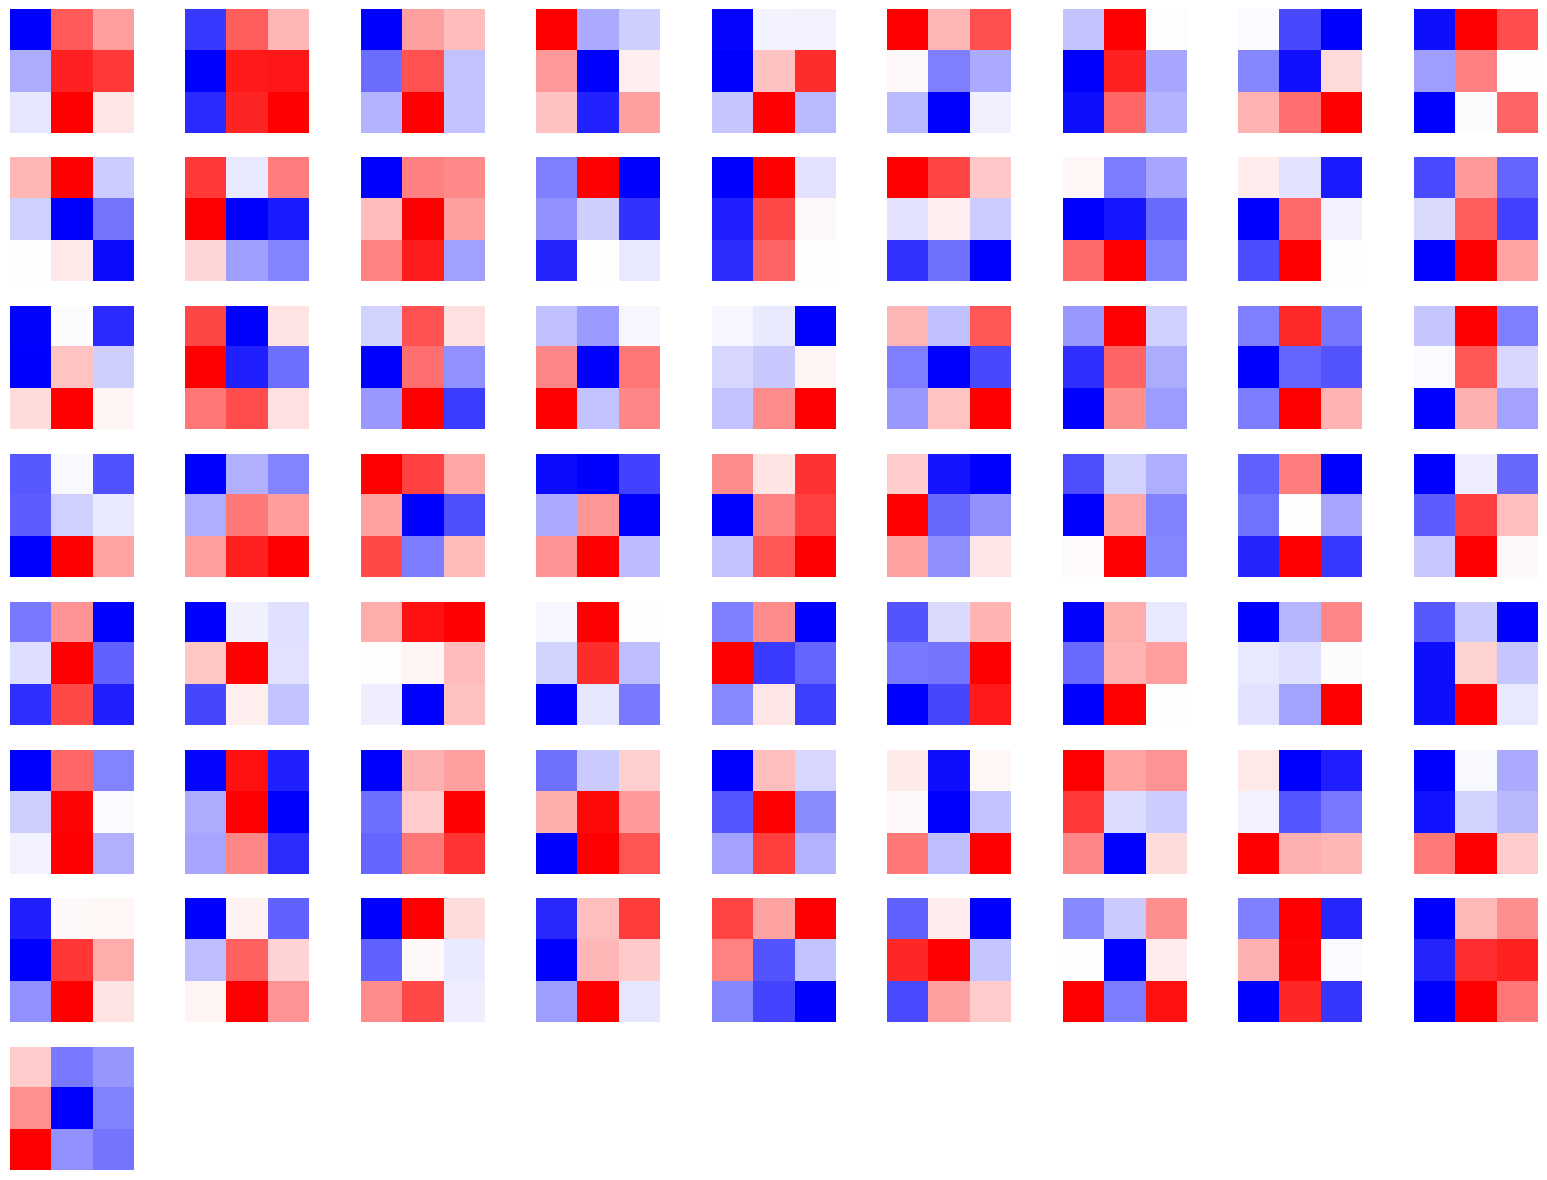

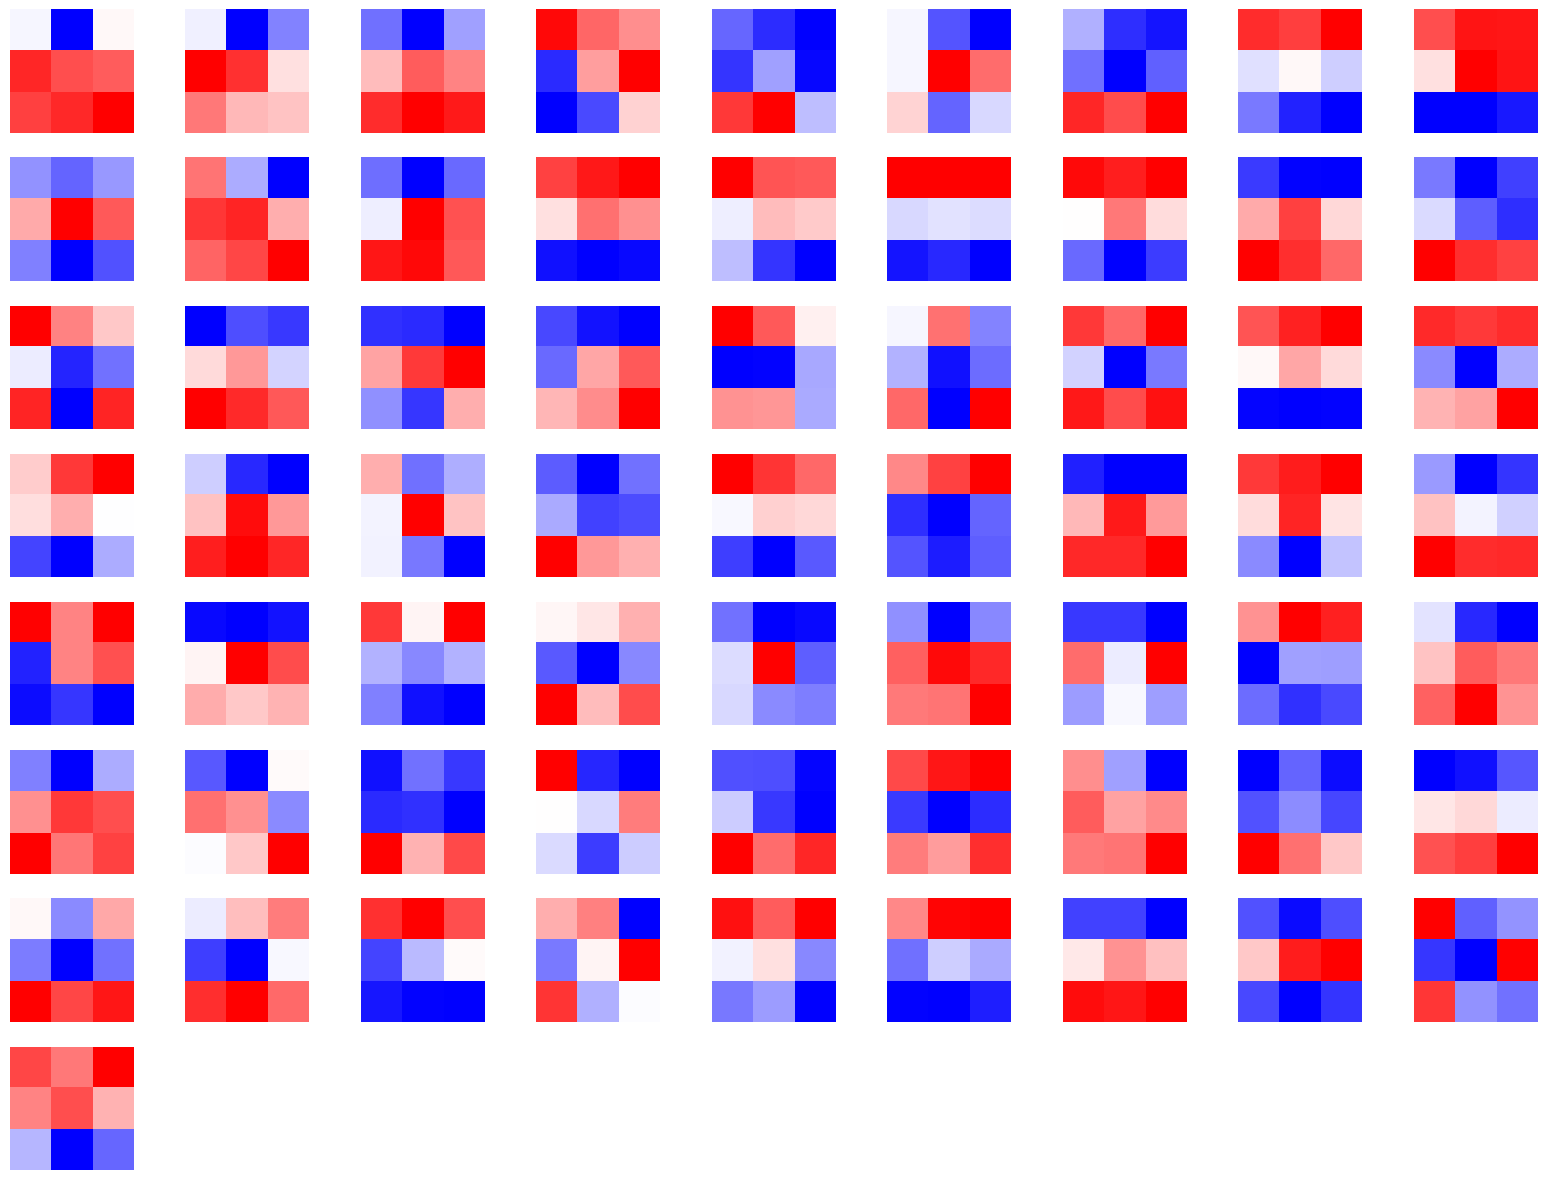

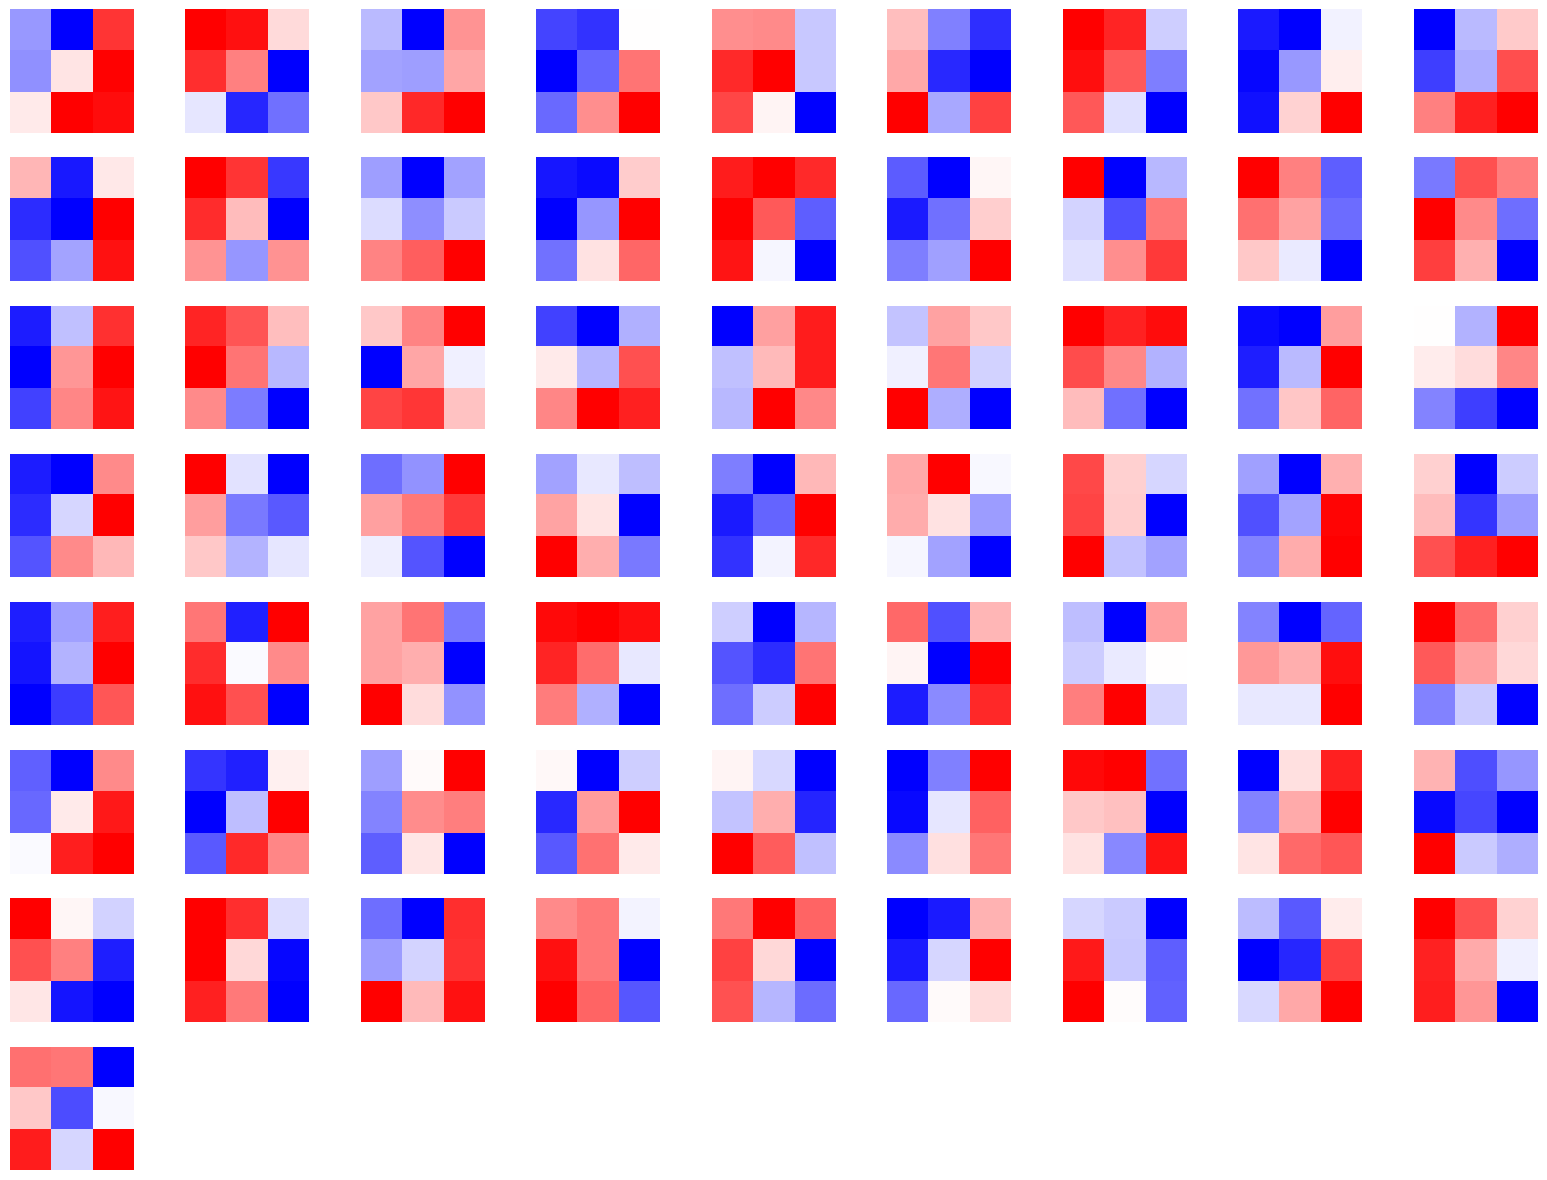

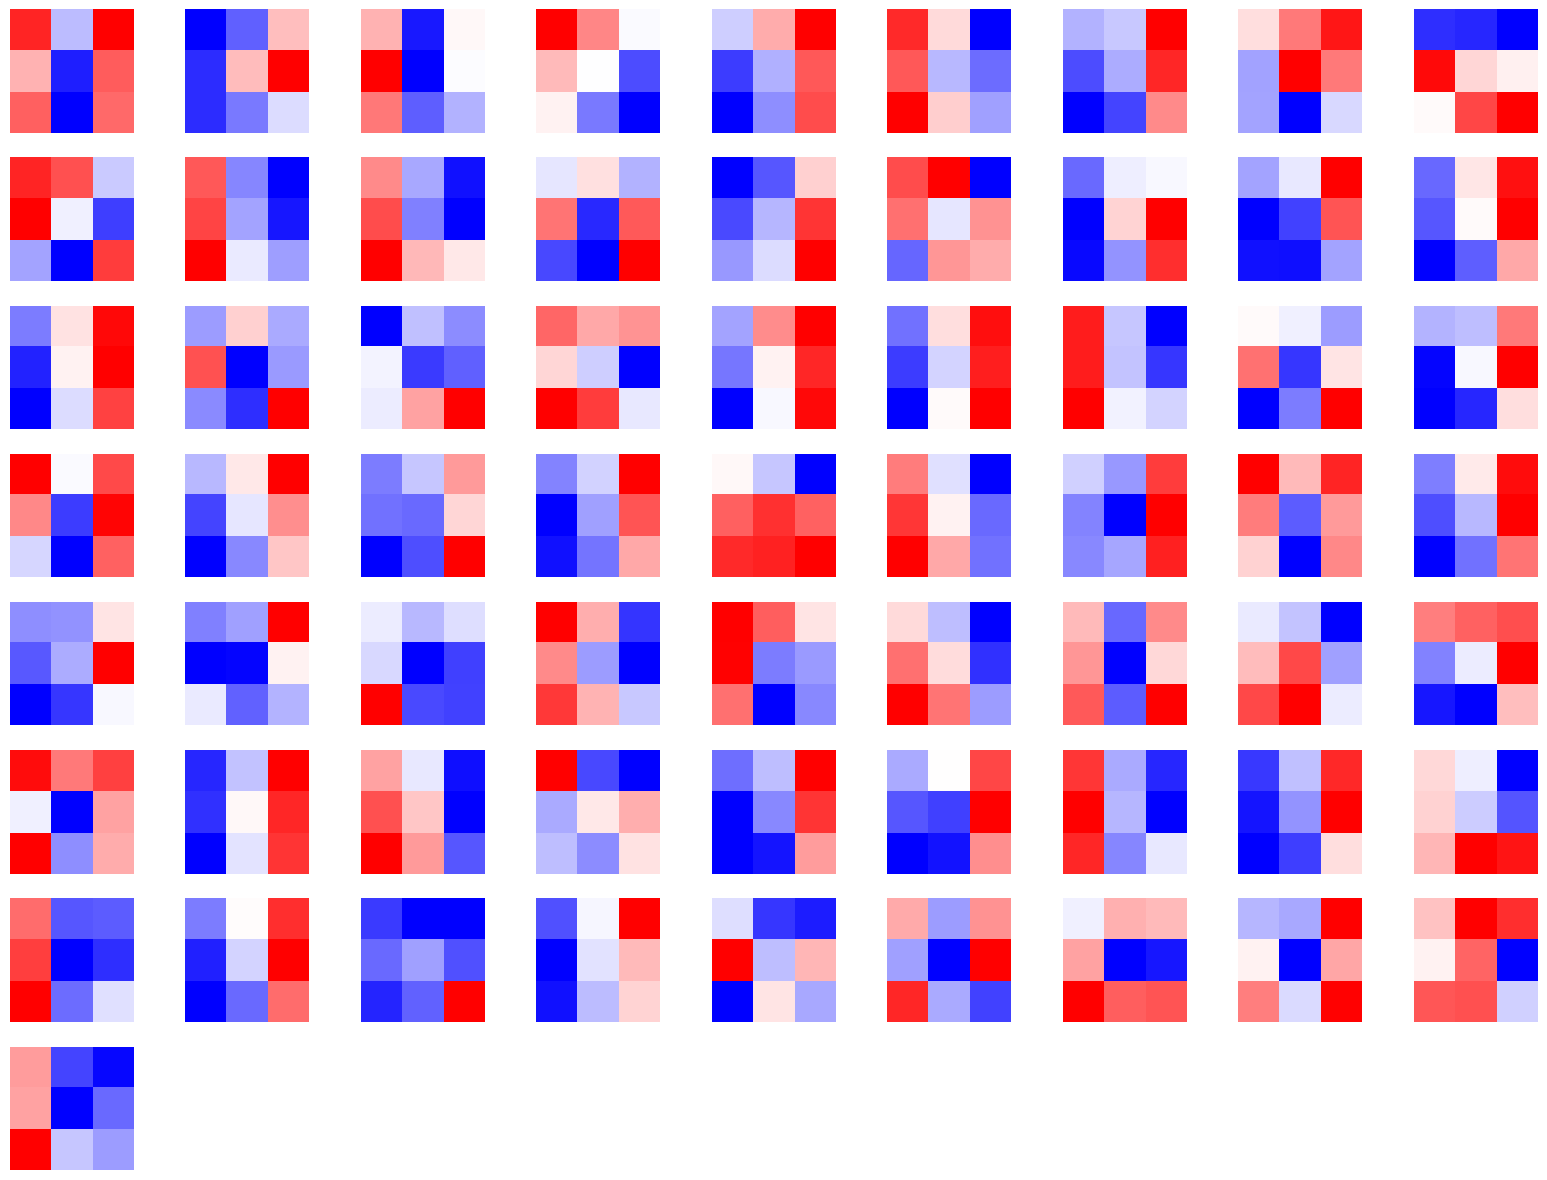

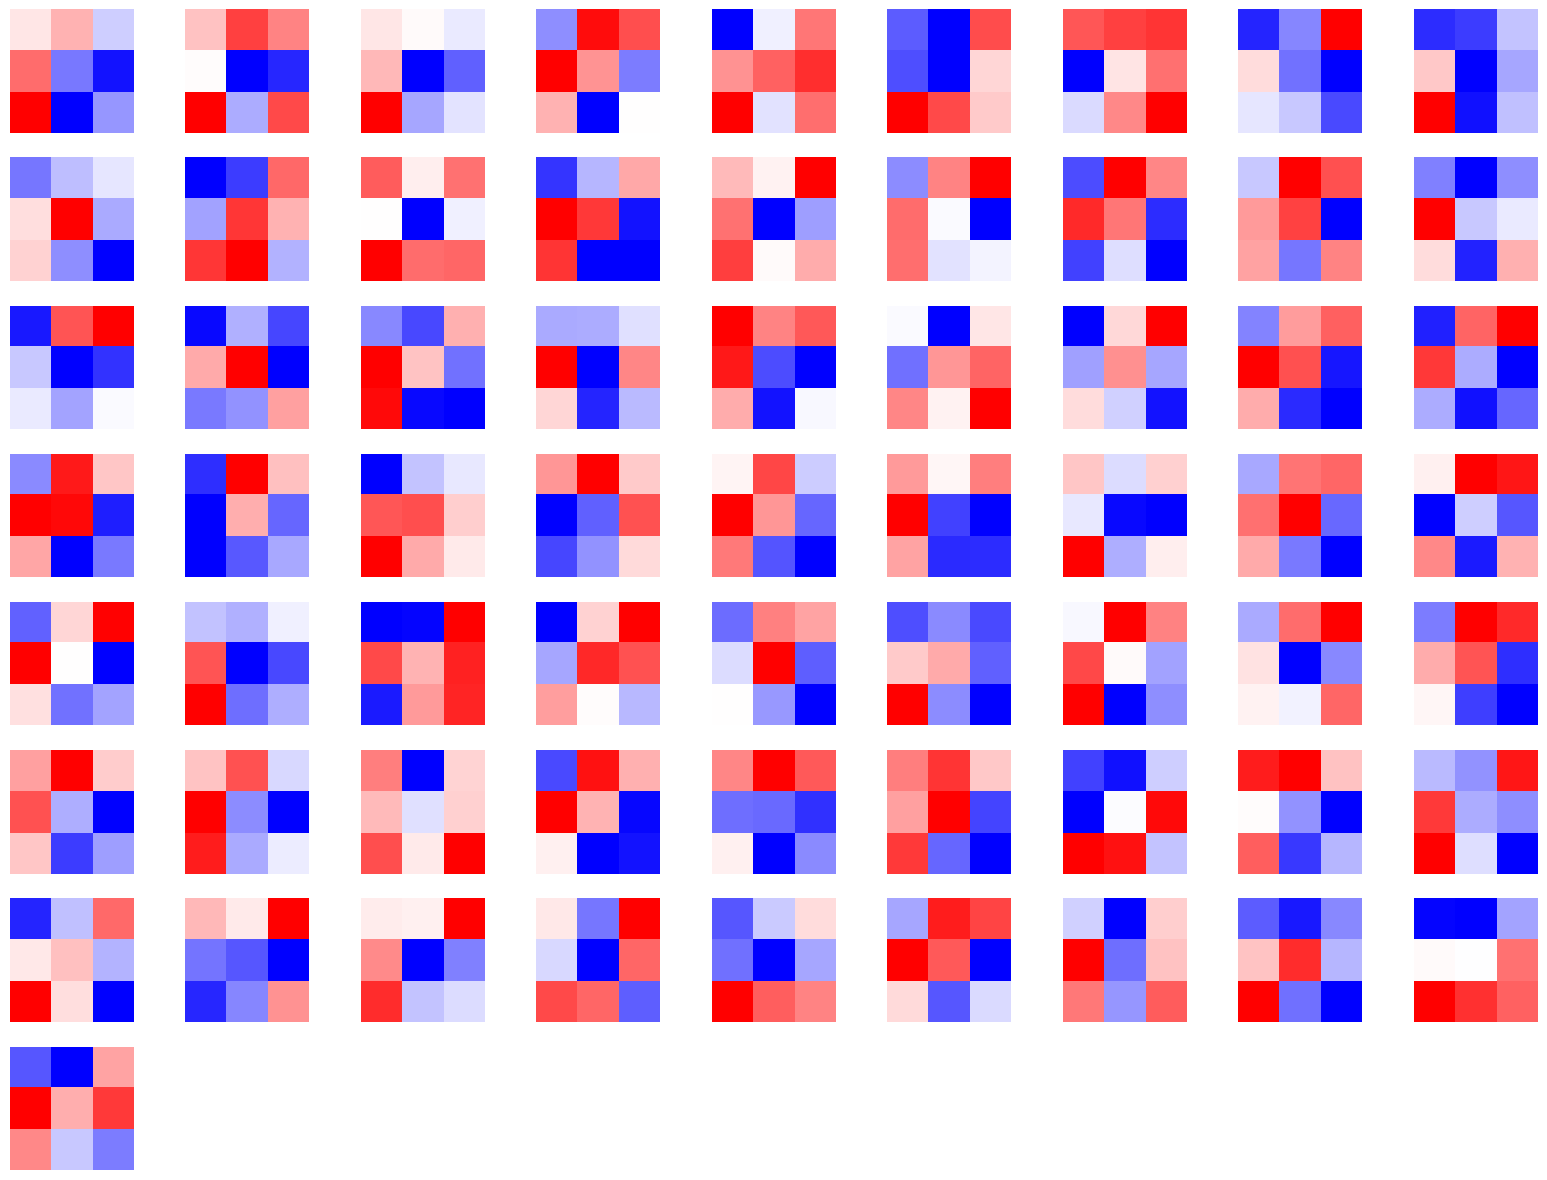

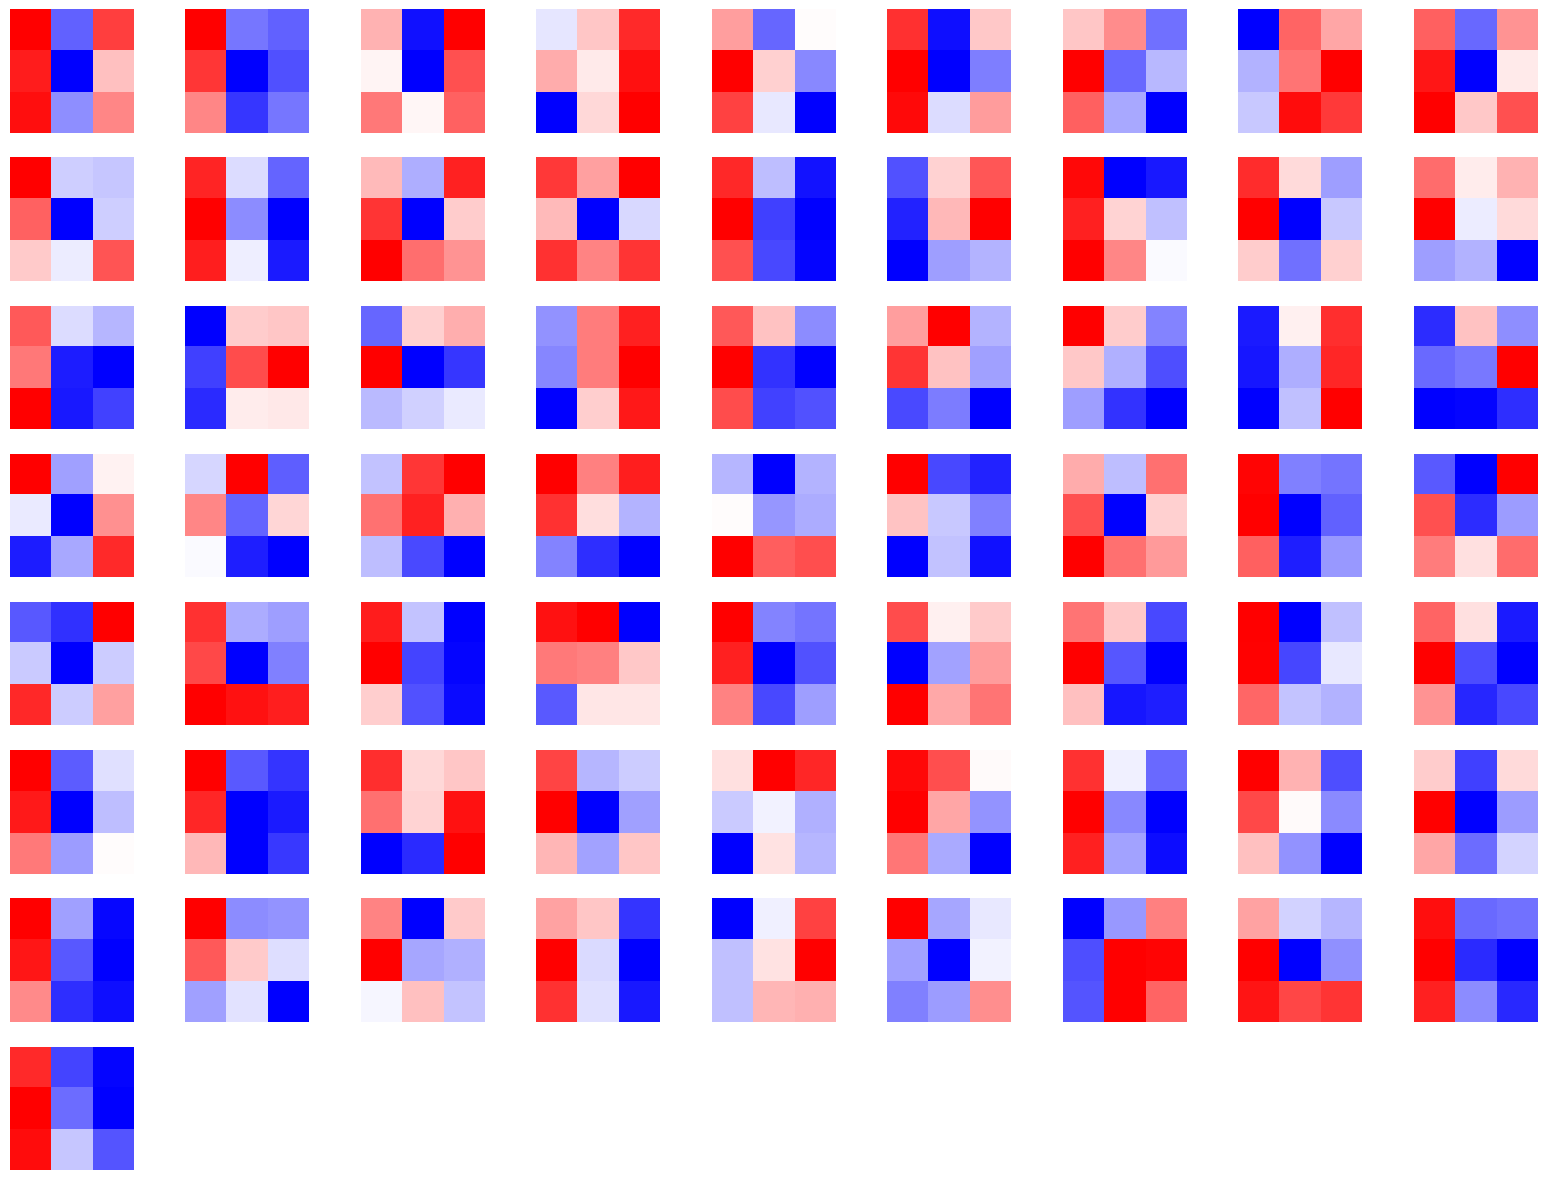

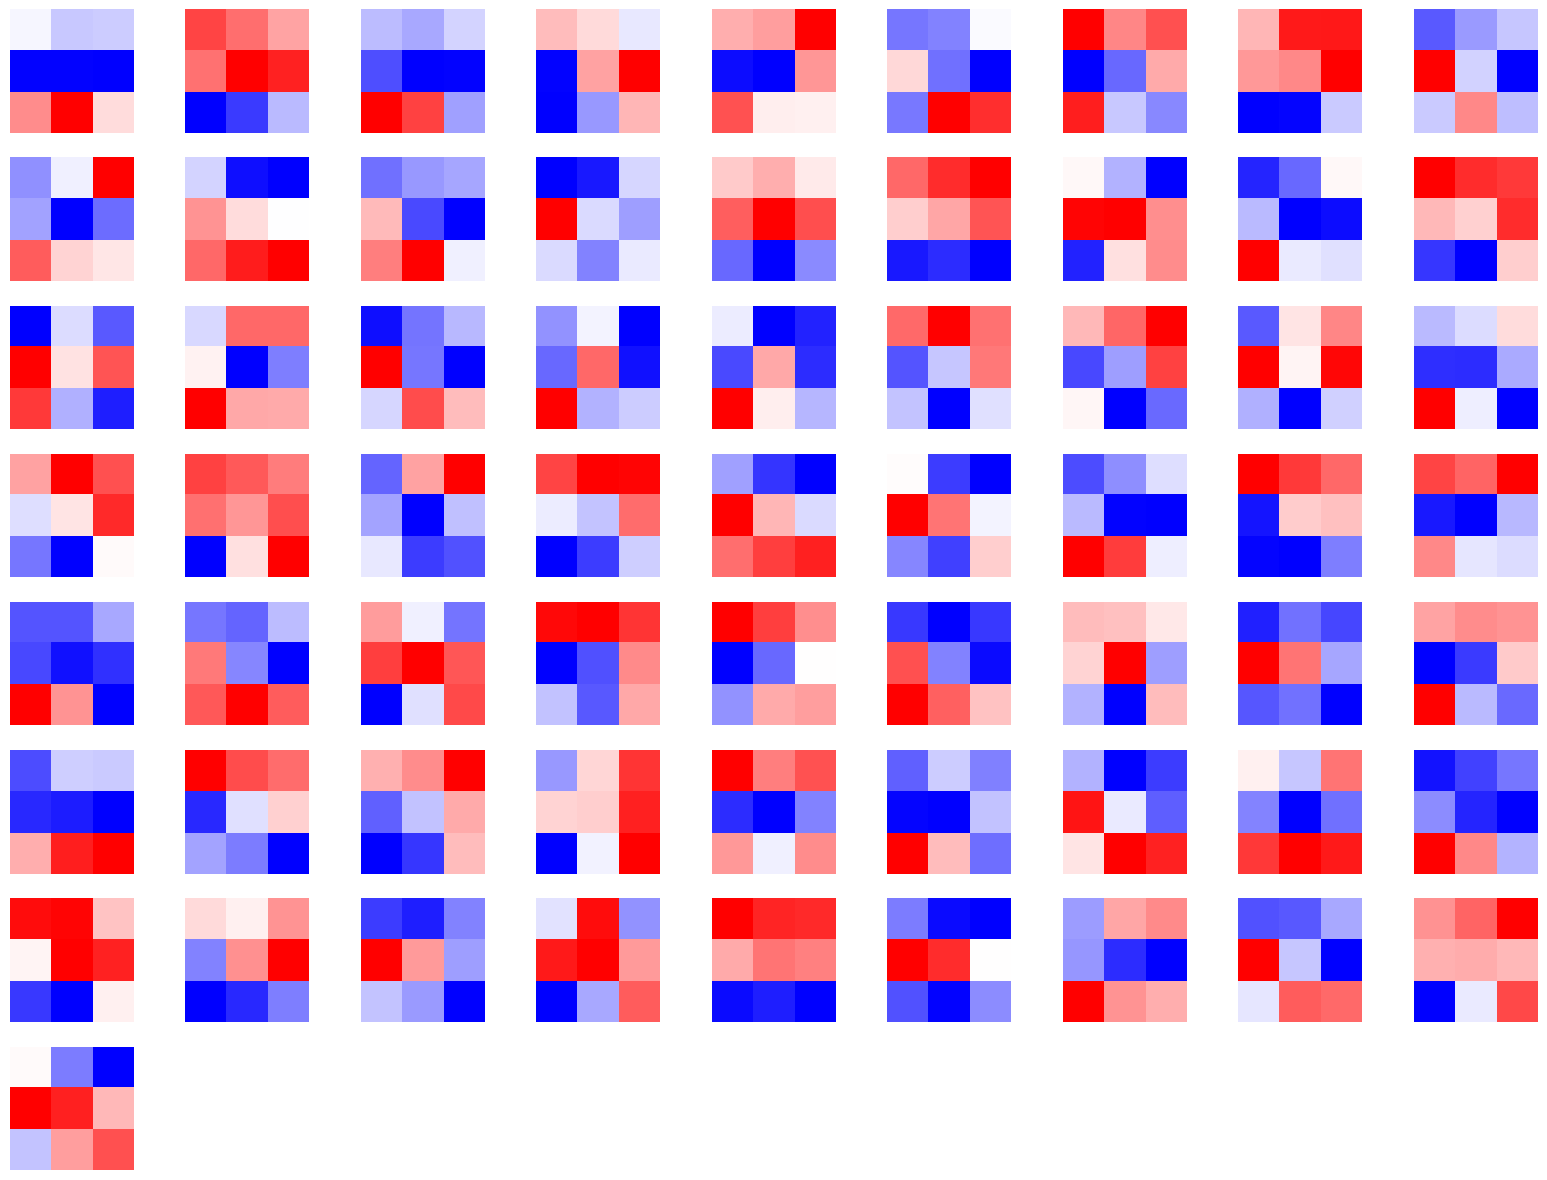

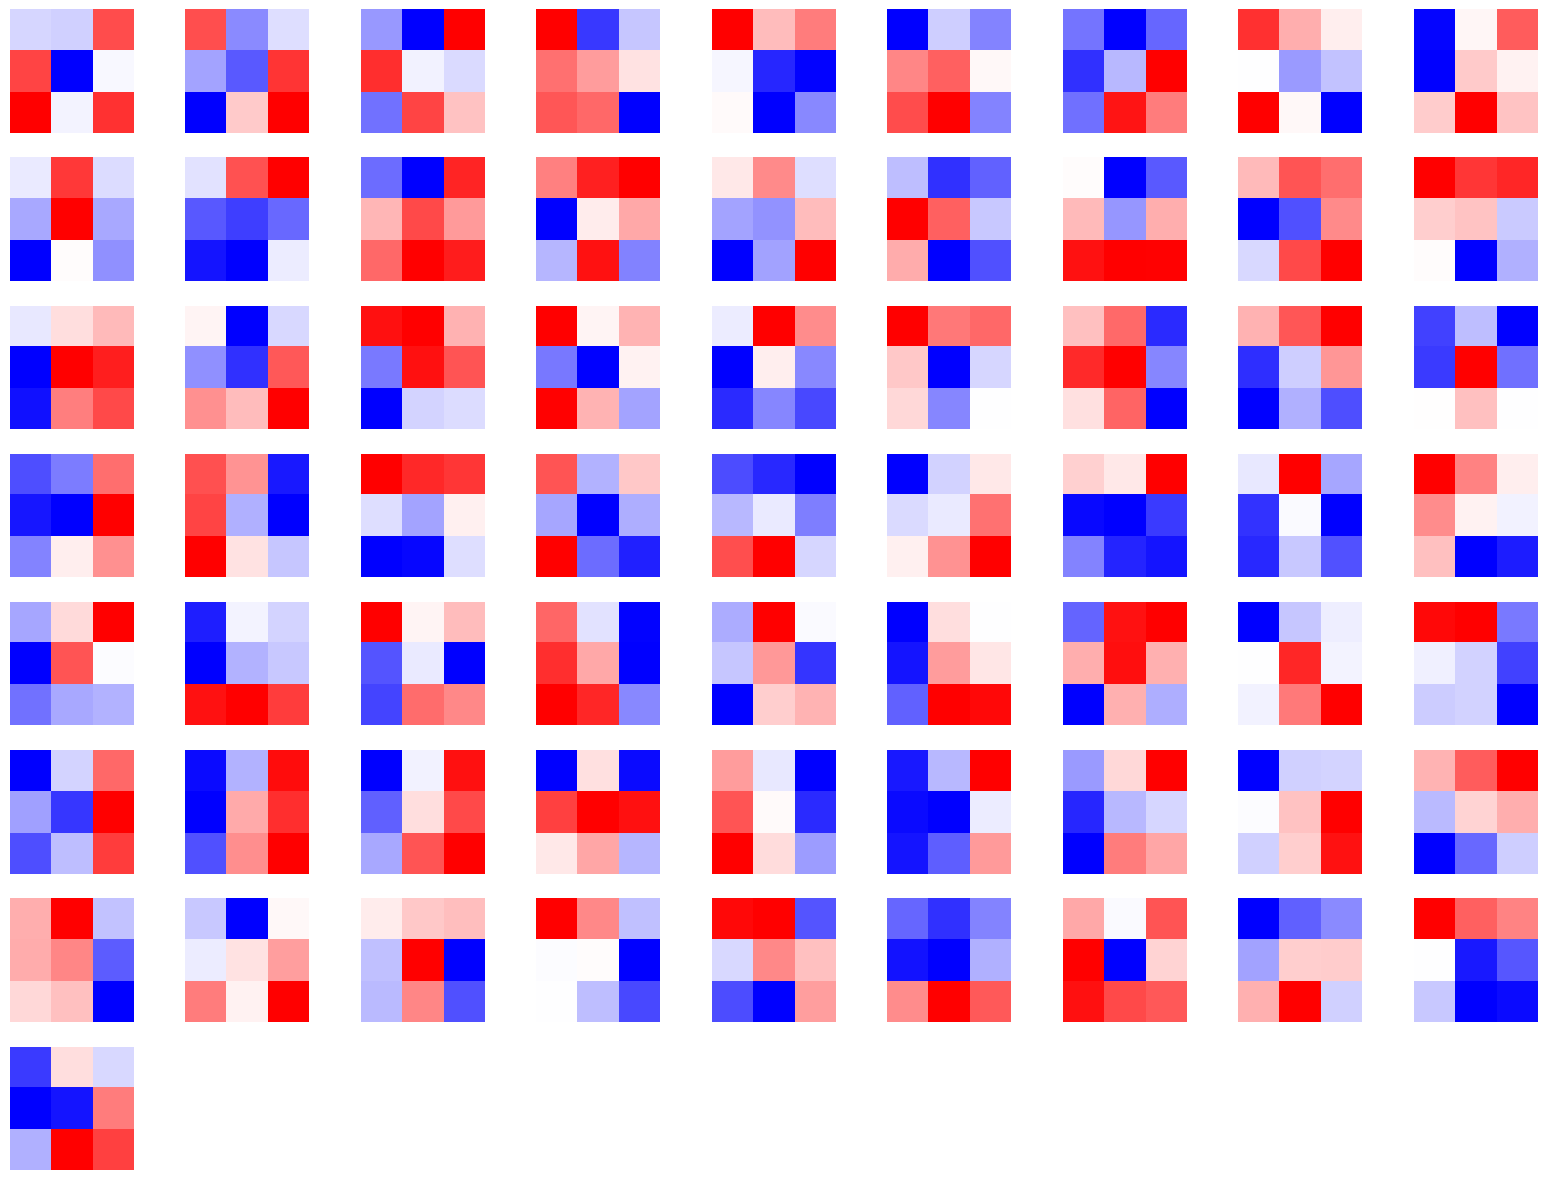

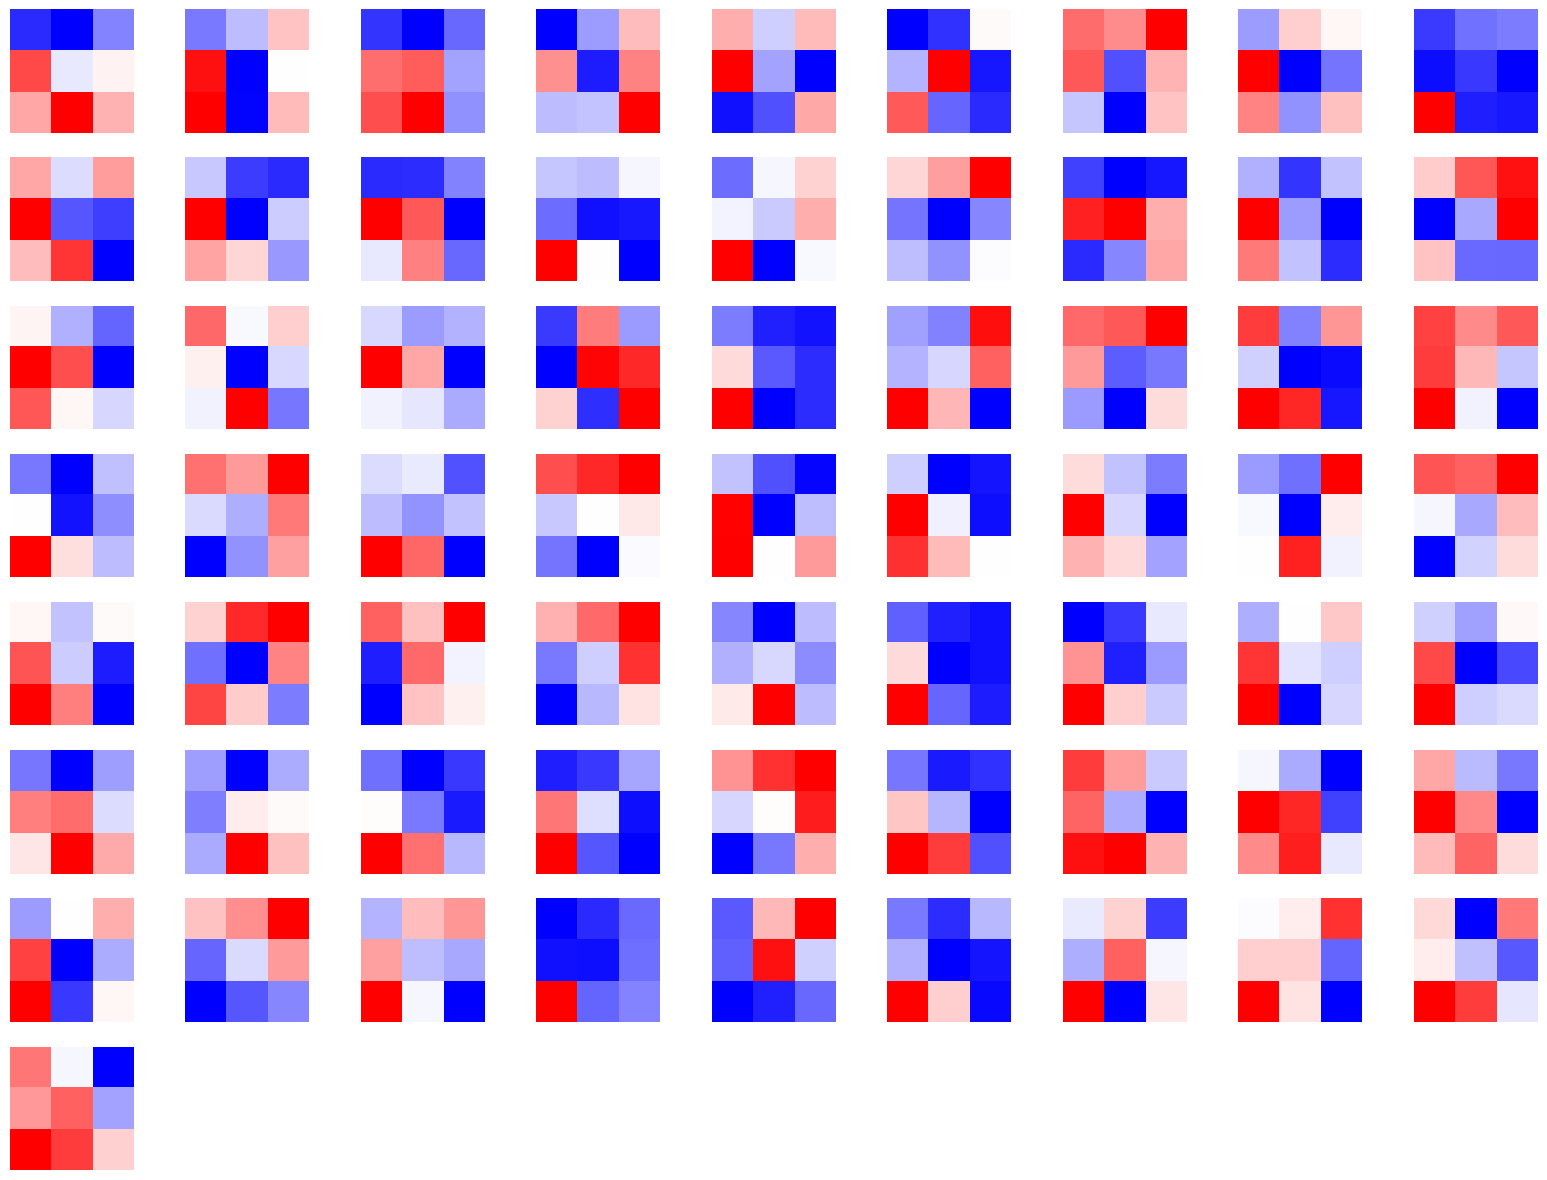

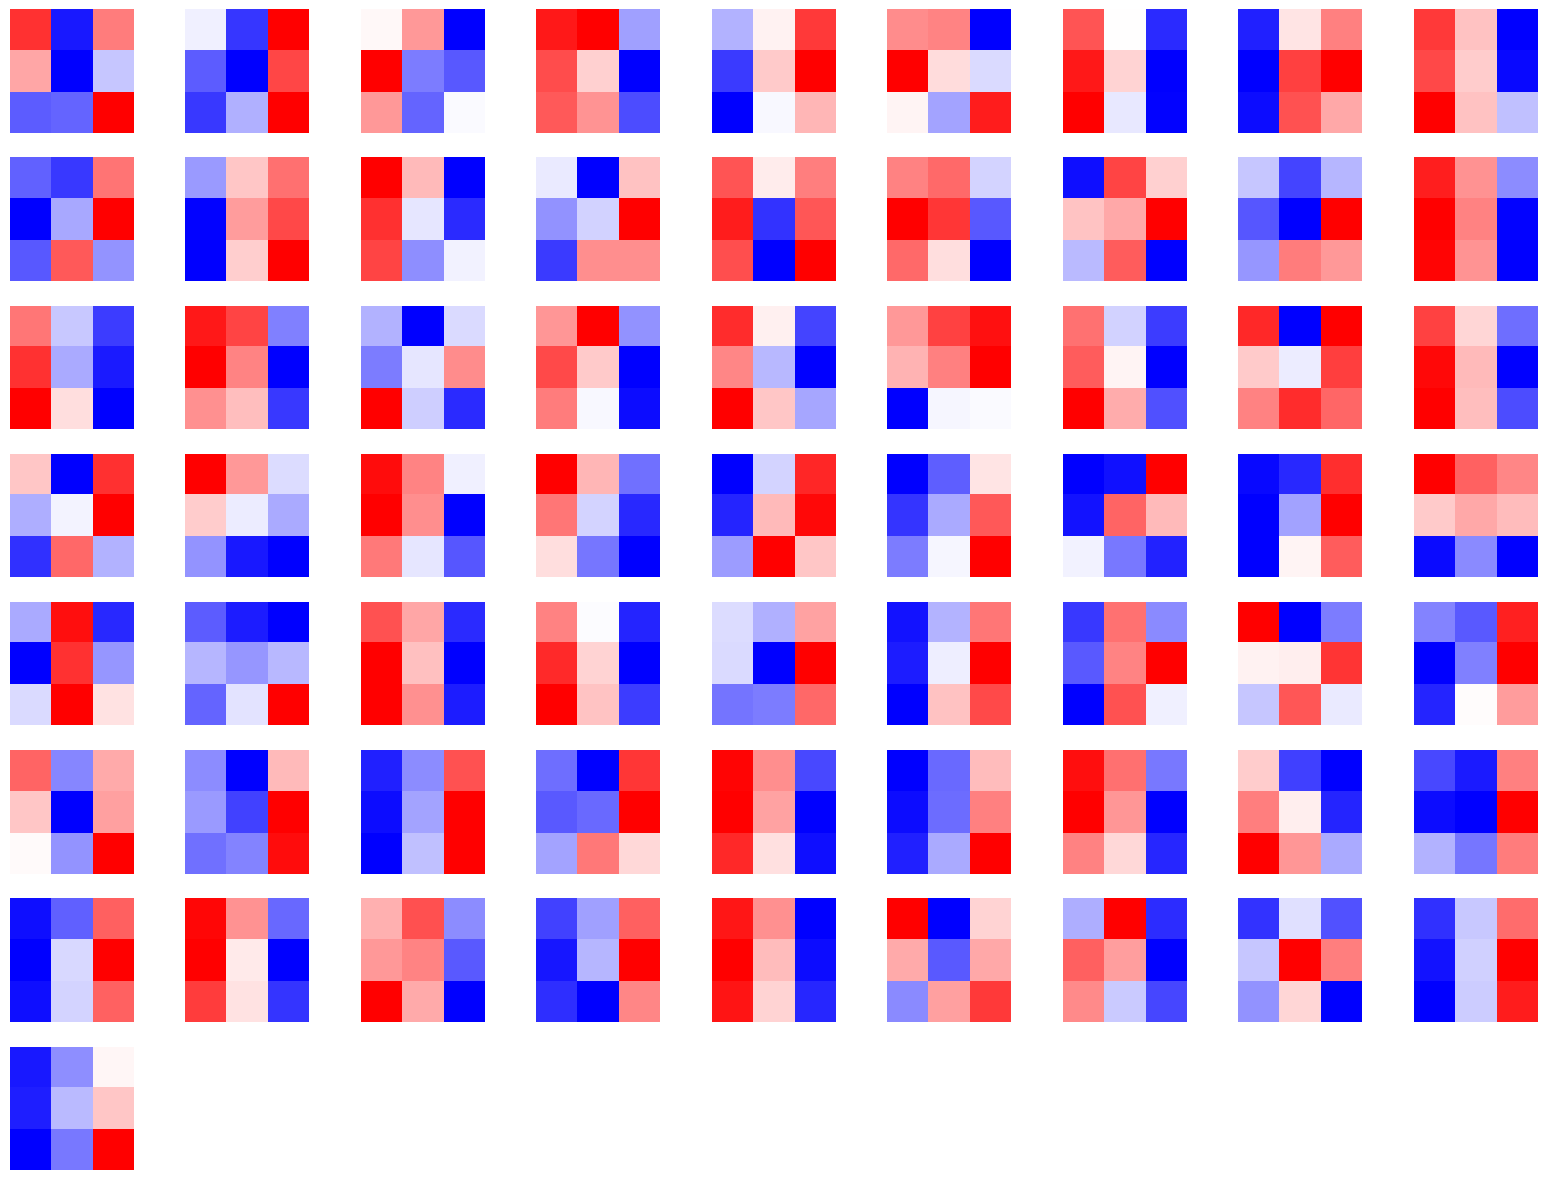

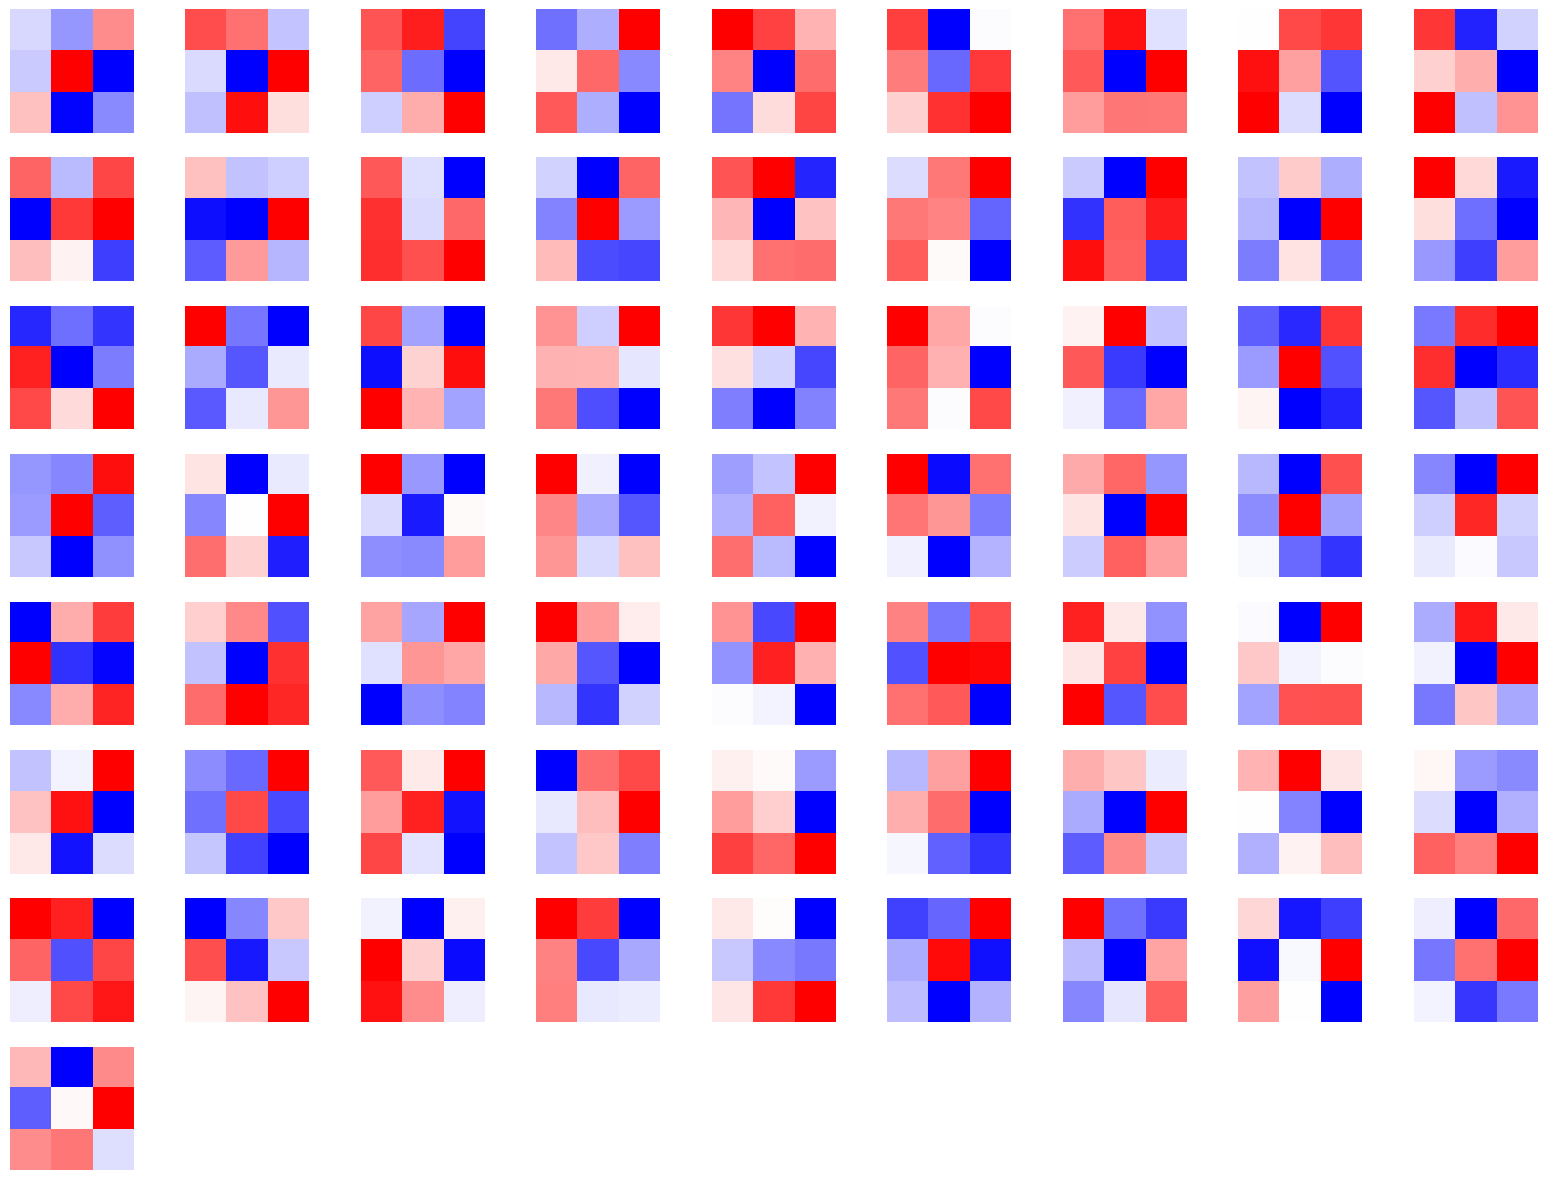

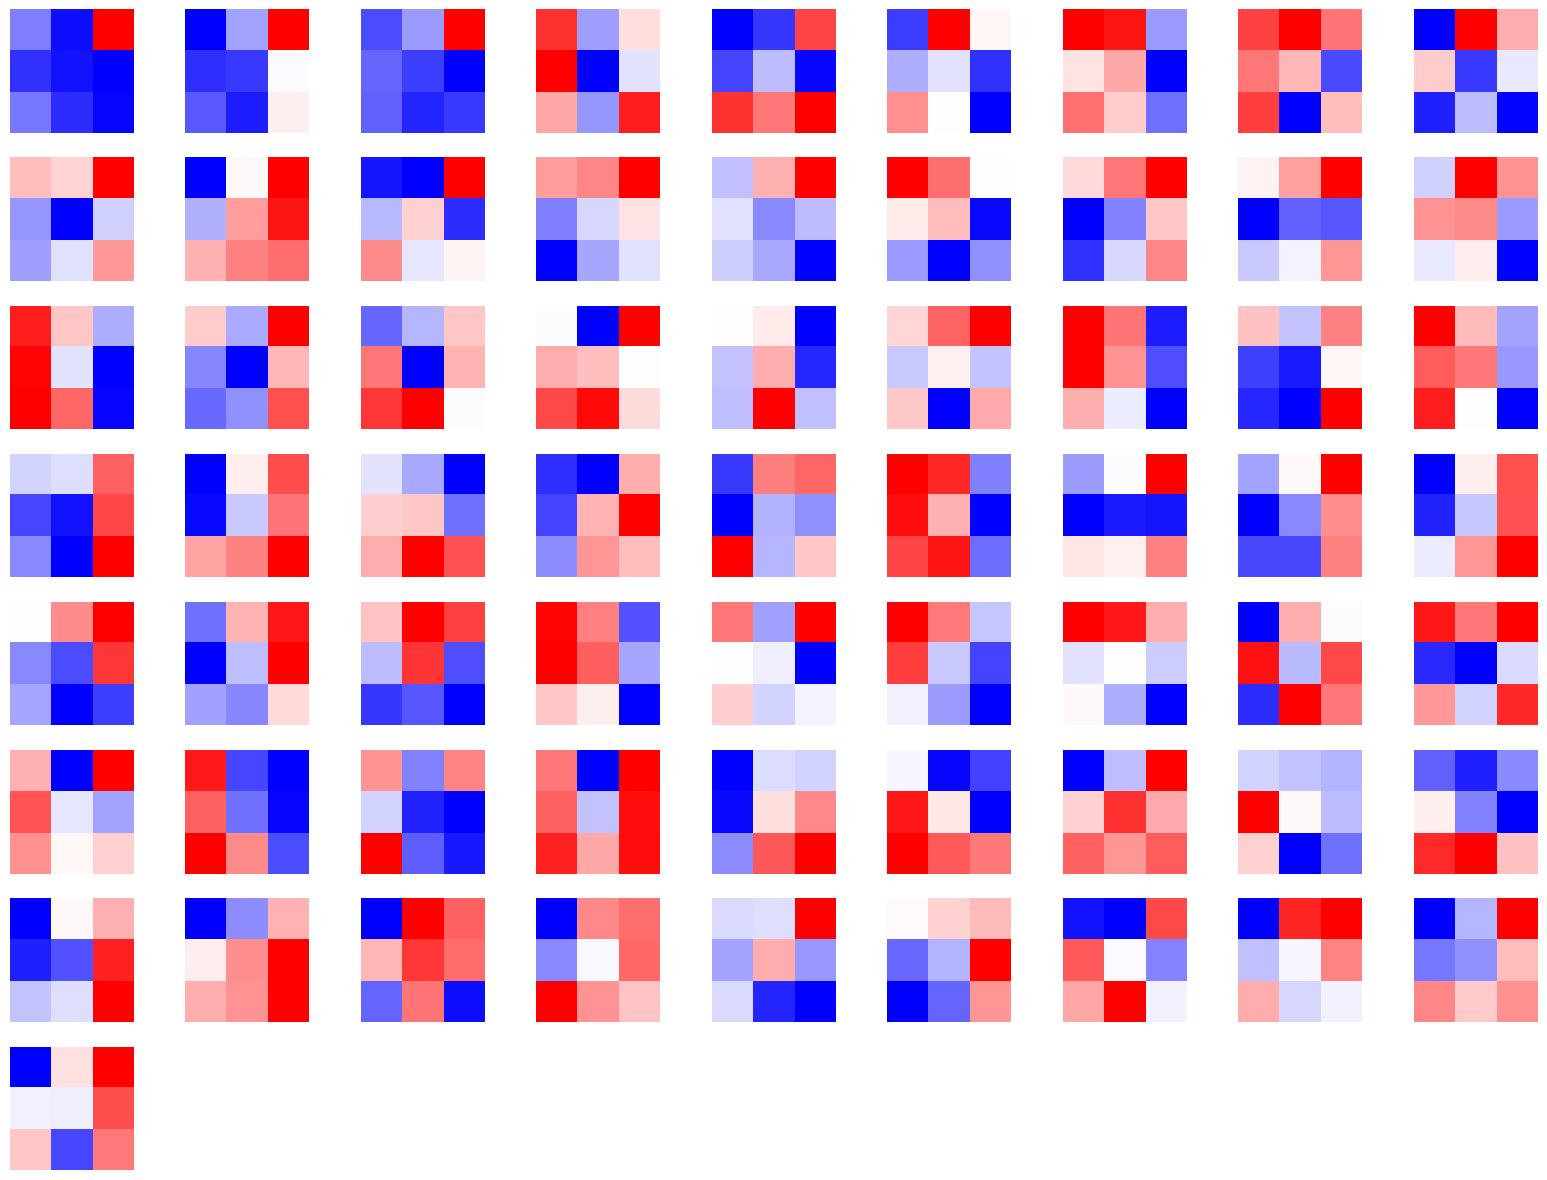

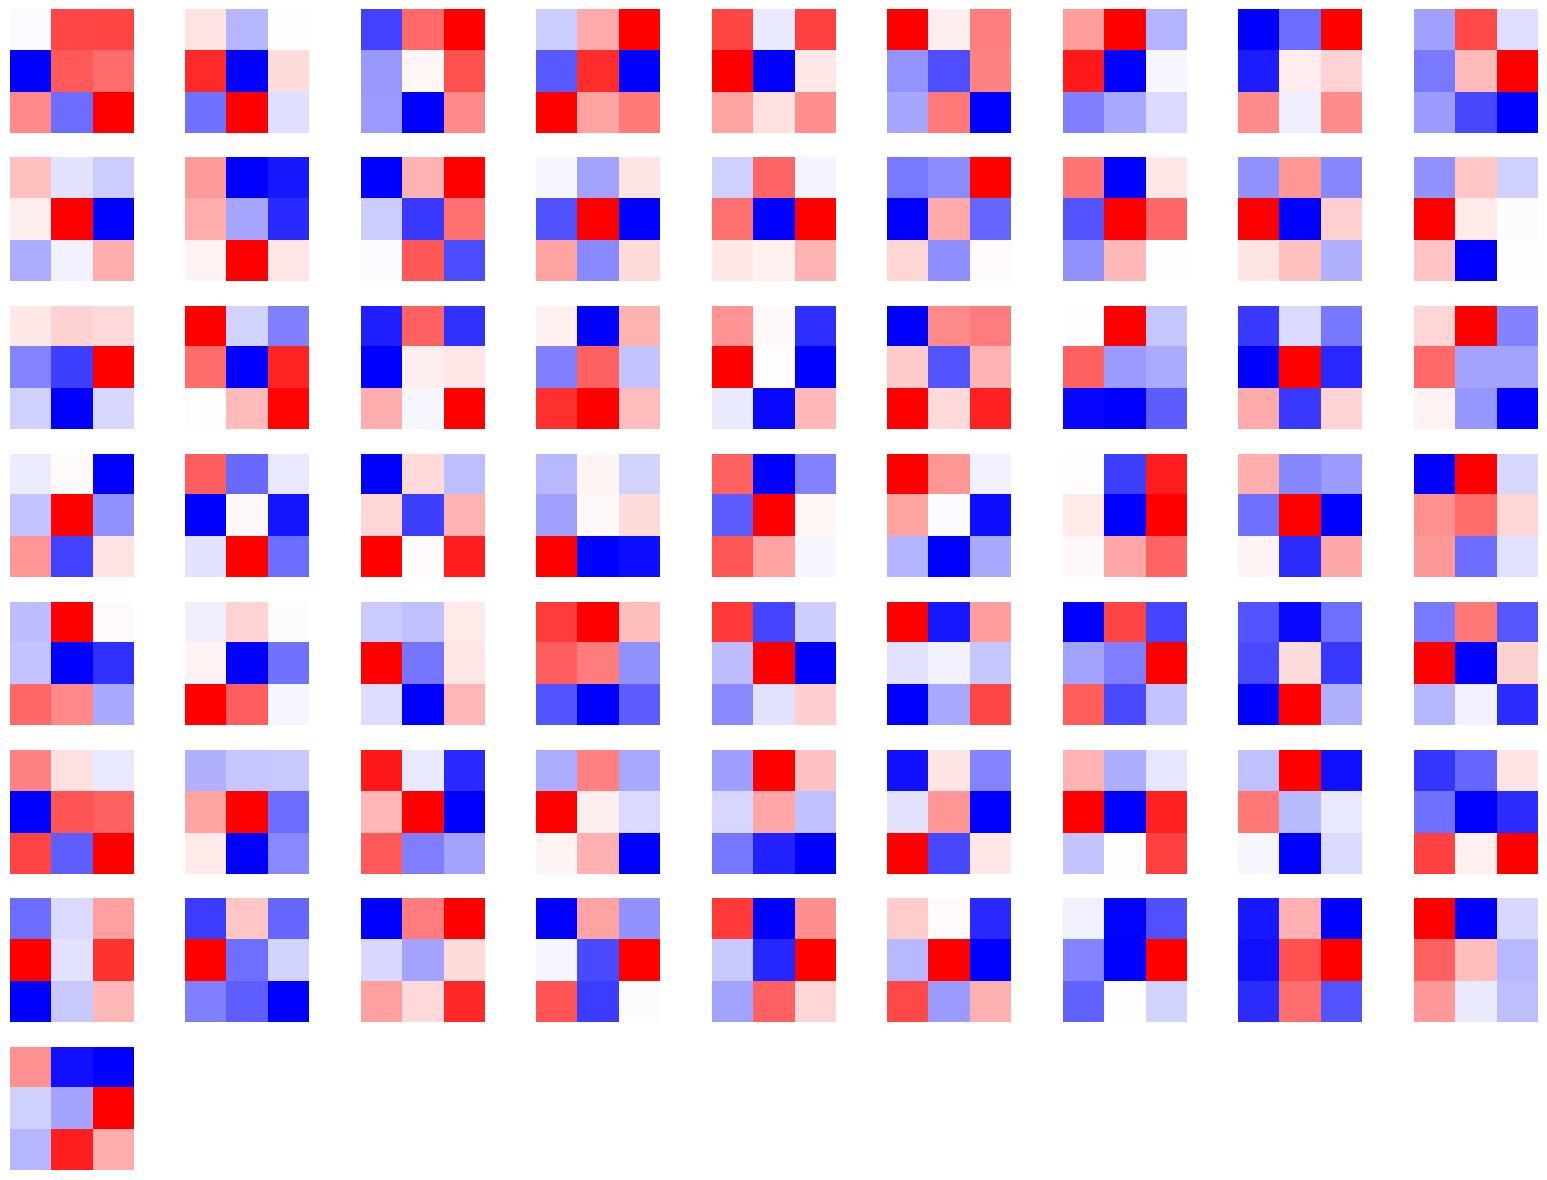

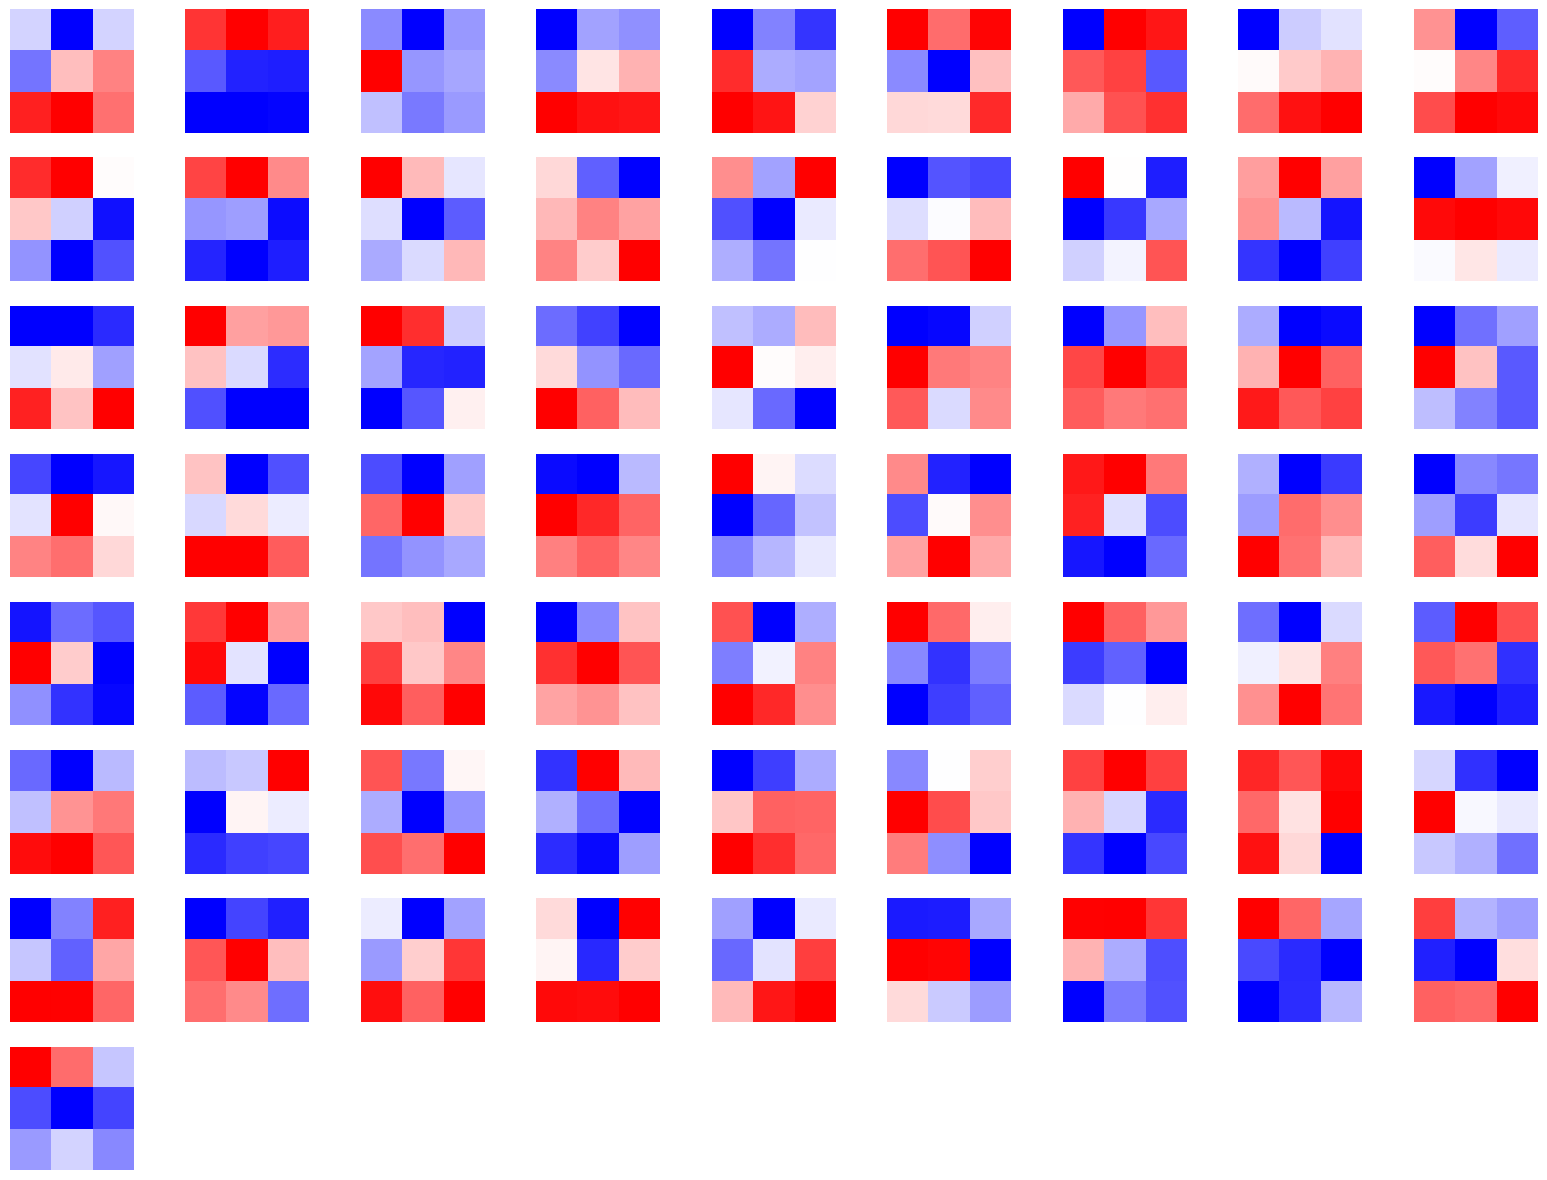

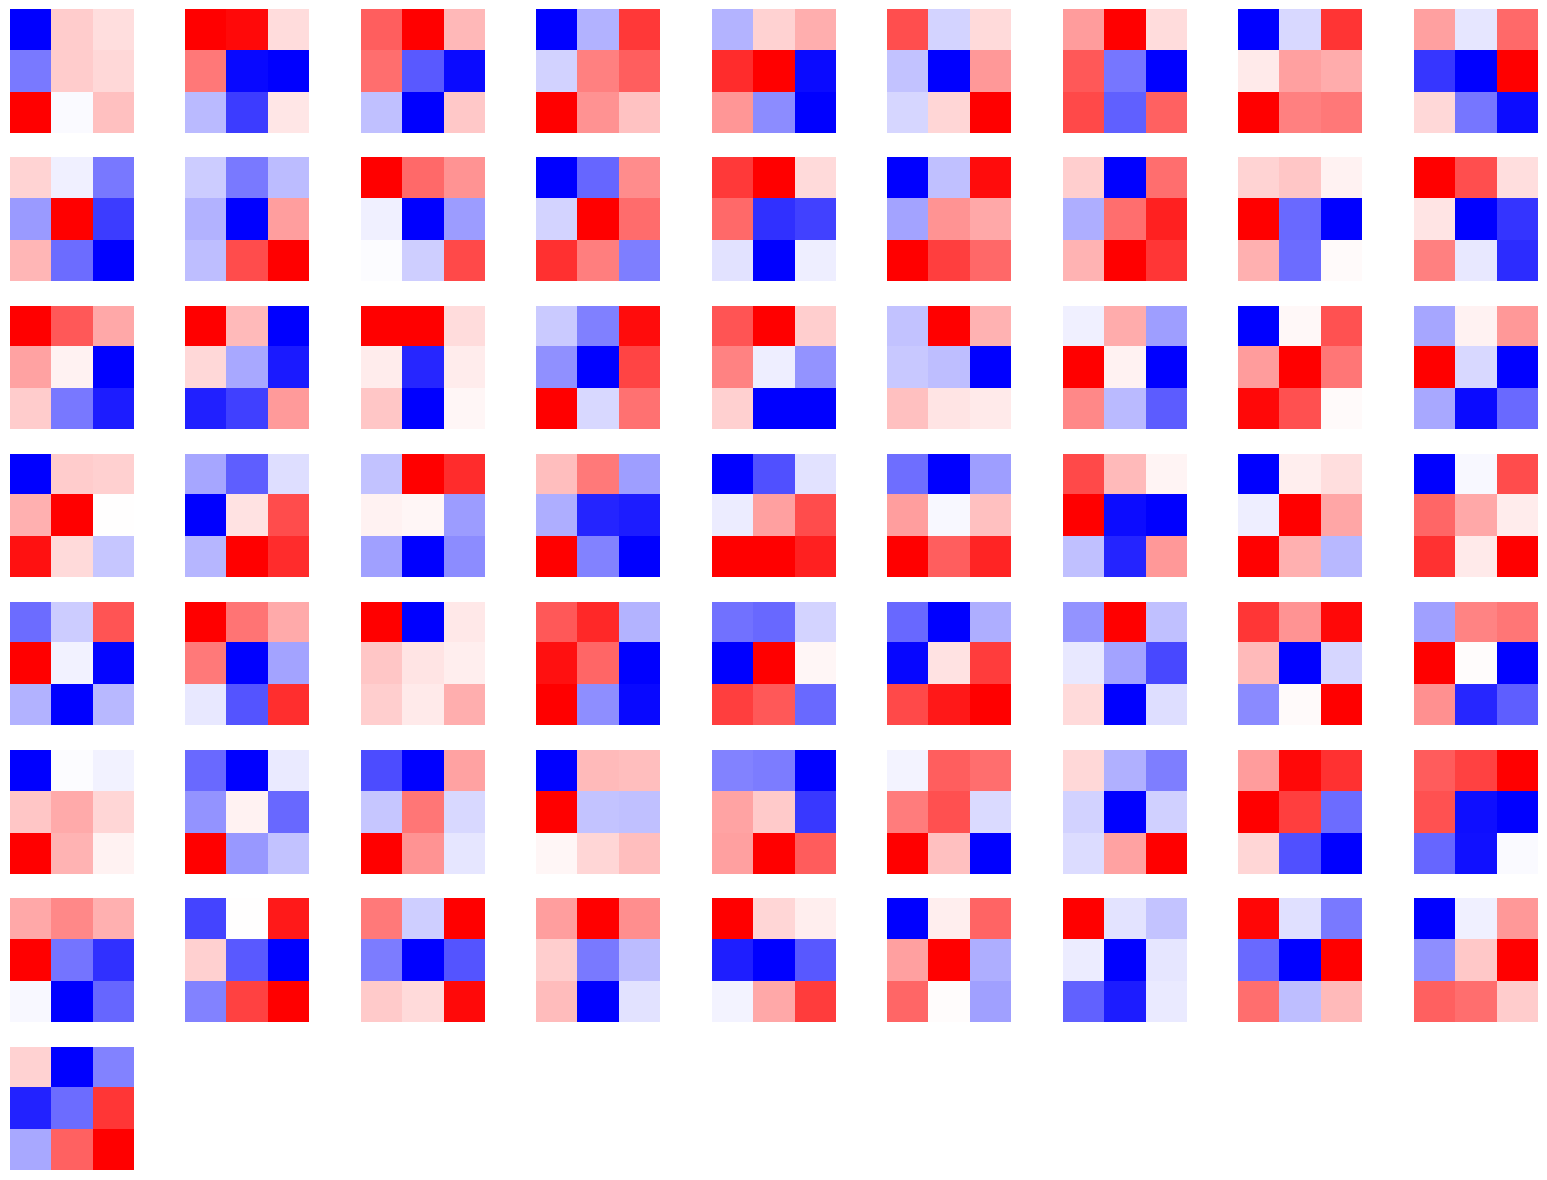

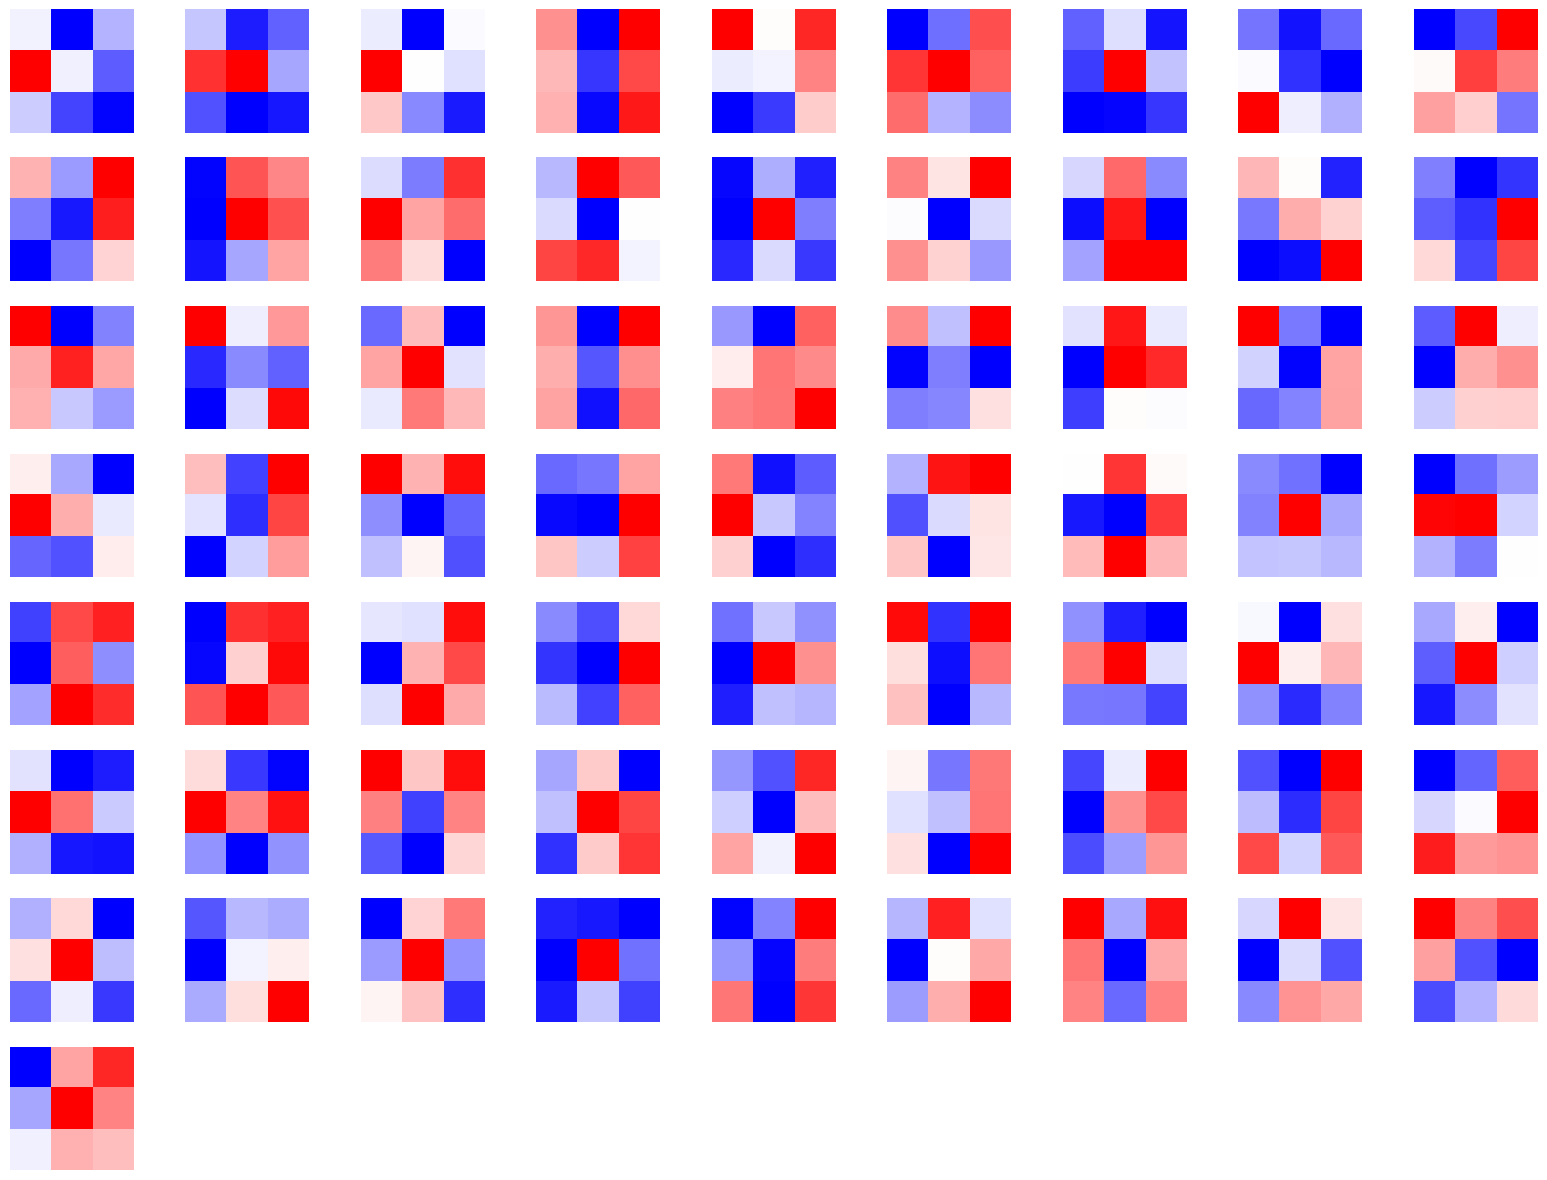

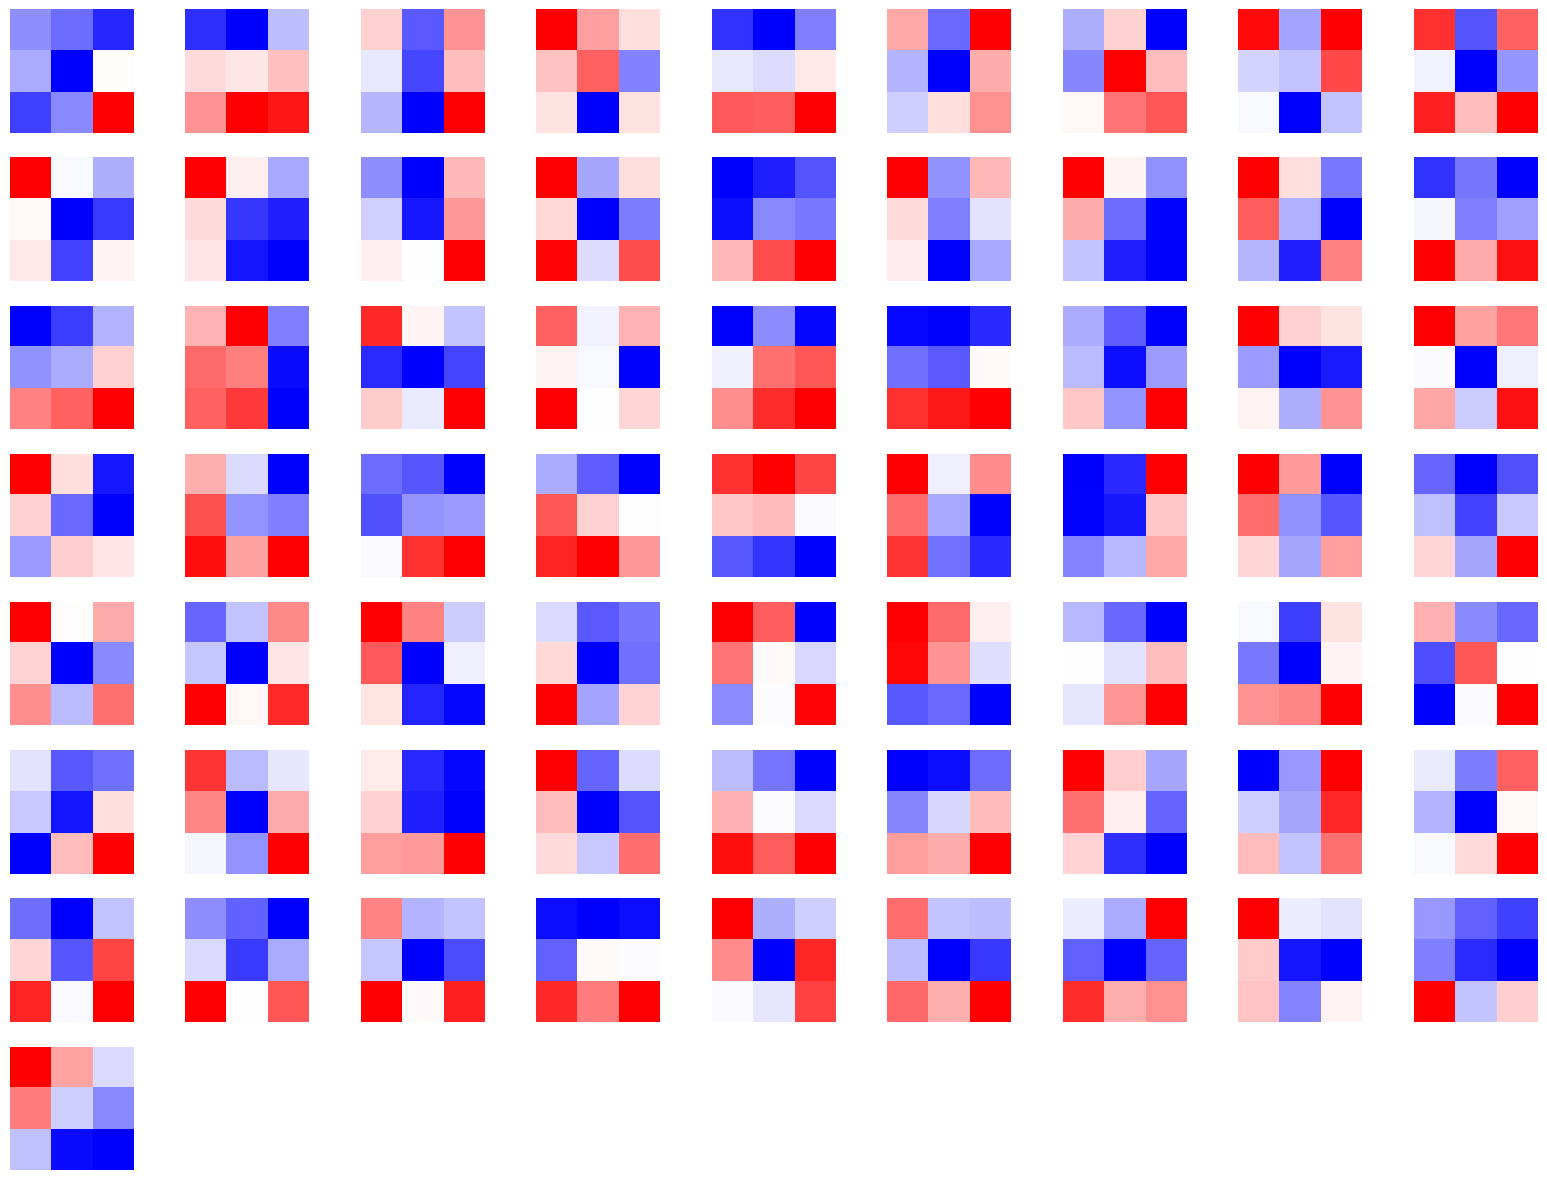

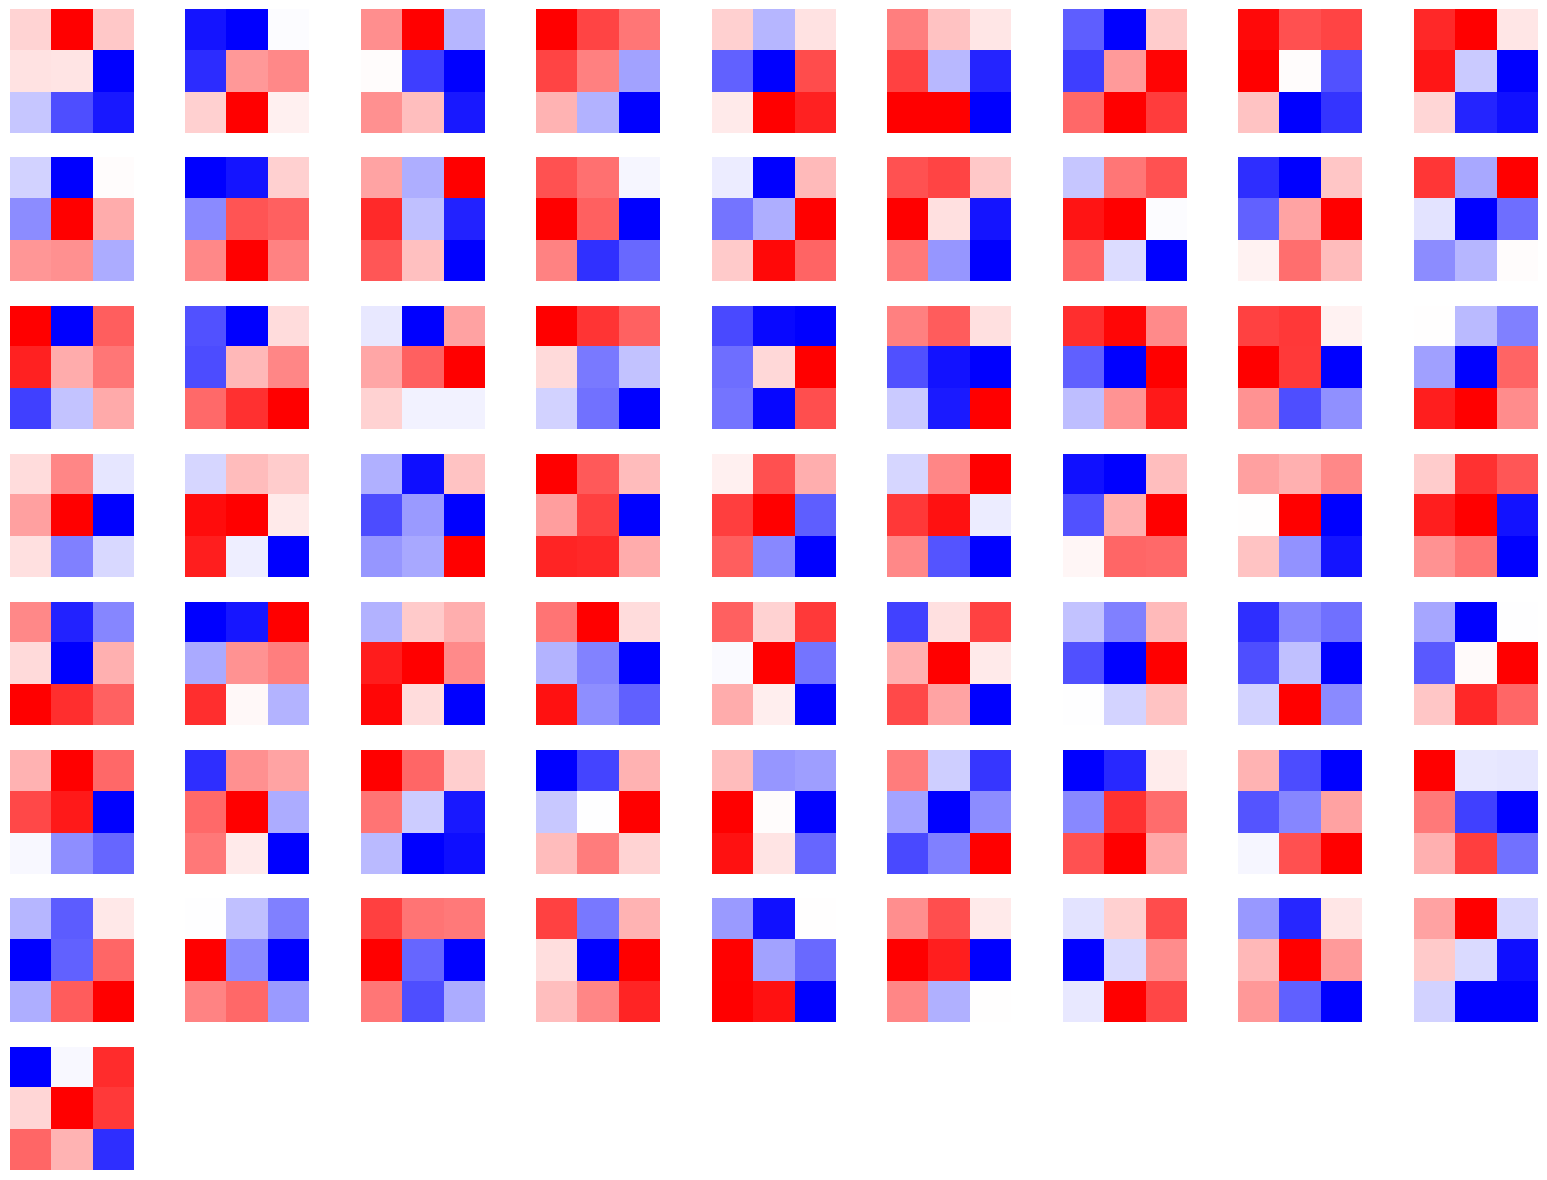

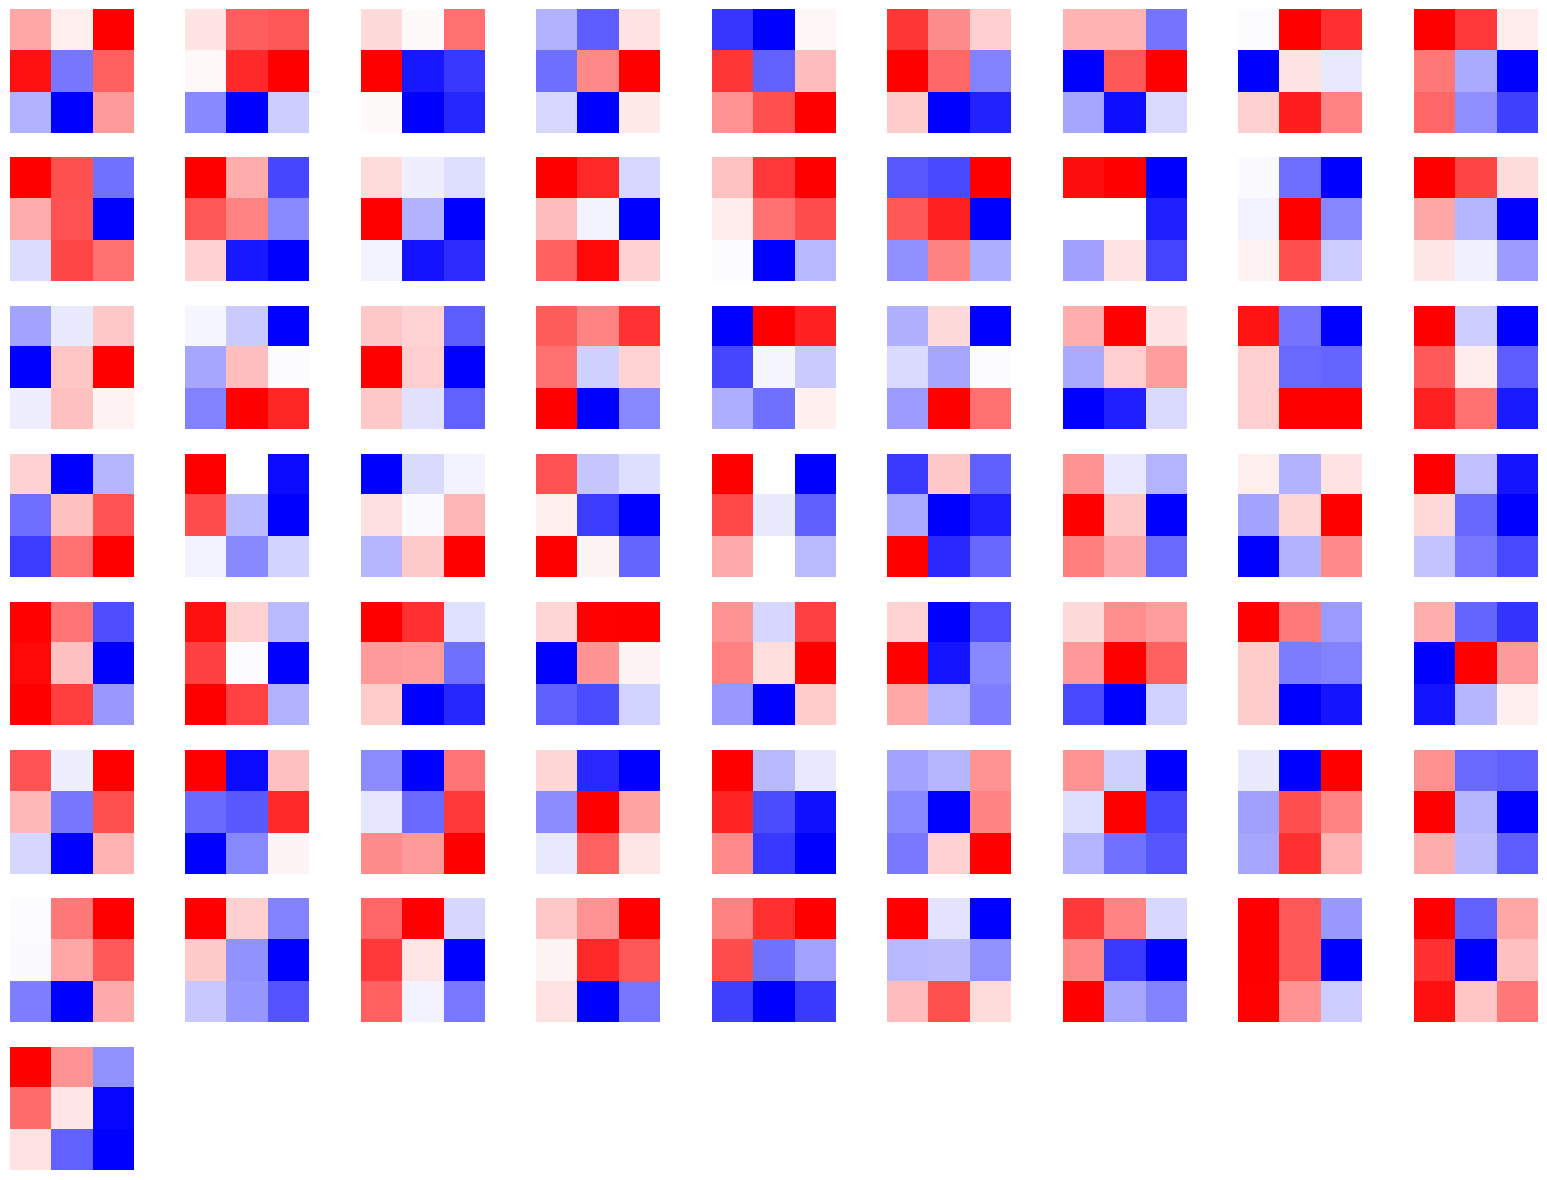

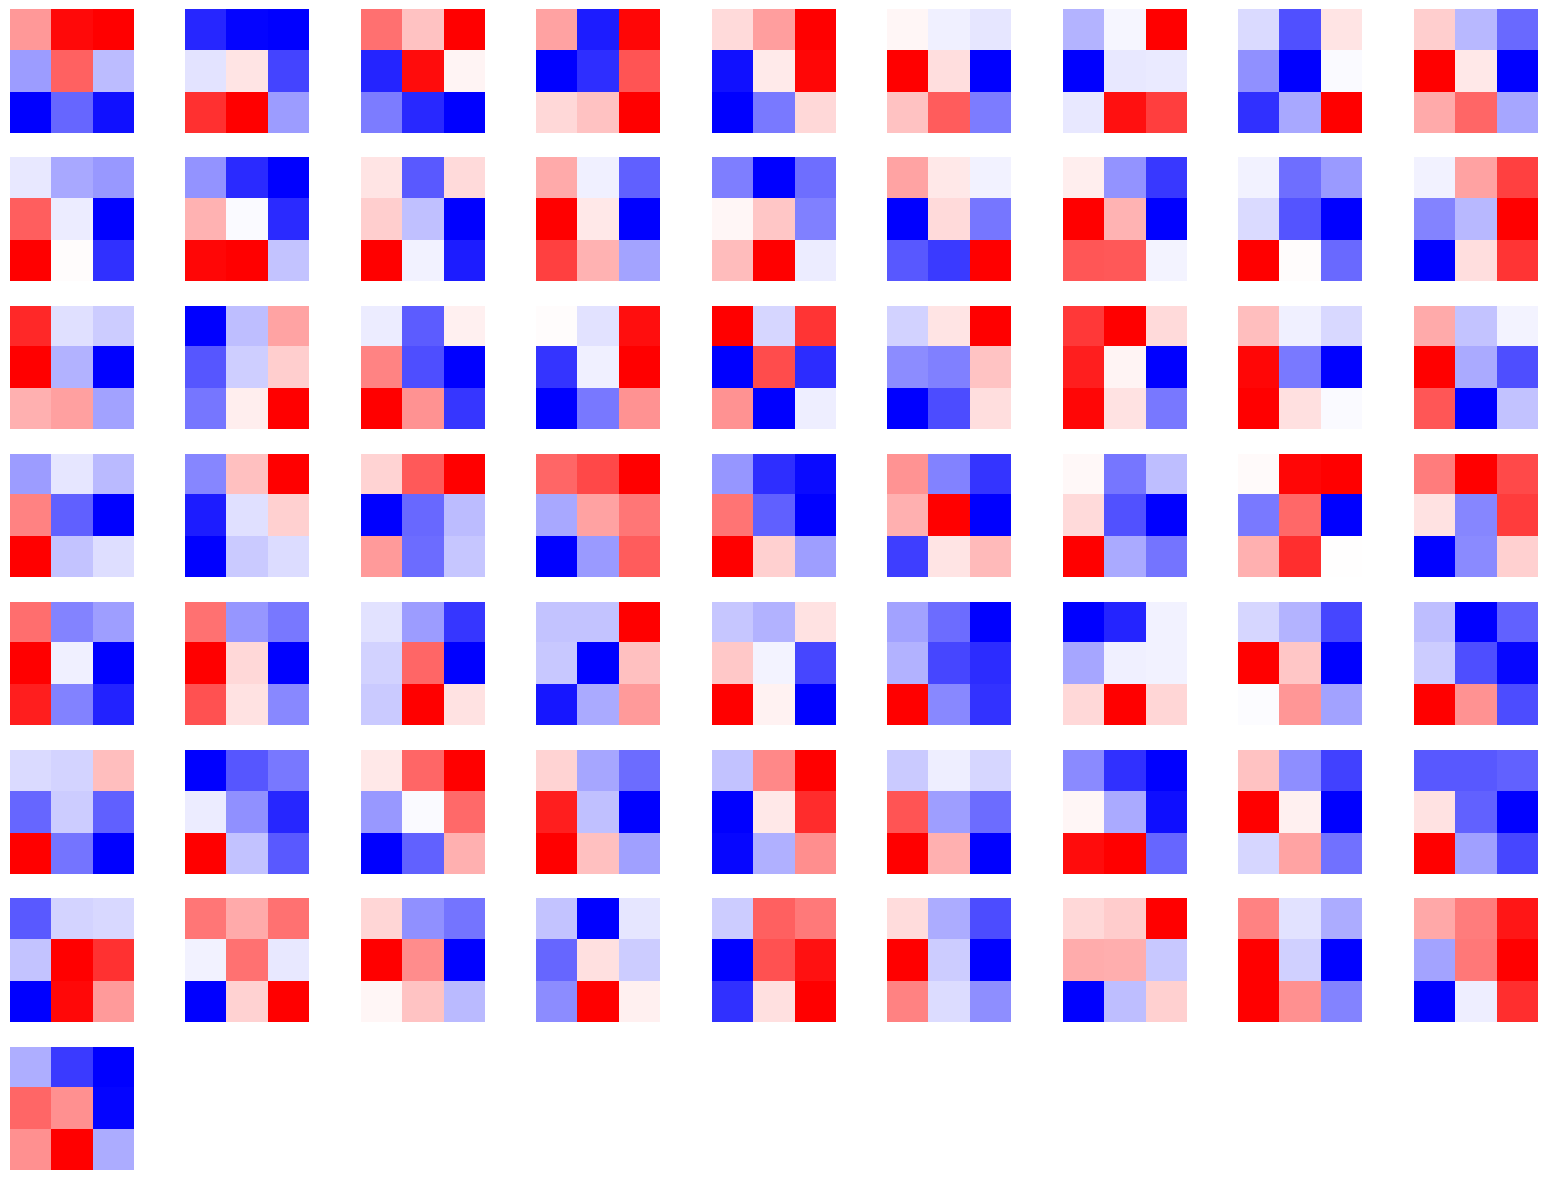

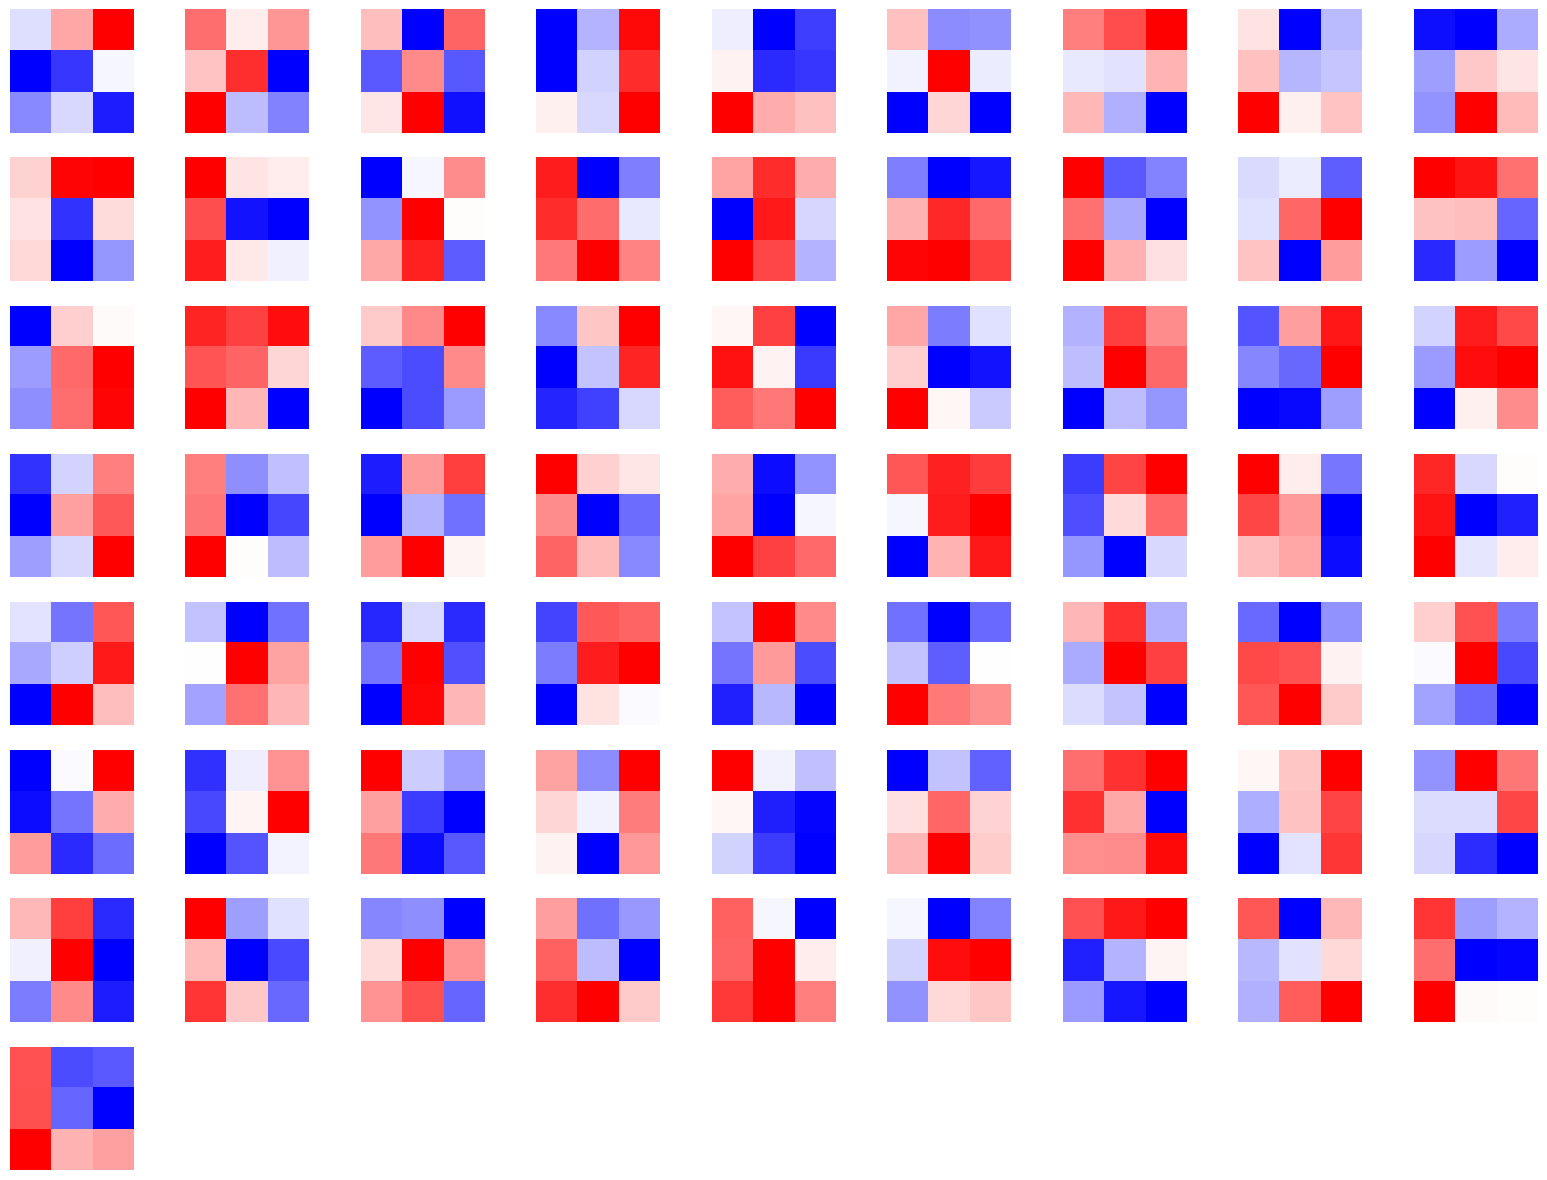

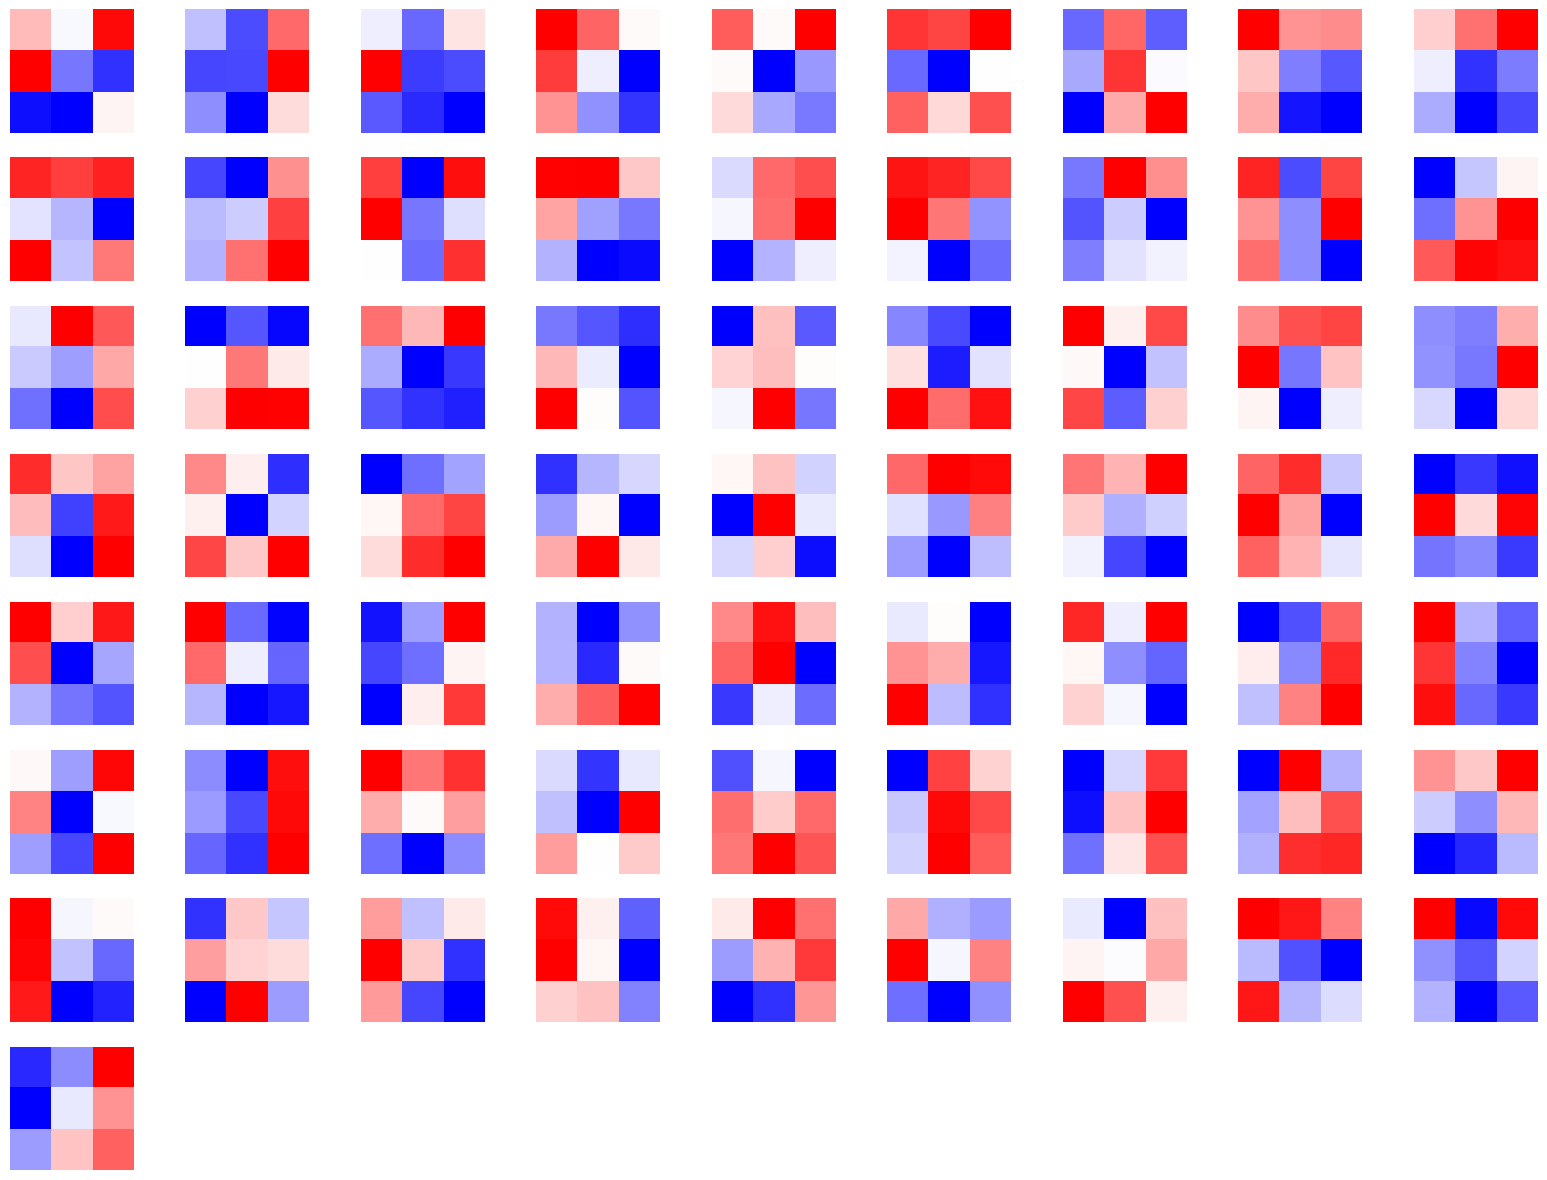

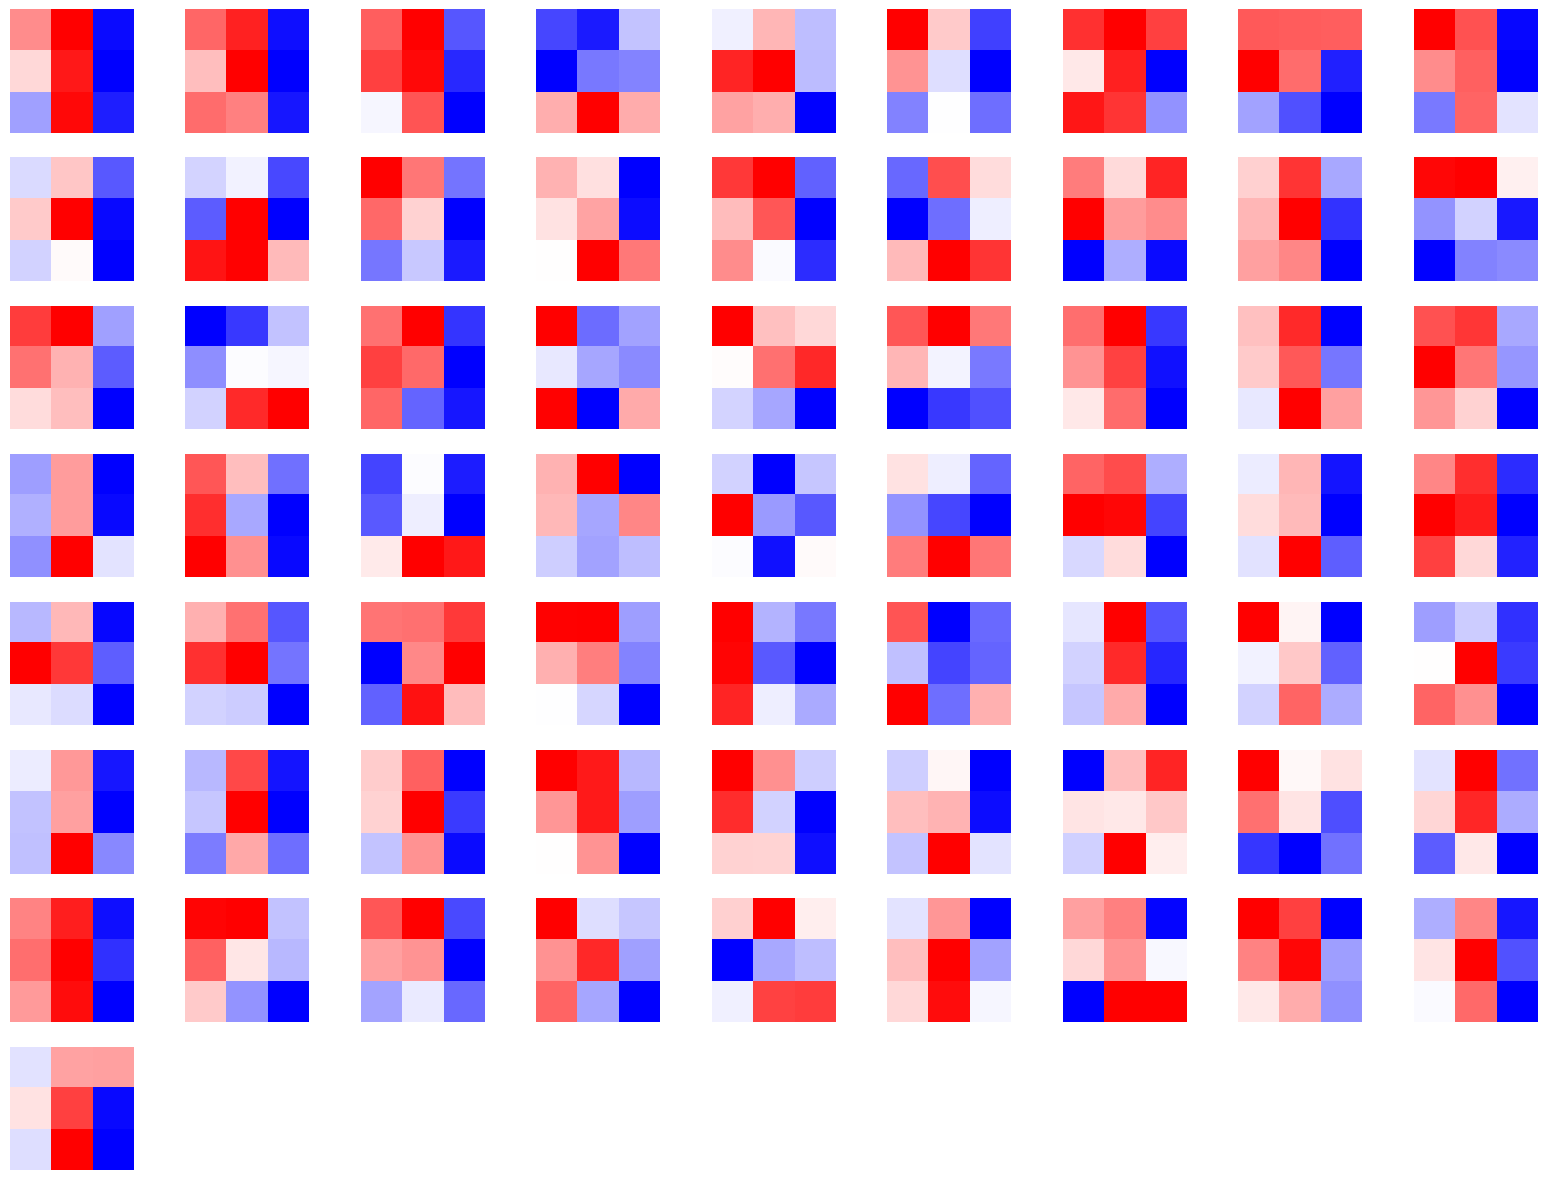

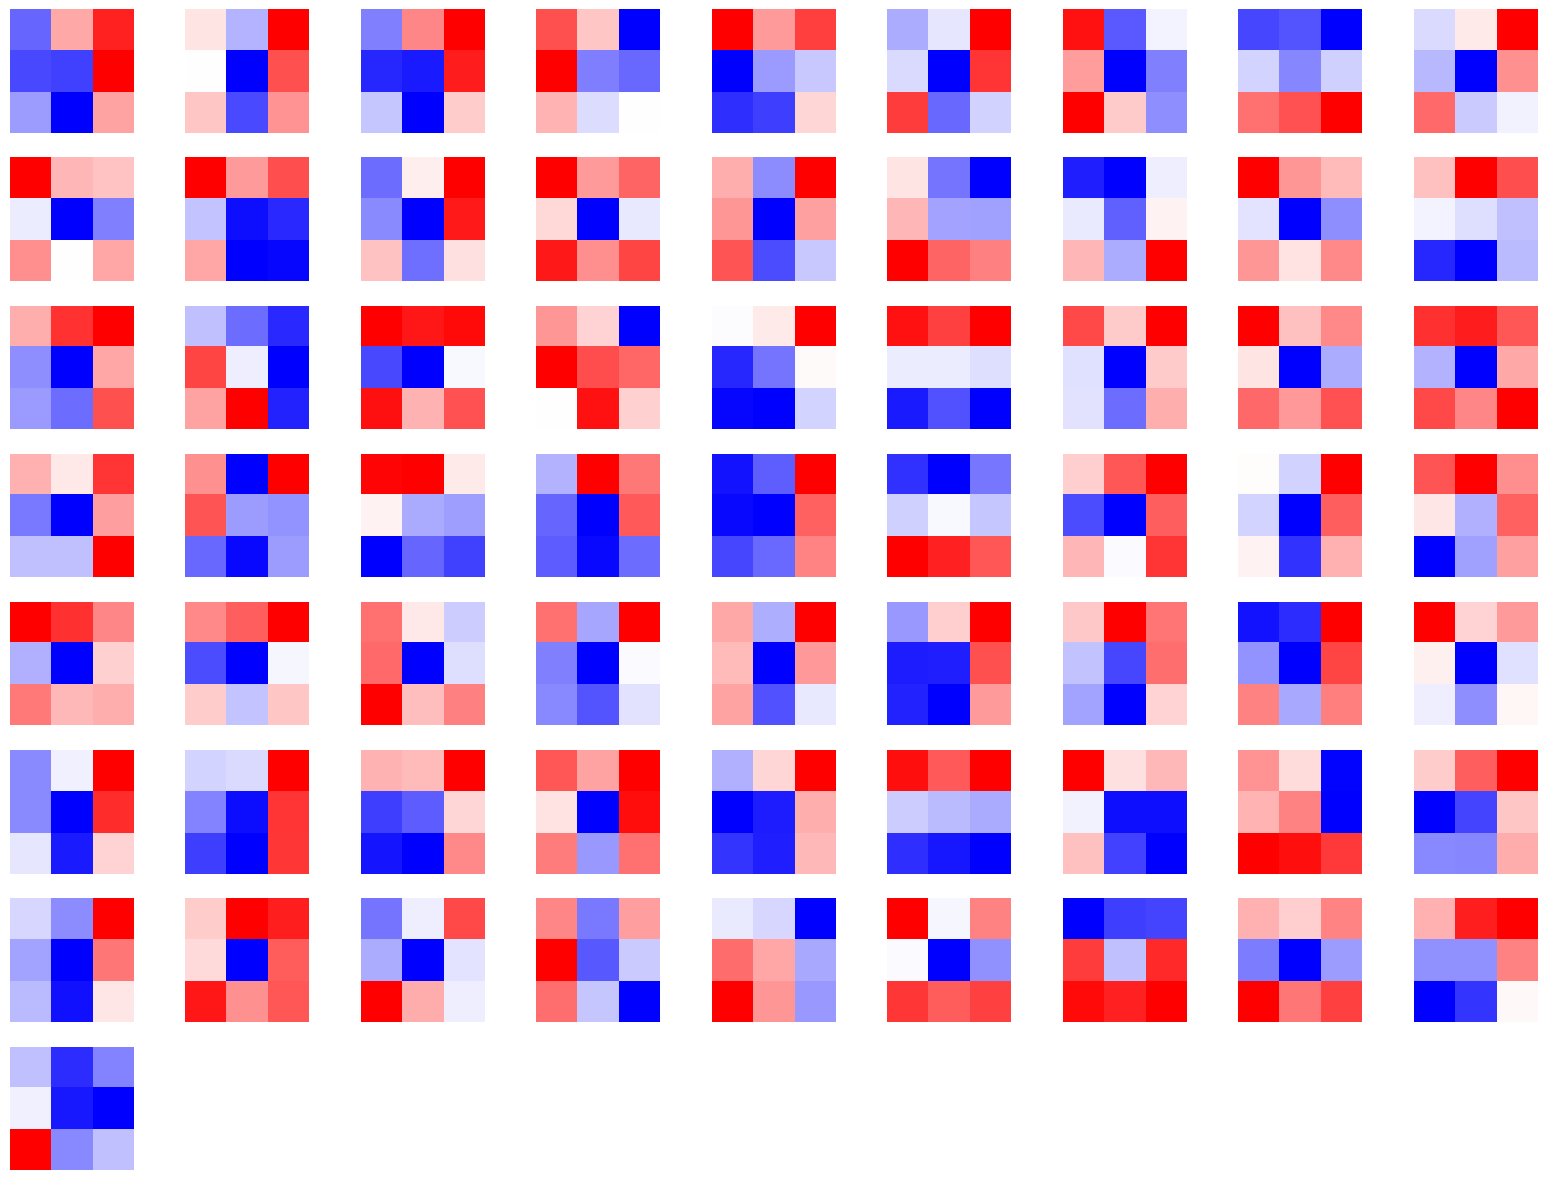

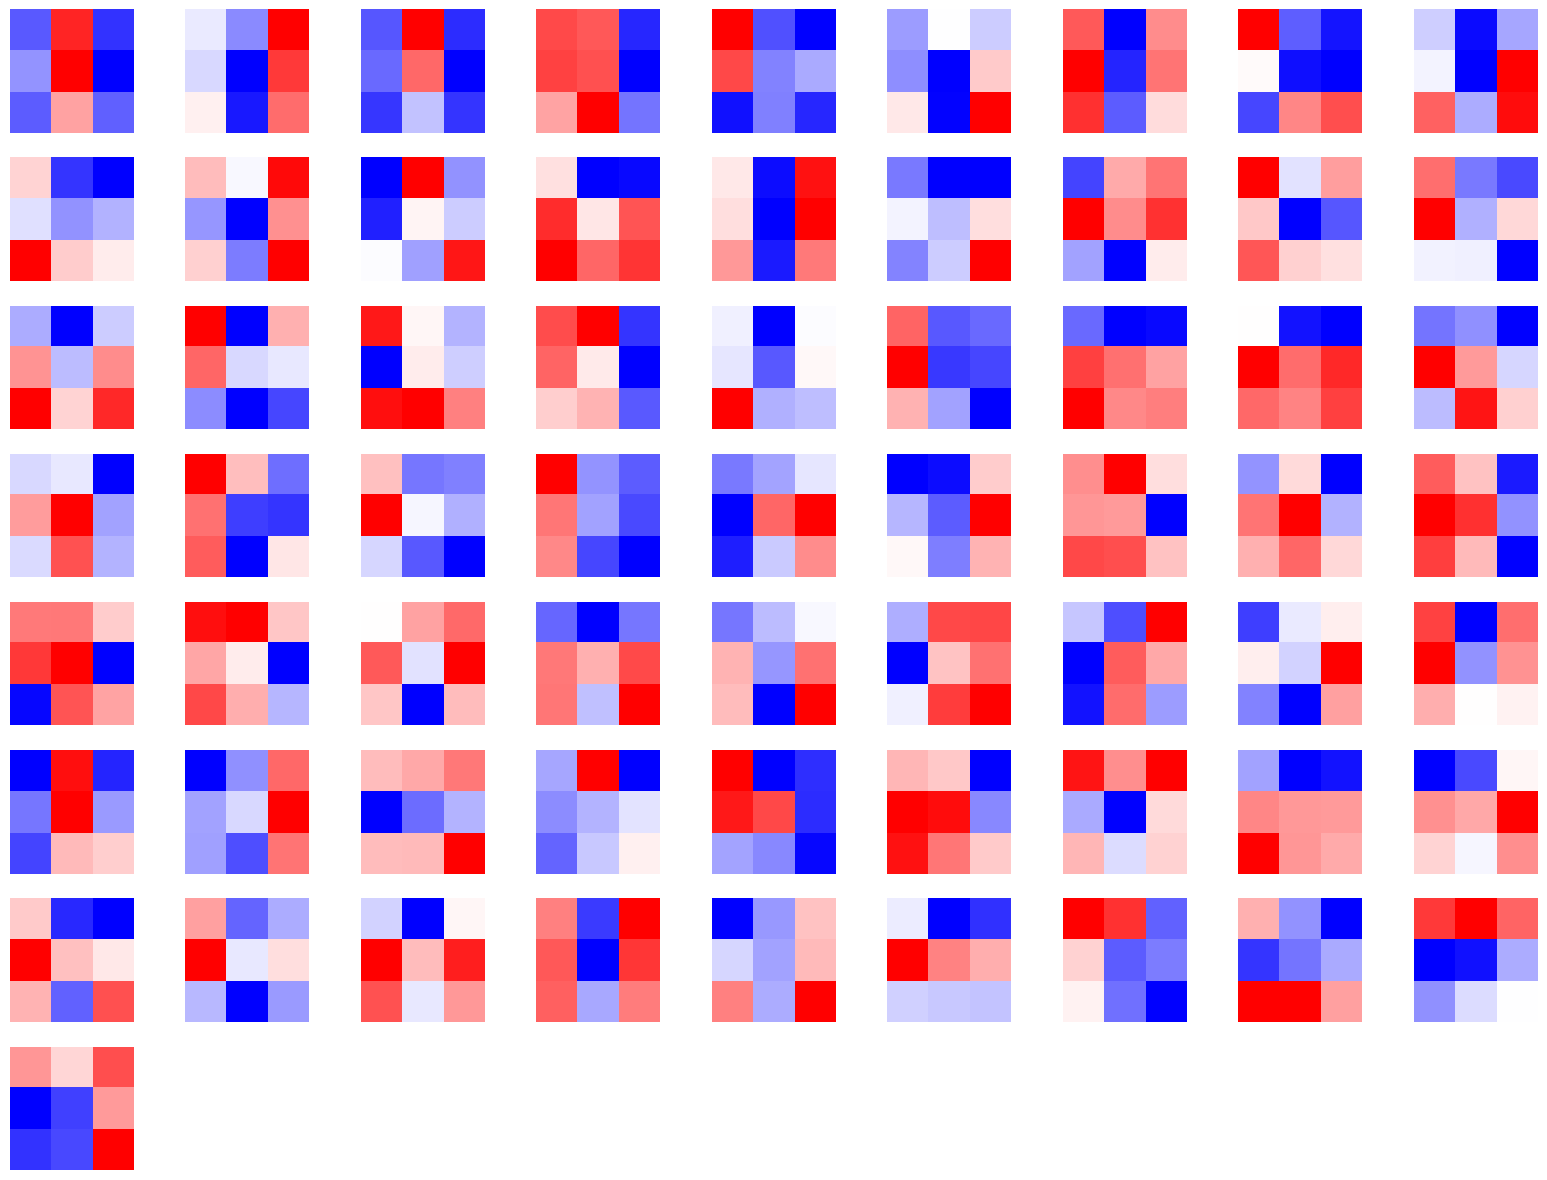

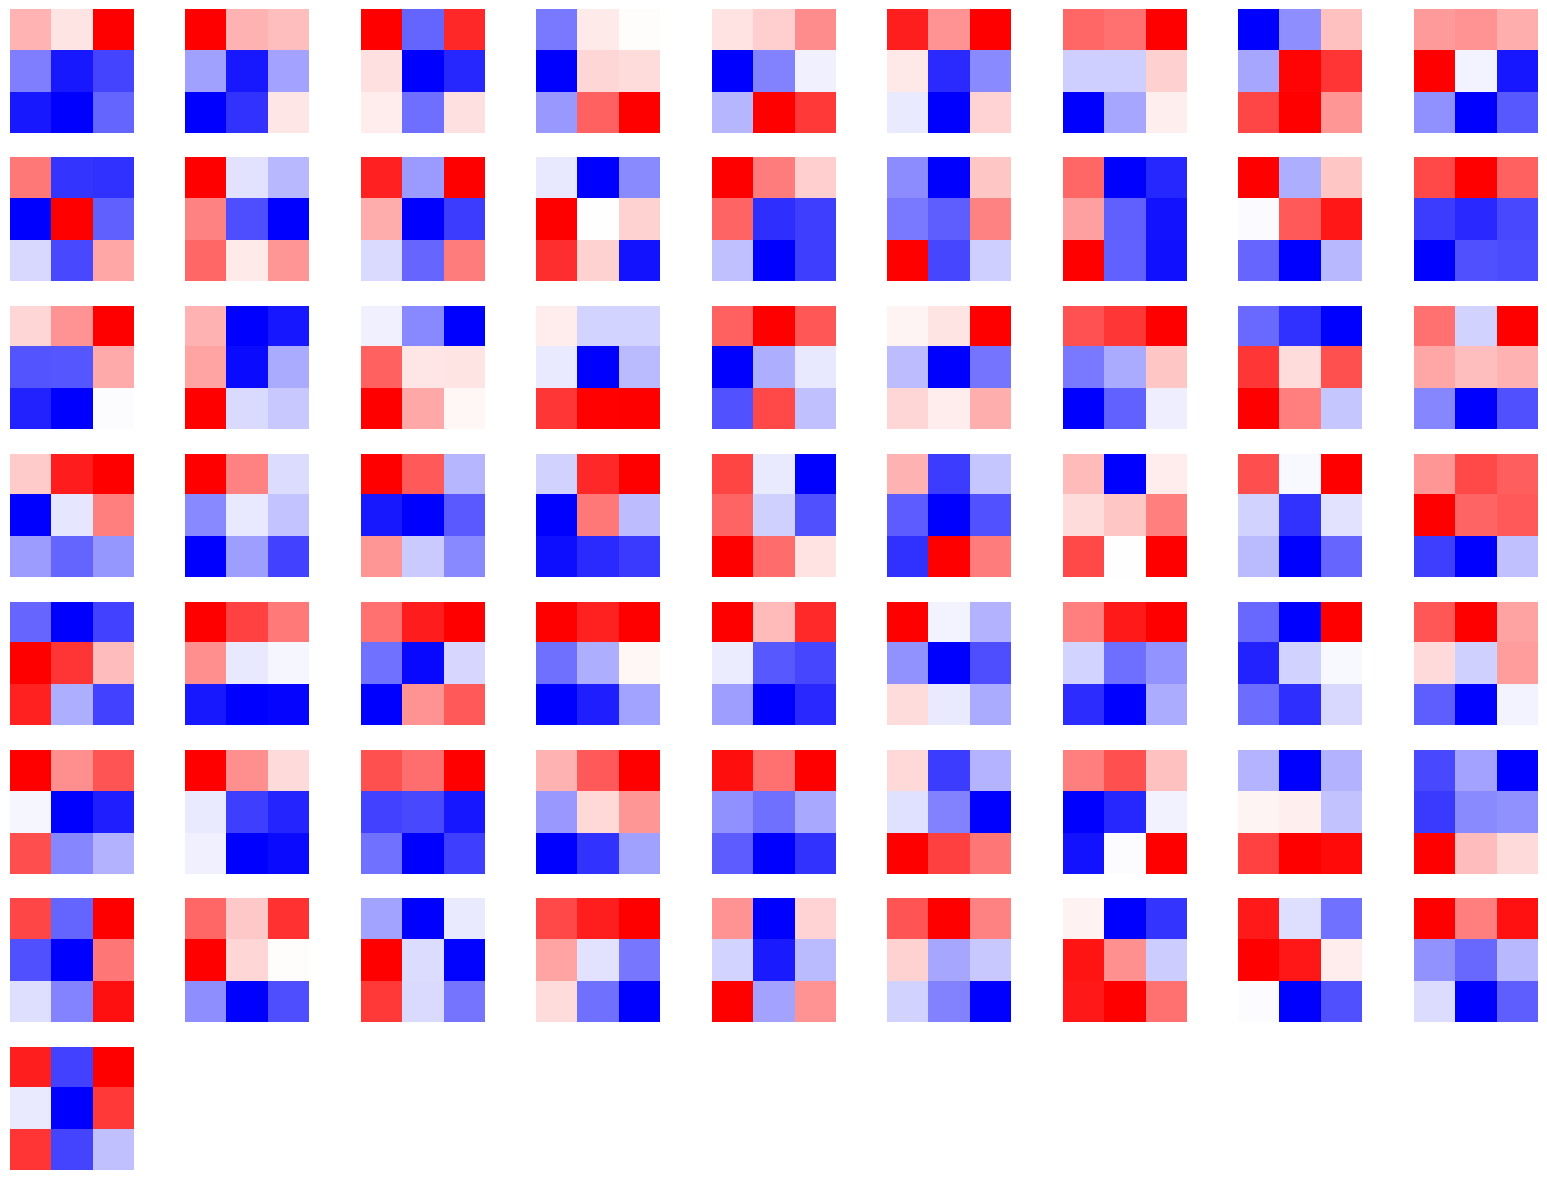

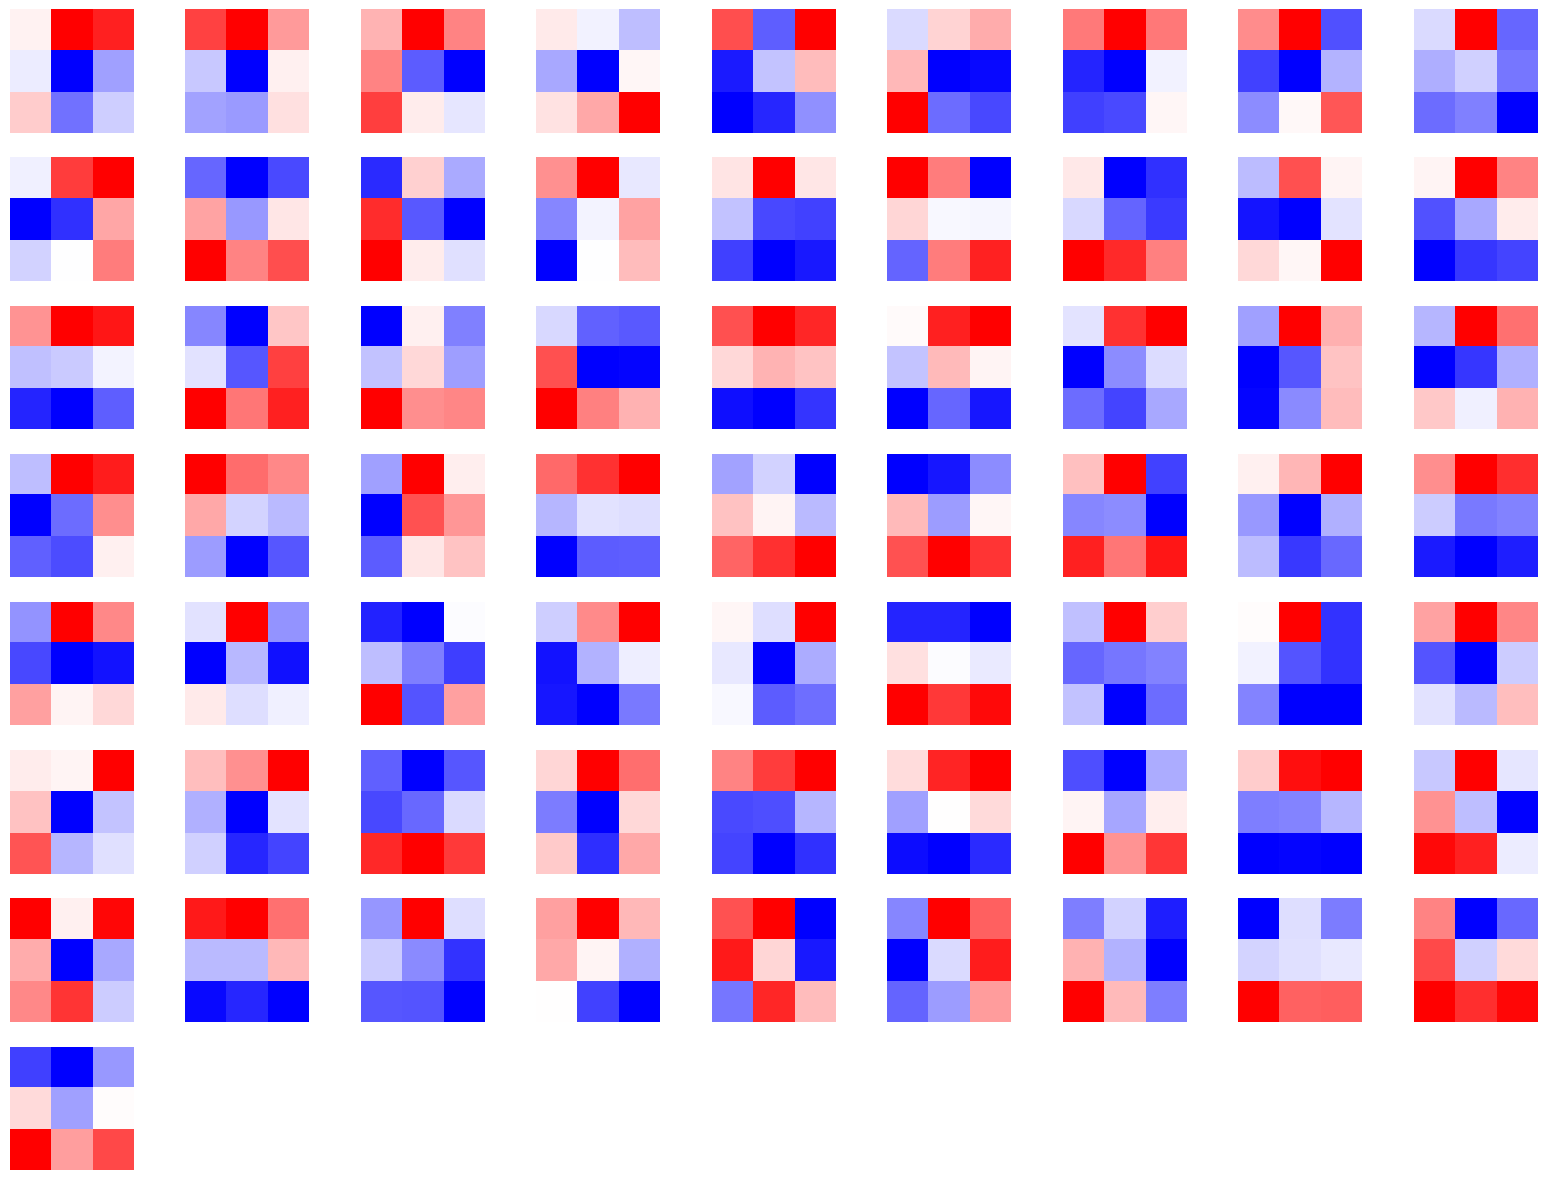

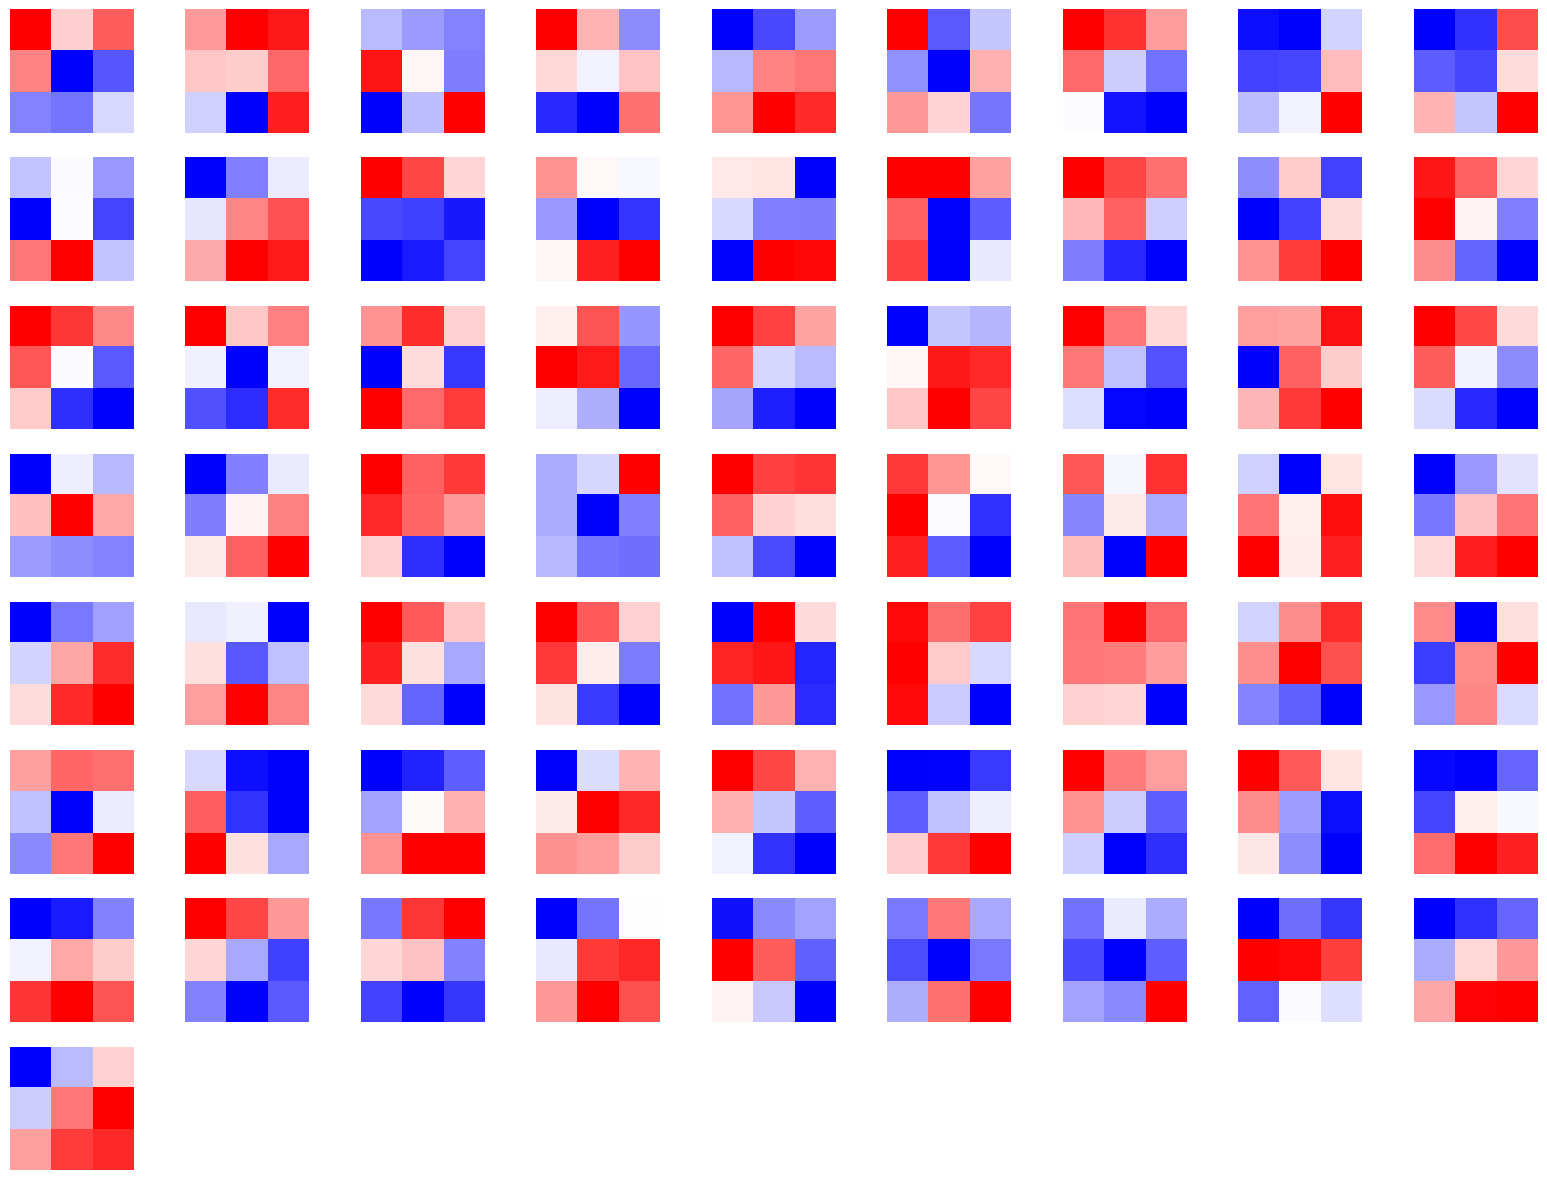

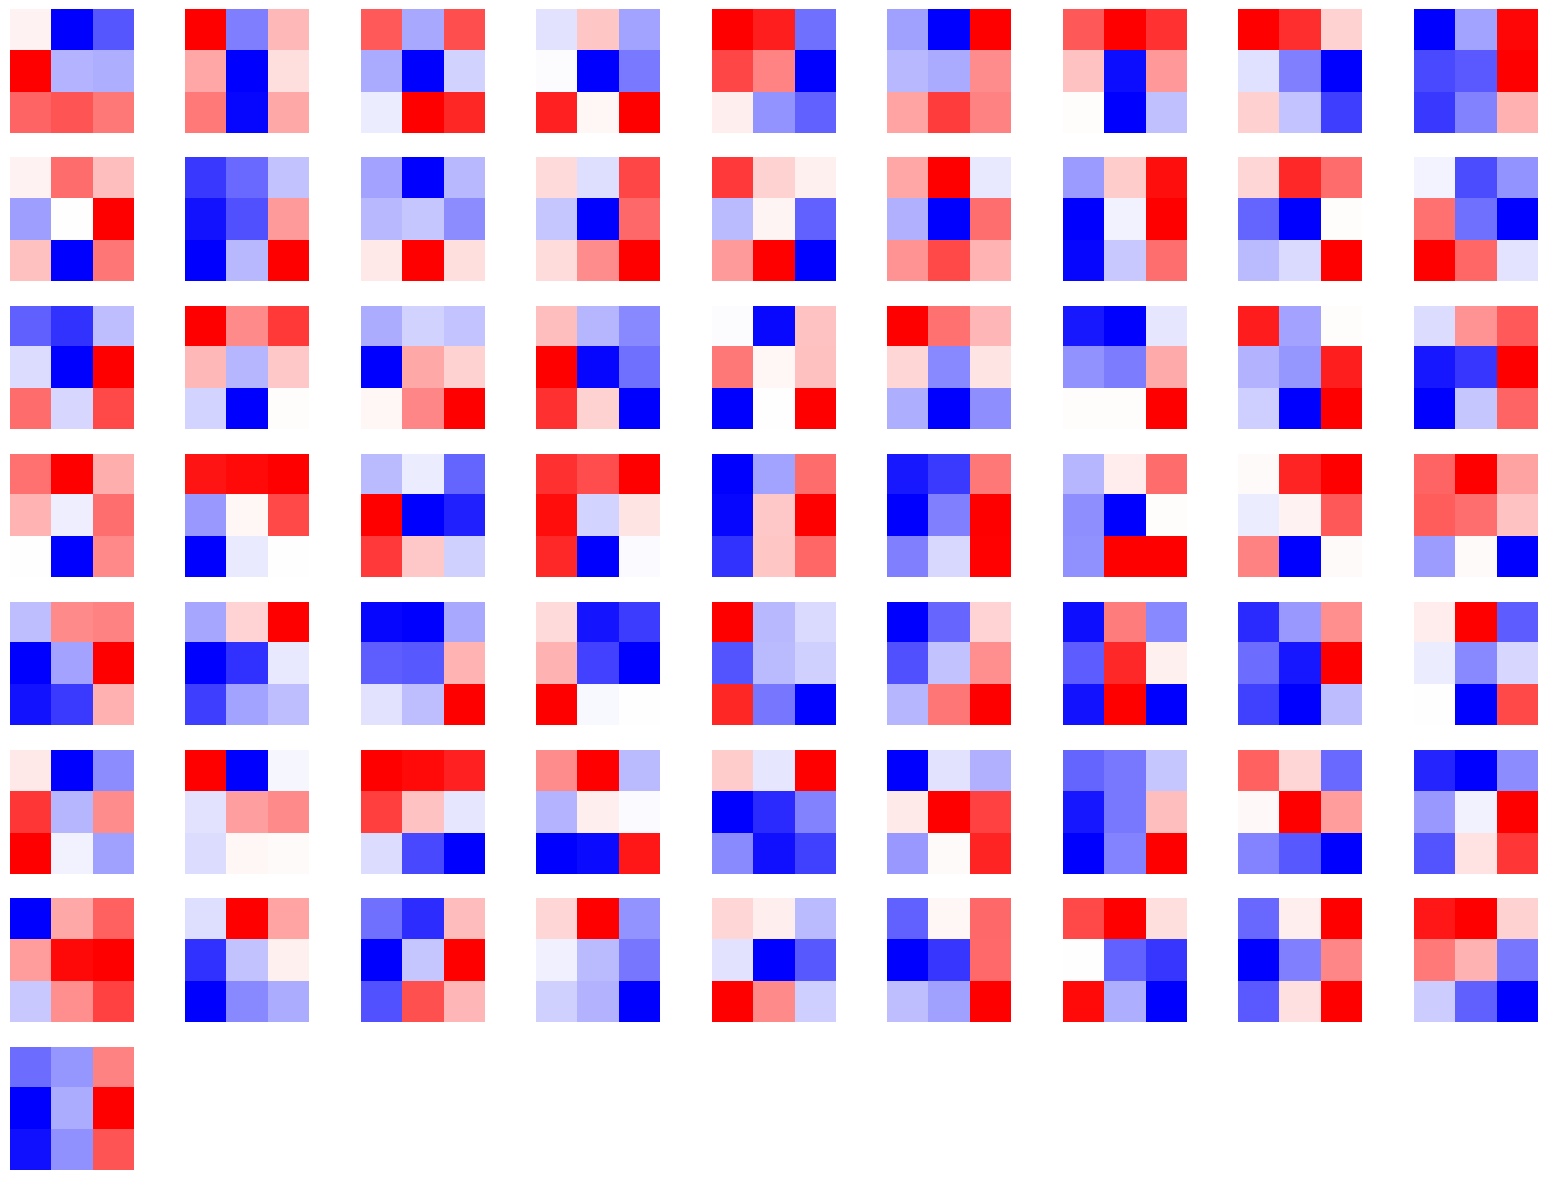

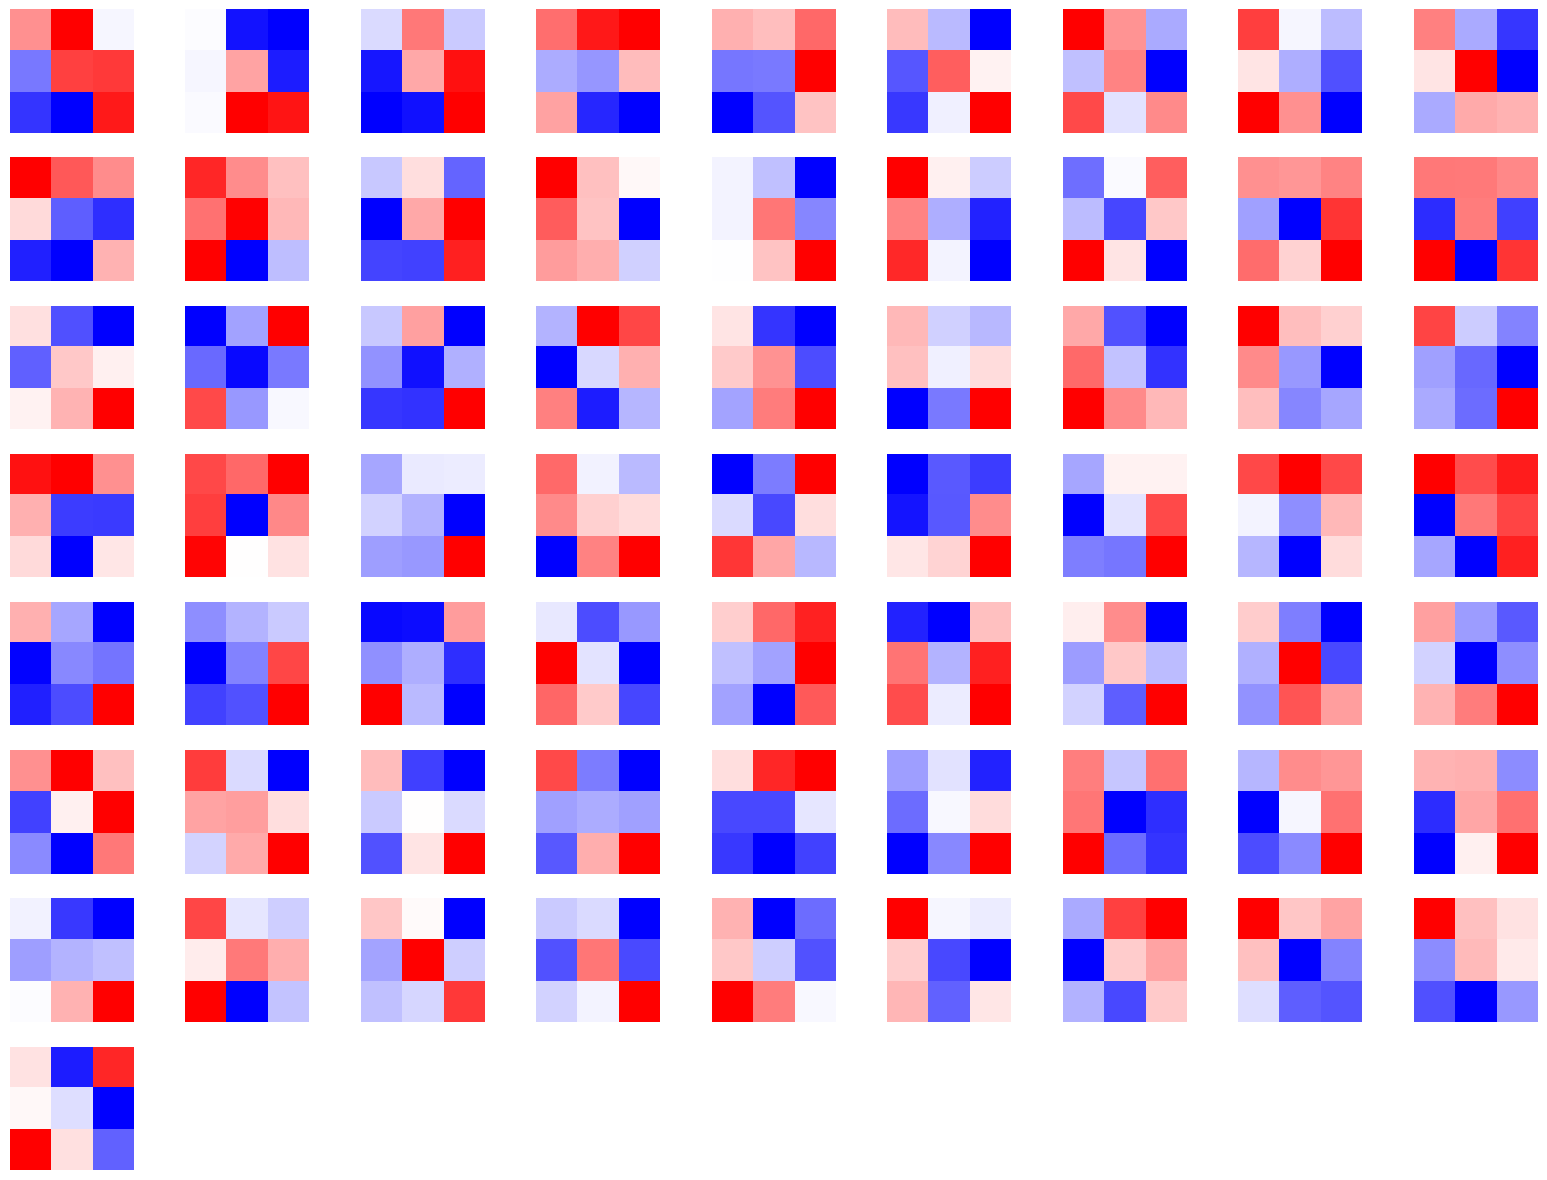

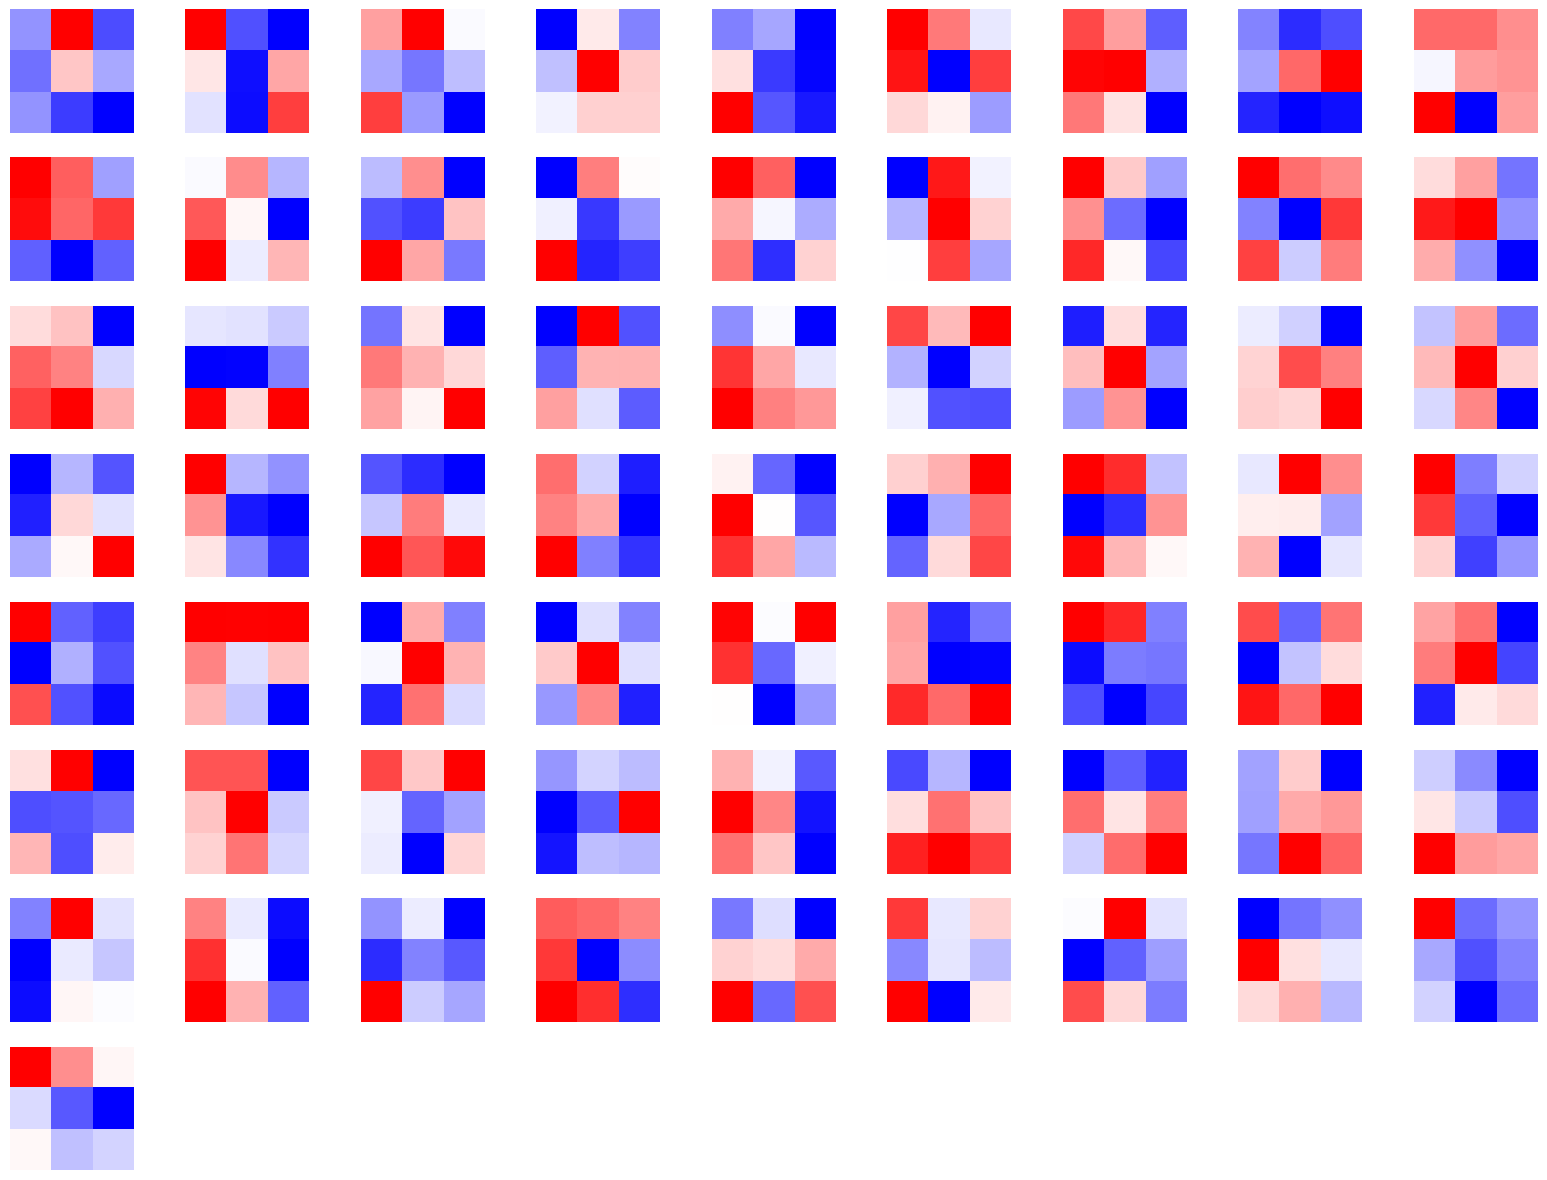

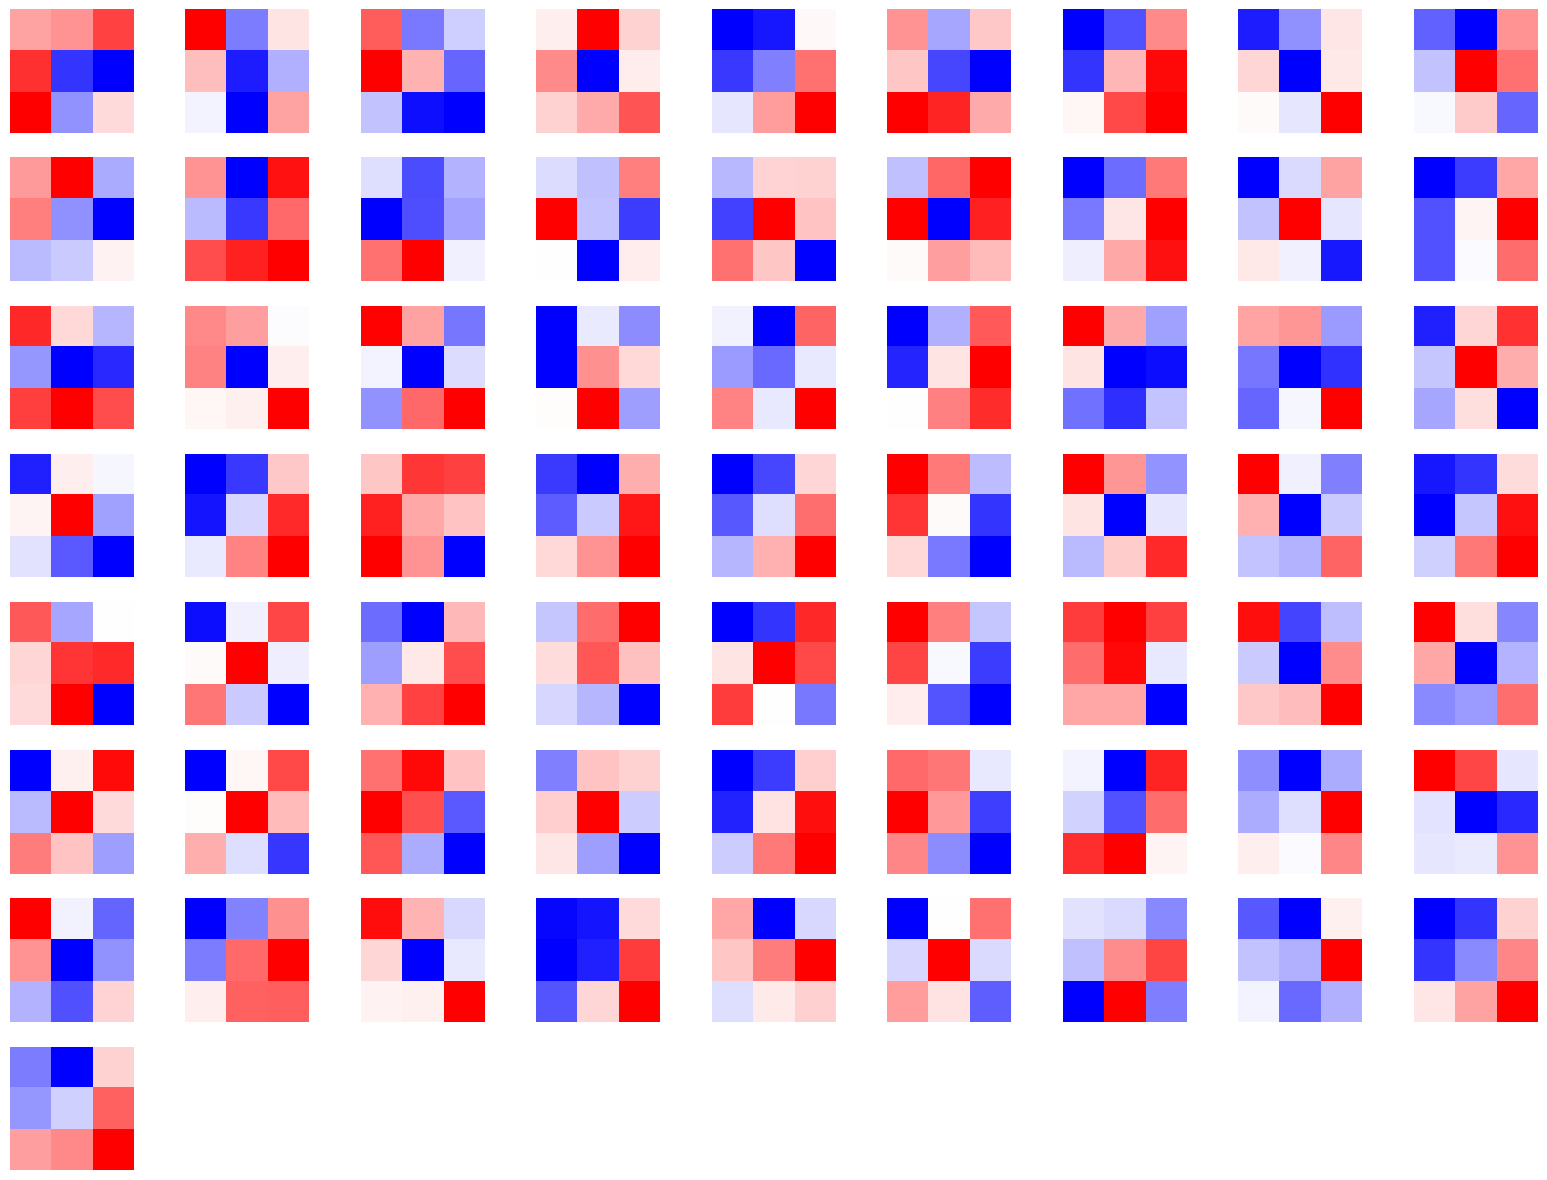

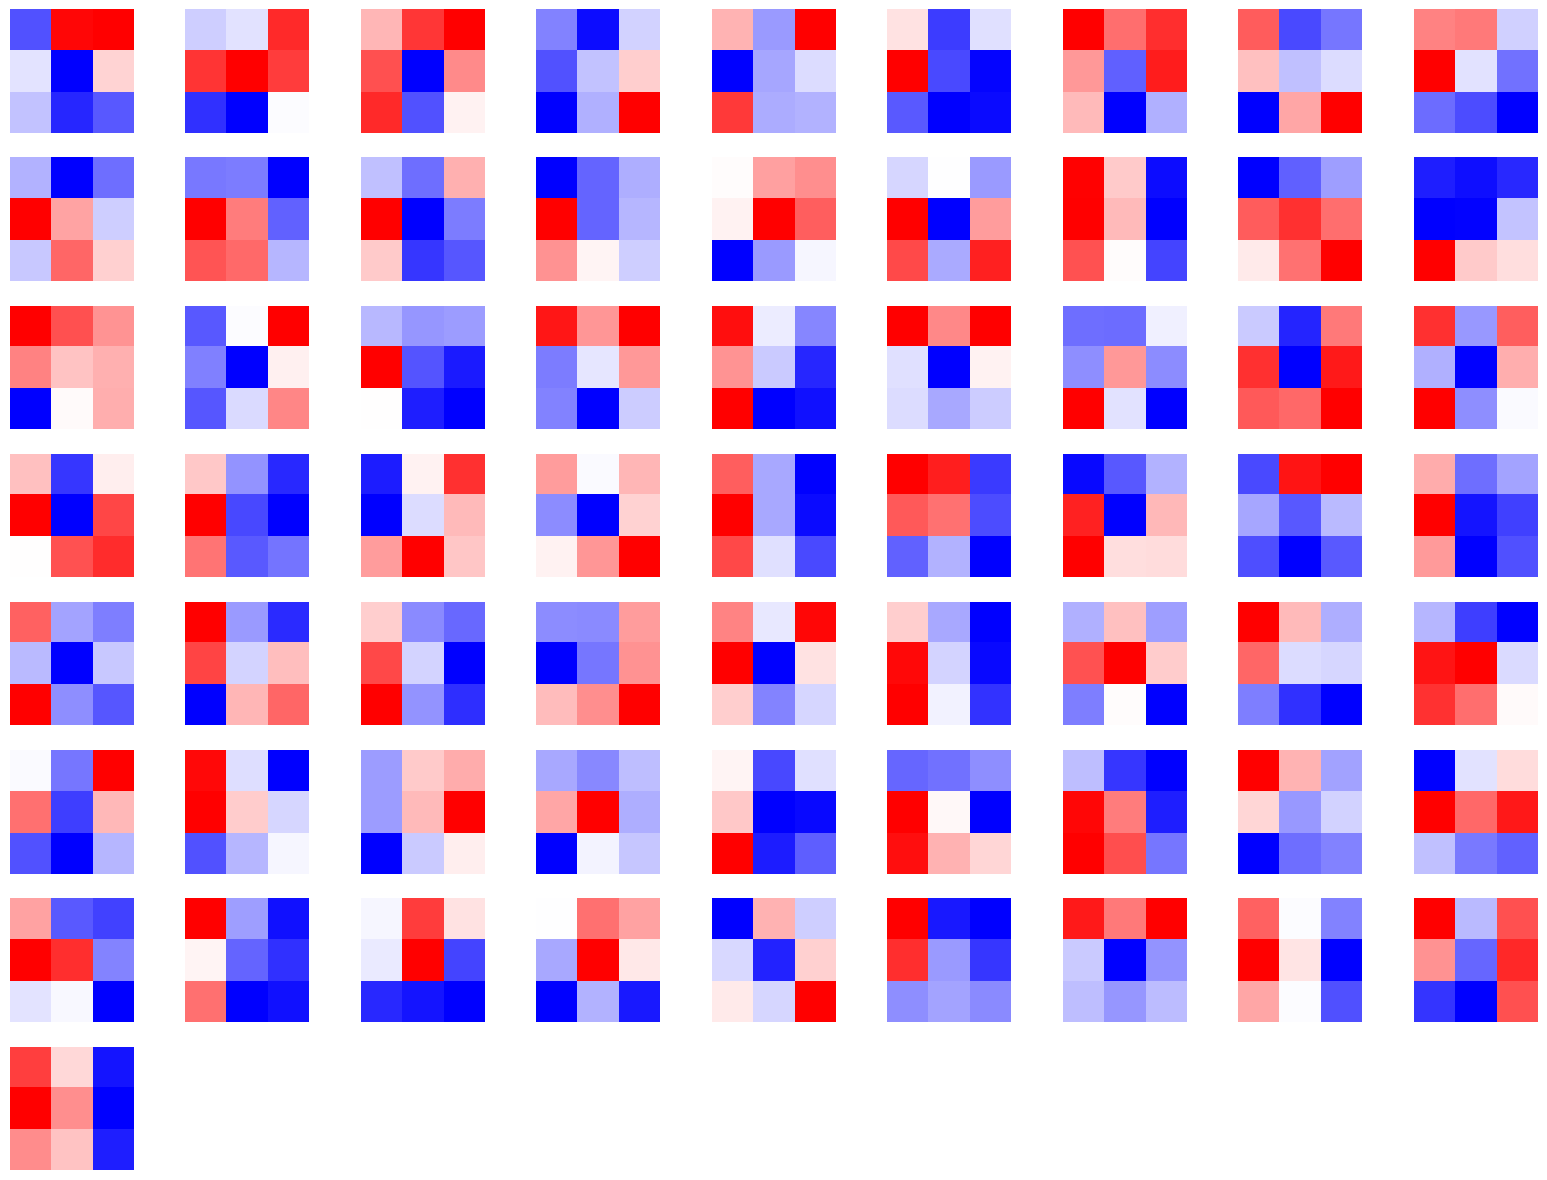

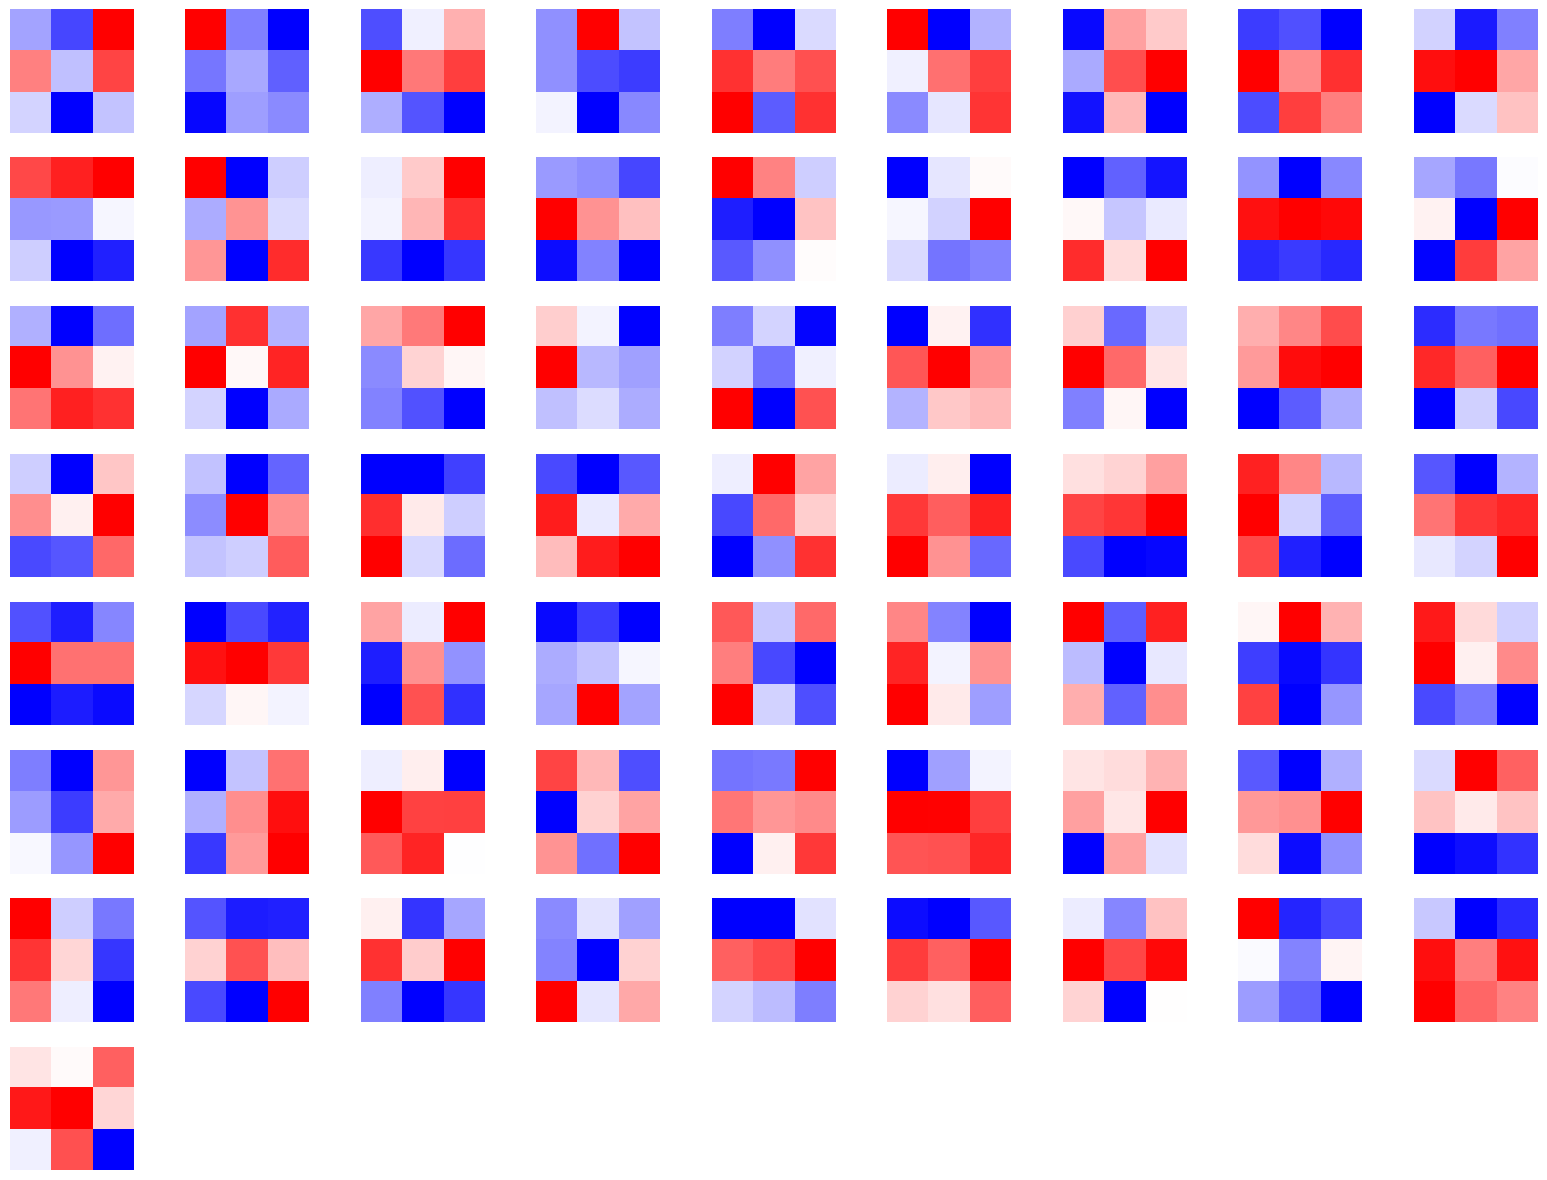

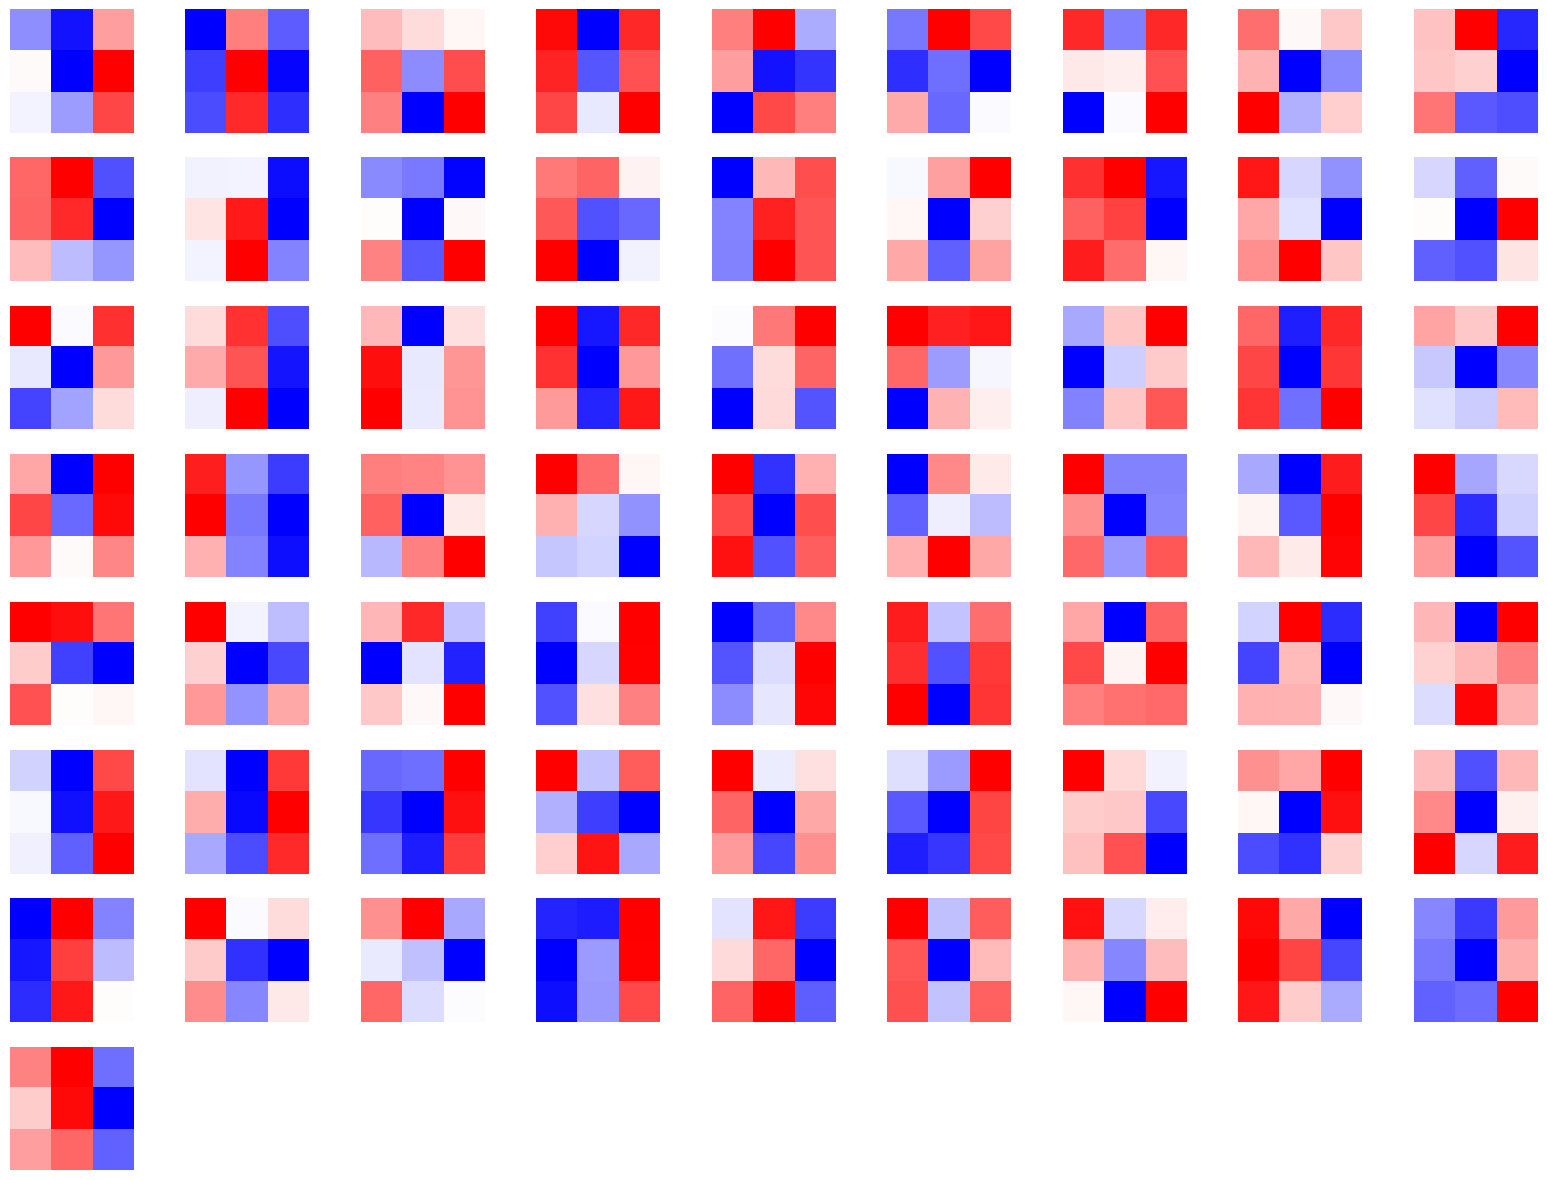

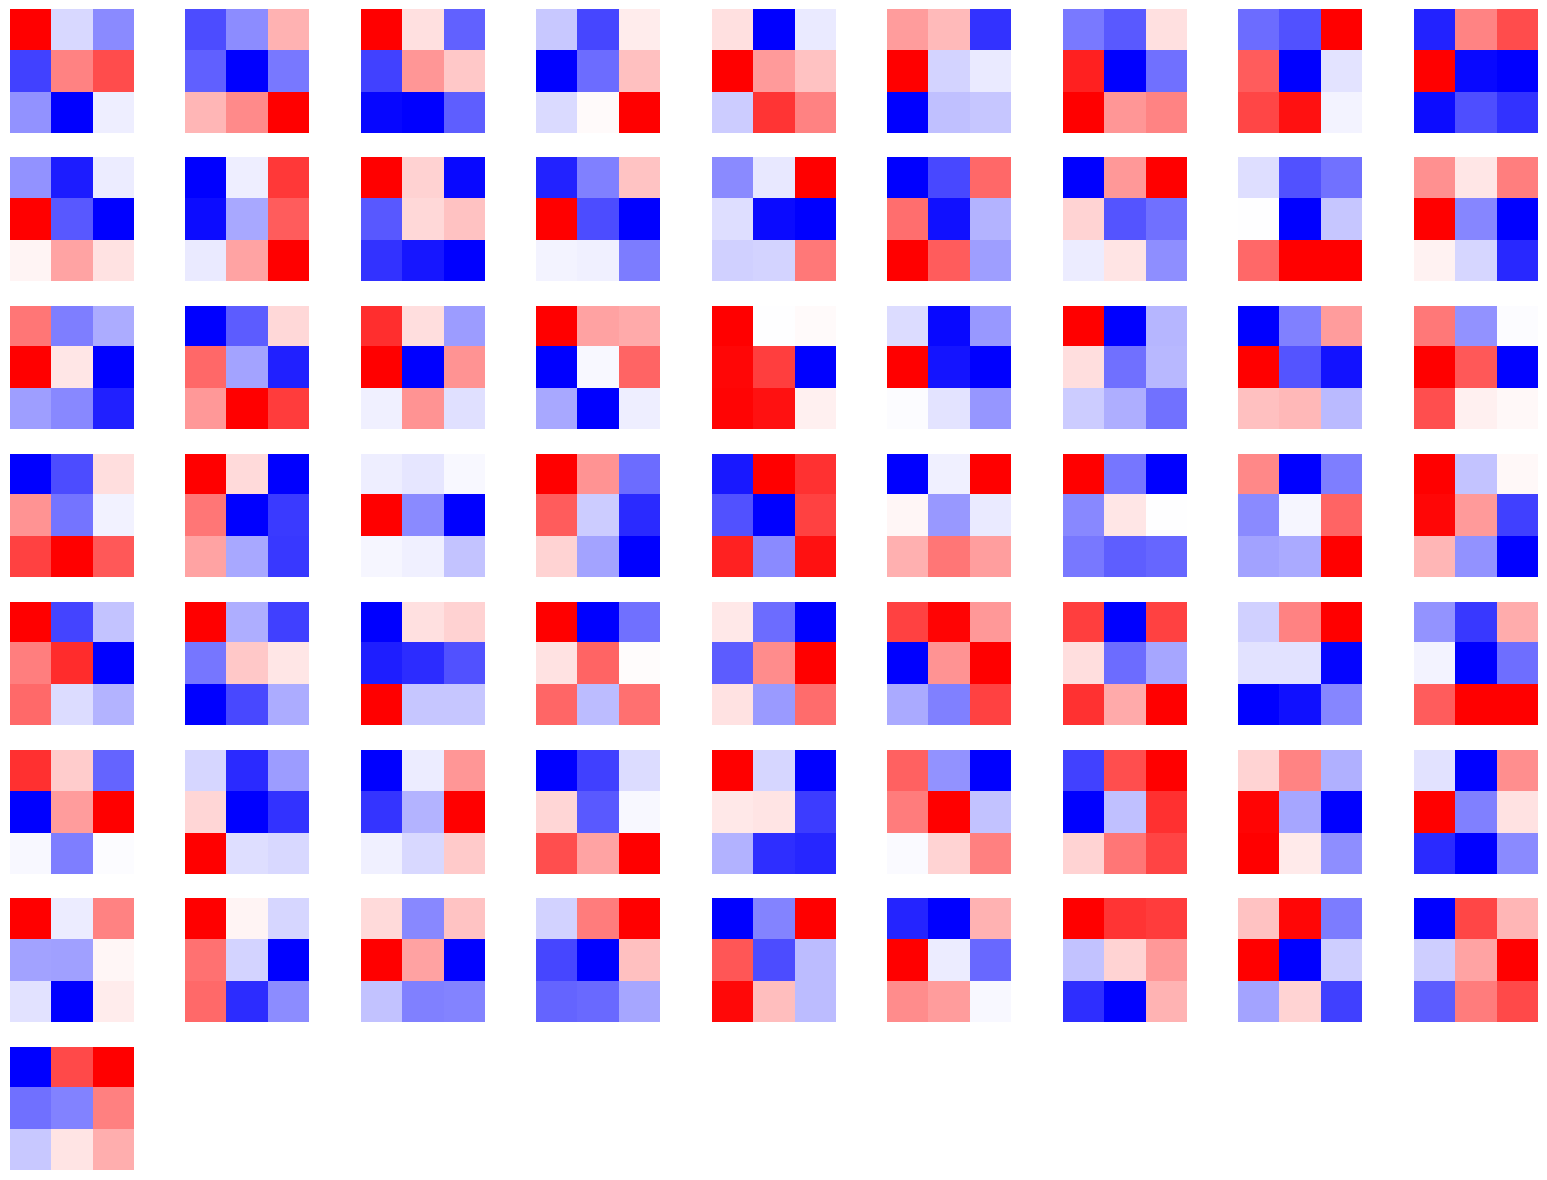

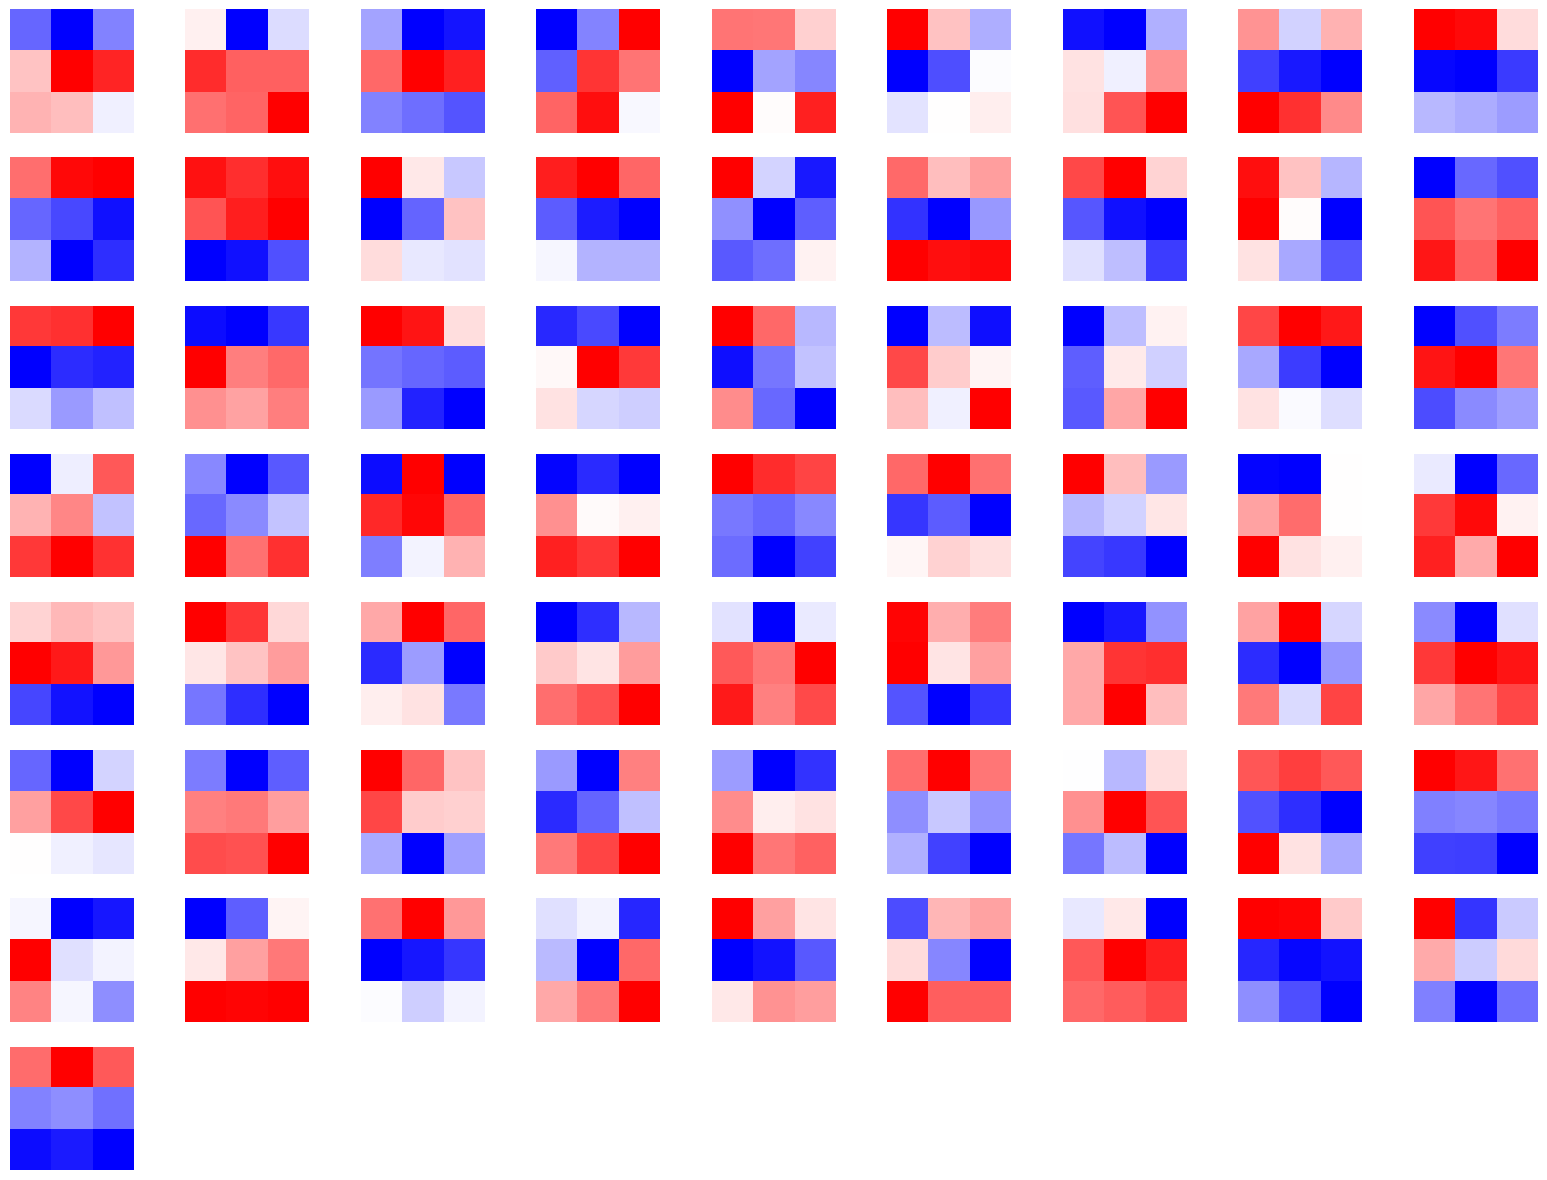

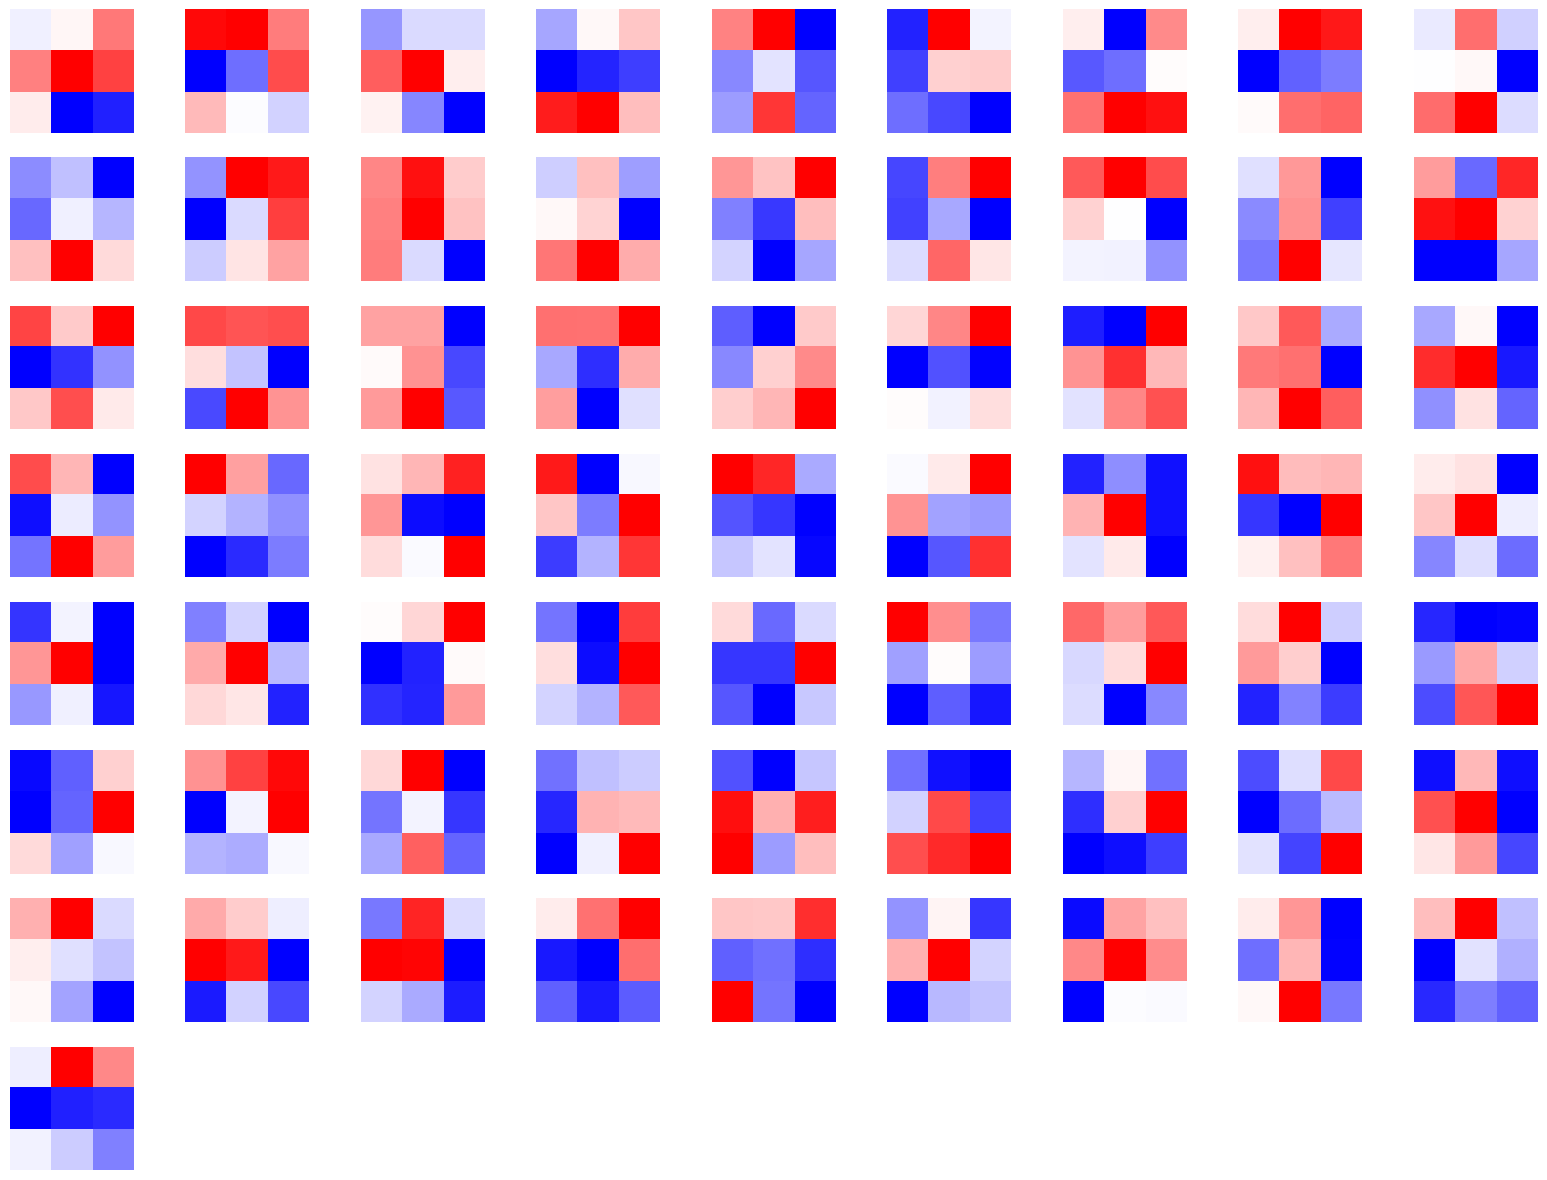

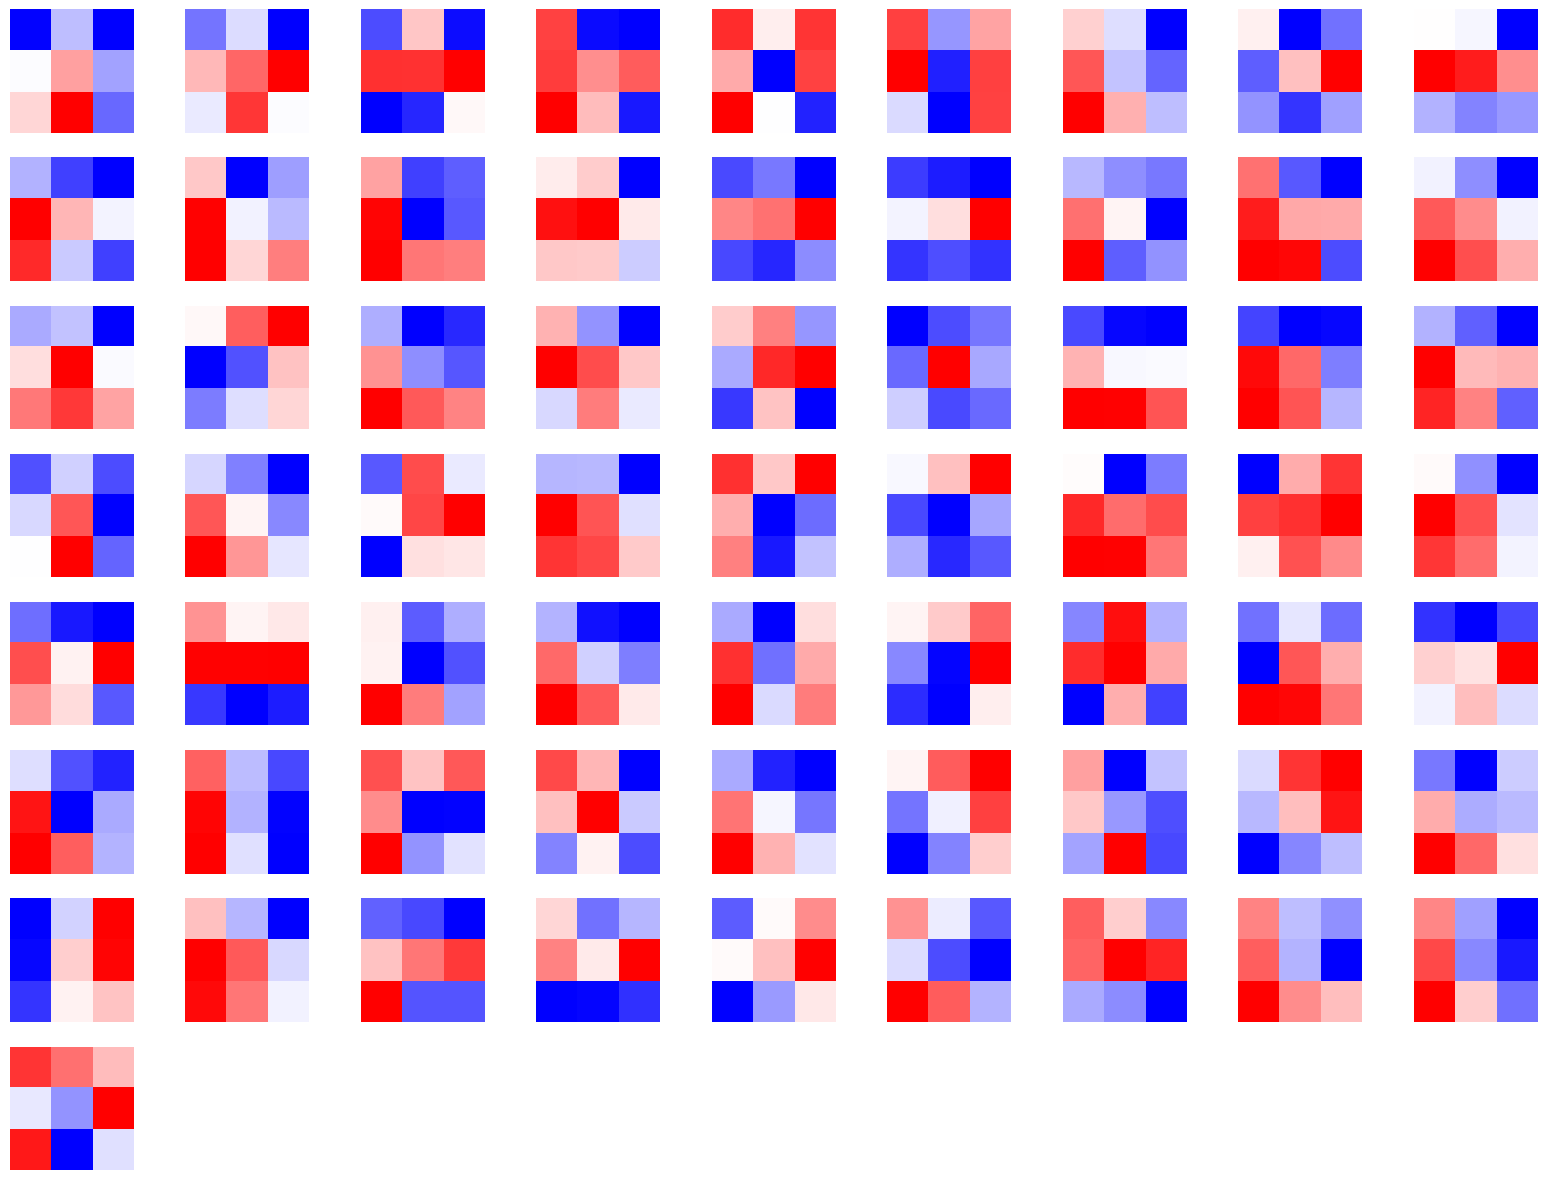

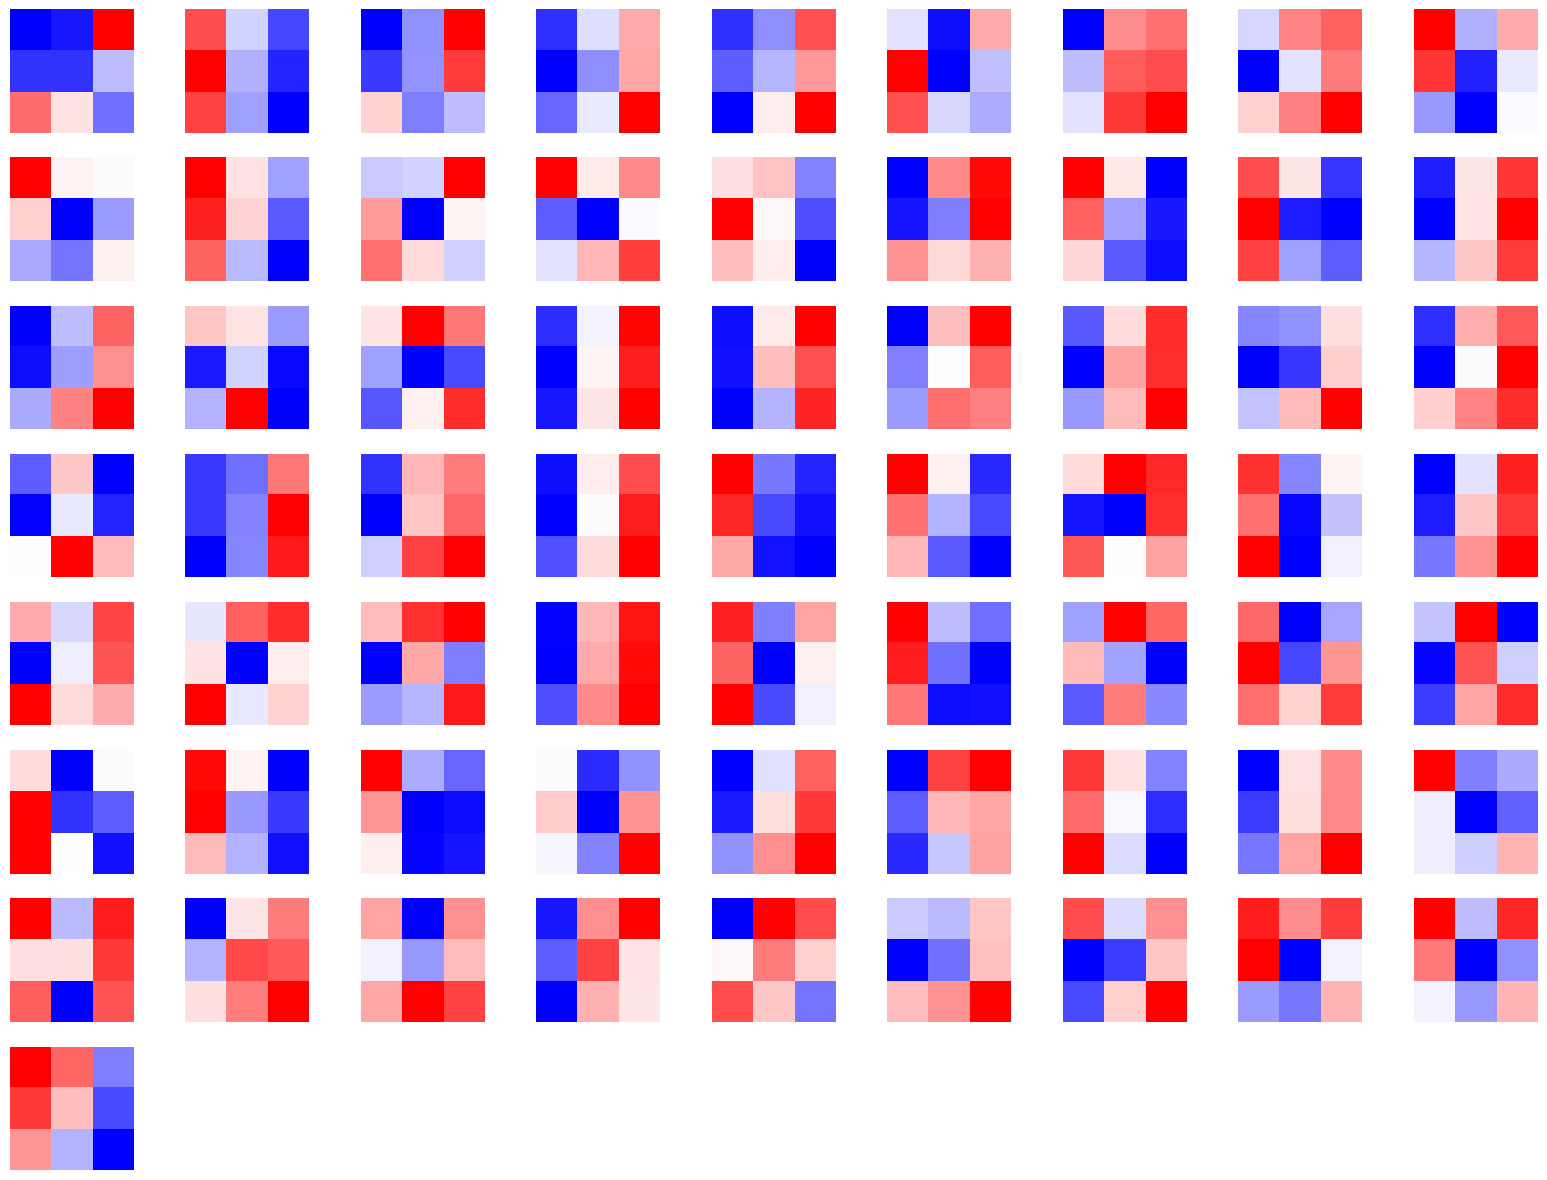

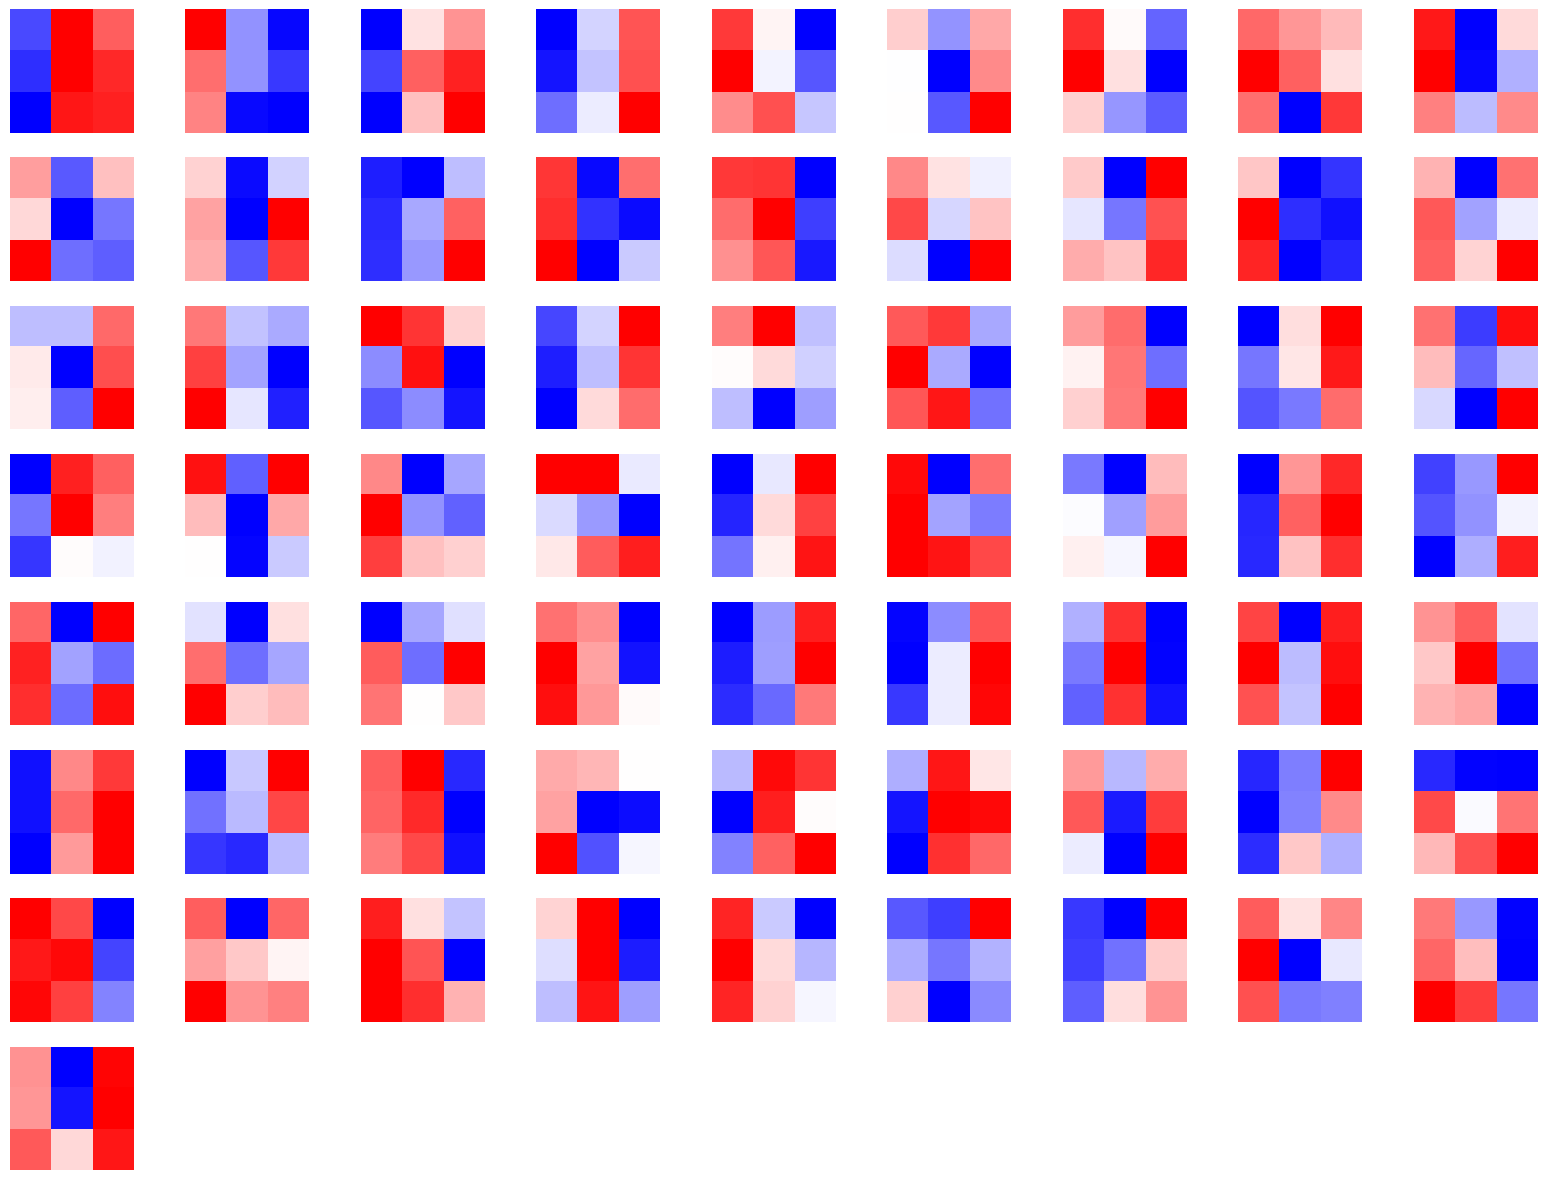

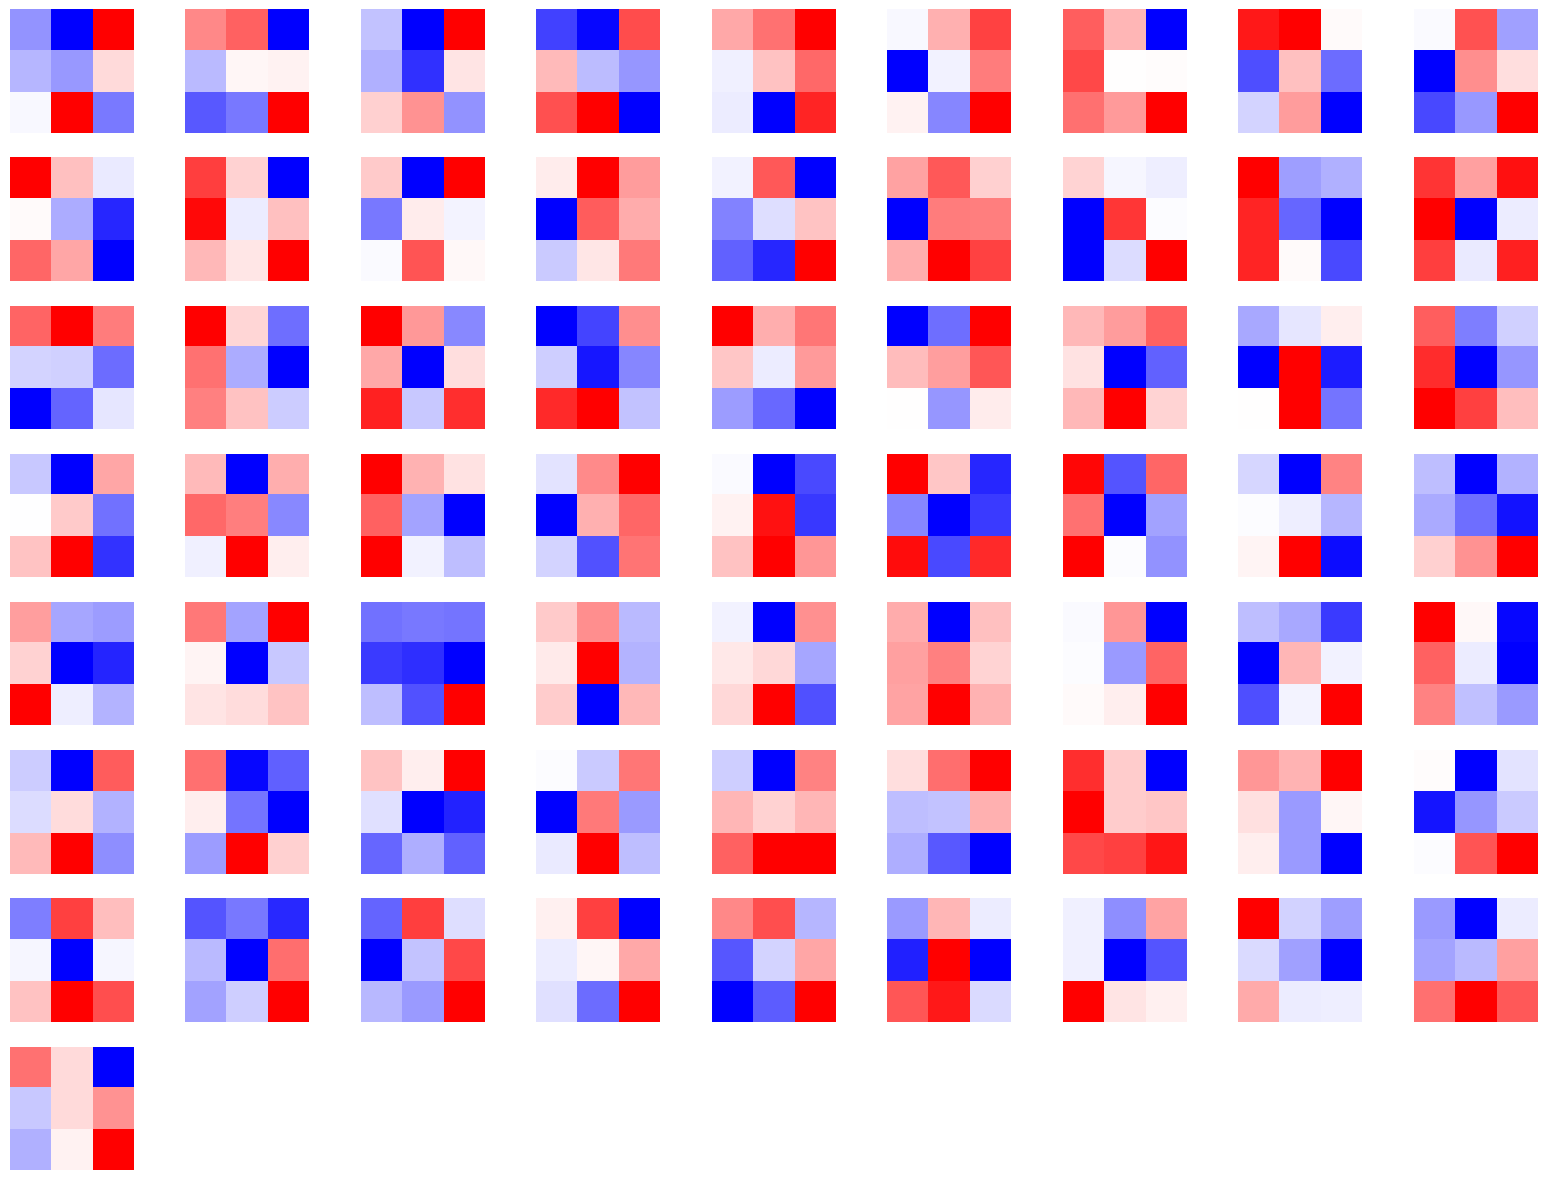

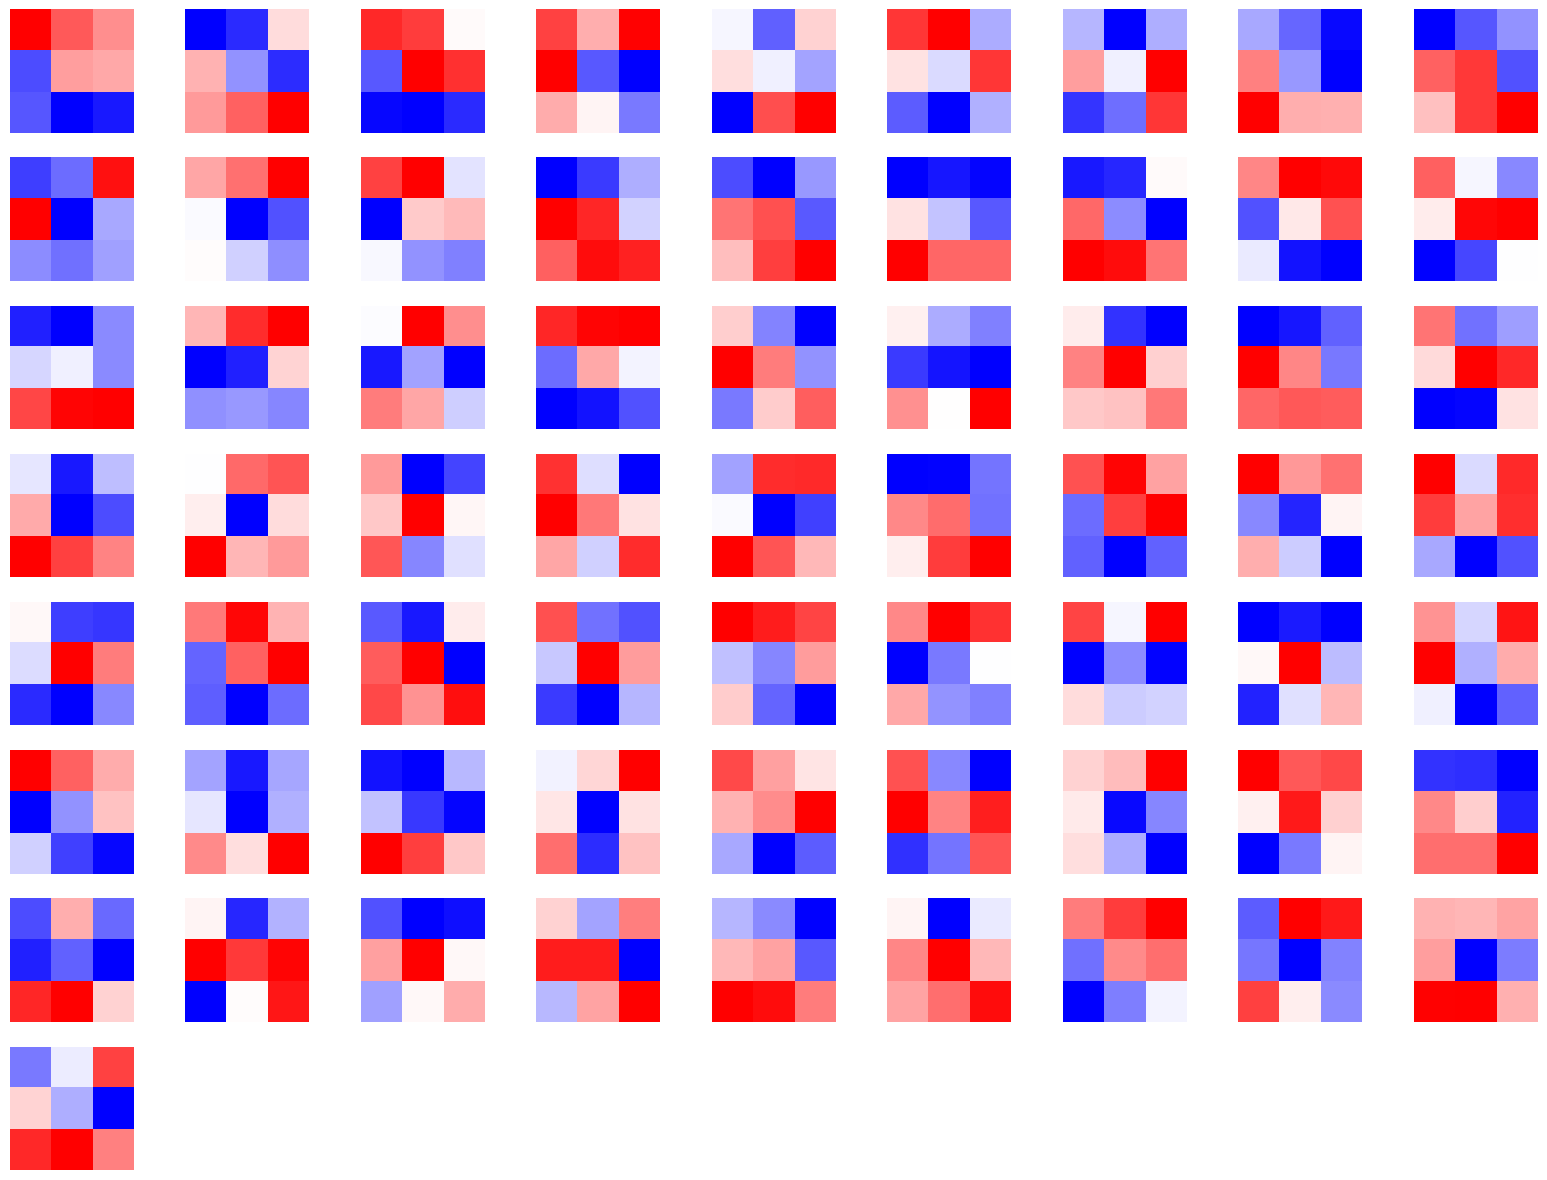

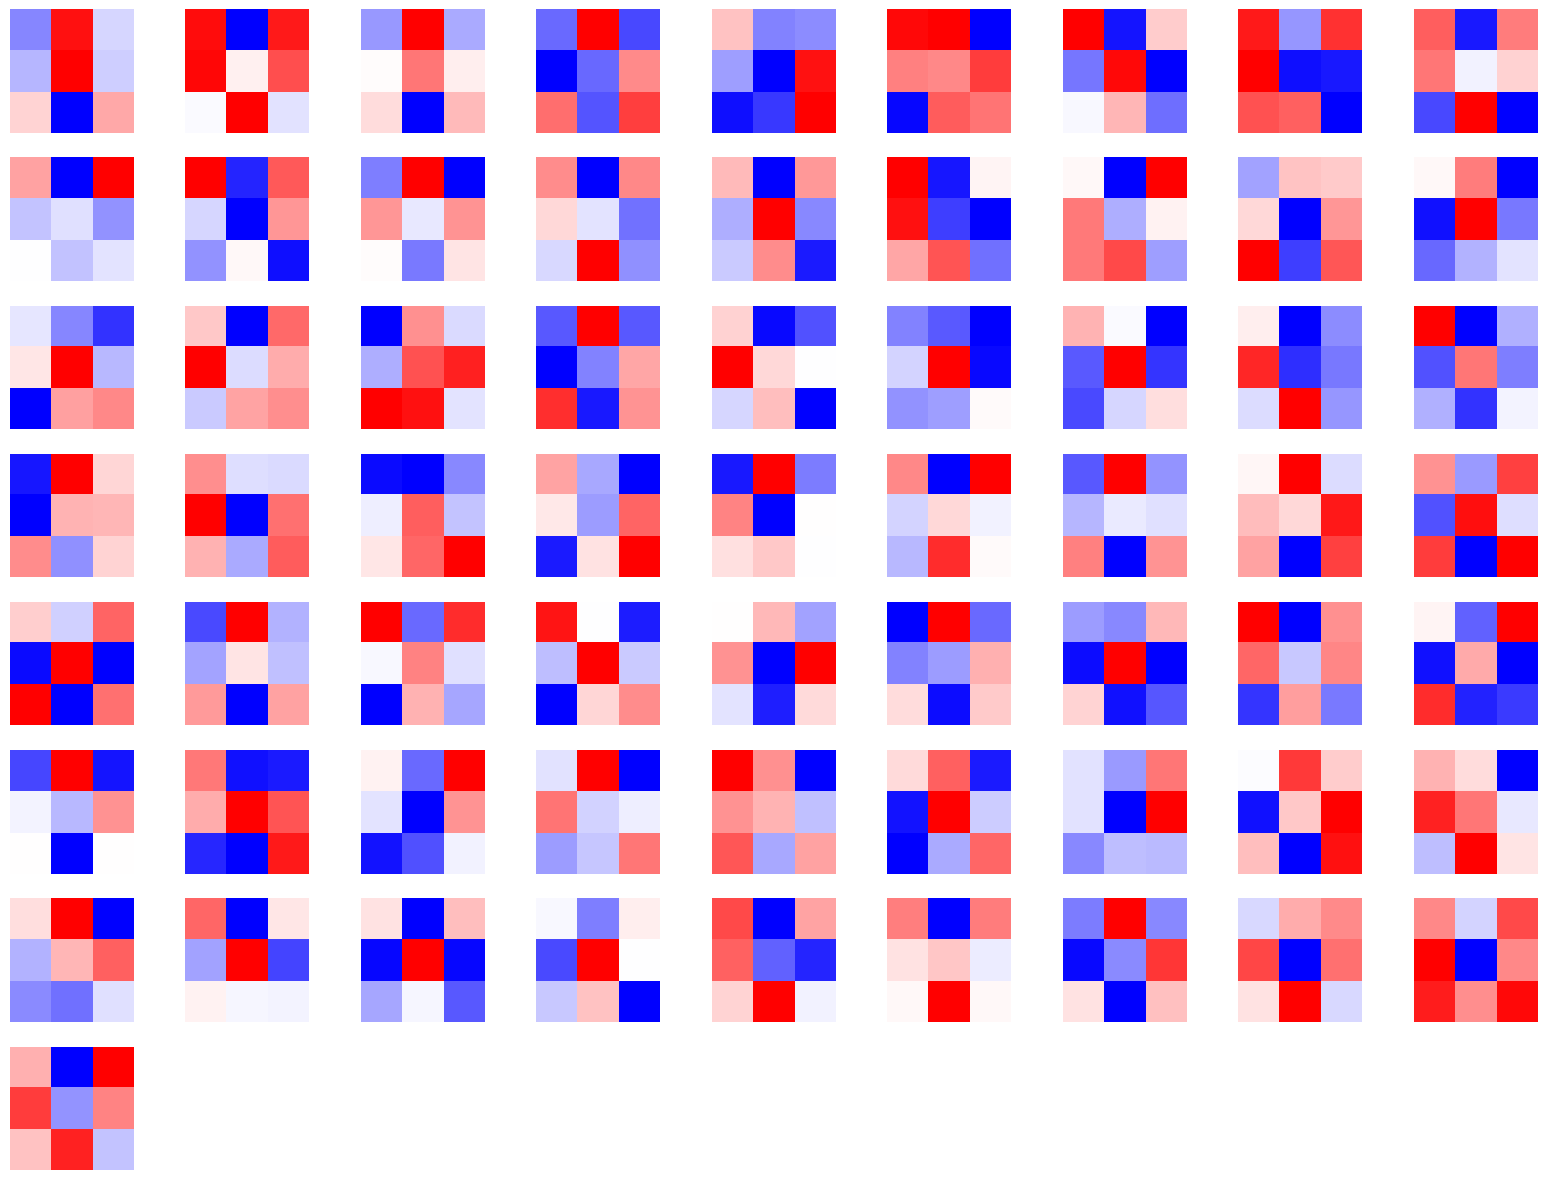

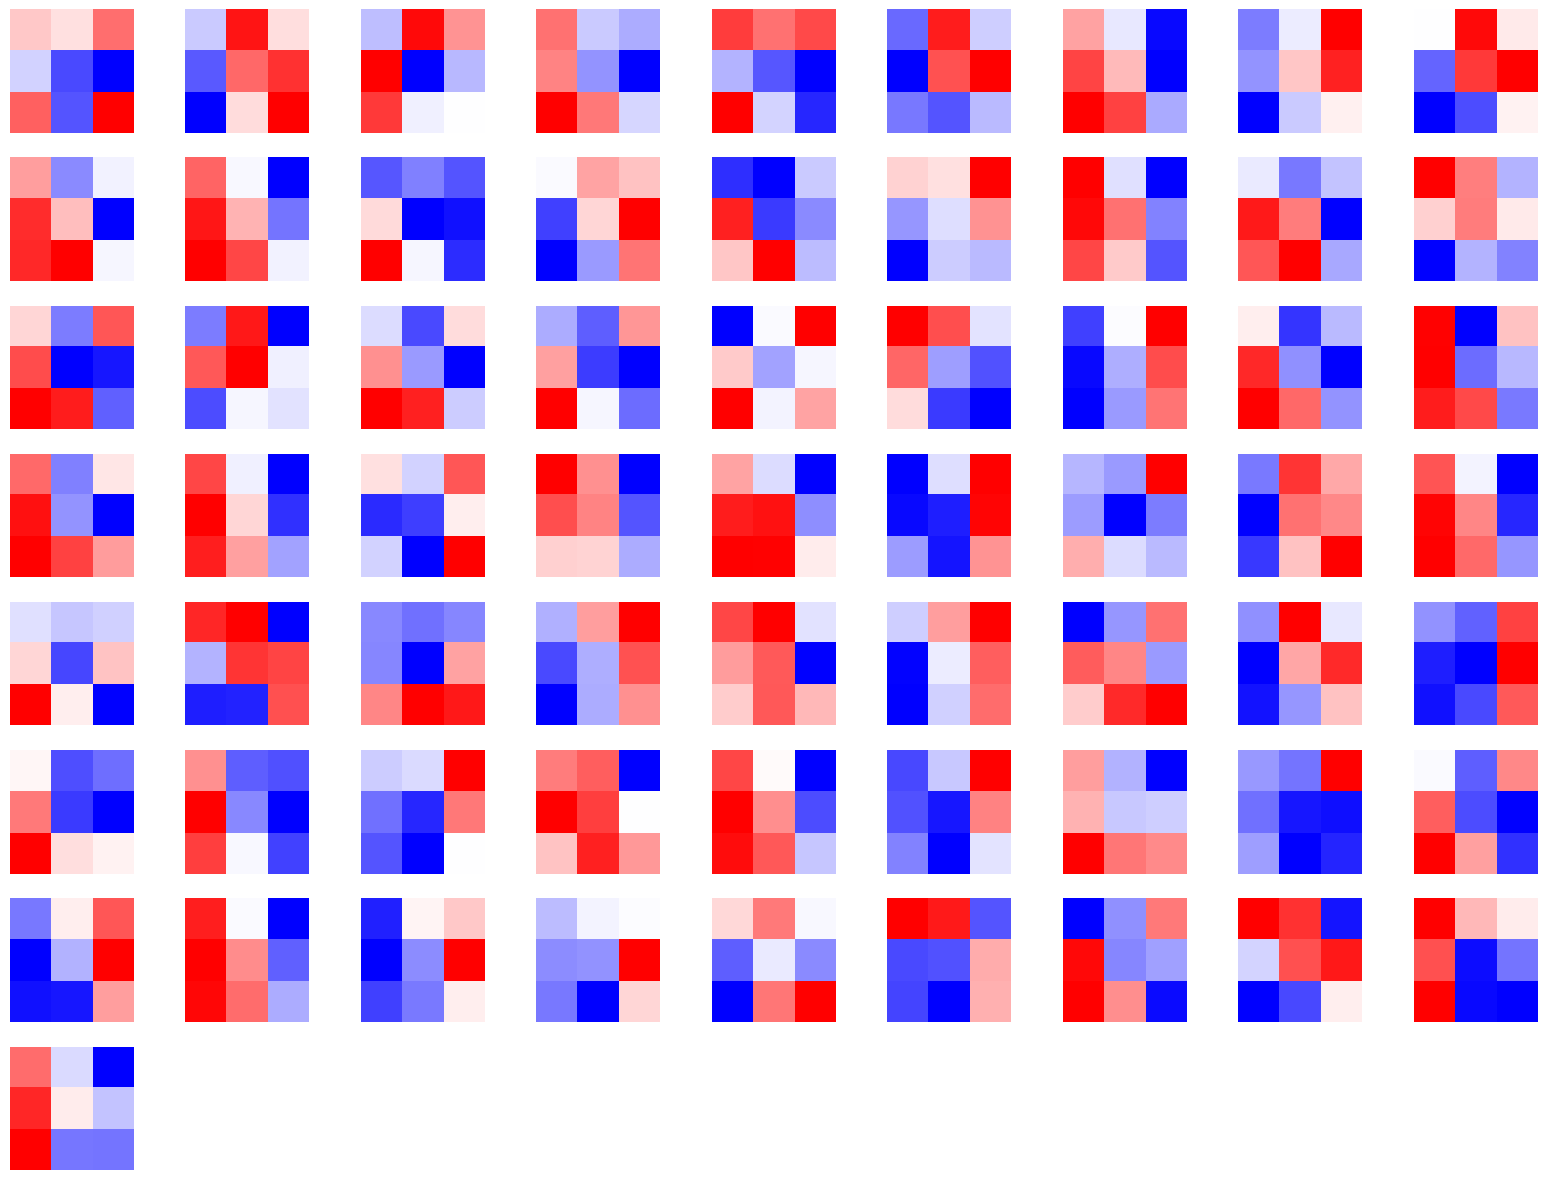

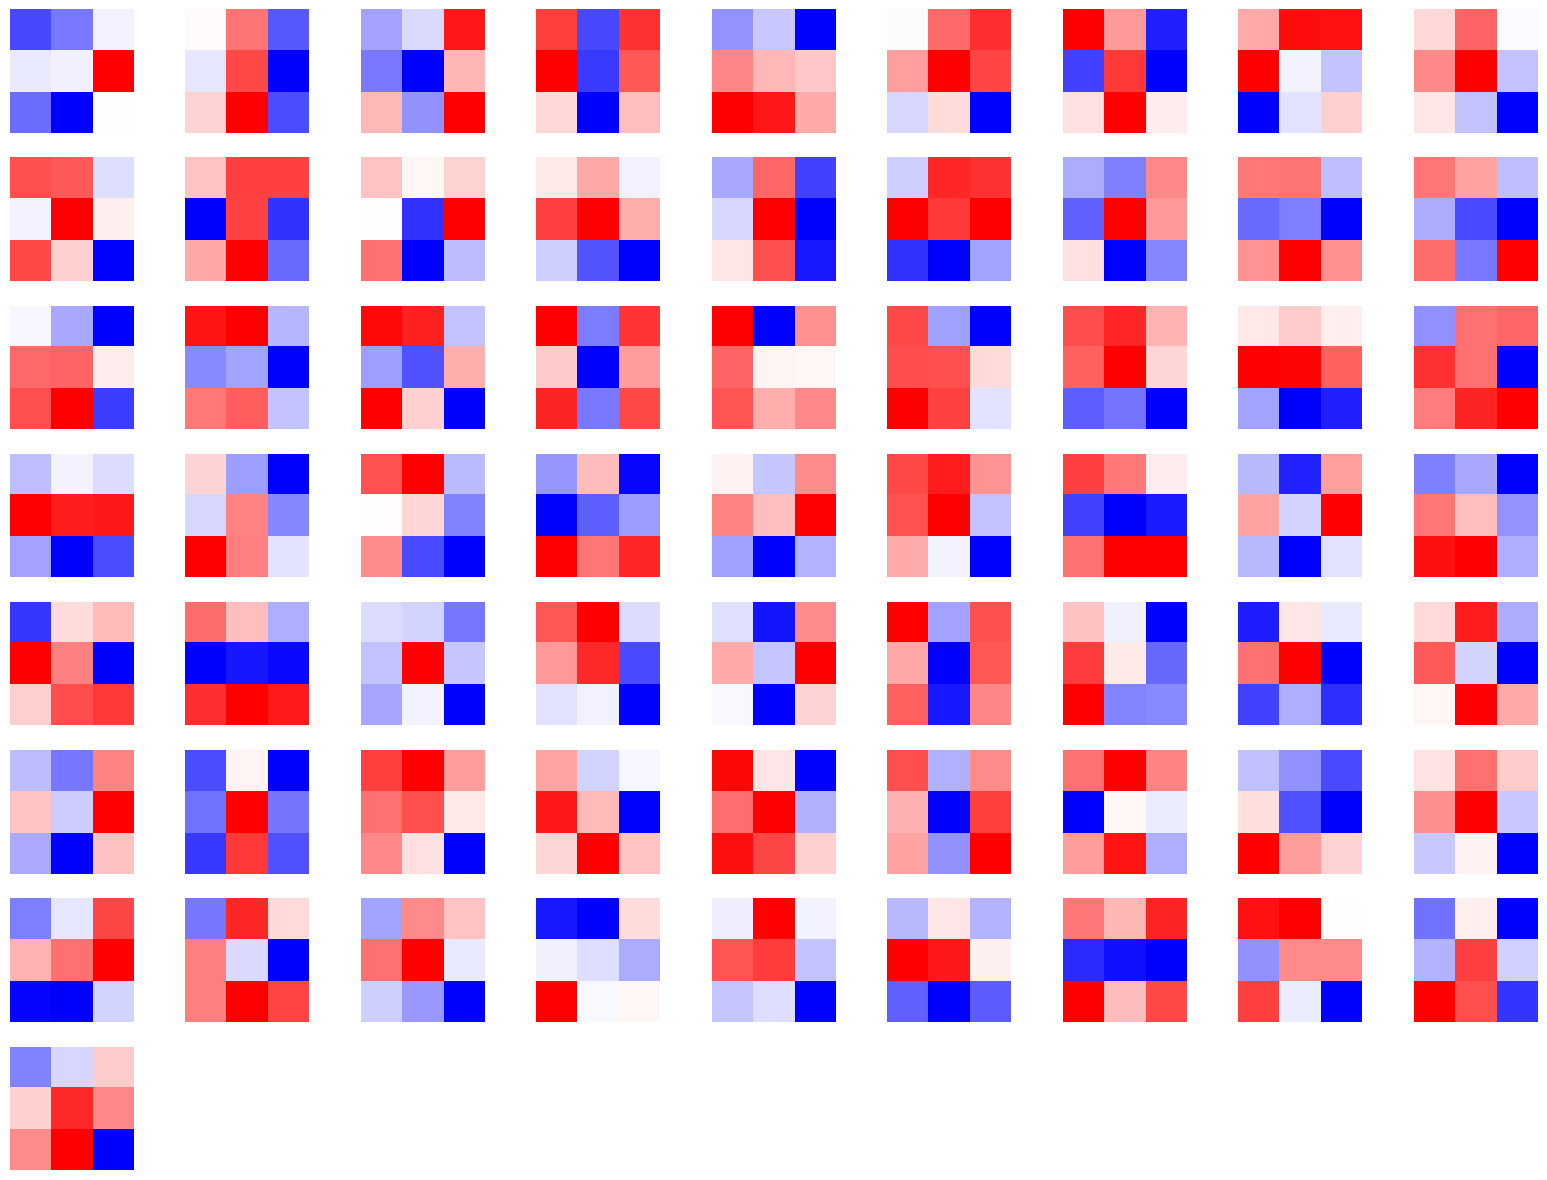

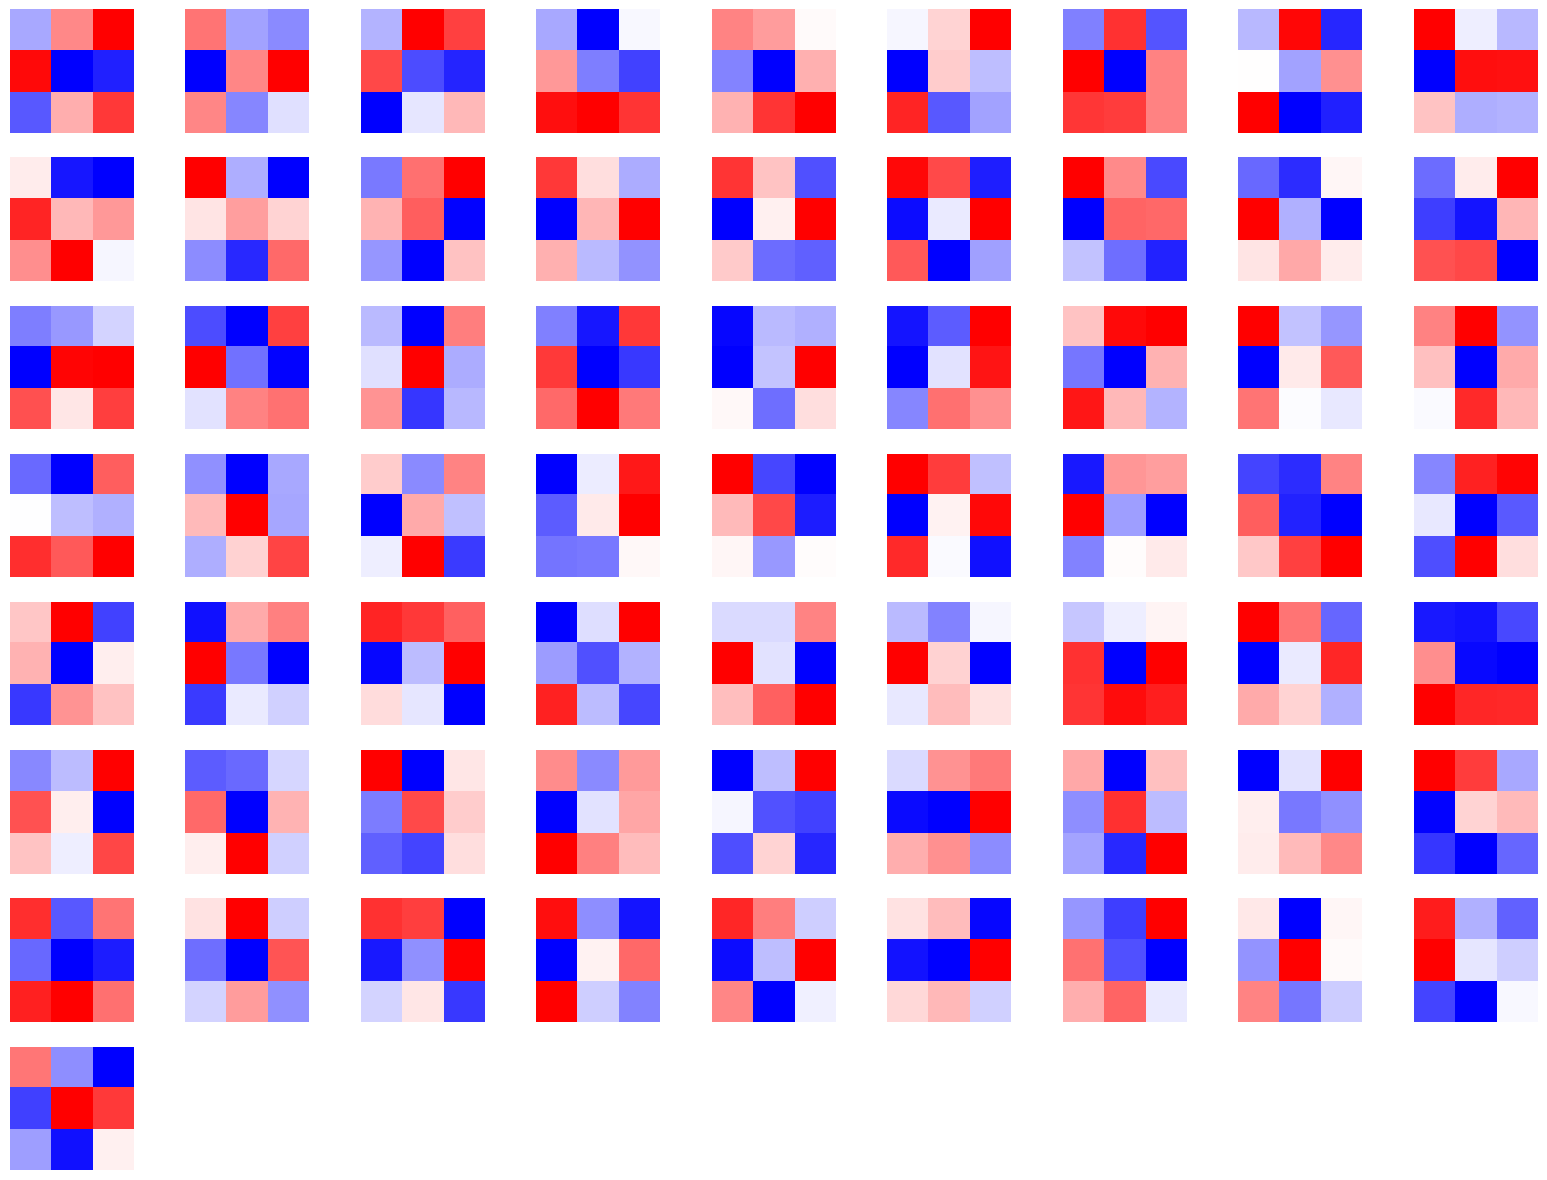

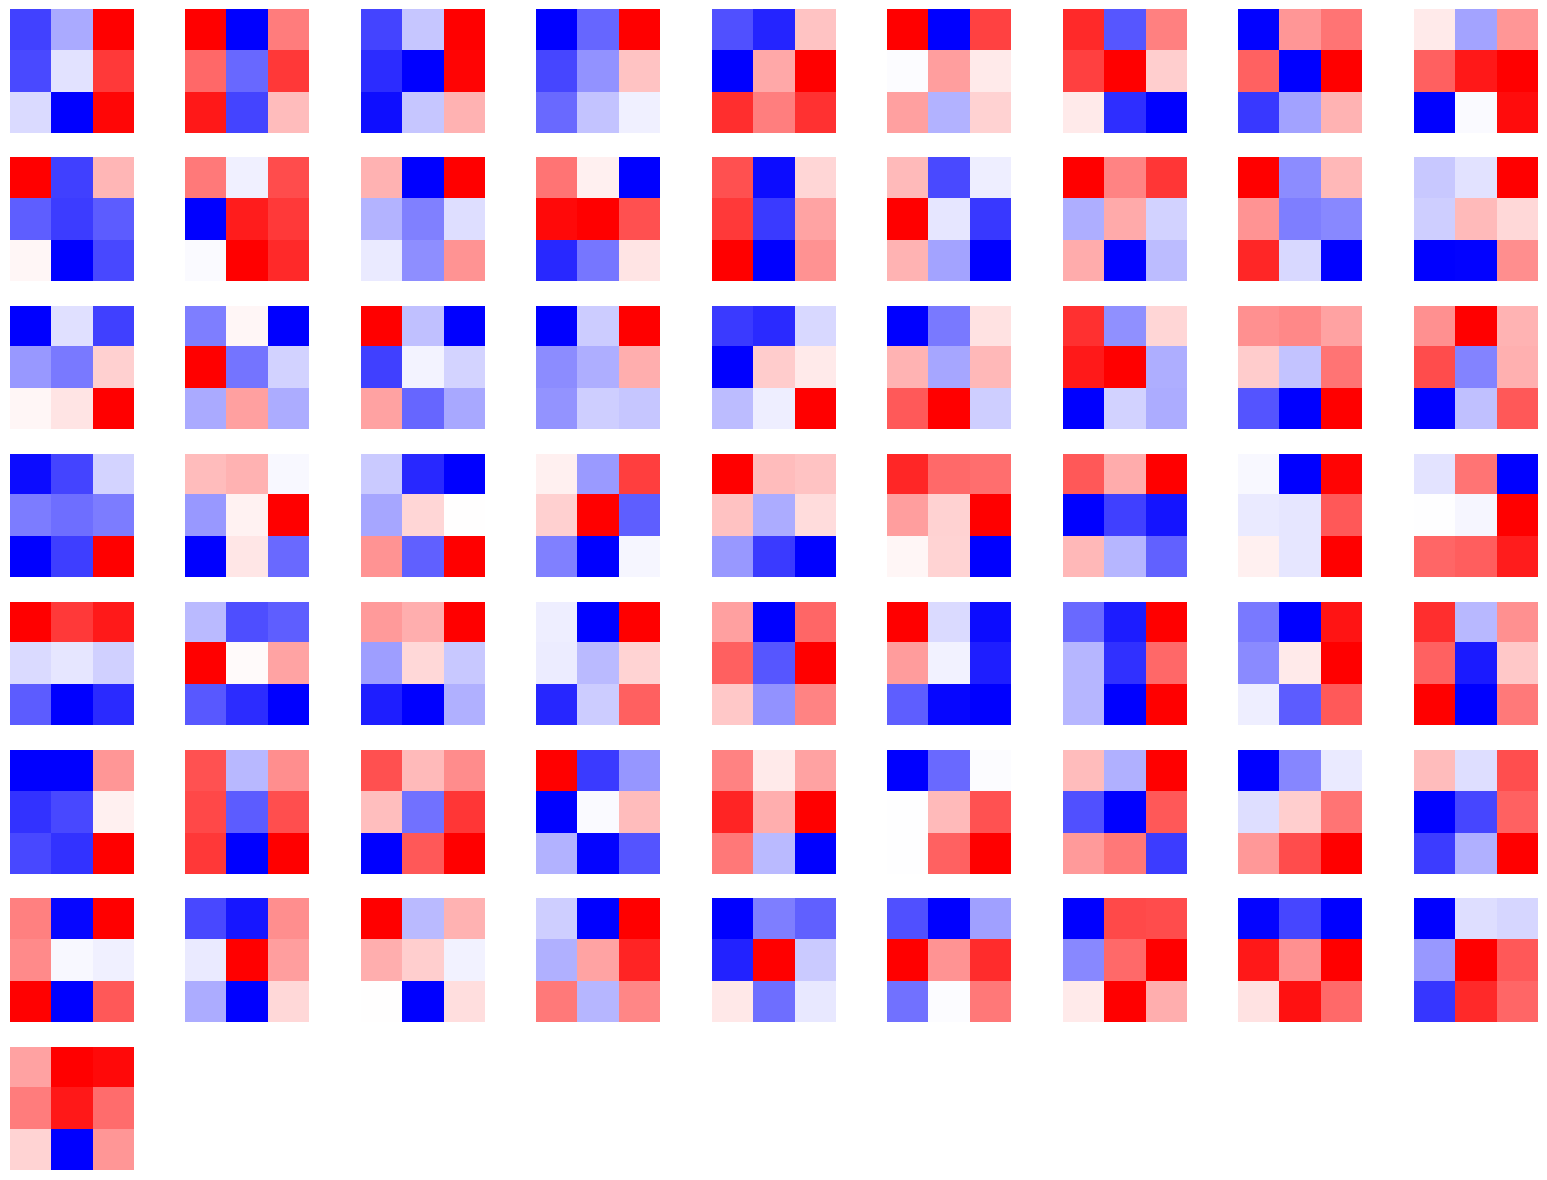

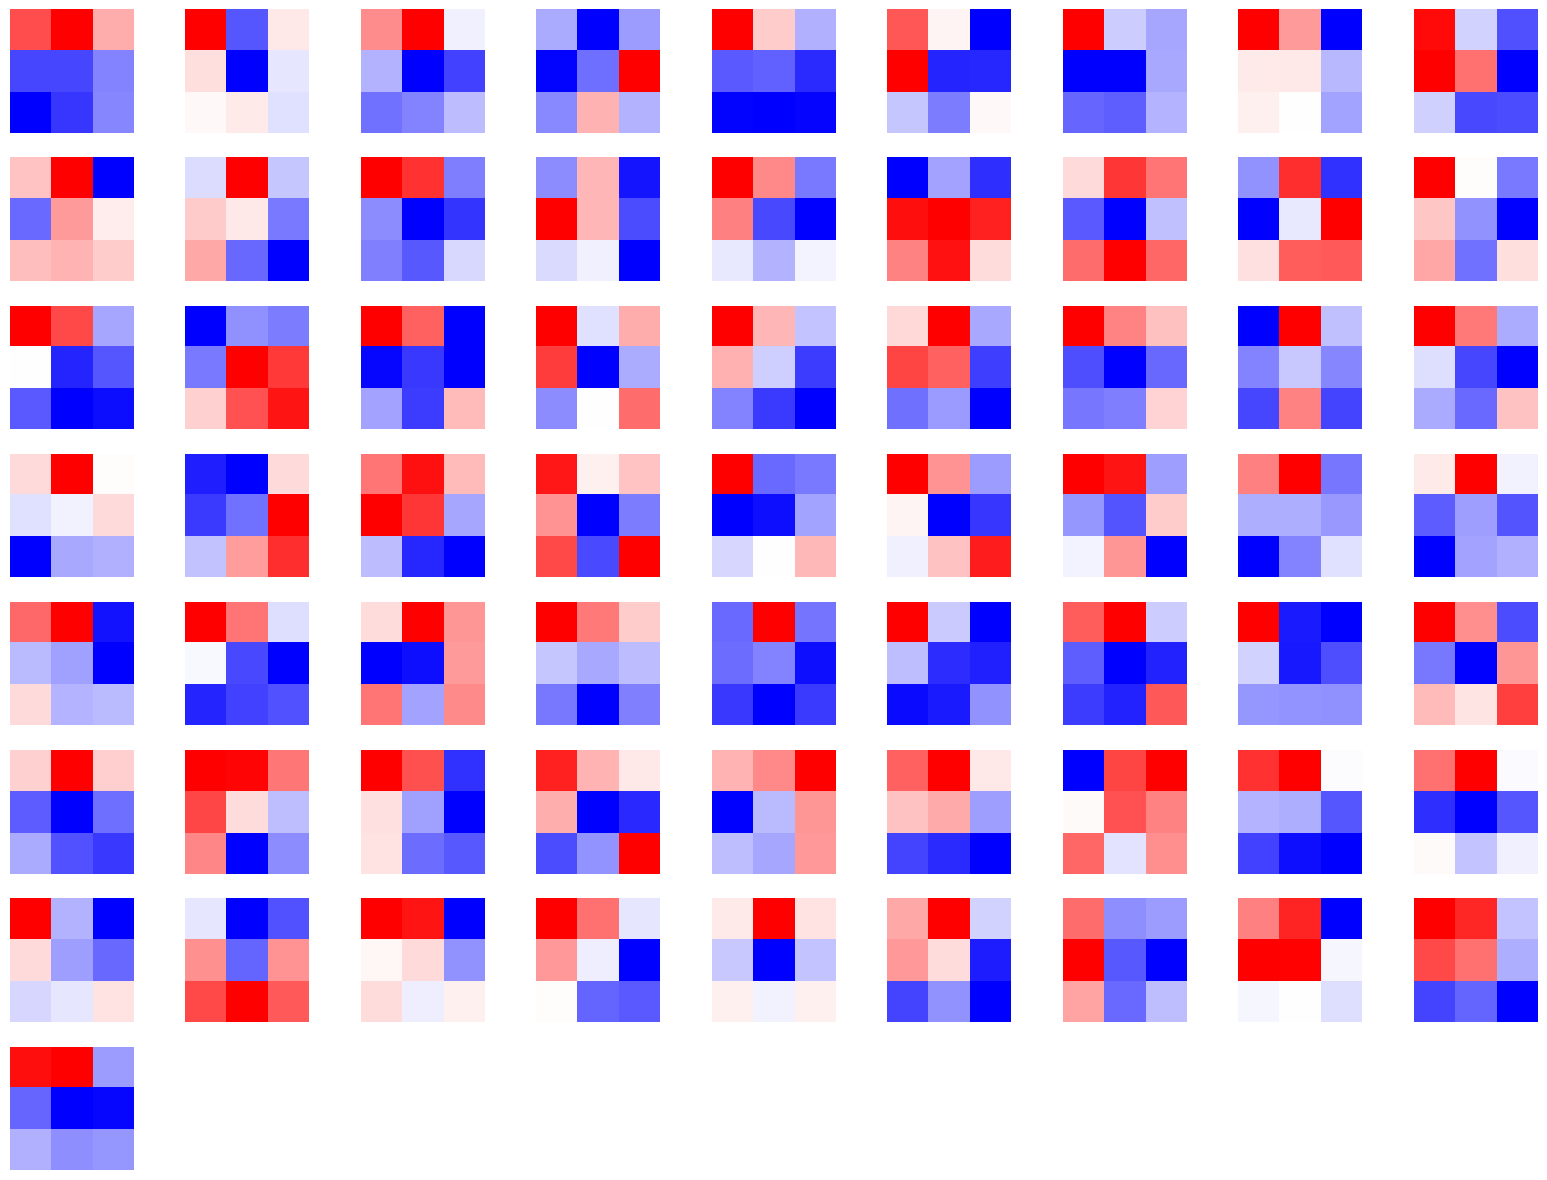

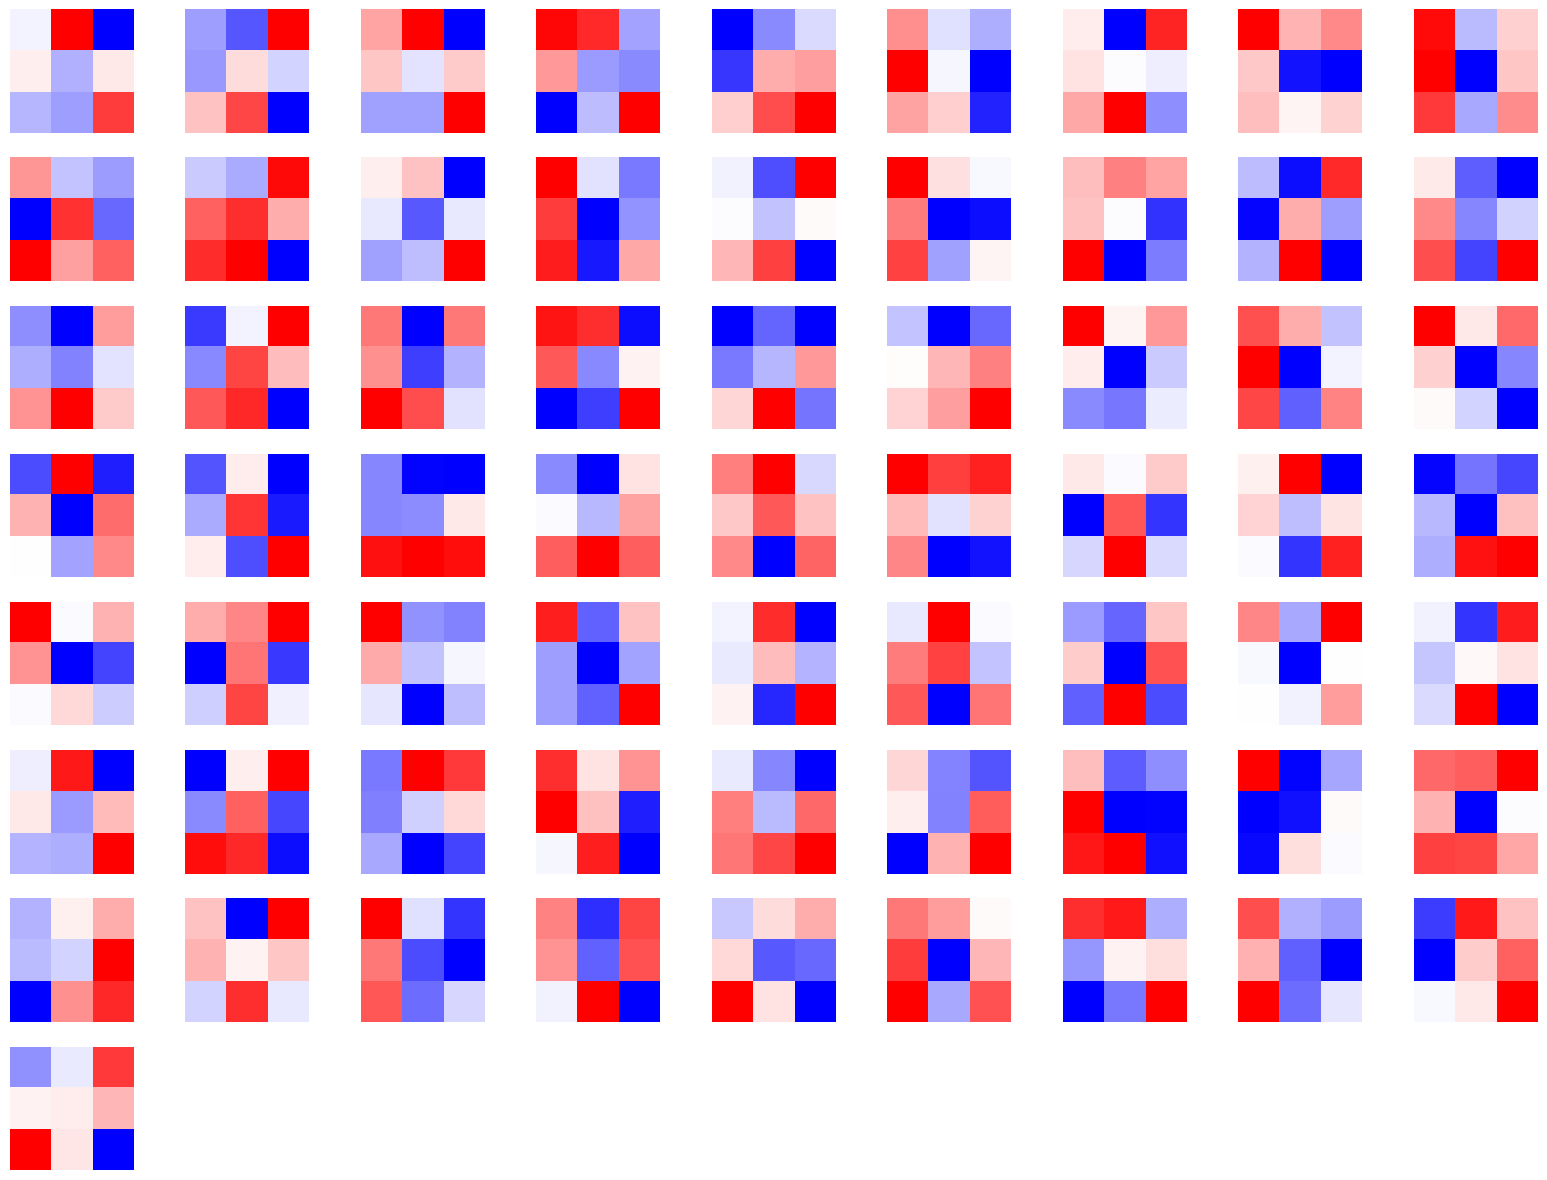

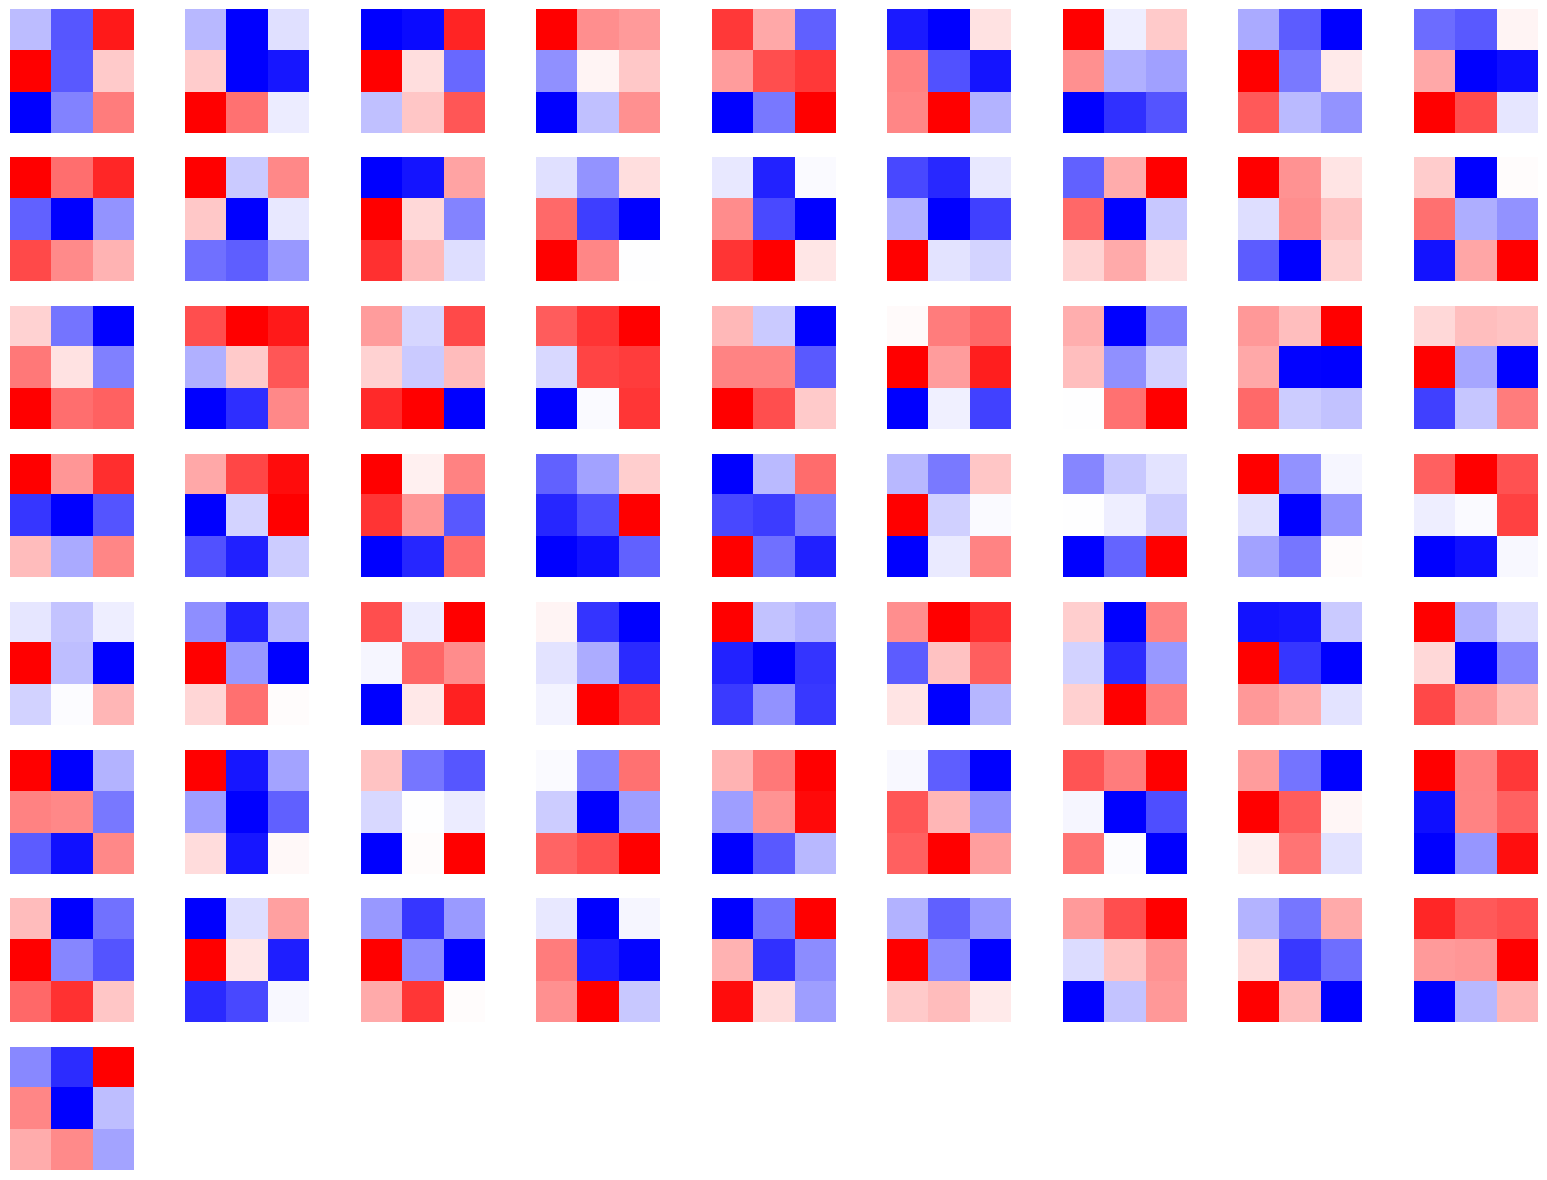

In [6]:
# 卷积核对应的应为卷积层（Conv2d），这里以第“3”层为例，可视化对应的参数
import matplotlib.pyplot as plt
import numpy as np

conv1 = dict(model.features.named_children())['3']
kernel_set = conv1.weight.detach()
num = len(conv1.weight.detach())
print(kernel_set.shape)
for i in range(0,num):
    i_kernel = kernel_set[i]
    plt.figure(figsize=(20, 17))
    if (len(i_kernel)) > 1:
        for idx, filer in enumerate(i_kernel):
            plt.subplot(9, 9, idx+1) 
            plt.axis('off')
            plt.imshow(filer[ :, :].detach(),cmap='bwr')

In [7]:
"""
输入的原始图像经过每次卷积层得到的数据称为特征图
可视化卷积核是为了看模型提取哪些特征，可视化特征图则是为了看模型提取到的特征是什么样子的
在PyTorch中，提供了一个专用的接口使得网络在前向传播过程中能够获取到特征图，这个接口的名称叫做hook
读取钩子的信息就是这一层的特征图
"""
# 首先实现了一个hook类，之后在plot_feature函数中，将该hook类的对象注册到要进行可视化的网络的某层中。
# model在进行前向传播的时候会调用hook的__call__函数，我们也就是在那里存储了当前层的输入和输出
class Hook(object):
    def __init__(self):
        self.module_name = []
        self.features_in_hook = []
        self.features_out_hook = []

    def __call__(self,module, fea_in, fea_out):
        print("hooker working", self)
        self.module_name.append(module.__class__)
        self.features_in_hook.append(fea_in)
        self.features_out_hook.append(fea_out)
        return None

def plot_feature(model, idx, inputs):
    hh = Hook()
    model.features[idx].register_forward_hook(hh)
    
    # forward_model(model,False)
    model.eval()
    _ = model(inputs)
    print(hh.module_name)
    print((hh.features_in_hook[0][0].shape))
    print((hh.features_out_hook[0].shape))
    
    out1 = hh.features_out_hook[0]

    total_ft  = out1.shape[1]
    first_item = out1[0].cpu().clone()    

    plt.figure(figsize=(20, 17))
    

    for ftidx in range(total_ft):
        if ftidx > 99:
            break
        ft = first_item[ftidx]
        plt.subplot(10, 10, ftidx+1) 
        
        plt.axis('off')
        #plt.imshow(ft[ :, :].detach(),cmap='gray')
        plt.imshow(ft[ :, :].detach())

CNN class activation map可视化方法

In [9]:
"""class activation map 
（CAM）的作用是判断哪些变量对模型来说是重要的，
在CNN可视化的场景下，即判断图像中哪些像素点对预测结果是重要的
"""
import torch
from torchvision.models import vgg11,resnet18,resnet101,resnext101_32x8d
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# model = vgg11(pretrained=True)
# img_path = './dog.png'
# # resize操作是为了和传入神经网络训练图片大小一致
# img = Image.open(img_path).resize((224,224))
# # 需要将原始图片转为np.float32格式并且在0-1之间 
# rgb_img = np.float32(img)/255
# plt.imshow(img)

# from pytorch_grad_cam import GradCAM,ScoreCAM,GradCAMPlusPlus,AblationCAM,XGradCAM,EigenCAM,FullGrad
# from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
# from pytorch_grad_cam.utils.image import show_cam_on_image

# # 将图片转为tensor
# img_tensor = torch.from_numpy(rgb_img).permute(2,0,1).unsqueeze(0)

# target_layers = [model.features[-1]]
# # 选取合适的类激活图，但是ScoreCAM和AblationCAM需要batch_size
# cam = GradCAM(model=model,target_layers=target_layers)
# targets = [ClassifierOutputTarget(preds)]   
# # 上方preds需要设定，比如ImageNet有1000类，这里可以设为200
# grayscale_cam = cam(input_tensor=img_tensor, targets=targets)
# grayscale_cam = grayscale_cam[0, :]
# cam_img = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
# print(type(cam_img))
# Image.fromarray(cam_img)

使用FlashTorch快速实现CNN可视化

In [12]:
# import matplotlib.pyplot as plt
# import torchvision.models as models
# from flashtorch.utils import apply_transforms, load_image
# from flashtorch.saliency import Backprop

# model = models.alexnet(pretrained=True)
# backprop = Backprop(model)

# image = load_image('/content/images/great_grey_owl.jpg')
# owl = apply_transforms(image)

# target_class = 24
# backprop.visualize(owl, target_class, guided=True, use_gpu=True)

# import torchvision.models as models
# from flashtorch.activmax import GradientAscent

# model = models.vgg16(pretrained=True)
# g_ascent = GradientAscent(model.features)

# # specify layer and filter info
# conv5_1 = model.features[24]
# conv5_1_filters = [45, 271, 363, 489]

# g_ascent.visualize(conv5_1, conv5_1_filters, title="VGG16: conv5_1")

TensorBoard可视化训练过程

In [20]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('./runs')

In [17]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=32,kernel_size = 3)
        self.pool = nn.MaxPool2d(kernel_size = 2,stride = 2)
        self.conv2 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size = 5)
        self.adaptive_pool = nn.AdaptiveMaxPool2d((1,1))
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(64,32)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(32,1)
        self.sigmoid = nn.Sigmoid()

    def forward(self,x):
        x = self.conv1(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.pool(x)
        x = self.adaptive_pool(x)
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        y = self.sigmoid(x)
        return y

model = Net()
print(model)
summary(model)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (adaptive_pool): AdaptiveMaxPool2d(output_size=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=64, out_features=32, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


Layer (type:depth-idx)                   Param #
Net                                      --
├─Conv2d: 1-1                            896
├─MaxPool2d: 1-2                         --
├─Conv2d: 1-3                            51,264
├─AdaptiveMaxPool2d: 1-4                 --
├─Flatten: 1-5                           --
├─Linear: 1-6                            2,080
├─ReLU: 1-7                              --
├─Linear: 1-8                            33
├─Sigmoid: 1-9                           --
Total params: 54,273
Trainable params: 54,273
Non-trainable params: 0

In [21]:
# 给定一个输入数据，前向传播后得到模型的结构，再通过TensorBoard进行可视化，使用add_graph
writer.add_graph(model, input_to_model = torch.rand(1, 3, 224, 224))
writer.close()

图像可视化

In [22]:
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform_train = transforms.Compose(
    [transforms.ToTensor()])
transform_test = transforms.Compose(
    [transforms.ToTensor()])

train_data = datasets.CIFAR10(".", train=True, download=True, transform=transform_train)
test_data = datasets.CIFAR10(".", train=False, download=True, transform=transform_test)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64)

images, labels = next(iter(train_loader))

100%|██████████| 170M/170M [00:24<00:00, 7.05MB/s] 


Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified


In [24]:
# 仅查看一张图片
writer = SummaryWriter('./runs/pytorch_tb')
writer.add_image('images[0]', images[0])
writer.close()

In [26]:
# 将多张图片拼接成一张图片，中间用黑色网格分割
# create grid of images
writer = SummaryWriter('./runs/pytorch_tb')
img_grid = torchvision.utils.make_grid(images)
writer.add_image('image_grid', img_grid)
writer.close()

In [25]:
# 将多张图片直接写入
writer = SummaryWriter('./runs/pytorch_tb')
writer.add_images("images",images,global_step = 0)
writer.close()

TensorBoard连续变量可视化

In [27]:
writer = SummaryWriter('./runs/pytorch_tb')
for i in range(500):
    x = i
    y = x**2
    writer.add_scalar("x", x, i) #日志中记录x在第step i 的值
    writer.add_scalar("y", y, i) #日志中记录y在第step i 的值
writer.close()

TensorBoard参数分布可视化

In [29]:
import torch
import numpy as np

# 创建正态分布的张量模拟参数矩阵
def norm(mean, std):
    t = std * torch.randn((100, 20)) + mean
    return t
 
writer = SummaryWriter('./runs/pytorch_tb/')
for step, mean in enumerate(range(-10, 10, 1)):
    w = norm(mean, 1)
    writer.add_histogram("w", w, step)
    writer.flush()
writer.close()

使用wandb可视化训练过程

In [30]:
# demo
import random  # to set the python random seed
import numpy  # to set the numpy random seed
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.models import resnet18
import warnings
warnings.filterwarnings('ignore')

In [33]:
# 初始化wandb
# import wandb
# wandb.init(project="thorough-pytorch",
#            name="wandb_demo",)

In [ ]:
# 超参数设置
# config = wandb.config  # config的初始化
# config.batch_size = 64  
# config.test_batch_size = 10 
# config.epochs = 5  
# config.lr = 0.01 
# config.momentum = 0.1  
# config.use_cuda = True  
# config.seed = 2043  
# config.log_interval = 10 

# # 设置随机数
# def set_seed(seed):
#     random.seed(config.seed)      
#     torch.manual_seed(config.seed) 
#     numpy.random.seed(config.seed) 


In [ ]:
# # 构建训练和测试的pipeline
# def train(model, device, train_loader, optimizer):
#     model.train()

#     for batch_id, (data, target) in enumerate(train_loader):
#         data, target = data.to(device), target.to(device)
#         optimizer.zero_grad()
#         output = model(data)
#         criterion = nn.CrossEntropyLoss()
#         loss = criterion(output, target)
#         loss.backward()
#         optimizer.step()

# # wandb.log用来记录一些日志(accuracy,loss and epoch), 便于随时查看网路的性能
# def test(model, device, test_loader, classes):
#     model.eval()
#     test_loss = 0
#     correct = 0
#     example_images = []

#     with torch.no_grad():
#         for data, target in test_loader:
#             data, target = data.to(device), target.to(device)
#             output = model(data)
#             criterion = nn.CrossEntropyLoss()
#             test_loss += criterion(output, target).item()
#             pred = output.max(1, keepdim=True)[1]
#             correct += pred.eq(target.view_as(pred)).sum().item()
#             example_images.append(wandb.Image(
#                 data[0], caption="Pred:{} Truth:{}".format(classes[pred[0].item()], classes[target[0]])))

#    # 使用wandb.log 记录你想记录的指标
#     wandb.log({
#         "Examples": example_images,
#         "Test Accuracy": 100. * correct / len(test_loader.dataset),
#         "Test Loss": test_loss
#     })

# wandb.watch_called = False 


# def main():
#     use_cuda = config.use_cuda and torch.cuda.is_available()
#     device = torch.device("cuda:0" if use_cuda else "cpu")
#     kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

#     # 设置随机数
#     set_seed(config.seed)
#     torch.backends.cudnn.deterministic = True

#     # 数据预处理
#     transform = transforms.Compose([
#         transforms.ToTensor(),
#         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
#     ])

#     # 加载数据
#     train_loader = DataLoader(datasets.CIFAR10(
#         root='dataset',
#         train=True,
#         download=True,
#         transform=transform
#     ), batch_size=config.batch_size, shuffle=True, **kwargs)

#     test_loader = DataLoader(datasets.CIFAR10(
#         root='dataset',
#         train=False,
#         download=True,
#         transform=transform
#     ), batch_size=config.batch_size, shuffle=False, **kwargs)

#     classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

#     model = resnet18(pretrained=True).to(device)
#     optimizer = optim.SGD(model.parameters(), lr=config.lr, momentum=config.momentum)

#     wandb.watch(model, log="all")
#     for epoch in range(1, config.epochs + 1):
#         train(model, device, train_loader, optimizer)
#         test(model, device, test_loader, classes)

#     # 本地和云端模型保存
#     torch.save(model.state_dict(), 'model.pth')
#     wandb.save('model.pth')


# if __name__ == '__main__':
#     main()
